In [3]:
pip install youtube-dl

     |████████████████████████████████| 1.9MB 4.3MB/s 


In [4]:
pip install pafy

In [5]:
pip install mutagen

     |████████████████████████████████| 225kB 4.3MB/s 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import ne_chunk
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import pafy 
from moviepy.editor import *
import os
import cv2
import shutil
import librosa, librosa.display
import IPython.display as ipd
import math
import glob
from PIL import Image
import mutagen
from mutagen.mp3 import MP3
import time
import spacy

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1351680/45929032 bytes (2.9%)3768320/45929032 bytes (8.2%)6987776/45929032 bytes (15.2%)10870784/45929032 bytes (23.7%)14794752/45929032 bytes (32.2%)18997248/45929032 bytes (41.4%)23117824/45929032 bytes (50.3%)27213824/45929032 bytes (59.3%)31416320/45929032 bytes (68.4%)35692544/45929032 bytes (77.7%)40009728/45929032 bytes (87.1%)44302336/45929032 bytes (96.5%)4

In [8]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Reading and Merging CSV**

In [ ]:
#data in this csv file contained some specification lines which were removed manually and the first column name was changed to link as there were indefinite number of spaces before the column name
dfA = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/omg_TrainTranscripts.csv',encoding='cp1252')
df1 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/omg_TrainVideos.csv',encoding='cp1252')
df_a = pd.merge(df1, dfA, how='outer', on=['link', 'video','utterance'])

In [ ]:
dfB = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/omg_TestTranscripts.csv',encoding='cp1252')
df2 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/omg_TestVideos_WithLabels.csv',encoding='cp1252')
df_b = pd.merge(df2, dfB, how='outer', on=['video','utterance','link'])

In [ ]:
df_a.tail()

link  ...  transcript
2442  </pre></body></html>Ztext/plain

(FUl~”š...  ...         NaN
2443                                                AÕ  ...         NaN
2444      </pre></body></html>Ztext/plain

(FUl~”š\t  ...         NaN
2445                                              ?Ó  ...         NaN
2446                                                ?Þ  ...         NaN

[5 rows x 9 columns]

In [ ]:
df_a.drop(df_a.tail(5).index, 
        inplace = True)

In [ ]:
df_a.tail()

link  ...                                         transcript
2437  https://www.youtube.com/watch?v=ZbamyOYCWeo  ...                                        salmonella 
2438  https://www.youtube.com/watch?v=ZbamyOYCWeo  ...                               even the common cold
2439  https://www.youtube.com/watch?v=ZbamyOYCWeo  ...  Siri you know what it is and I'm just saying w...
2440  https://www.youtube.com/watch?v=ZbamyOYCWeo  ...  can open your eyes because it means that the s...
2441  https://www.youtube.com/watch?v=ZbamyOYCWeo  ...                               scaring me like that

[5 rows x 9 columns]

In [ ]:
df_b.head()

link  ...                                         transcript
0  https://www.youtube.com/watch?v=_bg0TrqHcBs  ...  hey what's up my name is Dave nearly and I pre...
1  https://www.youtube.com/watch?v=_bg0TrqHcBs  ...  I'll be gentle you're ready for world turn Top...
2  https://www.youtube.com/watch?v=_bg0TrqHcBs  ...  sweet witches and friendly wolves wise Wizard ...
3  https://www.youtube.com/watch?v=_bg0TrqHcBs  ...  but somehow things were starting to lift Sunny...
4  https://www.youtube.com/watch?v=_bg0TrqHcBs  ...                         happily ever after Orlando

[5 rows x 9 columns]

In [ ]:
df = pd.concat([df_a, df_b], ignore_index=True, sort=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659 entries, 0 to 4658
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   link            4659 non-null   object 
 1   start           4659 non-null   float64
 2   end             4659 non-null   float64
 3   video           4659 non-null   object 
 4   utterance       4659 non-null   object 
 5   arousal         4659 non-null   float64
 6   valence         4659 non-null   float64
 7   EmotionMaxVote  4659 non-null   float64
 8   transcript      4513 non-null   object 
dtypes: float64(5), object(4)
memory usage: 327.7+ KB


In [ ]:
df.tail()

link  ...                                         transcript
4654  https://www.youtube.com/watch?v=9fe7bVsmAPU  ...  and he's amazing director actor and your kids ...
4655  https://www.youtube.com/watch?v=9fe7bVsmAPU  ...  they will get the Script that they will perfor...
4656  https://www.youtube.com/watch?v=9fe7bVsmAPU  ...  yes movies and he is an amazing teacher so par...
4657  https://www.youtube.com/watch?v=9fe7bVsmAPU  ...  the script in another 20 years ago to meet Joh...
4658  https://www.youtube.com/watch?v=9fe7bVsmAPU  ...                                      ok here we go

[5 rows x 9 columns]

# **Preprocessing of Textual Data**

In [ ]:
df["EmotionMaxVote"].replace({0.0: "Anger", 1.0 : "Disgust", 2.0 : "Fear", 3.0 : "Happy", 4.0 : "Neutral", 5.0 : "Sad", 6.0 : "Surprise"}, inplace=True)

In [ ]:
df.dropna(subset = ["transcript"], inplace=True)
df['preprocessed_text'] = df['transcript']
#df.dropna(subset = ["preprocessed_text"], inplace=True)
#df['preprocessed_text'] = df['preprocessed_text'].astype(list)
#df['preprocessed_text'] = df['preprocessed_text'].str.lower()
df['preprocessed_text'] = df['preprocessed_text'].replace(r"[^A-Za-z0-9^,!.\/'+-=]", " ",regex=True)
#df['preprocessed_text'] = df['preprocessed_text'].replace(r"\d+", " ",regex=True)
df['preprocessed_text'] = df['preprocessed_text'].replace(r"what's", "what is ",regex=True)
df['preprocessed_text'] = df['preprocessed_text'].replace(r"\'s", " ",regex=True)
df['preprocessed_text'] = df['preprocessed_text'].replace(r"\'ve", " have ",regex=True)
df['preprocessed_text'] = df['preprocessed_text'].replace(r"can't", "cannot ",regex=True)
df['preprocessed_text'] = df['preprocessed_text'].replace(r"n't", " not ",regex=True)
df['preprocessed_text'] = df['preprocessed_text'].replace(r"i'm", "i am ",regex=True)
df['preprocessed_text'] = df['preprocessed_text'].replace(r"\'re", " are ",regex=True)
df['preprocessed_text'] = df['preprocessed_text'].replace(r"\'d", " would ",regex=True)
df['preprocessed_text'] = df['preprocessed_text'].replace(r"\'ll", " will ",regex=True)
#df'preprocessed_text'].dropna(axis=0,how='any',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4513 entries, 0 to 4658
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   link               4513 non-null   object 
 1   start              4513 non-null   float64
 2   end                4513 non-null   float64
 3   video              4513 non-null   object 
 4   utterance          4513 non-null   object 
 5   arousal            4513 non-null   float64
 6   valence            4513 non-null   float64
 7   EmotionMaxVote     4513 non-null   object 
 8   transcript         4513 non-null   object 
 9   preprocessed_text  4513 non-null   object 
dtypes: float64(4), object(6)
memory usage: 387.8+ KB


In [ ]:
df['EmotionMaxVote'].value_counts()

Neutral     1605
Happy       1342
Anger        606
Sad          564
Disgust      242
Fear         114
Surprise      40
Name: EmotionMaxVote, dtype: int64

In [ ]:
import plotly.express as px
fig = px.pie(df, names=df['EmotionMaxVote'],title="Distribution of Emotions in the dataset")
fig.show()

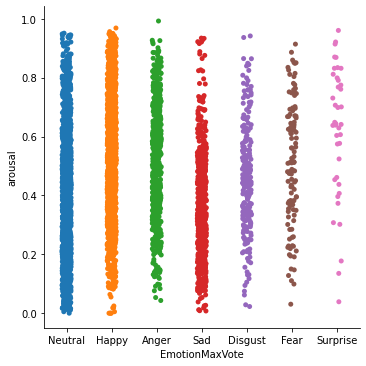

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x="EmotionMaxVote", y="arousal", data=df)

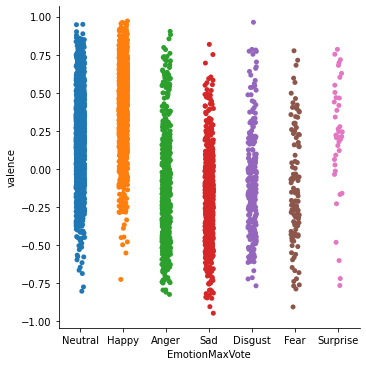

In [ ]:
sns.catplot(x="EmotionMaxVote", y="valence", data=df)

In [ ]:
fig = px.scatter(df, x="valence", y="arousal", color="EmotionMaxVote")
fig.show()

**Removing stopwords, tokenizing, lemmatizing text data**

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'ner'])

In [ ]:
stopwords = ['ourselves','hers','between','yourself','i', 'a', 'my', 'if', 'but','again','there','about','once','during','out','very','having','with','they','own','an','be','some','for','do','its','yours','such','into','of','most','itself','other','off','is','was','am','or','who','as','from','him','each','the','themselves','until','below','are','we','these','your','his','through','don','me','were','her','more','himself','this','down','should','our','their','while','above','both','up','to','ours','had','she','all','when','at','any','before','them','same','and','been','have','in','will','on','does','yourselves','then','that','because','what','over','why','so','can','did','now','under','he','you','herself','has','just','where','too','only','myself','which','those','I','it','after','few','whom']

def lemmatize(text):
    """Perform lemmatization and stopword removal in the clean text
       Returns a list of lemmas
    """
    text = text['preprocessed_text']
    doc = nlp(text)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords]
    return lemma_list
df['Lemma_words'] = df.apply(lemmatize, axis=1)

**Part of Speech tagging on lemmatised words**

In [ ]:
import nltk
from nltk import ne_chunk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
pos = df['Lemma_words'].to_list()
pos_tag = nltk.pos_tag_sents(pos)
df['POS'] = pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
df['POS'].head()

0                            [(hello, NN), (fine, NN)]
1    [(yes, RB), (not, RB), (expect, VB), (say, VBP...
2    [(place, NN), (unhappy, JJ), (vampire, NN), (g...
3    [(try, NN), (convince, NN), (need, VBP), (self...
4    [(not, RB), (know, VB), (happen, VB), (anyway,...
Name: POS, dtype: object

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

(-0.5, 999.5, 499.5, -0.5)

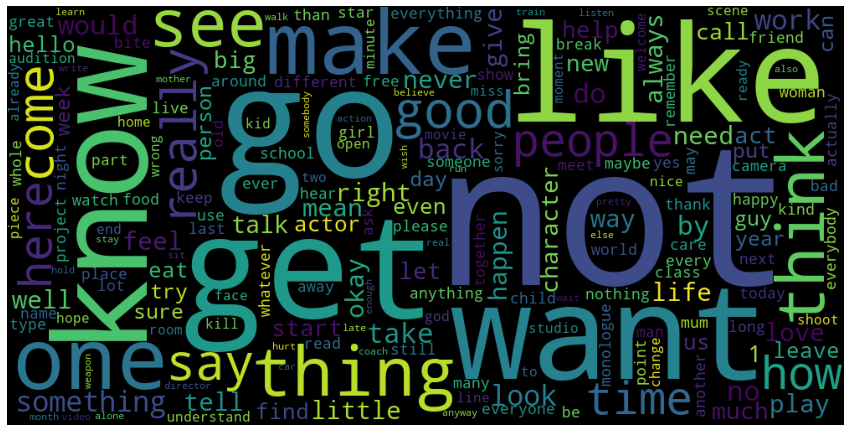

In [ ]:
pos_data = df.loc[df['EmotionMaxVote'] == 'Happy']
pos_lines = [j for sub in df['Lemma_words'] for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

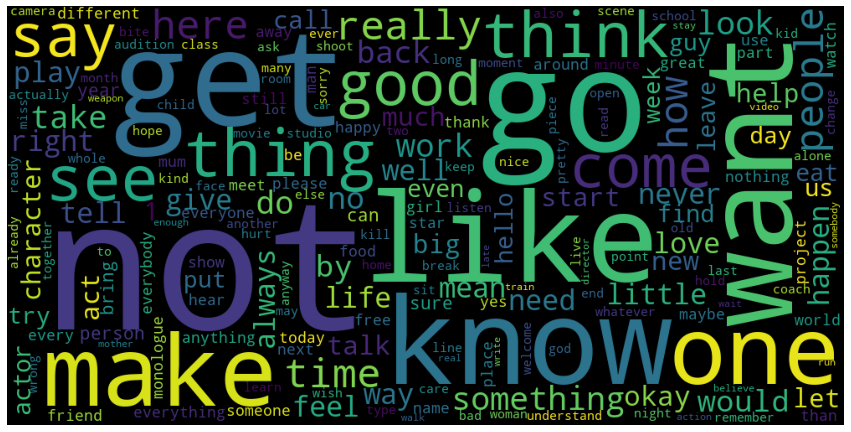

In [ ]:
pos_data = df.loc[df['EmotionMaxVote'] == 'Neutral']
pos_lines = [j for sub in df['Lemma_words'] for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

**We can observe that the high frequency words for both emotions are almost similar. Due to limited words in each rows further cleaning of words can deteriorate make classification difficult for the model.**

In [ ]:
len(df)

4513

# **Splitting dataset into training testing and validation set**

In [ ]:
#Splitting data for further processing
train, test= df[:2500], df[2500:]
test, val = test[:1500], test[1500:]

In [9]:
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/test.csv')
val = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/val.csv')

In [ ]:
val['EmotionMaxVote'].value_counts()

Neutral     230
Happy       171
Anger        54
Sad          41
Disgust       9
Fear          7
Surprise      1
Name: EmotionMaxVote, dtype: int64

In [ ]:
train.to_csv(r'/content/gdrive/MyDrive/Colab Notebooks/train.csv')
test.to_csv(r'/content/gdrive/MyDrive/Colab Notebooks/test.csv')
val.to_csv(r'/content/gdrive/MyDrive/Colab Notebooks/val.csv')

In [ ]:
print(len(train))
print(len(test))
print(len(val))

2500
1500
513


In [10]:
#Removing duplicate links to download main 

#train data
data_train = pd.DataFrame(train, columns=['link','video'])
data_train = data_train.drop_duplicates()
data_train.reset_index(drop =True, inplace=True)
#print(data_train)

#test Data
data_test = pd.DataFrame(test, columns=['link','video'])
data_test = data_test.drop_duplicates()
data_test.reset_index(drop =True, inplace=True)


#Validation data 
data_val = pd.DataFrame(val, columns=['link','video'])
data_val = data_val.drop_duplicates()
data_val.reset_index(drop =True, inplace=True)

In [ ]:
print(len(data_train))
print(len(data_test))
print(len(data_val))

242
142
51


# **Collecting YouTube video data**

In [11]:
import pafy 
from moviepy.editor import *
import os

def download_vid(path, data):
    os.makedirs(path, exist_ok=True)
    a = 0
    for link, video in data.itertuples(index=False):
        if link == a:
            continue
        else:
            title = video + '.mp4'   
            d_path = os.path.join(path,video)
            os.makedirs(d_path, exist_ok=True)
            os.chdir(d_path)
            try:
            
                video = pafy.new(link) 
      
                streams = video.streams 
                for i in streams: 
                    print(i) 
          
    #get best resolution regardless of format 
                best = video.getbest() 

    # Download the video 
                os.chdir(d_path)
                print(title)
                best.download(filepath=d_path)
                print(best.resolution, best.extension)
                os.rename(best.filename, title)
                a = link


            except:
                print("something went wrong")
                a = link


In [12]:
#For training data
path='/content/gdrive/MyDrive/Colab Notebooks/Train_Videos'
download_vid(path, data_train)

ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@540x360
8c56c5ac5.mp4

540x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
76eecf968.mp4

1280x720 mp4


ERROR: Video unavailable


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
7459327df.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
a3f32e3a3.mp4

1280x720 mp4
normal:mp4@640x360
b32a6ac3b.mp4

640x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
c9f0e3623.mp4

1280x720 mp4
normal:mp4@640x360
cbb64e001.mp4

640x360 mp4
normal:mp4@568x320
1f1da840a_1.mp4

568x320 mp4
normal:mp4@568x320
2c09795bb_1.mp4

568x320 mp4
normal:mp4@640x360
normal:mp4@1280x720
4ce6dec16_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
7a0306a52_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
7c05a1135_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
7fbf1c1c7_1.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
55a78acb5_1.mp4

1280x720 mp4
something went wrong
normal:mp4@640x360
793f836eb_1.mp4

640x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
9280b821f_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
68062fe15_1.mp4

1280x720 mp4
normal:mp4@640x360
8563171cd_1.mp4

640x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
133194836_1.mp4

1280x720 mp4
normal:mp4@426x240
c1ff32351_1.mp4

426x240 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
e60748aab_1.mp4

1280x720 mp4
something went wrong
normal:mp4@640x360
f0fdfc967_1.mp4

640x360 mp4
normal:mp4@540x360
normal:mp4@1080x720
f8da01d25_1.mp4

1080x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
1b4e6e04c_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
1b6b8344c_1.mp4

1280x720 mp4


ERROR: Video unavailable
ERROR: Video unavailable


something went wrong
something went wrong


ERROR: Video unavailable


something went wrong
normal:mp4@568x320
3df704c40_1.mp4

568x320 mp4
normal:mp4@640x360
normal:mp4@1280x720
4c0b2b579_1.mp4

1280x720 mp4
normal:mp4@1280x720
normal:mp4@640x360
5c33be3cd_1.mp4

1280x720 mp4
normal:mp4@1280x720
normal:mp4@640x360
6a465b489_1.mp4

1280x720 mp4
normal:mp4@480x360
07ab3c980_1.mp4

480x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
7e4f29359_1.mp4

1280x720 mp4
normal:mp4@426x240
7f71caf17_1.mp4

426x240 mp4
normal:mp4@568x320
8a58bfb30_1.mp4


ERROR: Video unavailable
ERROR: Video unavailable



568x320 mp4
something went wrong
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
10bd5f047_1.mp4

1280x720 mp4
normal:mp4@568x320
86f364c1c_1.mp4

568x320 mp4
normal:mp4@202x360
normal:mp4@406x720
89bb539ca_1.mp4

406x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
116c36ad6_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
179b7f51a_2.mp4


ERROR: Video unavailable



1280x720 mp4
something went wrong
normal:mp4@568x320
1808cc160_1.mp4

568x320 mp4
normal:mp4@540x360
normal:mp4@1080x720
3463ed0d8_1.mp4

1080x720 mp4
normal:mp4@1280x720
normal:mp4@640x360
4091ec374_1.mp4


ERROR: Video unavailable



1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
9152c3951_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
9354b482f_1.mp4

1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
39373c7f9_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
0741917c2_1.mp4

1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
4137641fa_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
04899849f_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
a288edb53_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
b7665abe2_1.mp4


ERROR: Video unavailable



1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
c455e928d_1.mp4

1280x720 mp4
something went wrong
normal:mp4@480x360
c76339de6_1.mp4


ERROR: This video is no longer available due to a copyright claim by Giana Reithmeier.



480x360 mp4
something went wrong
normal:mp4@1280x720
normal:mp4@640x360
c85348358_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
ca12c2f4a_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
da16f0f8f_1.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
dd1f97765_1.mp4


ERROR: Video unavailable



1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
e7afe2353_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
e2750c1bf_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
0e4fe1878_1.mp4

1280x720 mp4
normal:mp4@540x360
09b47f459_1.mp4

540x360 mp4
normal:mp4@640x360
16f978d4a_2.mp4

640x360 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
71091df7b_2.mp4


ERROR: Video unavailable



1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
0e4ee0fb1_1.mp4

1280x720 mp4
normal:mp4@1280x720
normal:mp4@640x360
0f20e173d_1.mp4

1280x720 mp4
normal:mp4@480x360
normal:mp4@960x720
0f3183771_1.mp4


ERROR: Video unavailable



960x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
2af27e034_1.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
3c22d7086_2.mp4

640x360 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
4ae5ecb00_3.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
4b8bb9418_2.mp4

1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
05f6b3a3f_1.mp4

1280x720 mp4


ERROR: Video unavailable


something went wrong


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
8a5d94b0a_1.mp4

1280x720 mp4
normal:mp4@1280x720
normal:mp4@640x360
9c3a9bce7_1.mp4

1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
20d669608_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
22e9f018d_3.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@1280x720
normal:mp4@640x360
105a3c08f_1.mp4


ERROR: Video unavailable



1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
664ea0ccc_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
692e35f74_1.mp4

1280x720 mp4
normal:mp4@640x360
47628d7dd_2.mp4

640x360 mp4
normal:mp4@640x360
112659cd9_1.mp4


ERROR: Video unavailable



640x360 mp4
something went wrong
normal:mp4@480x272
5005286b9_1.mp4

480x272 mp4
normal:mp4@640x360
normal:mp4@1280x720
119334435_1.mp4

1280x720 mp4
normal:mp4@480x360
a30a8c28d_1.mp4

480x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
adcb56bcc_1.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
b748addbd_2.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
be0afeb8c_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
bee9cd4cf_1.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
ERROR: Video unavailable


something went wrong
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
d51aee260_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
d81007915_3.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
dc8197a99_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
dce7e5d5f_2.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
e3b57cfd8_8.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
eefdeb291_1.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
ERROR: Video unavailable


something went wrong
something went wrong
normal:mp4@568x320
1f61459b0.mp4

568x320 mp4
normal:mp4@568x320
a1b44e5f3.mp4

568x320 mp4
normal:mp4@640x360
normal:mp4@1280x720
a7c5bc08c.mp4

1280x720 mp4
normal:mp4@1280x720
normal:mp4@640x360
d1dae148e.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
ddf3a516c.mp4

1280x720 mp4
normal:mp4@1280x720
normal:mp4@640x360
e8a276493.mp4

1280x720 mp4
normal:mp4@640x360
fd41c38b2.mp4

640x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
2b7a44d40_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
175acc2a4_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
610fd0cfb_1.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong


In [ ]:
#For Testing data
path='/content/gdrive/MyDrive/Colab Notebooks/Test_Videos'
download_vid(path, data_test)

ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@480x360
normal:mp4@960x720
c2e8f2b89_1.mp4

960x720 mp4
normal:mp4@480x360
d7c8650e0_1.mp4

480x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
d39d991a8_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
d73b7560a_1.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@320x240
2b47d407c_1.mp4

320x240 mp4
normal:mp4@640x360
normal:mp4@1280x720
3f2e427de_1.mp4


ERROR: This video is no longer available due to a copyright claim by Giana Reithmeier.



1280x720 mp4
something went wrong
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
5ae4d78f1_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
6a3db07f1_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
6b45db6a1_1.mp4

1280x720 mp4
normal:mp4@480x360
7e9cc4f37_1.mp4

480x360 mp4


ERROR: Video unavailable


something went wrong
normal:mp4@1280x720
normal:mp4@640x360
9b882983a_1.mp4

1280x720 mp4


ERROR: Video unavailable


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
23cdb64b3_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
43f9ef86e_1.mp4

1280x720 mp4


ERROR: Video unavailable


something went wrong


ERROR: Video unavailable


something went wrong
normal:mp4@640x360
888f448f5_1.mp4

640x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
8705af2e3_1.mp4

1280x720 mp4
normal:mp4@428x240
99101d5dc_1.mp4

428x240 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
cf197f451_1.mp4

1280x720 mp4


ERROR: Video unavailable


something went wrong


ERROR: Video unavailable


something went wrong
normal:mp4@640x360
0af72f957_1.mp4

640x360 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
16f978d4a_1.mp4

640x360 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.
ERROR: Video unavailable


something went wrong
something went wrong
normal:mp4@640x360
481f43809_1.mp4

640x360 mp4
normal:mp4@540x360
normal:mp4@1080x720
789c8d525_1.mp4

1080x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
71091df7b_4.mp4

1280x720 mp4
normal:mp4@638x360
c22c67af7_1.mp4

638x360 mp4


ERROR: Video unavailable


something went wrong


ERROR: Video unavailable
ERROR: Video unavailable


something went wrong
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
2af27e034_2.mp4

1280x720 mp4


ERROR: Video unavailable


something went wrong


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
3c22d7086_1.mp4

640x360 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
4b8bb9418_1.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@1280x720
normal:mp4@640x360
9c3a9bce7_3.mp4

1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
22e9f018d_5.mp4

1280x720 mp4


ERROR: Video unavailable


something went wrong


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@1280x720
normal:mp4@640x360
105a3c08f_2.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
664ea0ccc_2.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
119334435_6.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
b748addbd_3.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@480x360
cc73c27b5_1.mp4

480x360 mp4
normal:mp4@490x360
d4ac08bf0_1.mp4

490x360 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
d51aee260_8.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
dce7e5d5f_10.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
e3b57cfd8_6.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
0bc7d4e50_1.mp4

1280x720 mp4
normal:mp4@480x360
0d6bef743_1.mp4

480x360 mp4
normal:mp4@1280x720
normal:mp4@640x360
0f2db282f_1.mp4

1280x720 mp4
normal:mp4@480x360
1a8bcc78b_1.mp4

480x360 mp4
normal:mp4@480x272
1d6088392_1.mp4

480x272 mp4
normal:mp4@640x360
normal:mp4@1280x720
1ff5e505f_1.mp4

1280x720 mp4
normal:mp4@480x360
1ff24ecd9_1.mp4

480x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
2ac0083b6_1.mp4

1280x720 mp4
something went wrong
normal:mp4@480x360
2e84a2e3d_1.mp4

480x360 mp4
normal:mp4@1280x720
normal:mp4@640x360
3c8d3c2e6_1.mp4

1280x720 mp4
normal:mp4@480x360
3cacac634_1.mp4

480x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
3e515a9bc_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
3e666b2a3_1.mp4

1280x720 mp4
something went wrong
normal:mp4@1280x720
normal:mp4@640x360
4a1d89a35_1.mp4

1280x720 mp4
normal:mp4@640x360
4b2ffaecb_1.mp4

640x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
4b685cbe9_

ERROR: Video unavailable


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
5db2d5e44_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
05eb0bb02_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
5fb7fa213_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
6d21c3d7d_1.mp4

1280x720 mp4
normal:mp4@480x360
6d71a2500_1.mp4

480x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
7a8f3c5ac_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
7a9dd8d41_1.mp4

1280x720 mp4
normal:mp4@1280x720
normal:mp4@640x360
7aea2de29_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
7caec779f_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
7d5f813e5_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
7dbd8e140_1.mp4

1280x720 mp4
normal:mp4@320x240
8a7020082_1.mp4

320x240 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
8b201e458_1.mp4

1280x720 mp4


In [ ]:
#For Validation data
path='/content/gdrive/MyDrive/Colab Notebooks/Val_Videos'
download_vid(path, data_val)

normal:mp4@640x360
normal:mp4@1280x720
8b201e458_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
8c0186c36_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
8c1814283_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
8d4be5d25_1.mp4

1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
8d6982ee3_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
8e7ad7bd3_1.mp4

1280x720 mp4
normal:mp4@1280x720
normal:mp4@640x360
9a7c346da_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
9bb614e8e_1.mp4


ERROR: Video unavailable



1280x720 mp4
something went wrong
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
9f61ebf45_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
10e90ab5e_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
21b4bf603_1.mp4

1280x720 mp4
normal:mp4@320x240
26cb30b39_1.mp4

320x240 mp4
normal:mp4@640x360
normal:mp4@1280x720
27e6e1f2a_1.mp4

1280x720 mp4
normal:mp4@480x360
32f7de930_1.mp4

480x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
34e5fb120_1.mp4

1280x720 mp4
something went wrong
normal:mp4@640x360
normal:mp4@1280x720
35a87ca15_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
54c1f93cf_1.mp4

1280x720 mp4


ERROR: no conn, hlsvp, hlsManifestUrl or url_encoded_fmt_stream_map information found in video info; please report this issue on https://yt-dl.org/bug . Make sure you are using the latest version; see  https://yt-dl.org/update  on how to update. Be sure to call youtube-dl with the --verbose flag and include its complete output.


something went wrong
normal:mp4@640x360
normal:mp4@1280x720
69dd61cfd_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
70a4d0e2c_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
75bffd291_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
81a54de90_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
82d392e7a_1.mp4

1280x720 mp4
normal:mp4@480x360
82f4433b1_1.mp4

480x360 mp4
normal:mp4@640x360
normal:mp4@1280x720
86ccaaff5_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
90c60583f_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
95d358ed0_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
99ac937e9_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
99dfc5db0_1.mp4

1280x720 mp4
normal:mp4@640x360
normal:mp4@1280x720
106c19134_1.mp4

1280x720 mp4
something went wrong


## **Extracting Audio from video files**

In [ ]:
#for extracting audio from training data
import os
import moviepy.editor
path='/content/gdrive/MyDrive/Colab Notebooks/Train_Videos'
path1 = '/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO'
os.makedirs(path1, exist_ok=True)
for link, video in data_train.itertuples(index=False):
    d_path = os.path.join(path,video)
    s_path = os.path.join(path1,video)
    os.makedirs(s_path, exist_ok=True)
    title = video + '.mp4'
    try:
        os.chdir(d_path)
        vid = moviepy.editor.VideoFileClip(title)
        audio = vid.audio
        # Replace the parameter with the location along with filename
        audio.write_audiofile(s_path+"/"+video+'.mp3')

        print("extracted {}",{title})
        
    except OSError:
        print("file not found")
        print(title)
        
    except :
        print("file not found")
        print(d_path)
        print(os.getcwd())
        print(title)

file not found
5b44393ed.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8c56c5ac5/8c56c5ac5.mp3


100%|██████████| 2494/2494 [00:02<00:00, 832.04it/s]

[MoviePy] Done.


extracted {} {'8c56c5ac5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/76eecf968/76eecf968.mp3


100%|██████████| 1997/1997 [00:02<00:00, 858.62it/s]

[MoviePy] Done.


extracted {} {'76eecf968.mp4'}
file not found
243cff084.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7459327df/7459327df.mp3


100%|██████████| 1536/1536 [00:02<00:00, 713.68it/s]

[MoviePy] Done.


extracted {} {'7459327df.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/a3f32e3a3/a3f32e3a3.mp3


100%|██████████| 1223/1223 [00:01<00:00, 830.33it/s]

[MoviePy] Done.


extracted {} {'a3f32e3a3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b32a6ac3b/b32a6ac3b.mp3


100%|██████████| 2761/2761 [00:04<00:00, 591.89it/s]

[MoviePy] Done.


extracted {} {'b32a6ac3b.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c9f0e3623/c9f0e3623.mp3


100%|██████████| 1692/1692 [00:01<00:00, 904.52it/s]

[MoviePy] Done.


extracted {} {'c9f0e3623.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/cbb64e001/cbb64e001.mp3


100%|██████████| 11910/11910 [00:17<00:00, 687.62it/s]

[MoviePy] Done.


extracted {} {'cbb64e001.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1f1da840a_1/1f1da840a_1.mp3


100%|██████████| 1689/1689 [00:01<00:00, 930.70it/s]

[MoviePy] Done.


extracted {} {'1f1da840a_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2c09795bb_1/2c09795bb_1.mp3


100%|██████████| 6675/6675 [00:07<00:00, 835.84it/s]

[MoviePy] Done.


extracted {} {'2c09795bb_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4ce6dec16_1/4ce6dec16_1.mp3


100%|██████████| 777/777 [00:01<00:00, 616.64it/s]

[MoviePy] Done.


extracted {} {'4ce6dec16_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7a0306a52_1/7a0306a52_1.mp3


100%|██████████| 811/811 [00:00<00:00, 856.83it/s]

[MoviePy] Done.


extracted {} {'7a0306a52_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7c05a1135_1/7c05a1135_1.mp3


100%|██████████| 586/586 [00:00<00:00, 873.54it/s]

[MoviePy] Done.


extracted {} {'7c05a1135_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7fbf1c1c7_1/7fbf1c1c7_1.mp3


100%|██████████| 3511/3511 [00:04<00:00, 839.15it/s]


[MoviePy] Done.
extracted {} {'7fbf1c1c7_1.mp4'}
file not found
46a7f440b_1.mp4
file not found
55a78acb5_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/793f836eb_1/793f836eb_1.mp3


100%|██████████| 1083/1083 [00:01<00:00, 898.95it/s]


[MoviePy] Done.
extracted {} {'793f836eb_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9280b821f_1/9280b821f_1.mp3


100%|██████████| 1026/1026 [00:01<00:00, 886.79it/s]

[MoviePy] Done.


extracted {} {'9280b821f_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/68062fe15_1/68062fe15_1.mp3


100%|██████████| 702/702 [00:00<00:00, 838.22it/s]

[MoviePy] Done.


extracted {} {'68062fe15_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8563171cd_1/8563171cd_1.mp3


100%|██████████| 937/937 [00:01<00:00, 917.82it/s]

[MoviePy] Done.


extracted {} {'8563171cd_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/133194836_1/133194836_1.mp3


100%|██████████| 483/483 [00:00<00:00, 737.53it/s]

[MoviePy] Done.


extracted {} {'133194836_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c1ff32351_1/c1ff32351_1.mp3


100%|██████████| 2575/2575 [00:02<00:00, 863.68it/s]

[MoviePy] Done.


extracted {} {'c1ff32351_1.mp4'}
file not found
c9a1d6f7e_1.mp4
file not found
e60748aab_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f0fdfc967_1/f0fdfc967_1.mp3


100%|██████████| 1578/1578 [00:01<00:00, 895.76it/s]

[MoviePy] Done.


extracted {} {'f0fdfc967_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f8da01d25_1/f8da01d25_1.mp3


100%|██████████| 14106/14106 [00:16<00:00, 853.92it/s]

[MoviePy] Done.


extracted {} {'f8da01d25_1.mp4'}
file not found
f8da01d25_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1b4e6e04c_1/1b4e6e04c_1.mp3


100%|██████████| 1590/1590 [00:02<00:00, 726.77it/s]

[MoviePy] Done.


extracted {} {'1b4e6e04c_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1b6b8344c_1/1b6b8344c_1.mp3


100%|██████████| 1716/1716 [00:02<00:00, 639.66it/s]

[MoviePy] Done.


extracted {} {'1b6b8344c_1.mp4'}
file not found
3a8b0d6ee_1.mp4
file not found
3b5e96d77_1.mp4
file not found
3b44c03f7_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3df704c40_1/3df704c40_1.mp3


100%|██████████| 3525/3525 [00:03<00:00, 944.49it/s]

[MoviePy] Done.


extracted {} {'3df704c40_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4c0b2b579_1/4c0b2b579_1.mp3


100%|██████████| 2697/2697 [00:03<00:00, 847.00it/s]

[MoviePy] Done.


extracted {} {'4c0b2b579_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5c33be3cd_1/5c33be3cd_1.mp3


100%|██████████| 2725/2725 [00:04<00:00, 638.24it/s]

[MoviePy] Done.


extracted {} {'5c33be3cd_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/6a465b489_1/6a465b489_1.mp3


100%|██████████| 1501/1501 [00:01<00:00, 875.46it/s]


[MoviePy] Done.
extracted {} {'6a465b489_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/07ab3c980_1/07ab3c980_1.mp3


100%|██████████| 2114/2114 [00:02<00:00, 844.58it/s]

[MoviePy] Done.


extracted {} {'07ab3c980_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7e4f29359_1/7e4f29359_1.mp3


100%|██████████| 933/933 [00:01<00:00, 805.39it/s]

[MoviePy] Done.


extracted {} {'7e4f29359_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7f71caf17_1/7f71caf17_1.mp3


100%|██████████| 3700/3700 [00:04<00:00, 757.57it/s]

[MoviePy] Done.


extracted {} {'7f71caf17_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8a58bfb30_1/8a58bfb30_1.mp3


100%|██████████| 6607/6607 [00:07<00:00, 865.02it/s]

[MoviePy] Done.


extracted {} {'8a58bfb30_1.mp4'}
file not found
8feb77e1d_1.mp4
file not found
9df863fba_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/10bd5f047_1/10bd5f047_1.mp3


100%|██████████| 1336/1336 [00:01<00:00, 839.50it/s]

[MoviePy] Done.


extracted {} {'10bd5f047_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/86f364c1c_1/86f364c1c_1.mp3


100%|██████████| 2461/2461 [00:02<00:00, 871.97it/s]

[MoviePy] Done.


extracted {} {'86f364c1c_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/89bb539ca_1/89bb539ca_1.mp3


100%|██████████| 733/733 [00:00<00:00, 862.11it/s]

[MoviePy] Done.


extracted {} {'89bb539ca_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/116c36ad6_1/116c36ad6_1.mp3


100%|██████████| 998/998 [00:01<00:00, 810.80it/s]

[MoviePy] Done.


extracted {} {'116c36ad6_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/179b7f51a_2/179b7f51a_2.mp3


100%|██████████| 12058/12058 [00:14<00:00, 804.61it/s]

[MoviePy] Done.


extracted {} {'179b7f51a_2.mp4'}
file not found
505f9b3a2_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1808cc160_1/1808cc160_1.mp3


100%|██████████| 4503/4503 [00:05<00:00, 783.65it/s]

[MoviePy] Done.


extracted {} {'1808cc160_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3463ed0d8_1/3463ed0d8_1.mp3


100%|██████████| 4623/4623 [00:05<00:00, 800.15it/s]

[MoviePy] Done.


extracted {} {'3463ed0d8_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4091ec374_1/4091ec374_1.mp3


100%|██████████| 2482/2482 [00:03<00:00, 622.70it/s]

[MoviePy] Done.


extracted {} {'4091ec374_1.mp4'}
file not found
7241c40a2_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9152c3951_1/9152c3951_1.mp3


100%|██████████| 2978/2978 [00:03<00:00, 787.22it/s]

[MoviePy] Done.


extracted {} {'9152c3951_1.mp4'}
file not found
9354b482f_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/39373c7f9_1/39373c7f9_1.mp3


100%|██████████| 2327/2327 [00:02<00:00, 811.46it/s]

[MoviePy] Done.


extracted {} {'39373c7f9_1.mp4'}
file not found
0741917c2_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4137641fa_1/4137641fa_1.mp3


100%|██████████| 2871/2871 [00:04<00:00, 581.97it/s]

[MoviePy] Done.


extracted {} {'4137641fa_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/04899849f_1/04899849f_1.mp3


100%|██████████| 1204/1204 [00:01<00:00, 783.01it/s]

[MoviePy] Done.


extracted {} {'04899849f_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/a288edb53_1/a288edb53_1.mp3


100%|██████████| 1588/1588 [00:01<00:00, 811.90it/s]


[MoviePy] Done.
extracted {} {'a288edb53_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b7665abe2_1/b7665abe2_1.mp3


100%|██████████| 1174/1174 [00:01<00:00, 611.38it/s]

[MoviePy] Done.


extracted {} {'b7665abe2_1.mp4'}
file not found
b40260530_1.mp4
file not found
c455e928d_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c76339de6_1/c76339de6_1.mp3


100%|██████████| 2620/2620 [00:03<00:00, 764.94it/s]

[MoviePy] Done.


extracted {} {'c76339de6_1.mp4'}
file not found
c609494e2_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c85348358_1/c85348358_1.mp3


100%|██████████| 2238/2238 [00:03<00:00, 709.70it/s]

[MoviePy] Done.


extracted {} {'c85348358_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/ca12c2f4a_1/ca12c2f4a_1.mp3


100%|██████████| 1714/1714 [00:02<00:00, 790.47it/s]

[MoviePy] Done.


extracted {} {'ca12c2f4a_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/da16f0f8f_1/da16f0f8f_1.mp3


100%|██████████| 1619/1619 [00:01<00:00, 818.39it/s]

[MoviePy] Done.


extracted {} {'da16f0f8f_1.mp4'}
file not found
dcafcb201_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dd1f97765_1/dd1f97765_1.mp3


100%|██████████| 2901/2901 [00:04<00:00, 609.98it/s]

[MoviePy] Done.


extracted {} {'dd1f97765_1.mp4'}
file not found
e0fbb351e_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e7afe2353_1/e7afe2353_1.mp3


100%|██████████| 2661/2661 [00:03<00:00, 835.12it/s]

[MoviePy] Done.


extracted {} {'e7afe2353_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e2750c1bf_1/e2750c1bf_1.mp3


100%|██████████| 2349/2349 [00:03<00:00, 702.79it/s]

[MoviePy] Done.


extracted {} {'e2750c1bf_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0e4fe1878_1/0e4fe1878_1.mp3


100%|██████████| 2987/2987 [00:05<00:00, 582.97it/s]

[MoviePy] Done.


extracted {} {'0e4fe1878_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/09b47f459_1/09b47f459_1.mp3


100%|██████████| 2499/2499 [00:03<00:00, 799.78it/s]

[MoviePy] Done.


extracted {} {'09b47f459_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/16f978d4a_2/16f978d4a_2.mp3


100%|██████████| 13817/13817 [00:18<00:00, 758.17it/s]

[MoviePy] Done.


extracted {} {'16f978d4a_2.mp4'}
file not found
22bc84ecb_1.mp4
file not found
34d64e449_1.mp4
file not found
34d64e449_2.mp4
file not found
34d64e449_3.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/71091df7b_2/71091df7b_2.mp3


100%|██████████| 20260/20260 [00:26<00:00, 768.58it/s]

[MoviePy] Done.


extracted {} {'71091df7b_2.mp4'}
file not found
71091df7b_3.mp4
file not found
71091df7b_5.mp4
file not found
71091df7b_6.mp4
file not found
71091df7b_7.mp4
file not found
71091df7b_9.mp4
file not found
0e02ee3c5_2.mp4
file not found
0e02ee3c5_4.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0e4ee0fb1_1/0e4ee0fb1_1.mp3


100%|██████████| 1348/1348 [00:01<00:00, 726.19it/s]

[MoviePy] Done.


extracted {} {'0e4ee0fb1_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0f20e173d_1/0f20e173d_1.mp3


100%|██████████| 4453/4453 [00:05<00:00, 861.88it/s]

[MoviePy] Done.


extracted {} {'0f20e173d_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0f3183771_1/0f3183771_1.mp3


100%|██████████| 958/958 [00:01<00:00, 615.47it/s]

[MoviePy] Done.


extracted {} {'0f3183771_1.mp4'}
file not found
1add840e2_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2af27e034_1/2af27e034_1.mp3


100%|██████████| 2276/2276 [00:03<00:00, 597.74it/s]


[MoviePy] Done.
extracted {} {'2af27e034_1.mp4'}
file not found
2debca276_1.mp4
file not found
2debca276_3.mp4
file not found
2debca276_4.mp4
file not found
2debca276_5.mp4
file not found
2debca276_6.mp4
file not found
2debca276_7.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3c22d7086_2/3c22d7086_2.mp3


100%|██████████| 6724/6724 [00:08<00:00, 818.73it/s]

[MoviePy] Done.


extracted {} {'3c22d7086_2.mp4'}
file not found
3c22d7086_3.mp4
file not found
3ecbd1402_1.mp4
file not found
3ecbd1402_2.mp4
file not found
3ecbd1402_6.mp4
file not found
3ecbd1402_9.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4ae5ecb00_3/4ae5ecb00_3.mp3


100%|██████████| 3272/3272 [00:04<00:00, 743.86it/s]

[MoviePy] Done.


extracted {} {'4ae5ecb00_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4b8bb9418_2/4b8bb9418_2.mp3


100%|██████████| 5078/5078 [00:06<00:00, 762.01it/s]

[MoviePy] Done.


extracted {} {'4b8bb9418_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/05f6b3a3f_1/05f6b3a3f_1.mp3


100%|██████████| 2978/2978 [00:03<00:00, 799.15it/s]

[MoviePy] Done.


extracted {} {'05f6b3a3f_1.mp4'}
file not found
7b3904aa4_2.mp4
file not found
7d0084def_1.mp4
file not found
7d0084def_3.mp4
file not found
7d0084def_4.mp4
file not found
7d0084def_5.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8a5d94b0a_1/8a5d94b0a_1.mp3


100%|██████████| 578/578 [00:00<00:00, 593.27it/s]

[MoviePy] Done.


extracted {} {'8a5d94b0a_1.mp4'}
file not found
9c3a9bce7_1.mp4
file not found
9c3a9bce7_2.mp4
file not found
9c3a9bce7_4.mp4
file not found
9c3a9bce7_5.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/20d669608_1/20d669608_1.mp3


100%|██████████| 9177/9177 [00:11<00:00, 831.91it/s]

[MoviePy] Done.


extracted {} {'20d669608_1.mp4'}
file not found
20d669608_2.mp4
file not found
20d669608_3.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22e9f018d_3/22e9f018d_3.mp3


100%|██████████| 24264/24264 [00:31<00:00, 778.36it/s]

[MoviePy] Done.


extracted {} {'22e9f018d_3.mp4'}
file not found
22e9f018d_4.mp4
file not found
22e9f018d_6.mp4
file not found
64b27f54f_1.mp4
file not found
64b27f54f_2.mp4
file not found
64b27f54f_3.mp4
file not found
78a906313_1.mp4
file not found
78a906313_4.mp4
file not found
78a906313_5.mp4
file not found
78a906313_6.mp4
file not found
78a906313_7.mp4
file not found
78a906313_10.mp4
file not found
78a906313_13.mp4
file not found
78a906313_14.mp4
file not found
78a906313_16.mp4
file not found
78a906313_17.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/105a3c08f_1/105a3c08f_1.mp3


100%|██████████| 9181/9181 [00:14<00:00, 651.99it/s]

[MoviePy] Done.


extracted {} {'105a3c08f_1.mp4'}
file not found
254dc802d_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/664ea0ccc_1/664ea0ccc_1.mp3


100%|██████████| 128349/128349 [02:54<00:00, 734.82it/s]

[MoviePy] Done.


extracted {} {'664ea0ccc_1.mp4'}
file not found
664ea0ccc_3.mp4
file not found
664ea0ccc_5.mp4
file not found
664ea0ccc_6.mp4
file not found
664ea0ccc_8.mp4
file not found
664ea0ccc_10.mp4
file not found
664ea0ccc_11.mp4
file not found
664ea0ccc_13.mp4
file not found
664ea0ccc_15.mp4
file not found
664ea0ccc_16.mp4
file not found
664ea0ccc_17.mp4
file not found
664ea0ccc_19.mp4
file not found
664ea0ccc_20.mp4
file not found
664ea0ccc_21.mp4
file not found
664ea0ccc_22.mp4
file not found
664ea0ccc_24.mp4
file not found
664ea0ccc_26.mp4
file not found
664ea0ccc_27.mp4
file not found
664ea0ccc_29.mp4
file not found
664ea0ccc_30.mp4
file not found
664ea0ccc_33.mp4
file not found
664ea0ccc_35.mp4
file not found
664ea0ccc_36.mp4
file not found
664ea0ccc_37.mp4
file not found
664ea0ccc_38.mp4
file not found
664ea0ccc_40.mp4
file not found
664ea0ccc_41.mp4
file not found
664ea0ccc_42.mp4
file not found
664ea0ccc_43.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AU

100%|██████████| 3303/3303 [00:06<00:00, 509.62it/s]


[MoviePy] Done.
extracted {} {'692e35f74_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/47628d7dd_2/47628d7dd_2.mp3


100%|██████████| 8354/8354 [00:10<00:00, 829.16it/s]

[MoviePy] Done.


extracted {} {'47628d7dd_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/112659cd9_1/112659cd9_1.mp3


100%|██████████| 4573/4573 [00:05<00:00, 866.72it/s]


[MoviePy] Done.
extracted {} {'112659cd9_1.mp4'}
file not found
4432968ab_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5005286b9_1/5005286b9_1.mp3


100%|██████████| 3376/3376 [00:05<00:00, 630.47it/s]

[MoviePy] Done.


extracted {} {'5005286b9_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/119334435_1/119334435_1.mp3


100%|██████████| 30525/30525 [00:37<00:00, 812.26it/s]

[MoviePy] Done.


extracted {} {'119334435_1.mp4'}
file not found
119334435_2.mp4
file not found
119334435_4.mp4
file not found
119334435_5.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/a30a8c28d_1/a30a8c28d_1.mp3


100%|██████████| 4844/4844 [00:06<00:00, 708.19it/s]

[MoviePy] Done.


extracted {} {'a30a8c28d_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/adcb56bcc_1/adcb56bcc_1.mp3


100%|██████████| 3761/3761 [00:04<00:00, 760.11it/s]

[MoviePy] Done.


extracted {} {'adcb56bcc_1.mp4'}
file not found
adcb56bcc_2.mp4
file not found
b018c03de_1.mp4
file not found
b018c03de_3.mp4
file not found
b018c03de_4.mp4
file not found
b018c03de_5.mp4
file not found
b018c03de_7.mp4
file not found
b018c03de_8.mp4
file not found
b018c03de_9.mp4
file not found
b018c03de_10.mp4
file not found
b018c03de_12.mp4
file not found
b018c03de_13.mp4
file not found
b018c03de_16.mp4
file not found
b018c03de_17.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b748addbd_2/b748addbd_2.mp3


100%|██████████| 21469/21469 [00:27<00:00, 789.17it/s]

[MoviePy] Done.


extracted {} {'b748addbd_2.mp4'}
file not found
b748addbd_6.mp4
file not found
b748addbd_7.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/be0afeb8c_1/be0afeb8c_1.mp3


100%|██████████| 2574/2574 [00:03<00:00, 742.33it/s]

[MoviePy] Done.


extracted {} {'be0afeb8c_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/bee9cd4cf_1/bee9cd4cf_1.mp3


100%|██████████| 10043/10043 [00:13<00:00, 726.80it/s]

[MoviePy] Done.


extracted {} {'bee9cd4cf_1.mp4'}
file not found
c2b9c66f3_1.mp4
file not found
c2b9c66f3_2.mp4
file not found
c2b9c66f3_4.mp4
file not found
c2b9c66f3_5.mp4
file not found
c2b9c66f3_6.mp4
file not found
ca88e9866_2.mp4
file not found
d4c1c74d6_3.mp4
file not found
d4c1c74d6_4.mp4
file not found
d4c1c74d6_6.mp4
file not found
d4c1c74d6_8.mp4
file not found
d4c1c74d6_9.mp4
file not found
d17ca4a42_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/d51aee260_1/d51aee260_1.mp3


100%|██████████| 29304/29304 [00:35<00:00, 817.93it/s]

[MoviePy] Done.


extracted {} {'d51aee260_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/d81007915_3/d81007915_3.mp3


100%|██████████| 4583/4583 [00:05<00:00, 831.52it/s]

[MoviePy] Done.


extracted {} {'d81007915_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dc8197a99_1/dc8197a99_1.mp3


100%|██████████| 540/540 [00:00<00:00, 856.14it/s]

[MoviePy] Done.


extracted {} {'dc8197a99_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dce7e5d5f_2/dce7e5d5f_2.mp3


100%|██████████| 26887/26887 [00:34<00:00, 784.73it/s]


[MoviePy] Done.
extracted {} {'dce7e5d5f_2.mp4'}
file not found
dce7e5d5f_5.mp4
file not found
dce7e5d5f_8.mp4
file not found
dce7e5d5f_9.mp4
file not found
dce7e5d5f_14.mp4
file not found
dce7e5d5f_15.mp4
file not found
dce7e5d5f_16.mp4
file not found
dce7e5d5f_17.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e3b57cfd8_8/e3b57cfd8_8.mp3


100%|██████████| 25691/25691 [00:33<00:00, 769.01it/s]

[MoviePy] Done.


extracted {} {'e3b57cfd8_8.mp4'}
file not found
e5b3e64f8_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/eefdeb291_1/eefdeb291_1.mp3


100%|██████████| 2166/2166 [00:02<00:00, 825.56it/s]

[MoviePy] Done.


extracted {} {'eefdeb291_1.mp4'}
file not found
f1f277e5d_1.mp4
file not found
f1f277e5d_2.mp4
file not found
f1f277e5d_4.mp4
file not found
f1f277e5d_5.mp4
file not found
f1f277e5d_8.mp4
file not found
f1f277e5d_9.mp4
file not found
f1f277e5d_10.mp4
file not found
faf0175a4_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1f61459b0/1f61459b0.mp3


100%|██████████| 2951/2951 [00:03<00:00, 845.02it/s]

[MoviePy] Done.


extracted {} {'1f61459b0.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/a1b44e5f3/a1b44e5f3.mp3


100%|██████████| 3236/3236 [00:03<00:00, 855.09it/s]

[MoviePy] Done.


extracted {} {'a1b44e5f3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/a7c5bc08c/a7c5bc08c.mp3


100%|██████████| 1147/1147 [00:01<00:00, 838.40it/s]

[MoviePy] Done.


extracted {} {'a7c5bc08c.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/d1dae148e/d1dae148e.mp3


100%|██████████| 6149/6149 [00:07<00:00, 820.11it/s]

[MoviePy] Done.


extracted {} {'d1dae148e.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/ddf3a516c/ddf3a516c.mp3


100%|██████████| 2631/2631 [00:04<00:00, 612.85it/s]

[MoviePy] Done.


extracted {} {'ddf3a516c.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e8a276493/e8a276493.mp3


100%|██████████| 8439/8439 [00:13<00:00, 646.83it/s]

[MoviePy] Done.


extracted {} {'e8a276493.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/fd41c38b2/fd41c38b2.mp3


100%|██████████| 5173/5173 [00:05<00:00, 890.73it/s]

[MoviePy] Done.


extracted {} {'fd41c38b2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2b7a44d40_1/2b7a44d40_1.mp3


100%|██████████| 1086/1086 [00:01<00:00, 747.76it/s]

[MoviePy] Done.


extracted {} {'2b7a44d40_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/175acc2a4_1/175acc2a4_1.mp3


100%|██████████| 894/894 [00:01<00:00, 619.00it/s]

[MoviePy] Done.


extracted {} {'175acc2a4_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/610fd0cfb_1/610fd0cfb_1.mp3


100%|██████████| 1067/1067 [00:01<00:00, 645.12it/s]

[MoviePy] Done.


extracted {} {'610fd0cfb_1.mp4'}
file not found
975d467b7_1.mp4


In [ ]:
#for extracting audio from testing data
import os
import moviepy.editor
path='/content/gdrive/MyDrive/Colab Notebooks/Test_Videos'
path1 = '/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO'
os.makedirs(path1, exist_ok=True)
for link, video in data_test.itertuples(index=False):
    d_path = os.path.join(path,video)
    s_path = os.path.join(path1,video)
    os.makedirs(s_path, exist_ok=True)
    title = video + '.mp4'
    try:
        os.chdir(d_path)
        vid = moviepy.editor.VideoFileClip(title)
        audio = vid.audio
        # Replace the parameter with the location along with filename
        audio.write_audiofile(s_path+"/"+video+'.mp3')

        print("extracted {}",{title})
        
    except OSError:
        print("file not found")
        print(title)
        
    except :
        print("file not found")
        print(d_path)
        print(os.getcwd())
        print(title)

file not found
975d467b7_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/c2e8f2b89_1/c2e8f2b89_1.mp3


100%|██████████| 872/872 [00:01<00:00, 718.41it/s]

[MoviePy] Done.


extracted {} {'c2e8f2b89_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d7c8650e0_1/d7c8650e0_1.mp3


100%|██████████| 2196/2196 [00:03<00:00, 726.24it/s]

[MoviePy] Done.


extracted {} {'d7c8650e0_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d39d991a8_1/d39d991a8_1.mp3


100%|██████████| 1064/1064 [00:01<00:00, 625.75it/s]

[MoviePy] Done.


extracted {} {'d39d991a8_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d73b7560a_1/d73b7560a_1.mp3


100%|██████████| 1460/1460 [00:01<00:00, 889.35it/s]

[MoviePy] Done.


extracted {} {'d73b7560a_1.mp4'}
file not found
dc937fe58_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2b47d407c_1/2b47d407c_1.mp3


100%|██████████| 5214/5214 [00:06<00:00, 746.93it/s]


[MoviePy] Done.
extracted {} {'2b47d407c_1.mp4'}
file not found
3f2e427de_1.mp4
file not found
4b16a4aa0_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/5ae4d78f1_1/5ae4d78f1_1.mp3


100%|██████████| 1351/1351 [00:01<00:00, 845.41it/s]

[MoviePy] Done.


extracted {} {'5ae4d78f1_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6a3db07f1_1/6a3db07f1_1.mp3


100%|██████████| 1703/1703 [00:02<00:00, 659.73it/s]

[MoviePy] Done.


extracted {} {'6a3db07f1_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6b45db6a1_1/6b45db6a1_1.mp3


100%|██████████| 2901/2901 [00:03<00:00, 824.40it/s]


[MoviePy] Done.
extracted {} {'6b45db6a1_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7e9cc4f37_1/7e9cc4f37_1.mp3


100%|██████████| 1631/1631 [00:01<00:00, 911.74it/s]

[MoviePy] Done.


extracted {} {'7e9cc4f37_1.mp4'}
file not found
8bae01f71_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/9b882983a_1/9b882983a_1.mp3


100%|██████████| 1727/1727 [00:02<00:00, 767.10it/s]

[MoviePy] Done.


extracted {} {'9b882983a_1.mp4'}
file not found
9ce9a4d38_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/23cdb64b3_1/23cdb64b3_1.mp3


100%|██████████| 1274/1274 [00:01<00:00, 865.71it/s]

[MoviePy] Done.


extracted {} {'23cdb64b3_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/43f9ef86e_1/43f9ef86e_1.mp3


100%|██████████| 1665/1665 [00:02<00:00, 831.07it/s]

[MoviePy] Done.


extracted {} {'43f9ef86e_1.mp4'}
file not found
88c192af8_1.mp4
file not found
0853ce554_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/888f448f5_1/888f448f5_1.mp3


100%|██████████| 1244/1244 [00:01<00:00, 906.01it/s]

[MoviePy] Done.


extracted {} {'888f448f5_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8705af2e3_1/8705af2e3_1.mp3


100%|██████████| 1736/1736 [00:01<00:00, 885.08it/s]

[MoviePy] Done.


extracted {} {'8705af2e3_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/99101d5dc_1/99101d5dc_1.mp3


100%|██████████| 6217/6217 [00:09<00:00, 641.69it/s]

[MoviePy] Done.


extracted {} {'99101d5dc_1.mp4'}
file not found
a77361542_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/cf197f451_1/cf197f451_1.mp3


100%|██████████| 3534/3534 [00:04<00:00, 783.46it/s]

[MoviePy] Done.


extracted {} {'cf197f451_1.mp4'}
file not found
d096f5992_1.mp4
file not found
e0fbb351e_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0af72f957_1/0af72f957_1.mp3


100%|██████████| 910/910 [00:01<00:00, 606.92it/s]

[MoviePy] Done.


extracted {} {'0af72f957_1.mp4'}
file not found
7b5fbb086_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/16f978d4a_1/16f978d4a_1.mp3


100%|██████████| 13817/13817 [00:15<00:00, 864.82it/s]

[MoviePy] Done.


extracted {} {'16f978d4a_1.mp4'}
file not found
34d64e449_4.mp4
file not found
95e8075a9_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/481f43809_1/481f43809_1.mp3


100%|██████████| 6116/6116 [00:07<00:00, 831.17it/s]

[MoviePy] Done.


extracted {} {'481f43809_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/789c8d525_1/789c8d525_1.mp3


100%|██████████| 2808/2808 [00:03<00:00, 828.10it/s]

[MoviePy] Done.


extracted {} {'789c8d525_1.mp4'}
file not found
8555b6134_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/71091df7b_4/71091df7b_4.mp3


100%|██████████| 20260/20260 [00:27<00:00, 746.05it/s]

[MoviePy] Done.


extracted {} {'71091df7b_4.mp4'}
file not found
71091df7b_8.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/c22c67af7_1/c22c67af7_1.mp3


100%|██████████| 7888/7888 [00:09<00:00, 840.01it/s]

[MoviePy] Done.


extracted {} {'c22c67af7_1.mp4'}
file not found
d2ed51271_1.mp4
file not found
0e02ee3c5_1.mp4
file not found
1add840e2_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2af27e034_2/2af27e034_2.mp3


100%|██████████| 2276/2276 [00:03<00:00, 616.85it/s]

[MoviePy] Done.


extracted {} {'2af27e034_2.mp4'}
file not found
2c6068729_1.mp4
file not found
2debca276_8.mp4
file not found
2debca276_9.mp4
file not found
2debca276_10.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3c22d7086_1/3c22d7086_1.mp3


100%|██████████| 6724/6724 [00:08<00:00, 839.00it/s]


[MoviePy] Done.
extracted {} {'3c22d7086_1.mp4'}
file not found
3ecbd1402_4.mp4
file not found
3ecbd1402_7.mp4
file not found
3ecbd1402_8.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4b8bb9418_1/4b8bb9418_1.mp3


100%|██████████| 5078/5078 [00:06<00:00, 776.16it/s]

[MoviePy] Done.


extracted {} {'4b8bb9418_1.mp4'}
file not found
7d0084def_2.mp4
file not found
9c3a9bce7_3.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/22e9f018d_5/22e9f018d_5.mp3


100%|██████████| 24264/24264 [00:30<00:00, 786.77it/s]

[MoviePy] Done.


extracted {} {'22e9f018d_5.mp4'}
file not found
39a0f8534_1.mp4
file not found
39a0f8534_2.mp4
file not found
64b27f54f_5.mp4
file not found
78a906313_2.mp4
file not found
78a906313_8.mp4
file not found
78a906313_9.mp4
file not found
78a906313_15.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/105a3c08f_2/105a3c08f_2.mp3


100%|██████████| 9181/9181 [00:14<00:00, 648.38it/s]

[MoviePy] Done.


extracted {} {'105a3c08f_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/664ea0ccc_2/664ea0ccc_2.mp3


100%|██████████| 128349/128349 [02:52<00:00, 743.17it/s]

[MoviePy] Done.


extracted {} {'664ea0ccc_2.mp4'}
file not found
664ea0ccc_4.mp4
file not found
664ea0ccc_7.mp4
file not found
664ea0ccc_9.mp4
file not found
664ea0ccc_12.mp4
file not found
664ea0ccc_28.mp4
file not found
664ea0ccc_39.mp4
file not found
664ea0ccc_44.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/119334435_6/119334435_6.mp3


100%|██████████| 30525/30525 [00:40<00:00, 751.05it/s]


[MoviePy] Done.
extracted {} {'119334435_6.mp4'}
file not found
b018c03de_2.mp4
file not found
b018c03de_6.mp4
file not found
b018c03de_11.mp4
file not found
b018c03de_14.mp4
file not found
b018c03de_15.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/b748addbd_3/b748addbd_3.mp3


100%|██████████| 21469/21469 [00:27<00:00, 774.85it/s]

[MoviePy] Done.


extracted {} {'b748addbd_3.mp4'}
file not found
c2b9c66f3_3.mp4
file not found
c2b9c66f3_7.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/cc73c27b5_1/cc73c27b5_1.mp3


100%|██████████| 3547/3547 [00:04<00:00, 848.74it/s]

[MoviePy] Done.


extracted {} {'cc73c27b5_1.mp4'}
file not found
cc73c27b5_3.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d4ac08bf0_1/d4ac08bf0_1.mp3


100%|██████████| 3045/3045 [00:04<00:00, 639.19it/s]


[MoviePy] Done.
extracted {} {'d4ac08bf0_1.mp4'}
file not found
d4c1c74d6_1.mp4
file not found
d4c1c74d6_5.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d51aee260_8/d51aee260_8.mp3


100%|██████████| 29304/29304 [00:35<00:00, 828.58it/s]

[MoviePy] Done.


extracted {} {'d51aee260_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dce7e5d5f_10/dce7e5d5f_10.mp3


100%|██████████| 26887/26887 [00:33<00:00, 802.83it/s]

[MoviePy] Done.


extracted {} {'dce7e5d5f_10.mp4'}
file not found
dce7e5d5f_12.mp4
file not found
dce7e5d5f_13.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/e3b57cfd8_6/e3b57cfd8_6.mp3


100%|██████████| 25691/25691 [00:32<00:00, 801.44it/s]


[MoviePy] Done.
extracted {} {'e3b57cfd8_6.mp4'}
file not found
e3b57cfd8_9.mp4
file not found
f1f277e5d_3.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0bc7d4e50_1/0bc7d4e50_1.mp3


100%|██████████| 3146/3146 [00:04<00:00, 692.39it/s]

[MoviePy] Done.


extracted {} {'0bc7d4e50_1.mp4'}
file not found
0bc7d4e50_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0d6bef743_1/0d6bef743_1.mp3


100%|██████████| 2596/2596 [00:02<00:00, 883.79it/s]

[MoviePy] Done.


extracted {} {'0d6bef743_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0f2db282f_1/0f2db282f_1.mp3


100%|██████████| 1401/1401 [00:02<00:00, 651.58it/s]


[MoviePy] Done.
extracted {} {'0f2db282f_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/1a8bcc78b_1/1a8bcc78b_1.mp3


100%|██████████| 1563/1563 [00:01<00:00, 881.14it/s]

[MoviePy] Done.


extracted {} {'1a8bcc78b_1.mp4'}
file not found
1a8bcc78b_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/1d6088392_1/1d6088392_1.mp3


100%|██████████| 3376/3376 [00:05<00:00, 577.48it/s]

[MoviePy] Done.


extracted {} {'1d6088392_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/1ff5e505f_1/1ff5e505f_1.mp3


100%|██████████| 797/797 [00:01<00:00, 747.08it/s]

[MoviePy] Done.


extracted {} {'1ff5e505f_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/1ff24ecd9_1/1ff24ecd9_1.mp3


100%|██████████| 2893/2893 [00:03<00:00, 909.23it/s]


[MoviePy] Done.
extracted {} {'1ff24ecd9_1.mp4'}
file not found
2ac0083b6_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2e84a2e3d_1/2e84a2e3d_1.mp3


100%|██████████| 2880/2880 [00:03<00:00, 933.34it/s] 

[MoviePy] Done.


extracted {} {'2e84a2e3d_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3c8d3c2e6_1/3c8d3c2e6_1.mp3


100%|██████████| 2485/2485 [00:03<00:00, 673.97it/s]

[MoviePy] Done.


extracted {} {'3c8d3c2e6_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3cacac634_1/3cacac634_1.mp3


100%|██████████| 2965/2965 [00:03<00:00, 888.88it/s]

[MoviePy] Done.


extracted {} {'3cacac634_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3e515a9bc_1/3e515a9bc_1.mp3


100%|██████████| 753/753 [00:00<00:00, 895.87it/s]

[MoviePy] Done.


extracted {} {'3e515a9bc_1.mp4'}
file not found
3e666b2a3_1.mp4
file not found
3e666b2a3_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4a1d89a35_1/4a1d89a35_1.mp3


100%|██████████| 2839/2839 [00:03<00:00, 846.81it/s]

[MoviePy] Done.


extracted {} {'4a1d89a35_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4b2ffaecb_1/4b2ffaecb_1.mp3


100%|██████████| 2596/2596 [00:03<00:00, 704.42it/s]

[MoviePy] Done.


extracted {} {'4b2ffaecb_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4b685cbe9_1/4b685cbe9_1.mp3


100%|██████████| 2116/2116 [00:02<00:00, 714.28it/s]

[MoviePy] Done.


extracted {} {'4b685cbe9_1.mp4'}
file not found
4b685cbe9_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4bf764f4f_1/4bf764f4f_1.mp3


100%|██████████| 4100/4100 [00:04<00:00, 915.07it/s]


[MoviePy] Done.
extracted {} {'4bf764f4f_1.mp4'}
file not found
4bf764f4f_2.mp4
file not found
4bf764f4f_3.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4c74a7326_1/4c74a7326_1.mp3


100%|██████████| 957/957 [00:01<00:00, 830.24it/s]

[MoviePy] Done.


extracted {} {'4c74a7326_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4e03b2993_1/4e03b2993_1.mp3


100%|██████████| 2766/2766 [00:04<00:00, 623.85it/s]

[MoviePy] Done.


extracted {} {'4e03b2993_1.mp4'}
file not found
4e03b2993_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/5b1fe4bd9_1/5b1fe4bd9_1.mp3


100%|██████████| 1372/1372 [00:02<00:00, 649.23it/s]

[MoviePy] Done.


extracted {} {'5b1fe4bd9_1.mp4'}
file not found
5ba7890ab_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/5db2d5e44_1/5db2d5e44_1.mp3


100%|██████████| 1233/1233 [00:01<00:00, 884.43it/s]

[MoviePy] Done.


extracted {} {'5db2d5e44_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/05eb0bb02_1/05eb0bb02_1.mp3


100%|██████████| 4254/4254 [00:06<00:00, 689.98it/s]

[MoviePy] Done.


extracted {} {'05eb0bb02_1.mp4'}
file not found
05eb0bb02_2.mp4
file not found
05eb0bb02_3.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/5fb7fa213_1/5fb7fa213_1.mp3


100%|██████████| 1684/1684 [00:01<00:00, 888.18it/s]

[MoviePy] Done.


extracted {} {'5fb7fa213_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d21c3d7d_1/6d21c3d7d_1.mp3


100%|██████████| 4753/4753 [00:05<00:00, 856.02it/s]

[MoviePy] Done.


extracted {} {'6d21c3d7d_1.mp4'}
file not found
6d21c3d7d_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d71a2500_1/6d71a2500_1.mp3


100%|██████████| 14561/14561 [00:18<00:00, 791.24it/s]

[MoviePy] Done.


extracted {} {'6d71a2500_1.mp4'}
file not found
6d71a2500_2.mp4
file not found
6d71a2500_3.mp4
file not found
6d71a2500_4.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7a8f3c5ac_1/7a8f3c5ac_1.mp3


100%|██████████| 762/762 [00:00<00:00, 872.35it/s]

[MoviePy] Done.


extracted {} {'7a8f3c5ac_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7a9dd8d41_1/7a9dd8d41_1.mp3


100%|██████████| 2726/2726 [00:04<00:00, 673.54it/s]

[MoviePy] Done.


extracted {} {'7a9dd8d41_1.mp4'}
file not found
7a9dd8d41_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7aea2de29_1/7aea2de29_1.mp3


100%|██████████| 2963/2963 [00:04<00:00, 679.36it/s]


[MoviePy] Done.
extracted {} {'7aea2de29_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7caec779f_1/7caec779f_1.mp3


100%|██████████| 2144/2144 [00:03<00:00, 645.62it/s]


[MoviePy] Done.
extracted {} {'7caec779f_1.mp4'}
file not found
7caec779f_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d5f813e5_1/7d5f813e5_1.mp3


100%|██████████| 3607/3607 [00:04<00:00, 880.48it/s]

[MoviePy] Done.


extracted {} {'7d5f813e5_1.mp4'}
file not found
7d5f813e5_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7dbd8e140_1/7dbd8e140_1.mp3


100%|██████████| 2157/2157 [00:02<00:00, 883.88it/s]

[MoviePy] Done.


extracted {} {'7dbd8e140_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8a7020082_1/8a7020082_1.mp3


100%|██████████| 2892/2892 [00:03<00:00, 898.16it/s]

[MoviePy] Done.


extracted {} {'8a7020082_1.mp4'}
file not found
8b6d9c06b_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8b201e458_1/8b201e458_1.mp3


100%|██████████| 6386/6386 [00:10<00:00, 627.75it/s]

[MoviePy] Done.
extracted {} {'8b201e458_1.mp4'}


In [ ]:
#for extracting audio from validation data
import os
import moviepy.editor
path='/content/gdrive/MyDrive/Colab Notebooks/Val_Videos'
path1 = '/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO'
os.makedirs(path1, exist_ok=True)
for link, video in data_val.itertuples(index=False):
    d_path = os.path.join(path,video)
    s_path = os.path.join(path1,video)
    os.makedirs(s_path, exist_ok=True)
    title = video + '.mp4'
    try:
        os.chdir(d_path)
        vid = moviepy.editor.VideoFileClip(title)
        audio = vid.audio
        # Replace the parameter with the location along with filename
        audio.write_audiofile(s_path+"/"+video+'.mp3')

        print("extracted {}",{title})
        
    except OSError:
        print("file not found")
        print(title)
        
    except :
        print("file not found")
        print(d_path)
        print(os.getcwd())
        print(title)

[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8b201e458_1/8b201e458_1.mp3


100%|██████████| 6386/6386 [00:10<00:00, 625.05it/s]


[MoviePy] Done.
extracted {} {'8b201e458_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8c0186c36_1/8c0186c36_1.mp3


100%|██████████| 2360/2360 [00:03<00:00, 698.77it/s]

[MoviePy] Done.


extracted {} {'8c0186c36_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8c1814283_1/8c1814283_1.mp3


100%|██████████| 11162/11162 [00:14<00:00, 766.97it/s]


[MoviePy] Done.
extracted {} {'8c1814283_1.mp4'}
file not found
8c1814283_2.mp4
file not found
8c1814283_3.mp4
file not found
8c1814283_4.mp4
file not found
8c1814283_5.mp4
file not found
8d4be5d25_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8d6982ee3_1/8d6982ee3_1.mp3


100%|██████████| 3954/3954 [00:04<00:00, 842.36it/s]

[MoviePy] Done.


extracted {} {'8d6982ee3_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8e7ad7bd3_1/8e7ad7bd3_1.mp3


100%|██████████| 1352/1352 [00:02<00:00, 646.57it/s]

[MoviePy] Done.


extracted {} {'8e7ad7bd3_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9a7c346da_1/9a7c346da_1.mp3


100%|██████████| 1788/1788 [00:02<00:00, 702.19it/s]

[MoviePy] Done.


extracted {} {'9a7c346da_1.mp4'}
file not found
9bb614e8e_1.mp4
file not found
9bd67e0c1_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9f61ebf45_1/9f61ebf45_1.mp3


100%|██████████| 6587/6587 [00:09<00:00, 721.23it/s]

[MoviePy] Done.


extracted {} {'9f61ebf45_1.mp4'}
file not found
9f61ebf45_2.mp4
file not found
9f61ebf45_3.mp4
file not found
9f61ebf45_4.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/10e90ab5e_1/10e90ab5e_1.mp3


100%|██████████| 1648/1648 [00:02<00:00, 623.37it/s]

[MoviePy] Done.


extracted {} {'10e90ab5e_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/21b4bf603_1/21b4bf603_1.mp3


100%|██████████| 4148/4148 [00:04<00:00, 868.03it/s]

[MoviePy] Done.


extracted {} {'21b4bf603_1.mp4'}
file not found
21b4bf603_2.mp4
file not found
21b4bf603_3.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/26cb30b39_1/26cb30b39_1.mp3


100%|██████████| 5141/5141 [00:05<00:00, 904.01it/s]

[MoviePy] Done.


extracted {} {'26cb30b39_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/27e6e1f2a_1/27e6e1f2a_1.mp3


100%|██████████| 5313/5313 [00:06<00:00, 827.46it/s]

[MoviePy] Done.


extracted {} {'27e6e1f2a_1.mp4'}
file not found
27e6e1f2a_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/32f7de930_1/32f7de930_1.mp3


100%|██████████| 4414/4414 [00:04<00:00, 909.17it/s]

[MoviePy] Done.


extracted {} {'32f7de930_1.mp4'}
file not found
32f7de930_3.mp4
file not found
32f7de930_4.mp4
file not found
32f7de930_5.mp4
file not found
34e5fb120_1.mp4
file not found
34e5fb120_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/35a87ca15_1/35a87ca15_1.mp3


100%|██████████| 1324/1324 [00:01<00:00, 883.62it/s]

[MoviePy] Done.


extracted {} {'35a87ca15_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/54c1f93cf_1/54c1f93cf_1.mp3


100%|██████████| 1279/1279 [00:01<00:00, 873.62it/s]

[MoviePy] Done.


extracted {} {'54c1f93cf_1.mp4'}
file not found
58cc2fb3c_1.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/69dd61cfd_1/69dd61cfd_1.mp3


100%|██████████| 7148/7148 [00:11<00:00, 606.64it/s]

[MoviePy] Done.


extracted {} {'69dd61cfd_1.mp4'}
file not found
69dd61cfd_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/70a4d0e2c_1/70a4d0e2c_1.mp3


100%|██████████| 851/851 [00:00<00:00, 890.31it/s]

[MoviePy] Done.


extracted {} {'70a4d0e2c_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/75bffd291_1/75bffd291_1.mp3


100%|██████████| 2026/2026 [00:02<00:00, 857.02it/s]


[MoviePy] Done.
extracted {} {'75bffd291_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/81a54de90_1/81a54de90_1.mp3


100%|██████████| 896/896 [00:01<00:00, 875.38it/s]

[MoviePy] Done.


extracted {} {'81a54de90_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82d392e7a_1/82d392e7a_1.mp3


100%|██████████| 7051/7051 [00:08<00:00, 848.78it/s]

[MoviePy] Done.


extracted {} {'82d392e7a_1.mp4'}
file not found
82d392e7a_2.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82f4433b1_1/82f4433b1_1.mp3


100%|██████████| 3609/3609 [00:03<00:00, 905.40it/s]

[MoviePy] Done.


extracted {} {'82f4433b1_1.mp4'}
file not found
82f4433b1_2.mp4
file not found
82f4433b1_3.mp4
file not found
82f4433b1_4.mp4
file not found
82f4433b1_5.mp4
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/86ccaaff5_1/86ccaaff5_1.mp3


100%|██████████| 1746/1746 [00:03<00:00, 557.32it/s]

[MoviePy] Done.


extracted {} {'86ccaaff5_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/90c60583f_1/90c60583f_1.mp3


100%|██████████| 1131/1131 [00:01<00:00, 608.41it/s]

[MoviePy] Done.


extracted {} {'90c60583f_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/95d358ed0_1/95d358ed0_1.mp3


100%|██████████| 2694/2694 [00:03<00:00, 679.82it/s]

[MoviePy] Done.


extracted {} {'95d358ed0_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/99ac937e9_1/99ac937e9_1.mp3


100%|██████████| 593/593 [00:00<00:00, 892.67it/s]

[MoviePy] Done.


extracted {} {'99ac937e9_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/99dfc5db0_1/99dfc5db0_1.mp3


100%|██████████| 4206/4206 [00:06<00:00, 657.40it/s]

[MoviePy] Done.


extracted {} {'99dfc5db0_1.mp4'}
file not found
106c19134_1.mp4


Dividing Audio clips as per the start and end timestamps given in the csv

In [ ]:
#For training dataset
data_train = pd.DataFrame(train, columns=['link','start','end','video','utterance','EmotionMaxVote'])
#For Testind dataset 
data_test = pd.DataFrame(data=test, columns=['link','start','end','video','utterance','EmotionMaxVote'])
#For validation dataset
data_val = pd.DataFrame(data=val, columns=['link','start','end','video','utterance','EmotionMaxVote'])

In [ ]:
data_train.head(20)

link  ...  EmotionMaxVote
0   https://www.youtube.com/watch?v=CROcsl0lIec  ...         Neutral
1   https://www.youtube.com/watch?v=CROcsl0lIec  ...           Happy
2   https://www.youtube.com/watch?v=CROcsl0lIec  ...         Neutral
3   https://www.youtube.com/watch?v=CROcsl0lIec  ...           Anger
4   https://www.youtube.com/watch?v=CROcsl0lIec  ...             Sad
5   https://www.youtube.com/watch?v=CROcsl0lIec  ...           Anger
6   https://www.youtube.com/watch?v=CROcsl0lIec  ...           Happy
7   https://www.youtube.com/watch?v=CROcsl0lIec  ...         Neutral
9   https://www.youtube.com/watch?v=CROcsl0lIec  ...           Happy
10  https://www.youtube.com/watch?v=CROcsl0lIec  ...         Neutral
12  https://www.youtube.com/watch?v=CROcsl0lIec  ...         Disgust
13  https://www.youtube.com/watch?v=CROcsl0lIec  ...            Fear
14  https://www.youtube.com/watch?v=CROcsl0lIec  ...           Anger
15  https://www.youtube.com/watch?v=CROcsl0lIec  ...         Neutral
19  https://www.youtube.com/watch?v=Zrx1BfbOysg  ...             Sad
20  https://www.youtube.com/watch?v=Zrx1BfbOysg  ...             Sad
21  https://www.youtube.com/watch?v=Zrx1BfbOysg  ...             Sad
22  https://www.youtube.com/watch?v=Zrx1BfbOysg  ...             Sad
23  https://www.youtube.com/watch?v=Zrx1BfbOysg  ...             Sad
24  https://www.youtube.com/watch?v=Zrx1BfbOysg  ...             Sad

[20 rows x 6 columns]

# **Clipping audios as per timestamps in the csv**

In [ ]:
#for dividing audio clips for training dataset
import os
import cv2
import shutil
path='/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO'
path1 = '/content/gdrive/MyDrive/Colab Notebooks/Train_Aud'
os.makedirs(path1, exist_ok=True)
for link, start, end, video, utt, emotion in data_train.itertuples(index=False):
    d_path = os.path.join(path,video)
    s_path = os.path.join(path1,emotion)
    os.makedirs(s_path, exist_ok=True)
    title = video + '.mp3'
    try:
            
        os.chdir(d_path)
        aud = moviepy.editor.AudioFileClip(title)
        #audio = aud.audio
        #clipping videos as per timestamp in the csv file
        # cut the last two seconds of the clip:
        newclip = aud.subclip(start,end)
        Destination = s_path + '/' + video + '_' + utt
        newclip.write_audiofile(Destination+'.mp3')
        #sorting clipped videos as per their emotions
        #Source = d_path + '/' + utt
        #Destination = s_path + '/' + video + '_' + utt
        #shutil.move(Source,Destination)
        #clip = VideoFileClip(title).cutout(start,end)
        #clip.write_videofile(utt)
        print("clipped to {}",{Destination})
        
    except OSError:
        print("file not found")
        print(title)
        
   # except :
        print("file not found")
        print(d_path)
        print(os.getcwd())
        print(title)

file not found
5b44393ed.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5b44393ed
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5b44393ed
5b44393ed.mp3
file not found
5b44393ed.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5b44393ed
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5b44393ed
5b44393ed.mp3
file not found
5b44393ed.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5b44393ed
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5b44393ed
5b44393ed.mp3
file not found
5b44393ed.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5b44393ed
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5b44393ed
5b44393ed.mp3
file not found
5b44393ed.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5b44393ed
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/5b44393ed
5b44393ed.mp3
file not found
5b44393ed.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_

100%|██████████| 127/127 [00:00<00:00, 695.35it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_4.mp4.mp3


100%|██████████| 68/68 [00:00<00:00, 531.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_5.mp4.mp3


100%|██████████| 78/78 [00:00<00:00, 508.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_6.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 475.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_7.mp4.mp3


100%|██████████| 23/23 [00:00<00:00, 229.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_8.mp4.mp3


100%|██████████| 28/28 [00:00<00:00, 248.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8c56c5ac5_utterance_10.mp4.mp3


100%|██████████| 50/50 [00:00<00:00, 243.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8c56c5ac5_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/8c56c5ac5_utterance_11.mp4.mp3


100%|██████████| 113/113 [00:00<00:00, 460.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/8c56c5ac5_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_13.mp4.mp3


100%|██████████| 100/100 [00:00<00:00, 372.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8c56c5ac5_utterance_15.mp4.mp3


100%|██████████| 177/177 [00:00<00:00, 509.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8c56c5ac5_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8c56c5ac5_utterance_18.mp4.mp3


100%|██████████| 89/89 [00:00<00:00, 420.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8c56c5ac5_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8c56c5ac5_utterance_19.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 300.68it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8c56c5ac5_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_21.mp4.mp3


100%|██████████| 81/81 [00:00<00:00, 359.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/8c56c5ac5_utterance_22.mp4.mp3


100%|██████████| 19/19 [00:00<00:00, 173.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/8c56c5ac5_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8c56c5ac5_utterance_23.mp4.mp3


100%|██████████| 195/195 [00:00<00:00, 522.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8c56c5ac5_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_28.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 544.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/8c56c5ac5_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/76eecf968_utterance_1.mp4.mp3


100%|██████████| 69/69 [00:00<00:00, 808.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/76eecf968_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_2.mp4.mp3


100%|██████████| 187/187 [00:00<00:00, 522.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_3.mp4.mp3


100%|██████████| 147/147 [00:00<00:00, 549.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_4.mp4.mp3


100%|██████████| 44/44 [00:00<00:00, 319.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_5.mp4.mp3


100%|██████████| 107/107 [00:00<00:00, 429.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/76eecf968_utterance_6.mp4.mp3


100%|██████████| 129/129 [00:00<00:00, 412.68it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/76eecf968_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_7.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 360.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_8.mp4.mp3


100%|██████████| 201/201 [00:00<00:00, 541.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/76eecf968_utterance_9.mp4.mp3


100%|██████████| 108/108 [00:00<00:00, 423.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/76eecf968_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/76eecf968_utterance_10.mp4.mp3


100%|██████████| 264/264 [00:00<00:00, 540.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/76eecf968_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_11.mp4.mp3


100%|██████████| 35/35 [00:00<00:00, 244.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/76eecf968_utterance_11.mp4'}
file not found
243cff084.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/243cff084
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/243cff084
243cff084.mp3
file not found
243cff084.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/243cff084
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/243cff084
243cff084.mp3
file not found
243cff084.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/243cff084
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/243cff084
243cff084.mp3
file not found
243cff084.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/243cff084
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/243cff084
243cff084.mp3
file not found
243cff084.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/243cff084
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/243cff084
2

100%|██████████| 74/74 [00:00<00:00, 756.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7459327df_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7459327df_utterance_4.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 438.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7459327df_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7459327df_utterance_5.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 431.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7459327df_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/7459327df_utterance_6.mp4.mp3


100%|██████████| 28/28 [00:00<00:00, 305.25it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/7459327df_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7459327df_utterance_8.mp4.mp3


100%|██████████| 84/84 [00:00<00:00, 424.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7459327df_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7459327df_utterance_9.mp4.mp3


100%|██████████| 16/16 [00:00<00:00, 149.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7459327df_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/7459327df_utterance_11.mp4.mp3


100%|██████████| 49/49 [00:00<00:00, 259.57it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/7459327df_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/7459327df_utterance_12.mp4.mp3


100%|██████████| 49/49 [00:00<00:00, 269.00it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/7459327df_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7459327df_utterance_13.mp4.mp3


100%|██████████| 76/76 [00:00<00:00, 364.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7459327df_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7459327df_utterance_14.mp4.mp3


100%|██████████| 96/96 [00:00<00:00, 392.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7459327df_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7459327df_utterance_16.mp4.mp3


100%|██████████| 41/41 [00:00<00:00, 265.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7459327df_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7459327df_utterance_17.mp4.mp3


100%|██████████| 49/49 [00:00<00:00, 291.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7459327df_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7459327df_utterance_19.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 280.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7459327df_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/7459327df_utterance_20.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 296.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/7459327df_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7459327df_utterance_21.mp4.mp3


100%|██████████| 68/68 [00:00<00:00, 315.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7459327df_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a3f32e3a3_utterance_2.mp4.mp3


100%|██████████| 26/26 [00:00<00:00, 2869.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a3f32e3a3_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/a3f32e3a3_utterance_3.mp4.mp3


100%|██████████| 79/79 [00:00<00:00, 584.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/a3f32e3a3_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a3f32e3a3_utterance_5.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 525.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a3f32e3a3_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a3f32e3a3_utterance_6.mp4.mp3


100%|██████████| 49/49 [00:00<00:00, 330.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a3f32e3a3_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a3f32e3a3_utterance_7.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 262.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a3f32e3a3_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/a3f32e3a3_utterance_8.mp4.mp3


100%|██████████| 123/123 [00:00<00:00, 417.15it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/a3f32e3a3_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a3f32e3a3_utterance_9.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 464.75it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a3f32e3a3_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/b32a6ac3b_utterance_1.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 490.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/b32a6ac3b_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b32a6ac3b_utterance_3.mp4.mp3


100%|██████████| 442/442 [00:00<00:00, 463.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b32a6ac3b_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b32a6ac3b_utterance_4.mp4.mp3


100%|██████████| 75/75 [00:00<00:00, 308.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b32a6ac3b_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b32a6ac3b_utterance_5.mp4.mp3


100%|██████████| 88/88 [00:00<00:00, 290.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b32a6ac3b_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b32a6ac3b_utterance_6.mp4.mp3


100%|██████████| 165/165 [00:00<00:00, 354.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b32a6ac3b_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/b32a6ac3b_utterance_7.mp4.mp3


100%|██████████| 29/29 [00:00<00:00, 237.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/b32a6ac3b_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/b32a6ac3b_utterance_8.mp4.mp3


100%|██████████| 677/677 [00:01<00:00, 439.99it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/b32a6ac3b_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/b32a6ac3b_utterance_9.mp4.mp3


100%|██████████| 154/154 [00:00<00:00, 336.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/b32a6ac3b_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c9f0e3623_utterance_4.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 237.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c9f0e3623_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/c9f0e3623_utterance_5.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 236.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/c9f0e3623_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c9f0e3623_utterance_7.mp4.mp3


100%|██████████| 34/34 [00:00<00:00, 305.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c9f0e3623_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c9f0e3623_utterance_8.mp4.mp3


100%|██████████| 17/17 [00:00<00:00, 140.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c9f0e3623_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/c9f0e3623_utterance_9.mp4.mp3


100%|██████████| 23/23 [00:00<00:00, 194.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/c9f0e3623_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_1.mp4.mp3


100%|██████████| 372/372 [00:00<00:00, 601.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_3.mp4.mp3


100%|██████████| 39/39 [00:00<00:00, 294.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_4.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 287.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_5.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 400.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_7.mp4.mp3


100%|██████████| 34/34 [00:00<00:00, 285.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_8.mp4.mp3


100%|██████████| 190/190 [00:00<00:00, 474.46it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_9.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 257.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_10.mp4.mp3


100%|██████████| 169/169 [00:00<00:00, 461.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_11.mp4.mp3


100%|██████████| 169/169 [00:00<00:00, 447.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_12.mp4.mp3


100%|██████████| 31/31 [00:00<00:00, 270.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_13.mp4.mp3


100%|██████████| 75/75 [00:00<00:00, 320.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_14.mp4.mp3


100%|██████████| 173/173 [00:00<00:00, 461.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_16.mp4.mp3


100%|██████████| 63/63 [00:00<00:00, 308.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_17.mp4.mp3


100%|██████████| 159/159 [00:00<00:00, 447.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_18.mp4.mp3


100%|██████████| 115/115 [00:00<00:00, 425.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_19.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 266.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_20.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 290.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_21.mp4.mp3


100%|██████████| 108/108 [00:00<00:00, 392.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_22.mp4.mp3


100%|██████████| 92/92 [00:00<00:00, 362.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_23.mp4.mp3


100%|██████████| 145/145 [00:00<00:00, 436.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_31.mp4.mp3


100%|██████████| 265/265 [00:00<00:00, 533.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_31.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_32.mp4.mp3


100%|██████████| 152/152 [00:00<00:00, 432.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_32.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_33.mp4.mp3


100%|██████████| 145/145 [00:00<00:00, 411.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_33.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_34.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 273.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_34.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_35.mp4.mp3


100%|██████████| 68/68 [00:00<00:00, 339.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_35.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_36.mp4.mp3


100%|██████████| 89/89 [00:00<00:00, 313.90it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_36.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_37.mp4.mp3


100%|██████████| 104/104 [00:00<00:00, 349.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_37.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_38.mp4.mp3


100%|██████████| 41/41 [00:00<00:00, 224.64it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_38.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_39.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 464.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_39.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_40.mp4.mp3


100%|██████████| 202/202 [00:00<00:00, 456.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_40.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_41.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 246.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_41.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_42.mp4.mp3


100%|██████████| 337/337 [00:00<00:00, 500.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_42.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_43.mp4.mp3


100%|██████████| 141/141 [00:00<00:00, 397.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_43.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_44.mp4.mp3


100%|██████████| 64/64 [00:00<00:00, 251.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_44.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_45.mp4.mp3


100%|██████████| 31/31 [00:00<00:00, 206.13it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_45.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_48.mp4.mp3


100%|██████████| 52/52 [00:00<00:00, 217.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_48.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_49.mp4.mp3


100%|██████████| 262/262 [00:00<00:00, 479.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_49.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_53.mp4.mp3


100%|██████████| 61/61 [00:00<00:00, 281.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_53.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_54.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 207.81it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_54.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_56.mp4.mp3


100%|██████████| 191/191 [00:00<00:00, 424.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_56.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_57.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 219.88it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_57.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_60.mp4.mp3


100%|██████████| 14/14 [00:00<00:00, 102.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_60.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_62.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 245.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_62.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_63.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 285.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_63.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_66.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 254.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_66.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_67.mp4.mp3


100%|██████████| 64/64 [00:00<00:00, 258.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_67.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_68.mp4.mp3


100%|██████████| 69/69 [00:00<00:00, 283.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_68.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_69.mp4.mp3


100%|██████████| 67/67 [00:00<00:00, 277.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_69.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_70.mp4.mp3


100%|██████████| 128/128 [00:00<00:00, 332.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_70.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_71.mp4.mp3


100%|██████████| 165/165 [00:00<00:00, 419.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_71.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_72.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 230.64it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_72.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_73.mp4.mp3


100%|██████████| 71/71 [00:00<00:00, 291.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_73.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_74.mp4.mp3


100%|██████████| 193/193 [00:00<00:00, 427.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_74.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_75.mp4.mp3


100%|██████████| 159/159 [00:00<00:00, 402.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_75.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_76.mp4.mp3


100%|██████████| 88/88 [00:00<00:00, 320.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_76.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_77.mp4.mp3


100%|██████████| 65/65 [00:00<00:00, 278.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_77.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_78.mp4.mp3


100%|██████████| 105/105 [00:00<00:00, 311.40it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_78.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_79.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 258.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_79.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_80.mp4.mp3


100%|██████████| 289/289 [00:00<00:00, 454.88it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_80.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_81.mp4.mp3


100%|██████████| 100/100 [00:00<00:00, 307.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_81.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_82.mp4.mp3


100%|██████████| 57/57 [00:00<00:00, 245.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_82.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_83.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 209.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_83.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_84.mp4.mp3


100%|██████████| 31/31 [00:00<00:00, 159.29it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_84.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_85.mp4.mp3


100%|██████████| 99/99 [00:00<00:00, 329.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_85.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_86.mp4.mp3


100%|██████████| 145/145 [00:00<00:00, 366.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_86.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_87.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 166.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_87.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_88.mp4.mp3


100%|██████████| 59/59 [00:00<00:00, 237.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_88.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_89.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 331.90it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_89.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_90.mp4.mp3


100%|██████████| 170/170 [00:00<00:00, 376.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_90.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_91.mp4.mp3


100%|██████████| 102/102 [00:00<00:00, 320.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/cbb64e001_utterance_91.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_92.mp4.mp3


100%|██████████| 145/145 [00:00<00:00, 383.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_92.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_93.mp4.mp3


100%|██████████| 65/65 [00:00<00:00, 270.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/cbb64e001_utterance_93.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1f1da840a_1_utterance_2.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 736.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1f1da840a_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1f1da840a_1_utterance_4.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 627.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1f1da840a_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1f1da840a_1_utterance_7.mp4.mp3


100%|██████████| 184/184 [00:00<00:00, 522.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1f1da840a_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1f1da840a_1_utterance_8.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 569.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1f1da840a_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2c09795bb_1_utterance_3.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 685.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2c09795bb_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/2c09795bb_1_utterance_10.mp4.mp3


100%|██████████| 175/175 [00:00<00:00, 482.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/2c09795bb_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2c09795bb_1_utterance_11.mp4.mp3


100%|██████████| 125/125 [00:00<00:00, 447.99it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2c09795bb_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/2c09795bb_1_utterance_15.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 543.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/2c09795bb_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/2c09795bb_1_utterance_18.mp4.mp3


100%|██████████| 118/118 [00:00<00:00, 443.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/2c09795bb_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/2c09795bb_1_utterance_23.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 502.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/2c09795bb_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/2c09795bb_1_utterance_24.mp4.mp3


100%|██████████| 100/100 [00:00<00:00, 409.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/2c09795bb_1_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2c09795bb_1_utterance_30.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 501.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2c09795bb_1_utterance_30.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2c09795bb_1_utterance_40.mp4.mp3


100%|██████████| 100/100 [00:00<00:00, 332.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2c09795bb_1_utterance_40.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4ce6dec16_1_utterance_1.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 636.17it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4ce6dec16_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4ce6dec16_1_utterance_2.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 514.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4ce6dec16_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4ce6dec16_1_utterance_3.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 465.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4ce6dec16_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7a0306a52_1_utterance_1.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 686.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7a0306a52_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7a0306a52_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 582.67it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7a0306a52_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7a0306a52_1_utterance_3.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 559.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7a0306a52_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7a0306a52_1_utterance_4.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 467.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7a0306a52_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_1.mp4.mp3


100%|██████████| 34/34 [00:00<00:00, 1823.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_3.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 723.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_4.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 382.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_5.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 342.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_6.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 324.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_7.mp4.mp3


100%|██████████| 75/75 [00:00<00:00, 323.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7c05a1135_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_1.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 702.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_2.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 643.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_3.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 591.91it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_5.mp4.mp3


100%|██████████| 212/212 [00:00<00:00, 546.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_7.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 549.42it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_8.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 509.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_10.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 529.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_11.mp4.mp3


100%|██████████| 218/218 [00:00<00:00, 549.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_12.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 501.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_13.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 538.98it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_14.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 467.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_15.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 531.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/7fbf1c1c7_1_utterance_15.mp4'}
file not found
46a7f440b_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/46a7f440b_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/46a7f440b_1
46a7f440b_1.mp3
file not found
46a7f440b_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/46a7f440b_1
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/46a7f440b_1
46a7f440b_1.mp3
file not found
46a7f440b_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/46a7f440b_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/46a7f440b_1
46a7f440b_1.mp3
file not found
46a7f440b_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/46a7f440b_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/46a7f440b_1
46a7f440b_1.mp3
file not found
55a78acb5_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/55a78acb5_1
/content/gdrive/MyDrive/Cola

100%|██████████| 165/165 [00:00<00:00, 724.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/793f836eb_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/793f836eb_1_utterance_2.mp4.mp3


100%|██████████| 106/106 [00:00<00:00, 566.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/793f836eb_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/793f836eb_1_utterance_3.mp4.mp3


100%|██████████| 160/160 [00:00<00:00, 594.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/793f836eb_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/793f836eb_1_utterance_4.mp4.mp3


100%|██████████| 92/92 [00:00<00:00, 409.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/793f836eb_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/793f836eb_1_utterance_5.mp4.mp3


100%|██████████| 60/60 [00:00<00:00, 320.69it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/793f836eb_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/793f836eb_1_utterance_6.mp4.mp3


100%|██████████| 130/130 [00:00<00:00, 475.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/793f836eb_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/793f836eb_1_utterance_7.mp4.mp3


100%|██████████| 181/181 [00:00<00:00, 513.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/793f836eb_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9280b821f_1_utterance_3.mp4.mp3


100%|██████████| 68/68 [00:00<00:00, 405.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9280b821f_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9280b821f_1_utterance_5.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 558.26it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9280b821f_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/9280b821f_1_utterance_6.mp4.mp3


100%|██████████| 154/154 [00:00<00:00, 438.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/9280b821f_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/68062fe15_1_utterance_1.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 689.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/68062fe15_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/68062fe15_1_utterance_2.mp4.mp3


100%|██████████| 48/48 [00:00<00:00, 530.37it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/68062fe15_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/68062fe15_1_utterance_3.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 426.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/68062fe15_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/68062fe15_1_utterance_4.mp4.mp3


100%|██████████| 216/216 [00:00<00:00, 587.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/68062fe15_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/68062fe15_1_utterance_6.mp4.mp3


100%|██████████| 84/84 [00:00<00:00, 376.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/68062fe15_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8563171cd_1_utterance_1.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 692.90it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8563171cd_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8563171cd_1_utterance_2.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 635.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8563171cd_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8563171cd_1_utterance_3.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 573.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8563171cd_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8563171cd_1_utterance_4.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 311.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8563171cd_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/133194836_1_utterance_1.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 686.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/133194836_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/133194836_1_utterance_2.mp4.mp3


100%|██████████| 187/187 [00:00<00:00, 592.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/133194836_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/133194836_1_utterance_3.mp4.mp3


100%|██████████| 84/84 [00:00<00:00, 448.52it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/133194836_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/c1ff32351_1_utterance_1.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 675.64it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/c1ff32351_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/c1ff32351_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 643.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/c1ff32351_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/c1ff32351_1_utterance_3.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 601.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/c1ff32351_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_4.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 533.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_5.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 562.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_6.mp4.mp3


100%|██████████| 222/222 [00:00<00:00, 528.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_7.mp4.mp3


100%|██████████| 219/219 [00:00<00:00, 537.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_8.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 572.37it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/c1ff32351_1_utterance_9.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 567.21it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/c1ff32351_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_10.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 552.87it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/c1ff32351_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/c1ff32351_1_utterance_11.mp4.mp3


100%|██████████| 172/172 [00:00<00:00, 497.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/c1ff32351_1_utterance_11.mp4'}
file not found
c9a1d6f7e_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c9a1d6f7e_1
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/c9a1d6f7e_1
c9a1d6f7e_1.mp3
file not found
c9a1d6f7e_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c9a1d6f7e_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c9a1d6f7e_1
c9a1d6f7e_1.mp3
file not found
c9a1d6f7e_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c9a1d6f7e_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c9a1d6f7e_1
c9a1d6f7e_1.mp3
file not found
c9a1d6f7e_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c9a1d6f7e_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c9a1d6f7e_1
c9a1d6f7e_1.mp3
file not found
c9a1d6f7e_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c9a1d6f7e_1
/content/gdrive/MyDrive/

100%|██████████| 111/111 [00:00<00:00, 663.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f0fdfc967_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f0fdfc967_1_utterance_2.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 601.28it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f0fdfc967_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f0fdfc967_1_utterance_3.mp4.mp3


100%|██████████| 81/81 [00:00<00:00, 504.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f0fdfc967_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f0fdfc967_1_utterance_4.mp4.mp3


100%|██████████| 140/140 [00:00<00:00, 515.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f0fdfc967_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f0fdfc967_1_utterance_5.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 556.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f0fdfc967_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f0fdfc967_1_utterance_6.mp4.mp3


100%|██████████| 190/190 [00:00<00:00, 535.99it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f0fdfc967_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/f0fdfc967_1_utterance_8.mp4.mp3


100%|██████████| 217/217 [00:00<00:00, 523.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/f0fdfc967_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/f0fdfc967_1_utterance_9.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 428.72it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/f0fdfc967_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_1.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 781.65it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_2.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 621.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_3.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 588.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_4.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 563.82it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_5.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 545.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_6.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 551.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_7.mp4.mp3


100%|██████████| 99/99 [00:00<00:00, 397.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_8.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 567.46it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/f8da01d25_1_utterance_9.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 515.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/f8da01d25_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/f8da01d25_1_utterance_10.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 479.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/f8da01d25_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_11.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 542.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_12.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 525.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_13.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 531.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_14.mp4.mp3


100%|██████████| 182/182 [00:00<00:00, 505.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_15.mp4.mp3


100%|██████████| 238/238 [00:00<00:00, 538.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_16.mp4.mp3


100%|██████████| 70/70 [00:00<00:00, 297.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_17.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 538.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_18.mp4.mp3


100%|██████████| 93/93 [00:00<00:00, 373.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_19.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 537.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_20.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 503.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_21.mp4.mp3


100%|██████████| 241/241 [00:00<00:00, 540.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_22.mp4.mp3


100%|██████████| 188/188 [00:00<00:00, 485.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_23.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 548.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_25.mp4.mp3


100%|██████████| 87/87 [00:00<00:00, 354.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_26.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 529.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_26.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_27.mp4.mp3


100%|██████████| 35/35 [00:00<00:00, 197.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_27.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_28.mp4.mp3


100%|██████████| 125/125 [00:00<00:00, 410.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_29.mp4.mp3


100%|██████████| 193/193 [00:00<00:00, 500.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_29.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_30.mp4.mp3


100%|██████████| 190/190 [00:00<00:00, 401.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_30.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_31.mp4.mp3


100%|██████████| 81/81 [00:00<00:00, 326.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_31.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_32.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 514.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_32.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_33.mp4.mp3


100%|██████████| 122/122 [00:00<00:00, 404.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_33.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_34.mp4.mp3


100%|██████████| 191/191 [00:00<00:00, 503.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_34.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_35.mp4.mp3


100%|██████████| 181/181 [00:00<00:00, 447.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_35.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_36.mp4.mp3


100%|██████████| 98/98 [00:00<00:00, 345.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/f8da01d25_1_utterance_36.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_37.mp4.mp3


100%|██████████| 157/157 [00:00<00:00, 432.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/f8da01d25_1_utterance_37.mp4'}
file not found
f8da01d25_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f8da01d25_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f8da01d25_2
f8da01d25_2.mp3
file not found
f8da01d25_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f8da01d25_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f8da01d25_2
f8da01d25_2.mp3
file not found
f8da01d25_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f8da01d25_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f8da01d25_2
f8da01d25_2.mp3
file not found
f8da01d25_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f8da01d25_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f8da01d25_2
f8da01d25_2.mp3
file not found
f8da01d25_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f8da01d25_2
/content/gdrive/MyDrive/Col

100%|██████████| 228/228 [00:00<00:00, 687.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/1b4e6e04c_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/1b4e6e04c_1_utterance_2.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 626.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/1b4e6e04c_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b4e6e04c_1_utterance_3.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 558.71it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b4e6e04c_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b4e6e04c_1_utterance_4.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 517.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b4e6e04c_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/1b4e6e04c_1_utterance_5.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 495.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/1b4e6e04c_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/1b4e6e04c_1_utterance_6.mp4.mp3


100%|██████████| 164/164 [00:00<00:00, 451.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/1b4e6e04c_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/1b4e6e04c_1_utterance_7.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 512.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/1b4e6e04c_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_1.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 647.28it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 587.06it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_3.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 482.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_4.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 511.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1b6b8344c_1_utterance_5.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 442.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1b6b8344c_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_6.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 460.59it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_7.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 452.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_8.mp4.mp3


100%|██████████| 175/175 [00:00<00:00, 404.23it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1b6b8344c_1_utterance_8.mp4'}
file not found
3a8b0d6ee_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3a8b0d6ee_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3a8b0d6ee_1
3a8b0d6ee_1.mp3
file not found
3a8b0d6ee_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3a8b0d6ee_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3a8b0d6ee_1
3a8b0d6ee_1.mp3
file not found
3a8b0d6ee_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3a8b0d6ee_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3a8b0d6ee_1
3a8b0d6ee_1.mp3
file not found
3a8b0d6ee_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3a8b0d6ee_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3a8b0d6ee_1
3a8b0d6ee_1.mp3
file not found
3a8b0d6ee_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3a8b0d6ee_1
/content/g

100%|██████████| 131/131 [00:00<00:00, 686.77it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/3df704c40_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_3.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 671.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_4.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 496.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_5.mp4.mp3


100%|██████████| 184/184 [00:00<00:00, 517.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/3df704c40_1_utterance_6.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 552.01it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/3df704c40_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/3df704c40_1_utterance_7.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 528.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/3df704c40_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_8.mp4.mp3


100%|██████████| 212/212 [00:00<00:00, 540.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_9.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 566.20it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/3df704c40_1_utterance_10.mp4.mp3


100%|██████████| 137/137 [00:00<00:00, 434.82it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/3df704c40_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_11.mp4.mp3


100%|██████████| 120/120 [00:00<00:00, 458.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_12.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 462.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/3df704c40_1_utterance_13.mp4.mp3


100%|██████████| 170/170 [00:00<00:00, 490.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/3df704c40_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/3df704c40_1_utterance_14.mp4.mp3


100%|██████████| 60/60 [00:00<00:00, 284.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/3df704c40_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_16.mp4.mp3


100%|██████████| 153/153 [00:00<00:00, 463.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_17.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 441.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3df704c40_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/3df704c40_1_utterance_19.mp4.mp3


100%|██████████| 114/114 [00:00<00:00, 404.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/3df704c40_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/3df704c40_1_utterance_20.mp4.mp3


100%|██████████| 129/129 [00:00<00:00, 451.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/3df704c40_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/4c0b2b579_1_utterance_1.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 784.46it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/4c0b2b579_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4c0b2b579_1_utterance_2.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 711.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4c0b2b579_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4c0b2b579_1_utterance_4.mp4.mp3


100%|██████████| 142/142 [00:00<00:00, 504.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4c0b2b579_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4c0b2b579_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 555.29it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4c0b2b579_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4c0b2b579_1_utterance_6.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 552.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4c0b2b579_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4c0b2b579_1_utterance_7.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 545.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4c0b2b579_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4c0b2b579_1_utterance_8.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 572.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4c0b2b579_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4c0b2b579_1_utterance_9.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 494.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4c0b2b579_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4c0b2b579_1_utterance_10.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 541.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4c0b2b579_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4c0b2b579_1_utterance_11.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 572.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4c0b2b579_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4c0b2b579_1_utterance_12.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 498.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4c0b2b579_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_1.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 619.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_2.mp4.mp3


100%|██████████| 158/158 [00:00<00:00, 569.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/5c33be3cd_1_utterance_3.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 363.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/5c33be3cd_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_4.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 527.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/5c33be3cd_1_utterance_5.mp4.mp3


100%|██████████| 102/102 [00:00<00:00, 302.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/5c33be3cd_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/5c33be3cd_1_utterance_6.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 346.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/5c33be3cd_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_7.mp4.mp3


100%|██████████| 117/117 [00:00<00:00, 389.07it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/5c33be3cd_1_utterance_9.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 215.23it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/5c33be3cd_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_10.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 417.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/5c33be3cd_1_utterance_12.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 213.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/5c33be3cd_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_13.mp4.mp3


100%|██████████| 150/150 [00:00<00:00, 404.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_14.mp4.mp3


100%|██████████| 111/111 [00:00<00:00, 387.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_15.mp4.mp3


100%|██████████| 150/150 [00:00<00:00, 367.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/5c33be3cd_1_utterance_16.mp4.mp3


100%|██████████| 129/129 [00:00<00:00, 378.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/5c33be3cd_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5c33be3cd_1_utterance_17.mp4.mp3


100%|██████████| 114/114 [00:00<00:00, 380.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5c33be3cd_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_18.mp4.mp3


100%|██████████| 145/145 [00:00<00:00, 405.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_19.mp4.mp3


100%|██████████| 101/101 [00:00<00:00, 362.64it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_20.mp4.mp3


100%|██████████| 85/85 [00:00<00:00, 336.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5c33be3cd_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/6a465b489_1_utterance_2.mp4.mp3


100%|██████████| 86/86 [00:00<00:00, 561.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/6a465b489_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/6a465b489_1_utterance_3.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 625.99it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/6a465b489_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/6a465b489_1_utterance_4.mp4.mp3


100%|██████████| 94/94 [00:00<00:00, 360.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/6a465b489_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/6a465b489_1_utterance_5.mp4.mp3


100%|██████████| 105/105 [00:00<00:00, 394.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/6a465b489_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/6a465b489_1_utterance_6.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 543.43it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/6a465b489_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/6a465b489_1_utterance_7.mp4.mp3


100%|██████████| 110/110 [00:00<00:00, 393.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/6a465b489_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/6a465b489_1_utterance_8.mp4.mp3


100%|██████████| 140/140 [00:00<00:00, 437.56it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/6a465b489_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/6a465b489_1_utterance_9.mp4.mp3


100%|██████████| 196/196 [00:00<00:00, 497.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/6a465b489_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/6a465b489_1_utterance_10.mp4.mp3


100%|██████████| 104/104 [00:00<00:00, 408.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/6a465b489_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/07ab3c980_1_utterance_1.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 782.52it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/07ab3c980_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/07ab3c980_1_utterance_2.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 692.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/07ab3c980_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/07ab3c980_1_utterance_3.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 596.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/07ab3c980_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/07ab3c980_1_utterance_4.mp4.mp3


100%|██████████| 201/201 [00:00<00:00, 515.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/07ab3c980_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/07ab3c980_1_utterance_5.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 541.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/07ab3c980_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/07ab3c980_1_utterance_6.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 537.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/07ab3c980_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/07ab3c980_1_utterance_7.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 515.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/07ab3c980_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/07ab3c980_1_utterance_8.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 544.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/07ab3c980_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/07ab3c980_1_utterance_9.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 482.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/07ab3c980_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/07ab3c980_1_utterance_10.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 453.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/07ab3c980_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7e4f29359_1_utterance_1.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 737.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7e4f29359_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7e4f29359_1_utterance_2.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 591.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7e4f29359_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7e4f29359_1_utterance_3.mp4.mp3


100%|██████████| 135/135 [00:00<00:00, 491.64it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7e4f29359_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7e4f29359_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 510.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7e4f29359_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7e4f29359_1_utterance_5.mp4.mp3


100%|██████████| 122/122 [00:00<00:00, 405.57it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7e4f29359_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7f71caf17_1_utterance_1.mp4.mp3


100%|██████████| 215/215 [00:00<00:00, 696.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7f71caf17_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_7.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 519.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_8.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 542.76it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_9.mp4.mp3


100%|██████████| 187/187 [00:00<00:00, 482.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7f71caf17_1_utterance_10.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 523.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7f71caf17_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_11.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 543.88it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7f71caf17_1_utterance_12.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 489.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/7f71caf17_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7f71caf17_1_utterance_13.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 507.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7f71caf17_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7f71caf17_1_utterance_14.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 492.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/7f71caf17_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_15.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 531.24it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_16.mp4.mp3


100%|██████████| 218/218 [00:00<00:00, 517.53it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/7f71caf17_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/8a58bfb30_1_utterance_6.mp4.mp3


100%|██████████| 116/116 [00:00<00:00, 436.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/8a58bfb30_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8a58bfb30_1_utterance_9.mp4.mp3


100%|██████████| 115/115 [00:00<00:00, 355.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8a58bfb30_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8a58bfb30_1_utterance_10.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 404.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8a58bfb30_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8a58bfb30_1_utterance_45.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 495.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8a58bfb30_1_utterance_45.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8a58bfb30_1_utterance_48.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 345.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/8a58bfb30_1_utterance_48.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8a58bfb30_1_utterance_49.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 207.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8a58bfb30_1_utterance_49.mp4'}
file not found
8feb77e1d_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8feb77e1d_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8feb77e1d_1
8feb77e1d_1.mp3
file not found
8feb77e1d_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8feb77e1d_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8feb77e1d_1
8feb77e1d_1.mp3
file not found
8feb77e1d_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8feb77e1d_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8feb77e1d_1
8feb77e1d_1.mp3
file not found
8feb77e1d_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8feb77e1d_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8feb77e1d_1
8feb77e1d_1.mp3
file not found
8feb77e1d_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/8feb77e1d_1
/content/gdrive/MyDrive/C

100%|██████████| 231/231 [00:00<00:00, 629.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/10bd5f047_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/10bd5f047_1_utterance_2.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 593.05it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/10bd5f047_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/10bd5f047_1_utterance_3.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 522.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/10bd5f047_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/10bd5f047_1_utterance_4.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 464.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/10bd5f047_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/10bd5f047_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 516.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/10bd5f047_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/10bd5f047_1_utterance_6.mp4.mp3


100%|██████████| 173/173 [00:00<00:00, 455.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/10bd5f047_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/86f364c1c_1_utterance_1.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 787.72it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/86f364c1c_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/86f364c1c_1_utterance_2.mp4.mp3


100%|██████████| 219/219 [00:00<00:00, 691.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/86f364c1c_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/86f364c1c_1_utterance_3.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 628.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/86f364c1c_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/86f364c1c_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 551.37it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/86f364c1c_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/86f364c1c_1_utterance_5.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 548.10it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/86f364c1c_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/86f364c1c_1_utterance_6.mp4.mp3


100%|██████████| 240/240 [00:00<00:00, 551.09it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/86f364c1c_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/86f364c1c_1_utterance_7.mp4.mp3


100%|██████████| 195/195 [00:00<00:00, 497.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/86f364c1c_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/86f364c1c_1_utterance_8.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 523.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/86f364c1c_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/86f364c1c_1_utterance_9.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 501.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/86f364c1c_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/86f364c1c_1_utterance_10.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 521.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/86f364c1c_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/86f364c1c_1_utterance_11.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 534.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/86f364c1c_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/89bb539ca_1_utterance_1.mp4.mp3


100%|██████████| 218/218 [00:00<00:00, 745.23it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/89bb539ca_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/89bb539ca_1_utterance_2.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 677.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/89bb539ca_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/89bb539ca_1_utterance_3.mp4.mp3


100%|██████████| 193/193 [00:00<00:00, 547.25it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/89bb539ca_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/116c36ad6_1_utterance_1.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 820.15it/s]

[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/116c36ad6_1_utterance_1.mp4'}


[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/116c36ad6_1_utterance_2.mp4.mp3


100%|██████████| 218/218 [00:00<00:00, 667.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/116c36ad6_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/116c36ad6_1_utterance_3.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 550.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/116c36ad6_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/116c36ad6_1_utterance_4.mp4.mp3


100%|██████████| 139/139 [00:00<00:00, 499.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/116c36ad6_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/116c36ad6_1_utterance_5.mp4.mp3


100%|██████████| 70/70 [00:00<00:00, 337.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/116c36ad6_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/116c36ad6_1_utterance_6.mp4.mp3


100%|██████████| 148/148 [00:00<00:00, 437.47it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/116c36ad6_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/116c36ad6_1_utterance_7.mp4.mp3


100%|██████████| 29/29 [00:00<00:00, 206.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/116c36ad6_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_33.mp4.mp3


100%|██████████| 243/243 [00:00<00:00, 515.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_33.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_34.mp4.mp3


100%|██████████| 182/182 [00:00<00:00, 469.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_34.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_35.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 502.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_35.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_36.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 499.49it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_36.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/179b7f51a_2_utterance_37.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 517.60it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/179b7f51a_2_utterance_37.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_38.mp4.mp3


100%|██████████| 198/198 [00:00<00:00, 441.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_38.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/179b7f51a_2_utterance_39.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 510.75it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/179b7f51a_2_utterance_39.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_40.mp4.mp3


100%|██████████| 123/123 [00:00<00:00, 381.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_40.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_41.mp4.mp3


100%|██████████| 116/116 [00:00<00:00, 312.59it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_41.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_42.mp4.mp3


100%|██████████| 183/183 [00:00<00:00, 443.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_42.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_43.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 508.25it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_43.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_44.mp4.mp3


100%|██████████| 171/171 [00:00<00:00, 399.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_44.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_45.mp4.mp3


100%|██████████| 207/207 [00:00<00:00, 457.46it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_45.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_46.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 501.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_46.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_47.mp4.mp3


100%|██████████| 151/151 [00:00<00:00, 415.22it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_47.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_48.mp4.mp3


100%|██████████| 105/105 [00:00<00:00, 316.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_48.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_49.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 468.51it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_49.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_50.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 498.70it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_50.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_51.mp4.mp3


100%|██████████| 239/239 [00:00<00:00, 482.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_51.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_52.mp4.mp3


100%|██████████| 171/171 [00:00<00:00, 421.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_52.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_53.mp4.mp3


100%|██████████| 238/238 [00:00<00:00, 446.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_53.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_54.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 380.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_54.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_55.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 456.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_55.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_56.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 491.01it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_56.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_57.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 473.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_57.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_58.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 462.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_58.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_59.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 476.29it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/179b7f51a_2_utterance_59.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_60.mp4.mp3


100%|██████████| 154/154 [00:00<00:00, 352.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/179b7f51a_2_utterance_60.mp4'}
file not found
505f9b3a2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/505f9b3a2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/505f9b3a2_1
505f9b3a2_1.mp3
file not found
505f9b3a2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/505f9b3a2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/505f9b3a2_1
505f9b3a2_1.mp3
file not found
505f9b3a2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/505f9b3a2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/505f9b3a2_1
505f9b3a2_1.mp3
file not found
505f9b3a2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/505f9b3a2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/505f9b3a2_1
505f9b3a2_1.mp3
file not found
505f9b3a2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/505f9b3a2_1
/content/gdrive/MyDrive/C

100%|██████████| 234/234 [00:00<00:00, 651.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1808cc160_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_3.mp4.mp3


100%|██████████| 178/178 [00:00<00:00, 542.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_4.mp4.mp3


100%|██████████| 157/157 [00:00<00:00, 462.05it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_5.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 533.71it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1808cc160_1_utterance_6.mp4.mp3


100%|██████████| 97/97 [00:00<00:00, 401.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1808cc160_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_7.mp4.mp3


100%|██████████| 108/108 [00:00<00:00, 397.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1808cc160_1_utterance_8.mp4.mp3


100%|██████████| 91/91 [00:00<00:00, 348.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1808cc160_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_9.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 520.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_10.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 531.34it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_11.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 246.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_12.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 526.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_13.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 525.26it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_14.mp4.mp3


100%|██████████| 137/137 [00:00<00:00, 417.24it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/1808cc160_1_utterance_15.mp4.mp3


100%|██████████| 120/120 [00:00<00:00, 392.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/1808cc160_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_16.mp4.mp3


100%|██████████| 163/163 [00:00<00:00, 431.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1808cc160_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1808cc160_1_utterance_17.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 489.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1808cc160_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_18.mp4.mp3


100%|██████████| 185/185 [00:00<00:00, 406.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1808cc160_1_utterance_19.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 472.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1808cc160_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_20.mp4.mp3


100%|██████████| 177/177 [00:00<00:00, 462.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1808cc160_1_utterance_21.mp4.mp3


100%|██████████| 148/148 [00:00<00:00, 412.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1808cc160_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_22.mp4.mp3


100%|██████████| 213/213 [00:00<00:00, 476.62it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_23.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 305.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1808cc160_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/1808cc160_1_utterance_24.mp4.mp3


100%|██████████| 123/123 [00:00<00:00, 399.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/1808cc160_1_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_1.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 686.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_2.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 689.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_3.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 539.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_4.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 527.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/3463ed0d8_1_utterance_5.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 481.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/3463ed0d8_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_6.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 524.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_7.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 536.61it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_8.mp4.mp3


100%|██████████| 218/218 [00:00<00:00, 513.61it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/3463ed0d8_1_utterance_9.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 536.11it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/3463ed0d8_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/3463ed0d8_1_utterance_10.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 464.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/3463ed0d8_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/3463ed0d8_1_utterance_11.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 496.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/3463ed0d8_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_12.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 520.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_13.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 514.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_14.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 508.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_15.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 475.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_16.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 462.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_17.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 475.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/3463ed0d8_1_utterance_18.mp4.mp3


100%|██████████| 238/238 [00:00<00:00, 503.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/3463ed0d8_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_19.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 489.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_20.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 514.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_21.mp4.mp3


100%|██████████| 146/146 [00:00<00:00, 393.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_22.mp4.mp3


100%|██████████| 65/65 [00:00<00:00, 282.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3463ed0d8_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_1.mp4.mp3


100%|██████████| 69/69 [00:00<00:00, 763.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_2.mp4.mp3


100%|██████████| 144/144 [00:00<00:00, 632.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_3.mp4.mp3


100%|██████████| 127/127 [00:00<00:00, 548.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_4.mp4.mp3


100%|██████████| 105/105 [00:00<00:00, 448.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/4091ec374_1_utterance_5.mp4.mp3


100%|██████████| 127/127 [00:00<00:00, 400.18it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/4091ec374_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_6.mp4.mp3


100%|██████████| 136/136 [00:00<00:00, 402.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4091ec374_1_utterance_7.mp4.mp3


100%|██████████| 98/98 [00:00<00:00, 310.26it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4091ec374_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4091ec374_1_utterance_8.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 216.86it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4091ec374_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/4091ec374_1_utterance_9.mp4.mp3


100%|██████████| 115/115 [00:00<00:00, 369.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/4091ec374_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4091ec374_1_utterance_10.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 197.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4091ec374_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4091ec374_1_utterance_11.mp4.mp3


100%|██████████| 77/77 [00:00<00:00, 292.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4091ec374_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4091ec374_1_utterance_12.mp4.mp3


100%|██████████| 204/204 [00:00<00:00, 412.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4091ec374_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_13.mp4.mp3


100%|██████████| 139/139 [00:00<00:00, 386.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4091ec374_1_utterance_14.mp4.mp3


100%|██████████| 101/101 [00:00<00:00, 350.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4091ec374_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4091ec374_1_utterance_15.mp4.mp3


100%|██████████| 52/52 [00:00<00:00, 207.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4091ec374_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_16.mp4.mp3


100%|██████████| 77/77 [00:00<00:00, 300.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4091ec374_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4091ec374_1_utterance_17.mp4.mp3


100%|██████████| 146/146 [00:00<00:00, 386.28it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4091ec374_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/4091ec374_1_utterance_20.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 178.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/4091ec374_1_utterance_20.mp4'}
file not found
7241c40a2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7241c40a2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7241c40a2_1
7241c40a2_1.mp3
file not found
7241c40a2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7241c40a2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7241c40a2_1
7241c40a2_1.mp3
file not found
7241c40a2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7241c40a2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7241c40a2_1
7241c40a2_1.mp3
file not found
7241c40a2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7241c40a2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7241c40a2_1
7241c40a2_1.mp3
file not found
7241c40a2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7241c40a2_1
/content/gdrive/MyDrive/C

100%|██████████| 120/120 [00:00<00:00, 784.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/9152c3951_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9152c3951_1_utterance_2.mp4.mp3


100%|██████████| 107/107 [00:00<00:00, 676.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9152c3951_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/9152c3951_1_utterance_3.mp4.mp3


100%|██████████| 174/174 [00:00<00:00, 570.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/9152c3951_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/9152c3951_1_utterance_4.mp4.mp3


100%|██████████| 108/108 [00:00<00:00, 467.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/9152c3951_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/9152c3951_1_utterance_5.mp4.mp3


100%|██████████| 113/113 [00:00<00:00, 441.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/9152c3951_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/9152c3951_1_utterance_6.mp4.mp3


100%|██████████| 127/127 [00:00<00:00, 412.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/9152c3951_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/9152c3951_1_utterance_7.mp4.mp3


100%|██████████| 186/186 [00:00<00:00, 493.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/9152c3951_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/9152c3951_1_utterance_9.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 191.68it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/9152c3951_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9152c3951_1_utterance_10.mp4.mp3


100%|██████████| 185/185 [00:00<00:00, 461.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9152c3951_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9152c3951_1_utterance_11.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 523.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9152c3951_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/9152c3951_1_utterance_12.mp4.mp3


100%|██████████| 142/142 [00:00<00:00, 414.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/9152c3951_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9152c3951_1_utterance_13.mp4.mp3


100%|██████████| 105/105 [00:00<00:00, 362.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9152c3951_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9152c3951_1_utterance_14.mp4.mp3


100%|██████████| 182/182 [00:00<00:00, 477.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/9152c3951_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/9152c3951_1_utterance_15.mp4.mp3


100%|██████████| 240/240 [00:00<00:00, 521.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/9152c3951_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/9152c3951_1_utterance_16.mp4.mp3


100%|██████████| 102/102 [00:00<00:00, 340.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/9152c3951_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/9152c3951_1_utterance_17.mp4.mp3


100%|██████████| 106/106 [00:00<00:00, 332.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/9152c3951_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/9152c3951_1_utterance_19.mp4.mp3


100%|██████████| 204/204 [00:00<00:00, 464.41it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/9152c3951_1_utterance_19.mp4'}
file not found
9354b482f_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9354b482f_1
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/9354b482f_1
9354b482f_1.mp3
file not found
9354b482f_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9354b482f_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9354b482f_1
9354b482f_1.mp3
file not found
9354b482f_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9354b482f_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9354b482f_1
9354b482f_1.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/39373c7f9_1_utterance_1.mp4.mp3


100%|██████████| 143/143 [00:00<00:00, 824.37it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/39373c7f9_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/39373c7f9_1_utterance_2.mp4.mp3


100%|██████████| 202/202 [00:00<00:00, 717.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/39373c7f9_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_3.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 346.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_4.mp4.mp3


100%|██████████| 108/108 [00:00<00:00, 508.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/39373c7f9_1_utterance_5.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 515.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/39373c7f9_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_6.mp4.mp3


100%|██████████| 175/175 [00:00<00:00, 418.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_7.mp4.mp3


100%|██████████| 113/113 [00:00<00:00, 357.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_8.mp4.mp3


100%|██████████| 200/200 [00:00<00:00, 434.55it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_9.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 357.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/39373c7f9_1_utterance_10.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 321.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/39373c7f9_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/39373c7f9_1_utterance_12.mp4.mp3


100%|██████████| 144/144 [00:00<00:00, 398.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/39373c7f9_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_13.mp4.mp3


100%|██████████| 145/145 [00:00<00:00, 393.26it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_14.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 416.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/39373c7f9_1_utterance_14.mp4'}
file not found
0741917c2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0741917c2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0741917c2_1
0741917c2_1.mp3
file not found
0741917c2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0741917c2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0741917c2_1
0741917c2_1.mp3
file not found
0741917c2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0741917c2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0741917c2_1
0741917c2_1.mp3
file not found
0741917c2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0741917c2_1
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/0741917c2_1
0741917c2_1.mp3
file not found
0741917c2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/0741917c2_1
/content/gdrive/MyDrive/Co

100%|██████████| 134/134 [00:00<00:00, 470.50it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_3.mp4.mp3


100%|██████████| 72/72 [00:00<00:00, 312.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_4.mp4.mp3


100%|██████████| 142/142 [00:00<00:00, 369.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_6.mp4.mp3


100%|██████████| 195/195 [00:00<00:00, 321.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4137641fa_1_utterance_7.mp4.mp3


100%|██████████| 113/113 [00:00<00:00, 317.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4137641fa_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_8.mp4.mp3


100%|██████████| 164/164 [00:00<00:00, 393.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4137641fa_1_utterance_9.mp4.mp3


100%|██████████| 113/113 [00:00<00:00, 298.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4137641fa_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4137641fa_1_utterance_10.mp4.mp3


100%|██████████| 89/89 [00:00<00:00, 328.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4137641fa_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_11.mp4.mp3


100%|██████████| 239/239 [00:00<00:00, 429.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_13.mp4.mp3


100%|██████████| 161/161 [00:00<00:00, 375.32it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4137641fa_1_utterance_14.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 420.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4137641fa_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4137641fa_1_utterance_15.mp4.mp3


100%|██████████| 148/148 [00:00<00:00, 361.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4137641fa_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4137641fa_1_utterance_16.mp4.mp3


100%|██████████| 182/182 [00:00<00:00, 395.68it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/4137641fa_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_17.mp4.mp3


100%|██████████| 129/129 [00:00<00:00, 308.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4137641fa_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/04899849f_1_utterance_1.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 738.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/04899849f_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/04899849f_1_utterance_2.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 699.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/04899849f_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/04899849f_1_utterance_3.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 584.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/04899849f_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/04899849f_1_utterance_4.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 489.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/04899849f_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/04899849f_1_utterance_5.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 495.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/04899849f_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/04899849f_1_utterance_6.mp4.mp3


100%|██████████| 97/97 [00:00<00:00, 360.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/04899849f_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_1.mp4.mp3


100%|██████████| 115/115 [00:00<00:00, 684.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a288edb53_1_utterance_2.mp4.mp3


100%|██████████| 162/162 [00:00<00:00, 669.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a288edb53_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_3.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 570.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_4.mp4.mp3


100%|██████████| 221/221 [00:00<00:00, 533.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a288edb53_1_utterance_5.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 503.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a288edb53_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_6.mp4.mp3


100%|██████████| 91/91 [00:00<00:00, 337.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a288edb53_1_utterance_7.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 516.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a288edb53_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_8.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 513.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_9.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 307.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a288edb53_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/b7665abe2_1_utterance_1.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 565.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/b7665abe2_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/b7665abe2_1_utterance_2.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 573.66it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/b7665abe2_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/b7665abe2_1_utterance_3.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 479.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/b7665abe2_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/b7665abe2_1_utterance_4.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 445.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/b7665abe2_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/b7665abe2_1_utterance_5.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 400.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/b7665abe2_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b7665abe2_1_utterance_6.mp4.mp3


100%|██████████| 77/77 [00:00<00:00, 256.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b7665abe2_1_utterance_6.mp4'}
file not found
b40260530_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b40260530_1
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/b40260530_1
b40260530_1.mp3
file not found
b40260530_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b40260530_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b40260530_1
b40260530_1.mp3
file not found
b40260530_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b40260530_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b40260530_1
b40260530_1.mp3
file not found
b40260530_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b40260530_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b40260530_1
b40260530_1.mp3
file not found
b40260530_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b40260530_1
/content/gdrive/MyDrive/C

100%|██████████| 233/233 [00:00<00:00, 519.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c76339de6_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/c76339de6_1_utterance_2.mp4.mp3


100%|██████████| 220/220 [00:00<00:00, 451.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/c76339de6_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/c76339de6_1_utterance_3.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 480.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/c76339de6_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/c76339de6_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 470.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/c76339de6_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c76339de6_1_utterance_6.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 457.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c76339de6_1_utterance_6.mp4'}
file not found
c609494e2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c609494e2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c609494e2_1
c609494e2_1.mp3
file not found
c609494e2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c609494e2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c609494e2_1
c609494e2_1.mp3
file not found
c609494e2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c609494e2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c609494e2_1
c609494e2_1.mp3
file not found
c609494e2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c609494e2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c609494e2_1
c609494e2_1.mp3
file not found
c609494e2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c609494e2_1
/content/gdrive/MyDrive/Co

100%|██████████| 228/228 [00:00<00:00, 718.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_2.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 686.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_3.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 607.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_4.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 493.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_5.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 471.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_6.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 493.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_7.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 500.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/c85348358_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/c85348358_1_utterance_8.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 503.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/c85348358_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/c85348358_1_utterance_9.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 489.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/c85348358_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/c85348358_1_utterance_10.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 497.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/c85348358_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ca12c2f4a_1_utterance_1.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 693.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ca12c2f4a_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ca12c2f4a_1_utterance_2.mp4.mp3


100%|██████████| 222/222 [00:00<00:00, 669.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ca12c2f4a_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/ca12c2f4a_1_utterance_3.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 593.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/ca12c2f4a_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ca12c2f4a_1_utterance_4.mp4.mp3


100%|██████████| 178/178 [00:00<00:00, 476.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ca12c2f4a_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ca12c2f4a_1_utterance_5.mp4.mp3


100%|██████████| 238/238 [00:00<00:00, 475.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ca12c2f4a_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ca12c2f4a_1_utterance_6.mp4.mp3


100%|██████████| 217/217 [00:00<00:00, 434.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ca12c2f4a_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/ca12c2f4a_1_utterance_7.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 469.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/ca12c2f4a_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/ca12c2f4a_1_utterance_8.mp4.mp3


100%|██████████| 209/209 [00:00<00:00, 465.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/ca12c2f4a_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/da16f0f8f_1_utterance_1.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 722.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/da16f0f8f_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/da16f0f8f_1_utterance_2.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 530.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/da16f0f8f_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/da16f0f8f_1_utterance_3.mp4.mp3


100%|██████████| 221/221 [00:00<00:00, 515.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/da16f0f8f_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/da16f0f8f_1_utterance_4.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 468.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/da16f0f8f_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/da16f0f8f_1_utterance_5.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 517.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/da16f0f8f_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/da16f0f8f_1_utterance_6.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 514.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/da16f0f8f_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/da16f0f8f_1_utterance_7.mp4.mp3


100%|██████████| 107/107 [00:00<00:00, 359.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/da16f0f8f_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/da16f0f8f_1_utterance_8.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 208.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/da16f0f8f_1_utterance_8.mp4'}
file not found
dcafcb201_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dcafcb201_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dcafcb201_1
dcafcb201_1.mp3
file not found
dcafcb201_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dcafcb201_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dcafcb201_1
dcafcb201_1.mp3
file not found
dcafcb201_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dcafcb201_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dcafcb201_1
dcafcb201_1.mp3
file not found
dcafcb201_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dcafcb201_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dcafcb201_1
dcafcb201_1.mp3
file not found
dcafcb201_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dcafcb201_1
/content/gdrive/My Drive/Col

100%|██████████| 233/233 [00:00<00:00, 644.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/dd1f97765_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_2.mp4.mp3


100%|██████████| 214/214 [00:00<00:00, 539.42it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_3.mp4.mp3


100%|██████████| 189/189 [00:00<00:00, 504.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 482.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_5.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 452.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_6.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 424.25it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/dd1f97765_1_utterance_7.mp4.mp3


100%|██████████| 222/222 [00:00<00:00, 452.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/dd1f97765_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_8.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 441.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dd1f97765_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/dd1f97765_1_utterance_9.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 443.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/dd1f97765_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/dd1f97765_1_utterance_10.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 444.28it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/dd1f97765_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/dd1f97765_1_utterance_11.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 423.23it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/dd1f97765_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/dd1f97765_1_utterance_12.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 448.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/dd1f97765_1_utterance_12.mp4'}
file not found
e0fbb351e_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e0fbb351e_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e0fbb351e_2
e0fbb351e_2.mp3
file not found
e0fbb351e_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e0fbb351e_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e0fbb351e_2
e0fbb351e_2.mp3
file not found
e0fbb351e_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e0fbb351e_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e0fbb351e_2
e0fbb351e_2.mp3
file not found
e0fbb351e_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e0fbb351e_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e0fbb351e_2
e0fbb351e_2.mp3
file not found
e0fbb351e_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e0fbb351e_2
/content/gdrive/MyDrive/C

100%|██████████| 227/227 [00:00<00:00, 771.87it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e7afe2353_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e7afe2353_1_utterance_2.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 674.17it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e7afe2353_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e7afe2353_1_utterance_3.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 621.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e7afe2353_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e7afe2353_1_utterance_4.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 485.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e7afe2353_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_5.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 496.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_6.mp4.mp3


100%|██████████| 132/132 [00:00<00:00, 430.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_7.mp4.mp3


100%|██████████| 115/115 [00:00<00:00, 374.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e7afe2353_1_utterance_8.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 490.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e7afe2353_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_9.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 492.46it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_10.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 523.94it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_11.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 471.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_12.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 497.75it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_13.mp4.mp3


100%|██████████| 205/205 [00:00<00:00, 497.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e7afe2353_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/e2750c1bf_1_utterance_1.mp4.mp3


100%|██████████| 221/221 [00:00<00:00, 636.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/e2750c1bf_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/e2750c1bf_1_utterance_2.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 699.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/e2750c1bf_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e2750c1bf_1_utterance_3.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 611.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e2750c1bf_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e2750c1bf_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 485.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e2750c1bf_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e2750c1bf_1_utterance_5.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 483.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e2750c1bf_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/e2750c1bf_1_utterance_6.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 476.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/e2750c1bf_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/e2750c1bf_1_utterance_7.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 470.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/e2750c1bf_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/e2750c1bf_1_utterance_8.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 479.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/e2750c1bf_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e2750c1bf_1_utterance_9.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 484.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e2750c1bf_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e2750c1bf_1_utterance_10.mp4.mp3


100%|██████████| 213/213 [00:00<00:00, 440.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e2750c1bf_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e2750c1bf_1_utterance_11.mp4.mp3


100%|██████████| 167/167 [00:00<00:00, 431.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e2750c1bf_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/0e4fe1878_1_utterance_4.mp4.mp3


100%|██████████| 211/211 [00:00<00:00, 421.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/0e4fe1878_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0e4fe1878_1_utterance_8.mp4.mp3


100%|██████████| 208/208 [00:00<00:00, 399.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0e4fe1878_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/0e4fe1878_1_utterance_9.mp4.mp3


100%|██████████| 217/217 [00:00<00:00, 417.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/0e4fe1878_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0e4fe1878_1_utterance_10.mp4.mp3


100%|██████████| 184/184 [00:00<00:00, 362.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0e4fe1878_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0e4fe1878_1_utterance_11.mp4.mp3


100%|██████████| 180/180 [00:00<00:00, 384.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0e4fe1878_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0e4fe1878_1_utterance_12.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 418.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0e4fe1878_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0e4fe1878_1_utterance_13.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 425.77it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0e4fe1878_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0e4fe1878_1_utterance_14.mp4.mp3


100%|██████████| 221/221 [00:00<00:00, 393.73it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0e4fe1878_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0e4fe1878_1_utterance_15.mp4.mp3


100%|██████████| 164/164 [00:00<00:00, 380.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0e4fe1878_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/09b47f459_1_utterance_3.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 616.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/09b47f459_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/09b47f459_1_utterance_6.mp4.mp3


100%|██████████| 197/197 [00:00<00:00, 445.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/09b47f459_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/09b47f459_1_utterance_7.mp4.mp3


100%|██████████| 105/105 [00:00<00:00, 355.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/09b47f459_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/09b47f459_1_utterance_12.mp4.mp3


100%|██████████| 239/239 [00:00<00:00, 516.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/09b47f459_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/09b47f459_1_utterance_13.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 287.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/09b47f459_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_39.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 478.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_39.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_40.mp4.mp3


100%|██████████| 117/117 [00:00<00:00, 346.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_40.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_41.mp4.mp3


100%|██████████| 150/150 [00:00<00:00, 380.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_41.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_42.mp4.mp3


100%|██████████| 176/176 [00:00<00:00, 405.26it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_42.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_43.mp4.mp3


100%|██████████| 221/221 [00:00<00:00, 457.30it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_43.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_44.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 461.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_44.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_45.mp4.mp3


100%|██████████| 173/173 [00:00<00:00, 424.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_45.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_47.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 461.17it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_47.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_48.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 458.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_48.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_49.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 444.86it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_49.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_50.mp4.mp3


100%|██████████| 148/148 [00:00<00:00, 368.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_50.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_51.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 440.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_51.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_52.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 423.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_52.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_53.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 432.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_53.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_54.mp4.mp3


100%|██████████| 184/184 [00:00<00:00, 418.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_54.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_55.mp4.mp3


100%|██████████| 106/106 [00:00<00:00, 312.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_55.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_56.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 372.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_56.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_57.mp4.mp3


100%|██████████| 185/185 [00:00<00:00, 411.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_57.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_58.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 439.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_58.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_59.mp4.mp3


100%|██████████| 120/120 [00:00<00:00, 317.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_59.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_60.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 450.36it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_60.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_62.mp4.mp3


100%|██████████| 180/180 [00:00<00:00, 406.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_62.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/16f978d4a_2_utterance_63.mp4.mp3


100%|██████████| 184/184 [00:00<00:00, 399.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/16f978d4a_2_utterance_63.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_64.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 436.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/16f978d4a_2_utterance_64.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_65.mp4.mp3


100%|██████████| 238/238 [00:00<00:00, 430.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_65.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_67.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 426.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/16f978d4a_2_utterance_67.mp4'}
file not found
22bc84ecb_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22bc84ecb_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22bc84ecb_1
22bc84ecb_1.mp3
file not found
22bc84ecb_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22bc84ecb_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22bc84ecb_1
22bc84ecb_1.mp3
file not found
22bc84ecb_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22bc84ecb_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22bc84ecb_1
22bc84ecb_1.mp3
file not found
34d64e449_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/34d64e449_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/34d64e449_1
34d64e449_1.mp3
file not found
34d64e449_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/34d64e449_1
/content/gdrive/MyDrive/Col

100%|██████████| 114/114 [00:00<00:00, 340.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_13.mp4.mp3


100%|██████████| 117/117 [00:00<00:00, 370.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/71091df7b_2_utterance_15.mp4.mp3


100%|██████████| 49/49 [00:00<00:00, 213.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/71091df7b_2_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/71091df7b_2_utterance_16.mp4.mp3


100%|██████████| 127/127 [00:00<00:00, 381.26it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/71091df7b_2_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/71091df7b_2_utterance_17.mp4.mp3


100%|██████████| 100/100 [00:00<00:00, 353.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/71091df7b_2_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/71091df7b_2_utterance_18.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 190.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/71091df7b_2_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/71091df7b_2_utterance_19.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 208.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/71091df7b_2_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/71091df7b_2_utterance_20.mp4.mp3


100%|██████████| 129/129 [00:00<00:00, 363.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/71091df7b_2_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/71091df7b_2_utterance_21.mp4.mp3


100%|██████████| 87/87 [00:00<00:00, 295.28it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/71091df7b_2_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/71091df7b_2_utterance_22.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 187.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/71091df7b_2_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_23.mp4.mp3


100%|██████████| 84/84 [00:00<00:00, 304.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/71091df7b_2_utterance_25.mp4.mp3


100%|██████████| 150/150 [00:00<00:00, 396.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/71091df7b_2_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/71091df7b_2_utterance_26.mp4.mp3


100%|██████████| 52/52 [00:00<00:00, 217.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/71091df7b_2_utterance_26.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_28.mp4.mp3


100%|██████████| 111/111 [00:00<00:00, 295.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_29.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 328.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_29.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_31.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 475.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_31.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_32.mp4.mp3


100%|██████████| 190/190 [00:00<00:00, 445.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_32.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_33.mp4.mp3


100%|██████████| 243/243 [00:00<00:00, 494.37it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_33.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_34.mp4.mp3


100%|██████████| 80/80 [00:00<00:00, 241.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/71091df7b_2_utterance_34.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/71091df7b_2_utterance_35.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 374.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/71091df7b_2_utterance_35.mp4'}
file not found
71091df7b_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/71091df7b_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/71091df7b_3
71091df7b_3.mp3
file not found
71091df7b_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/71091df7b_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/71091df7b_3
71091df7b_3.mp3
file not found
71091df7b_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/71091df7b_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/71091df7b_3
71091df7b_3.mp3
file not found
71091df7b_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/71091df7b_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/71091df7b_3
71091df7b_3.mp3
file not found
71091df7b_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/71091df7b_3
/content/gdrive/MyDrive/Cola

100%|██████████| 230/230 [00:00<00:00, 504.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0e4ee0fb1_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0e4ee0fb1_1_utterance_4.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 458.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0e4ee0fb1_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/0e4ee0fb1_1_utterance_5.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 460.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/0e4ee0fb1_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/0e4ee0fb1_1_utterance_6.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 476.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/0e4ee0fb1_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_1.mp4.mp3


100%|██████████| 30/30 [00:00<00:00, 1868.37it/s]

[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_1.mp4'}


[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_2.mp4.mp3


100%|██████████| 34/34 [00:00<00:00, 1071.30it/s]

[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_2.mp4'}


[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_3.mp4.mp3


100%|██████████| 69/69 [00:00<00:00, 569.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0f20e173d_1_utterance_4.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 304.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0f20e173d_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_5.mp4.mp3


100%|██████████| 50/50 [00:00<00:00, 378.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0f20e173d_1_utterance_6.mp4.mp3


100%|██████████| 36/36 [00:00<00:00, 248.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0f20e173d_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_7.mp4.mp3


100%|██████████| 78/78 [00:00<00:00, 388.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_8.mp4.mp3


100%|██████████| 65/65 [00:00<00:00, 267.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_9.mp4.mp3


100%|██████████| 60/60 [00:00<00:00, 242.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/0f20e173d_1_utterance_10.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 212.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/0f20e173d_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_11.mp4.mp3


100%|██████████| 39/39 [00:00<00:00, 185.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_12.mp4.mp3


100%|██████████| 35/35 [00:00<00:00, 158.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0f20e173d_1_utterance_13.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 216.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0f20e173d_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_14.mp4.mp3


100%|██████████| 31/31 [00:00<00:00, 179.76it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_15.mp4.mp3


100%|██████████| 49/49 [00:00<00:00, 218.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_17.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 317.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_19.mp4.mp3


100%|██████████| 74/74 [00:00<00:00, 292.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/0f20e173d_1_utterance_21.mp4.mp3


100%|██████████| 86/86 [00:00<00:00, 301.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/0f20e173d_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_24.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 172.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_25.mp4.mp3


100%|██████████| 75/75 [00:00<00:00, 289.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0f20e173d_1_utterance_26.mp4.mp3


100%|██████████| 48/48 [00:00<00:00, 202.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0f20e173d_1_utterance_26.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0f20e173d_1_utterance_27.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 206.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0f20e173d_1_utterance_27.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_28.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 221.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_29.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 241.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_29.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_30.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 187.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_30.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/0f20e173d_1_utterance_31.mp4.mp3


100%|██████████| 68/68 [00:00<00:00, 266.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/0f20e173d_1_utterance_31.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_32.mp4.mp3


100%|██████████| 35/35 [00:00<00:00, 155.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_32.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_33.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 200.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_33.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_34.mp4.mp3


100%|██████████| 38/38 [00:00<00:00, 161.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/0f20e173d_1_utterance_34.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0f20e173d_1_utterance_35.mp4.mp3


100%|██████████| 36/36 [00:00<00:00, 157.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/0f20e173d_1_utterance_35.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0f3183771_1_utterance_1.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 628.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0f3183771_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0f3183771_1_utterance_3.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 508.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0f3183771_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0f3183771_1_utterance_4.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 402.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/0f3183771_1_utterance_4.mp4'}
file not found
1add840e2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1add840e2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1add840e2_1
1add840e2_1.mp3
file not found
1add840e2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1add840e2_1
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/1add840e2_1
1add840e2_1.mp3
file not found
1add840e2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1add840e2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1add840e2_1
1add840e2_1.mp3
file not found
1add840e2_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1add840e2_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/1add840e2_1
1add840e2_1.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2af27e034_1_utterance_1.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 629.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2af27e034_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/2af27e034_1_utterance_2.mp4.mp3


100%|██████████| 46/46 [00:00<00:00, 513.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/2af27e034_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2af27e034_1_utterance_3.mp4.mp3


100%|██████████| 69/69 [00:00<00:00, 504.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2af27e034_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2af27e034_1_utterance_4.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 573.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2af27e034_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2af27e034_1_utterance_5.mp4.mp3


100%|██████████| 104/104 [00:00<00:00, 382.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2af27e034_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2af27e034_1_utterance_6.mp4.mp3


100%|██████████| 57/57 [00:00<00:00, 277.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/2af27e034_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2af27e034_1_utterance_7.mp4.mp3


100%|██████████| 110/110 [00:00<00:00, 360.19it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2af27e034_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2af27e034_1_utterance_8.mp4.mp3


100%|██████████| 79/79 [00:00<00:00, 275.68it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2af27e034_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2af27e034_1_utterance_9.mp4.mp3


100%|██████████| 191/191 [00:00<00:00, 358.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2af27e034_1_utterance_9.mp4'}
file not found
2debca276_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2debca276_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2debca276_1
2debca276_1.mp3
file not found
2debca276_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2debca276_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2debca276_1
2debca276_1.mp3
file not found
2debca276_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2debca276_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2debca276_1
2debca276_1.mp3
file not found
2debca276_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2debca276_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2debca276_1
2debca276_1.mp3
file not found
2debca276_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/2debca276_1
/content/gdrive/MyDrive/Co

100%|██████████| 67/67 [00:00<00:00, 258.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/3c22d7086_2_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3c22d7086_2_utterance_26.mp4.mp3


100%|██████████| 69/69 [00:00<00:00, 261.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3c22d7086_2_utterance_26.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3c22d7086_2_utterance_28.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 244.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3c22d7086_2_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3c22d7086_2_utterance_29.mp4.mp3


100%|██████████| 213/213 [00:00<00:00, 455.77it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/3c22d7086_2_utterance_29.mp4'}
file not found
3c22d7086_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3c22d7086_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3c22d7086_3
3c22d7086_3.mp3
file not found
3c22d7086_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3c22d7086_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3c22d7086_3
3c22d7086_3.mp3
file not found
3c22d7086_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3c22d7086_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3c22d7086_3
3c22d7086_3.mp3
file not found
3c22d7086_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3c22d7086_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3c22d7086_3
3c22d7086_3.mp3
file not found
3c22d7086_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/3c22d7086_3
/content/gdri

100%|██████████| 222/222 [00:00<00:00, 436.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4ae5ecb00_3_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4ae5ecb00_3_utterance_18.mp4.mp3


100%|██████████| 84/84 [00:00<00:00, 234.52it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4ae5ecb00_3_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/4ae5ecb00_3_utterance_19.mp4.mp3


100%|██████████| 74/74 [00:00<00:00, 256.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/4ae5ecb00_3_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4b8bb9418_2_utterance_20.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 456.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4b8bb9418_2_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4b8bb9418_2_utterance_21.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 432.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4b8bb9418_2_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4b8bb9418_2_utterance_22.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 440.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4b8bb9418_2_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4b8bb9418_2_utterance_23.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 479.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/4b8bb9418_2_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4b8bb9418_2_utterance_24.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 470.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/4b8bb9418_2_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4b8bb9418_2_utterance_25.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 404.99it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/4b8bb9418_2_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/05f6b3a3f_1_utterance_1.mp4.mp3


100%|██████████| 120/120 [00:00<00:00, 754.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/05f6b3a3f_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/05f6b3a3f_1_utterance_2.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 563.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/05f6b3a3f_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/05f6b3a3f_1_utterance_3.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 465.17it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/05f6b3a3f_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/05f6b3a3f_1_utterance_4.mp4.mp3


100%|██████████| 216/216 [00:00<00:00, 593.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/05f6b3a3f_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/05f6b3a3f_1_utterance_6.mp4.mp3


100%|██████████| 60/60 [00:00<00:00, 263.37it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/05f6b3a3f_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/05f6b3a3f_1_utterance_7.mp4.mp3


100%|██████████| 30/30 [00:00<00:00, 230.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/05f6b3a3f_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/05f6b3a3f_1_utterance_9.mp4.mp3


100%|██████████| 161/161 [00:00<00:00, 416.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/05f6b3a3f_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/05f6b3a3f_1_utterance_10.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 182.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/05f6b3a3f_1_utterance_10.mp4'}
file not found
7b3904aa4_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7b3904aa4_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7b3904aa4_2
7b3904aa4_2.mp3
file not found
7b3904aa4_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7b3904aa4_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7b3904aa4_2
7b3904aa4_2.mp3
file not found
7b3904aa4_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7b3904aa4_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7b3904aa4_2
7b3904aa4_2.mp3
file not found
7b3904aa4_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7b3904aa4_2
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/7b3904aa4_2
7b3904aa4_2.mp3
file not found
7b3904aa4_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/7b3904aa4_2
/content/gdrive/MyDrive/Co

100%|██████████| 236/236 [00:00<00:00, 615.34it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/8a5d94b0a_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/8a5d94b0a_1_utterance_2.mp4.mp3


100%|██████████| 75/75 [00:00<00:00, 504.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/8a5d94b0a_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/8a5d94b0a_1_utterance_3.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 529.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/8a5d94b0a_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/8a5d94b0a_1_utterance_4.mp4.mp3


100%|██████████| 31/31 [00:00<00:00, 259.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/8a5d94b0a_1_utterance_4.mp4'}
file not found
9c3a9bce7_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9c3a9bce7_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9c3a9bce7_1
9c3a9bce7_1.mp3
file not found
9c3a9bce7_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9c3a9bce7_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9c3a9bce7_1
9c3a9bce7_1.mp3
file not found
9c3a9bce7_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9c3a9bce7_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9c3a9bce7_1
9c3a9bce7_1.mp3
file not found
9c3a9bce7_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9c3a9bce7_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9c3a9bce7_1
9c3a9bce7_1.mp3
file not found
9c3a9bce7_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/9c3a9bce7_1
/content/gdrive/MyDrive/Cola

100%|██████████| 224/224 [00:00<00:00, 671.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_4.mp4.mp3


100%|██████████| 59/59 [00:00<00:00, 373.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_6.mp4.mp3


100%|██████████| 141/141 [00:00<00:00, 473.85it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/20d669608_1_utterance_7.mp4.mp3


100%|██████████| 39/39 [00:00<00:00, 182.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/20d669608_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_8.mp4.mp3


100%|██████████| 112/112 [00:00<00:00, 357.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_10.mp4.mp3


100%|██████████| 193/193 [00:00<00:00, 449.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_12.mp4.mp3


100%|██████████| 97/97 [00:00<00:00, 333.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_14.mp4.mp3


100%|██████████| 123/123 [00:00<00:00, 355.99it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_15.mp4.mp3


100%|██████████| 49/49 [00:00<00:00, 205.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/20d669608_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/20d669608_1_utterance_16.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 371.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/20d669608_1_utterance_16.mp4'}
file not found
20d669608_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/20d669608_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/20d669608_2
20d669608_2.mp3
file not found
20d669608_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/20d669608_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/20d669608_2
20d669608_2.mp3
file not found
20d669608_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/20d669608_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/20d669608_2
20d669608_2.mp3
file not found
20d669608_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/20d669608_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/20d669608_2
20d669608_2.mp3
file not found
20d669608_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/20d669608_2
/content/gdrive/MyDrive/C

100%|██████████| 234/234 [00:00<00:00, 419.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/22e9f018d_3_utterance_105.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/22e9f018d_3_utterance_106.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 459.79it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/22e9f018d_3_utterance_106.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/22e9f018d_3_utterance_107.mp4.mp3


100%|██████████| 150/150 [00:00<00:00, 373.75it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/22e9f018d_3_utterance_107.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/22e9f018d_3_utterance_109.mp4.mp3


100%|██████████| 135/135 [00:00<00:00, 347.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/22e9f018d_3_utterance_109.mp4'}
file not found
22e9f018d_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22e9f018d_4
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22e9f018d_4
22e9f018d_4.mp3
file not found
22e9f018d_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22e9f018d_4
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22e9f018d_4
22e9f018d_4.mp3
file not found
22e9f018d_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22e9f018d_4
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22e9f018d_4
22e9f018d_4.mp3
file not found
22e9f018d_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22e9f018d_4
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22e9f018d_4
22e9f018d_4.mp3
file not found
22e9f018d_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/22e9f018d_4
/content/gdrive/MyDrive/

100%|██████████| 51/51 [00:00<00:00, 197.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/105a3c08f_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/105a3c08f_1_utterance_16.mp4.mp3


100%|██████████| 27/27 [00:00<00:00, 142.25it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/105a3c08f_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/105a3c08f_1_utterance_19.mp4.mp3


100%|██████████| 153/153 [00:00<00:00, 376.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/105a3c08f_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/105a3c08f_1_utterance_20.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 451.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/105a3c08f_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/105a3c08f_1_utterance_21.mp4.mp3


100%|██████████| 69/69 [00:00<00:00, 242.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/105a3c08f_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/105a3c08f_1_utterance_22.mp4.mp3


100%|██████████| 65/65 [00:00<00:00, 214.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/105a3c08f_1_utterance_22.mp4'}
file not found
254dc802d_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/254dc802d_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/254dc802d_2
254dc802d_2.mp3
file not found
254dc802d_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/254dc802d_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/254dc802d_2
254dc802d_2.mp3
file not found
254dc802d_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/254dc802d_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/254dc802d_2
254dc802d_2.mp3
file not found
254dc802d_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/254dc802d_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/254dc802d_2
254dc802d_2.mp3
file not found
254dc802d_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/254dc802d_2
/content/gdrive/MyDrive/Colab

100%|██████████| 236/236 [00:00<00:00, 739.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/664ea0ccc_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/664ea0ccc_1_utterance_2.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 649.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/664ea0ccc_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/664ea0ccc_1_utterance_3.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 582.22it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/664ea0ccc_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/664ea0ccc_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 491.84it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/664ea0ccc_1_utterance_4.mp4'}
file not found
664ea0ccc_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/664ea0ccc_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/664ea0ccc_3
664ea0ccc_3.mp3
file not found
664ea0ccc_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/664ea0ccc_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/664ea0ccc_3
664ea0ccc_3.mp3
file not found
664ea0ccc_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/664ea0ccc_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/664ea0ccc_3
664ea0ccc_3.mp3
file not found
664ea0ccc_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/664ea0ccc_3
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/664ea0ccc_3
664ea0ccc_3.mp3
file not found
664ea0ccc_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/664ea0ccc_3
/content/gdr

100%|██████████| 142/142 [00:00<00:00, 457.04it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_6.mp4.mp3


100%|██████████| 174/174 [00:00<00:00, 435.84it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_8.mp4.mp3


100%|██████████| 169/169 [00:00<00:00, 361.46it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_10.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 216.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_11.mp4.mp3


100%|██████████| 180/180 [00:00<00:00, 370.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_12.mp4.mp3


100%|██████████| 179/179 [00:00<00:00, 336.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_15.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 404.72it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/692e35f74_1_utterance_16.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 385.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/692e35f74_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_17.mp4.mp3


100%|██████████| 147/147 [00:00<00:00, 351.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/692e35f74_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/692e35f74_1_utterance_18.mp4.mp3


100%|██████████| 215/215 [00:00<00:00, 373.25it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/692e35f74_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_11.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 268.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_14.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 174.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_15.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 448.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_18.mp4.mp3


100%|██████████| 168/168 [00:00<00:00, 387.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_19.mp4.mp3


100%|██████████| 119/119 [00:00<00:00, 333.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_21.mp4.mp3


100%|██████████| 76/76 [00:00<00:00, 258.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/47628d7dd_2_utterance_25.mp4.mp3


100%|██████████| 60/60 [00:00<00:00, 223.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/47628d7dd_2_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_43.mp4.mp3


100%|██████████| 181/181 [00:00<00:00, 390.25it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_43.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_44.mp4.mp3


100%|██████████| 184/184 [00:00<00:00, 393.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_44.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_45.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 304.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_45.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_46.mp4.mp3


100%|██████████| 72/72 [00:00<00:00, 234.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_46.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_48.mp4.mp3


100%|██████████| 29/29 [00:00<00:00, 131.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/47628d7dd_2_utterance_48.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_1.mp4.mp3


100%|██████████| 99/99 [00:00<00:00, 604.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_2.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 656.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_3.mp4.mp3


100%|██████████| 35/35 [00:00<00:00, 323.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 561.38it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/112659cd9_1_utterance_6.mp4.mp3


100%|██████████| 34/34 [00:00<00:00, 244.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/112659cd9_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/112659cd9_1_utterance_9.mp4.mp3


100%|██████████| 160/160 [00:00<00:00, 413.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/112659cd9_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_10.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 454.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_11.mp4.mp3


100%|██████████| 202/202 [00:00<00:00, 435.26it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_12.mp4.mp3


100%|██████████| 162/162 [00:00<00:00, 396.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_14.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 234.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_15.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 458.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_16.mp4.mp3


100%|██████████| 239/239 [00:00<00:00, 468.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/112659cd9_1_utterance_17.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 455.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/112659cd9_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_18.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 411.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/112659cd9_1_utterance_19.mp4.mp3


100%|██████████| 48/48 [00:00<00:00, 191.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/112659cd9_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_20.mp4.mp3


100%|██████████| 112/112 [00:00<00:00, 331.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_21.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 149.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_22.mp4.mp3


100%|██████████| 168/168 [00:00<00:00, 389.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_23.mp4.mp3


100%|██████████| 84/84 [00:00<00:00, 260.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_24.mp4.mp3


100%|██████████| 243/243 [00:00<00:00, 467.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_25.mp4.mp3


100%|██████████| 57/57 [00:00<00:00, 219.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/112659cd9_1_utterance_25.mp4'}
file not found
4432968ab_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4432968ab_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4432968ab_1
4432968ab_1.mp3
file not found
4432968ab_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4432968ab_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4432968ab_1
4432968ab_1.mp3
file not found
4432968ab_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4432968ab_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4432968ab_1
4432968ab_1.mp3
file not found
4432968ab_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4432968ab_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4432968ab_1
4432968ab_1.mp3
file not found
4432968ab_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/4432968ab_1
/content/gdrive/MyDrive/C

100%|██████████| 48/48 [00:00<00:00, 297.64it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_3.mp4.mp3


100%|██████████| 33/33 [00:00<00:00, 329.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5005286b9_1_utterance_4.mp4.mp3


100%|██████████| 41/41 [00:00<00:00, 250.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5005286b9_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_5.mp4.mp3


100%|██████████| 95/95 [00:00<00:00, 280.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_6.mp4.mp3


100%|██████████| 105/105 [00:00<00:00, 298.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5005286b9_1_utterance_7.mp4.mp3


100%|██████████| 65/65 [00:00<00:00, 224.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5005286b9_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_8.mp4.mp3


100%|██████████| 157/157 [00:00<00:00, 348.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_12.mp4.mp3


100%|██████████| 33/33 [00:00<00:00, 168.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_16.mp4.mp3


100%|██████████| 63/63 [00:00<00:00, 218.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5005286b9_1_utterance_18.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 172.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5005286b9_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5005286b9_1_utterance_19.mp4.mp3


100%|██████████| 34/34 [00:00<00:00, 165.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5005286b9_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5005286b9_1_utterance_20.mp4.mp3


100%|██████████| 169/169 [00:00<00:00, 353.85it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/5005286b9_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_21.mp4.mp3


100%|██████████| 38/38 [00:00<00:00, 156.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_23.mp4.mp3


100%|██████████| 30/30 [00:00<00:00, 150.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/5005286b9_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_1.mp4.mp3


100%|██████████| 215/215 [00:00<00:00, 680.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_2.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 679.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_3.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 593.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_4.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 551.85it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_5.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 468.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_6.mp4.mp3


100%|██████████| 215/215 [00:00<00:00, 473.05it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_7.mp4.mp3


100%|██████████| 170/170 [00:00<00:00, 396.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_8.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 452.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_9.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 481.24it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_10.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 456.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_11.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 457.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/119334435_1_utterance_12.mp4.mp3


100%|██████████| 177/177 [00:00<00:00, 383.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/119334435_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/119334435_1_utterance_13.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 468.37it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/119334435_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_14.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 433.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_15.mp4.mp3


100%|██████████| 203/203 [00:00<00:00, 438.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_16.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 284.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_17.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 446.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_19.mp4.mp3


100%|██████████| 41/41 [00:00<00:00, 163.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/119334435_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_20.mp4.mp3


100%|██████████| 147/147 [00:00<00:00, 384.20it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_21.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 463.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/119334435_1_utterance_22.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 464.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/119334435_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_23.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 466.25it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/119334435_1_utterance_23.mp4'}
file not found
119334435_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/119334435_2
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/119334435_2
119334435_2.mp3
file not found
119334435_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/119334435_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/119334435_2
119334435_2.mp3
file not found
119334435_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/119334435_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/119334435_2
119334435_2.mp3
file not found
119334435_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/119334435_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/119334435_2
119334435_2.mp3
file not found
119334435_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/119334435_2
/content/gdrive/MyDrive/Cola

100%|██████████| 233/233 [00:00<00:00, 375.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_8.mp4.mp3


100%|██████████| 31/31 [00:00<00:00, 159.56it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_9.mp4.mp3


100%|██████████| 191/191 [00:00<00:00, 354.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_10.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 317.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a30a8c28d_1_utterance_12.mp4.mp3


100%|██████████| 168/168 [00:00<00:00, 347.44it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a30a8c28d_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a30a8c28d_1_utterance_13.mp4.mp3


100%|██████████| 164/164 [00:00<00:00, 379.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a30a8c28d_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_14.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 434.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_15.mp4.mp3


100%|██████████| 44/44 [00:00<00:00, 184.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_16.mp4.mp3


100%|██████████| 98/98 [00:00<00:00, 306.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_17.mp4.mp3


100%|██████████| 50/50 [00:00<00:00, 201.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_18.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 228.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_22.mp4.mp3


100%|██████████| 124/124 [00:00<00:00, 345.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a30a8c28d_1_utterance_23.mp4.mp3


100%|██████████| 41/41 [00:00<00:00, 167.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a30a8c28d_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_24.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 213.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_27.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 199.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_27.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_28.mp4.mp3


100%|██████████| 89/89 [00:00<00:00, 283.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_29.mp4.mp3


100%|██████████| 100/100 [00:00<00:00, 310.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_29.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_30.mp4.mp3


100%|██████████| 162/162 [00:00<00:00, 378.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_30.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_37.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 423.37it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_37.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_38.mp4.mp3


100%|██████████| 67/67 [00:00<00:00, 223.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_38.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a30a8c28d_1_utterance_39.mp4.mp3


100%|██████████| 79/79 [00:00<00:00, 259.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a30a8c28d_1_utterance_39.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_40.mp4.mp3


100%|██████████| 50/50 [00:00<00:00, 192.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_40.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_41.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 243.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_41.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/a30a8c28d_1_utterance_42.mp4.mp3


100%|██████████| 59/59 [00:00<00:00, 207.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/a30a8c28d_1_utterance_42.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_43.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 144.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a30a8c28d_1_utterance_43.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_1.mp4.mp3


100%|██████████| 182/182 [00:00<00:00, 614.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/adcb56bcc_1_utterance_3.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 580.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/adcb56bcc_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 523.17it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_5.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 453.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_6.mp4.mp3


100%|██████████| 209/209 [00:00<00:00, 402.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_7.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 420.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/adcb56bcc_1_utterance_8.mp4.mp3


100%|██████████| 211/211 [00:00<00:00, 410.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/adcb56bcc_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_9.mp4.mp3


100%|██████████| 216/216 [00:00<00:00, 417.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_10.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 438.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/adcb56bcc_1_utterance_10.mp4'}
file not found
adcb56bcc_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/adcb56bcc_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/adcb56bcc_2
adcb56bcc_2.mp3
file not found
adcb56bcc_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/adcb56bcc_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/adcb56bcc_2
adcb56bcc_2.mp3
file not found
adcb56bcc_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/adcb56bcc_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/adcb56bcc_2
adcb56bcc_2.mp3
file not found
adcb56bcc_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/adcb56bcc_2
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/adcb56bcc_2
adcb56bcc_2.mp3
file not found
b018c03de_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b018c03de_1
/content/gdrive/MyDrive/Col

100%|██████████| 71/71 [00:00<00:00, 211.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/b748addbd_2_utterance_40.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b748addbd_2_utterance_44.mp4.mp3


100%|██████████| 54/54 [00:00<00:00, 168.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b748addbd_2_utterance_44.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b748addbd_2_utterance_45.mp4.mp3


100%|██████████| 87/87 [00:00<00:00, 272.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b748addbd_2_utterance_45.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/b748addbd_2_utterance_47.mp4.mp3


100%|██████████| 153/153 [00:00<00:00, 356.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/b748addbd_2_utterance_47.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b748addbd_2_utterance_49.mp4.mp3


100%|██████████| 139/139 [00:00<00:00, 353.92it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/b748addbd_2_utterance_49.mp4'}
file not found
b748addbd_6.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b748addbd_6
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b748addbd_6
b748addbd_6.mp3
file not found
b748addbd_6.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b748addbd_6
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b748addbd_6
b748addbd_6.mp3
file not found
b748addbd_6.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b748addbd_6
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b748addbd_6
b748addbd_6.mp3
file not found
b748addbd_6.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b748addbd_6
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/b748addbd_6
b748addbd_6.mp3
file not found
b748addbd_6.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/b748addbd_6
/content

100%|██████████| 210/210 [00:00<00:00, 709.84it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/be0afeb8c_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/be0afeb8c_1_utterance_2.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 621.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/be0afeb8c_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/be0afeb8c_1_utterance_3.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 560.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/be0afeb8c_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/be0afeb8c_1_utterance_4.mp4.mp3


100%|██████████| 212/212 [00:00<00:00, 468.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/be0afeb8c_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/be0afeb8c_1_utterance_6.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 454.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/be0afeb8c_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/be0afeb8c_1_utterance_7.mp4.mp3


100%|██████████| 195/195 [00:00<00:00, 418.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/be0afeb8c_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/be0afeb8c_1_utterance_8.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 444.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/be0afeb8c_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/be0afeb8c_1_utterance_9.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 423.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/be0afeb8c_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/be0afeb8c_1_utterance_10.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 422.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/be0afeb8c_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/be0afeb8c_1_utterance_11.mp4.mp3


100%|██████████| 220/220 [00:00<00:00, 413.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/be0afeb8c_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/be0afeb8c_1_utterance_12.mp4.mp3


100%|██████████| 165/165 [00:00<00:00, 400.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/be0afeb8c_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_4.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 508.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_10.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 430.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_11.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 429.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_16.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 445.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/bee9cd4cf_1_utterance_18.mp4.mp3


100%|██████████| 160/160 [00:00<00:00, 364.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/bee9cd4cf_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_19.mp4.mp3


100%|██████████| 212/212 [00:00<00:00, 423.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/bee9cd4cf_1_utterance_22.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 422.99it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/bee9cd4cf_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/bee9cd4cf_1_utterance_24.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 412.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/bee9cd4cf_1_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_26.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 428.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/bee9cd4cf_1_utterance_26.mp4'}
file not found
c2b9c66f3_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c2b9c66f3_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c2b9c66f3_1
c2b9c66f3_1.mp3
file not found
c2b9c66f3_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c2b9c66f3_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c2b9c66f3_1
c2b9c66f3_1.mp3
file not found
c2b9c66f3_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c2b9c66f3_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c2b9c66f3_1
c2b9c66f3_1.mp3
file not found
c2b9c66f3_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c2b9c66f3_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c2b9c66f3_1
c2b9c66f3_1.mp3
file not found
c2b9c66f3_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/c2b9c66f3_1
/content/gdrive/MyDrive/Colab

100%|██████████| 75/75 [00:00<00:00, 244.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d51aee260_1_utterance_60.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d51aee260_1_utterance_61.mp4.mp3


100%|██████████| 63/63 [00:00<00:00, 220.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d51aee260_1_utterance_61.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/d51aee260_1_utterance_62.mp4.mp3


100%|██████████| 83/83 [00:00<00:00, 252.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/d51aee260_1_utterance_62.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/d51aee260_1_utterance_64.mp4.mp3


100%|██████████| 67/67 [00:00<00:00, 220.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/d51aee260_1_utterance_64.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/d51aee260_1_utterance_65.mp4.mp3


100%|██████████| 59/59 [00:00<00:00, 205.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/d51aee260_1_utterance_65.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d81007915_3_utterance_25.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 466.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d81007915_3_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/d81007915_3_utterance_26.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 441.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/d81007915_3_utterance_26.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d81007915_3_utterance_27.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 466.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d81007915_3_utterance_27.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d81007915_3_utterance_28.mp4.mp3


100%|██████████| 143/143 [00:00<00:00, 363.13it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d81007915_3_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dc8197a99_1_utterance_1.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 771.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dc8197a99_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dc8197a99_1_utterance_2.mp4.mp3


100%|██████████| 34/34 [00:00<00:00, 2484.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dc8197a99_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dc8197a99_1_utterance_3.mp4.mp3


100%|██████████| 167/167 [00:00<00:00, 702.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dc8197a99_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dc8197a99_1_utterance_4.mp4.mp3


100%|██████████| 105/105 [00:00<00:00, 535.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dc8197a99_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dc8197a99_1_utterance_5.mp4.mp3


100%|██████████| 96/96 [00:00<00:00, 495.23it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dc8197a99_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dce7e5d5f_2_utterance_56.mp4.mp3


100%|██████████| 44/44 [00:00<00:00, 156.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dce7e5d5f_2_utterance_56.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dce7e5d5f_2_utterance_57.mp4.mp3


100%|██████████| 238/238 [00:00<00:00, 389.09it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dce7e5d5f_2_utterance_57.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dce7e5d5f_2_utterance_58.mp4.mp3


100%|██████████| 204/204 [00:00<00:00, 330.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/dce7e5d5f_2_utterance_58.mp4'}
file not found
dce7e5d5f_5.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dce7e5d5f_5
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dce7e5d5f_5
dce7e5d5f_5.mp3
file not found
dce7e5d5f_5.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dce7e5d5f_5
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dce7e5d5f_5
dce7e5d5f_5.mp3
file not found
dce7e5d5f_5.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dce7e5d5f_5
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/dce7e5d5f_5
dce7e5d5f_5.mp3
file not found
dce7e5d5f_8.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dce7e5d5f_8
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dce7e5d5f_8
dce7e5d5f_8.mp3
file not found
dce7e5d5f_8.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/dce7e5d5f_8
/content/gdrive/MyDrive/Co

100%|██████████| 144/144 [00:00<00:00, 285.50it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_125.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_127.mp4.mp3


100%|██████████| 50/50 [00:00<00:00, 156.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_127.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_128.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 253.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_128.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_129.mp4.mp3


100%|██████████| 96/96 [00:00<00:00, 252.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_129.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_130.mp4.mp3


100%|██████████| 164/164 [00:00<00:00, 335.28it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_130.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_131.mp4.mp3


100%|██████████| 175/175 [00:00<00:00, 349.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_131.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_132.mp4.mp3


100%|██████████| 80/80 [00:00<00:00, 212.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_132.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_133.mp4.mp3


100%|██████████| 76/76 [00:00<00:00, 206.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_133.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_134.mp4.mp3


100%|██████████| 135/135 [00:00<00:00, 306.78it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_134.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_135.mp4.mp3


100%|██████████| 59/59 [00:00<00:00, 170.64it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_135.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_136.mp4.mp3


100%|██████████| 67/67 [00:00<00:00, 190.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_136.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_137.mp4.mp3


100%|██████████| 27/27 [00:00<00:00, 88.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_137.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_141.mp4.mp3


100%|██████████| 64/64 [00:00<00:00, 188.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e3b57cfd8_8_utterance_141.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_142.mp4.mp3


100%|██████████| 41/41 [00:00<00:00, 129.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_142.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_144.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 145.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_144.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_145.mp4.mp3


100%|██████████| 74/74 [00:00<00:00, 196.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e3b57cfd8_8_utterance_145.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e3b57cfd8_8_utterance_147.mp4.mp3


100%|██████████| 70/70 [00:00<00:00, 185.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/e3b57cfd8_8_utterance_147.mp4'}
file not found
e5b3e64f8_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e5b3e64f8_1
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/e5b3e64f8_1
e5b3e64f8_1.mp3
file not found
e5b3e64f8_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e5b3e64f8_1
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/e5b3e64f8_1
e5b3e64f8_1.mp3
file not found
e5b3e64f8_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e5b3e64f8_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e5b3e64f8_1
e5b3e64f8_1.mp3
file not found
e5b3e64f8_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e5b3e64f8_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e5b3e64f8_1
e5b3e64f8_1.mp3
file not found
e5b3e64f8_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/e5b3e64f8_1
/content/gdrive/MyDrive/

100%|██████████| 233/233 [00:00<00:00, 720.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/eefdeb291_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/eefdeb291_1_utterance_3.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 525.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/eefdeb291_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/eefdeb291_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 457.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/eefdeb291_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/eefdeb291_1_utterance_5.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 407.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/eefdeb291_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/eefdeb291_1_utterance_6.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 464.81it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/eefdeb291_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/eefdeb291_1_utterance_7.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 435.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/eefdeb291_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/eefdeb291_1_utterance_8.mp4.mp3


100%|██████████| 217/217 [00:00<00:00, 447.58it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/eefdeb291_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/eefdeb291_1_utterance_9.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 457.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/eefdeb291_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/eefdeb291_1_utterance_10.mp4.mp3


100%|██████████| 117/117 [00:00<00:00, 301.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/eefdeb291_1_utterance_10.mp4'}
file not found
f1f277e5d_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f1f277e5d_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f1f277e5d_1
f1f277e5d_1.mp3
file not found
f1f277e5d_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f1f277e5d_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f1f277e5d_1
f1f277e5d_1.mp3
file not found
f1f277e5d_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f1f277e5d_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f1f277e5d_1
f1f277e5d_1.mp3
file not found
f1f277e5d_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f1f277e5d_1
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f1f277e5d_1
f1f277e5d_1.mp3
file not found
f1f277e5d_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/f1f277e5d_1
/content/gdrive/MyDrive/Col

100%|██████████| 358/358 [00:00<00:00, 704.82it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/1f61459b0_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1f61459b0_utterance_2.mp4.mp3


100%|██████████| 117/117 [00:00<00:00, 491.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1f61459b0_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1f61459b0_utterance_3.mp4.mp3


100%|██████████| 161/161 [00:00<00:00, 455.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/1f61459b0_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1f61459b0_utterance_4.mp4.mp3


100%|██████████| 77/77 [00:00<00:00, 269.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1f61459b0_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1f61459b0_utterance_5.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 322.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1f61459b0_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1f61459b0_utterance_6.mp4.mp3


100%|██████████| 368/368 [00:00<00:00, 529.60it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1f61459b0_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/1f61459b0_utterance_7.mp4.mp3


100%|██████████| 120/120 [00:00<00:00, 337.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/1f61459b0_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/1f61459b0_utterance_9.mp4.mp3


100%|██████████| 325/325 [00:00<00:00, 506.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/1f61459b0_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1f61459b0_utterance_10.mp4.mp3


100%|██████████| 81/81 [00:00<00:00, 264.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1f61459b0_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1f61459b0_utterance_12.mp4.mp3


100%|██████████| 55/55 [00:00<00:00, 206.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1f61459b0_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1f61459b0_utterance_13.mp4.mp3


100%|██████████| 115/115 [00:00<00:00, 331.99it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/1f61459b0_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1f61459b0_utterance_14.mp4.mp3


100%|██████████| 248/248 [00:00<00:00, 438.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/1f61459b0_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a1b44e5f3_utterance_10.mp4.mp3


100%|██████████| 172/172 [00:00<00:00, 409.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a1b44e5f3_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/a1b44e5f3_utterance_14.mp4.mp3


100%|██████████| 123/123 [00:00<00:00, 339.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/a1b44e5f3_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a1b44e5f3_utterance_16.mp4.mp3


100%|██████████| 121/121 [00:00<00:00, 344.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a1b44e5f3_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a1b44e5f3_utterance_21.mp4.mp3


100%|██████████| 64/64 [00:00<00:00, 229.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a1b44e5f3_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a1b44e5f3_utterance_22.mp4.mp3


100%|██████████| 84/84 [00:00<00:00, 270.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a1b44e5f3_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a1b44e5f3_utterance_23.mp4.mp3


100%|██████████| 171/171 [00:00<00:00, 407.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a1b44e5f3_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a1b44e5f3_utterance_32.mp4.mp3


100%|██████████| 78/78 [00:00<00:00, 224.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/a1b44e5f3_utterance_32.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a7c5bc08c_utterance_1.mp4.mp3


100%|██████████| 43/43 [00:00<00:00, 725.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/a7c5bc08c_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_2.mp4.mp3


100%|██████████| 97/97 [00:00<00:00, 724.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_3.mp4.mp3


100%|██████████| 70/70 [00:00<00:00, 574.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_4.mp4.mp3


100%|██████████| 30/30 [00:00<00:00, 459.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_5.mp4.mp3


100%|██████████| 44/44 [00:00<00:00, 371.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_6.mp4.mp3


100%|██████████| 184/184 [00:00<00:00, 563.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_7.mp4.mp3


100%|██████████| 98/98 [00:00<00:00, 414.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_9.mp4.mp3


100%|██████████| 84/84 [00:00<00:00, 235.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/a7c5bc08c_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/d1dae148e_utterance_2.mp4.mp3


100%|██████████| 916/916 [00:01<00:00, 617.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/d1dae148e_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/d1dae148e_utterance_5.mp4.mp3


100%|██████████| 99/99 [00:00<00:00, 292.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/d1dae148e_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/d1dae148e_utterance_6.mp4.mp3


100%|██████████| 270/270 [00:00<00:00, 467.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/d1dae148e_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d1dae148e_utterance_7.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 148.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d1dae148e_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/d1dae148e_utterance_8.mp4.mp3


100%|██████████| 143/143 [00:00<00:00, 357.83it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/d1dae148e_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d1dae148e_utterance_9.mp4.mp3


100%|██████████| 34/34 [00:00<00:00, 153.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/d1dae148e_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/d1dae148e_utterance_10.mp4.mp3


100%|██████████| 925/925 [00:01<00:00, 605.61it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/d1dae148e_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/ddf3a516c_utterance_1.mp4.mp3


100%|██████████| 20/20 [00:00<00:00, 1494.26it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/ddf3a516c_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/ddf3a516c_utterance_3.mp4.mp3


100%|██████████| 239/239 [00:00<00:00, 519.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/ddf3a516c_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/ddf3a516c_utterance_4.mp4.mp3


100%|██████████| 46/46 [00:00<00:00, 333.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/ddf3a516c_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/ddf3a516c_utterance_6.mp4.mp3


100%|██████████| 26/26 [00:00<00:00, 130.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/ddf3a516c_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/ddf3a516c_utterance_7.mp4.mp3


100%|██████████| 212/212 [00:00<00:00, 342.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/ddf3a516c_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ddf3a516c_utterance_10.mp4.mp3


100%|██████████| 27/27 [00:00<00:00, 131.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/ddf3a516c_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/ddf3a516c_utterance_11.mp4.mp3


100%|██████████| 96/96 [00:00<00:00, 275.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/ddf3a516c_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/ddf3a516c_utterance_17.mp4.mp3


100%|██████████| 142/142 [00:00<00:00, 310.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/ddf3a516c_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_5.mp4.mp3


100%|██████████| 41/41 [00:00<00:00, 430.64it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/e8a276493_utterance_10.mp4.mp3


100%|██████████| 99/99 [00:00<00:00, 434.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/e8a276493_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/e8a276493_utterance_11.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 354.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/e8a276493_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_20.mp4.mp3


100%|██████████| 161/161 [00:00<00:00, 351.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e8a276493_utterance_22.mp4.mp3


100%|██████████| 1044/1044 [00:01<00:00, 527.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e8a276493_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_24.mp4.mp3


100%|██████████| 155/155 [00:00<00:00, 335.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_25.mp4.mp3


100%|██████████| 362/362 [00:00<00:00, 457.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_27.mp4.mp3


100%|██████████| 241/241 [00:00<00:00, 416.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_27.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_30.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 169.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_30.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_32.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 164.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_32.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_34.mp4.mp3


100%|██████████| 214/214 [00:00<00:00, 383.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_34.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_35.mp4.mp3


100%|██████████| 536/536 [00:01<00:00, 483.14it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_35.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_36.mp4.mp3


100%|██████████| 414/414 [00:00<00:00, 452.39it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/e8a276493_utterance_36.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e8a276493_utterance_42.mp4.mp3


100%|██████████| 631/631 [00:01<00:00, 503.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/e8a276493_utterance_42.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/fd41c38b2_utterance_1.mp4.mp3


100%|██████████| 252/252 [00:00<00:00, 746.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/fd41c38b2_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/fd41c38b2_utterance_2.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 405.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/fd41c38b2_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/fd41c38b2_utterance_3.mp4.mp3


100%|██████████| 81/81 [00:00<00:00, 430.60it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/fd41c38b2_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_4.mp4.mp3


100%|██████████| 90/90 [00:00<00:00, 428.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/fd41c38b2_utterance_5.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 556.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/fd41c38b2_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/fd41c38b2_utterance_6.mp4.mp3


100%|██████████| 75/75 [00:00<00:00, 258.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/fd41c38b2_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/fd41c38b2_utterance_7.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 175.90it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Fear/fd41c38b2_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_15.mp4.mp3


100%|██████████| 121/121 [00:00<00:00, 347.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/fd41c38b2_utterance_16.mp4.mp3


100%|██████████| 25/25 [00:00<00:00, 124.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Surprise/fd41c38b2_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_19.mp4.mp3


100%|██████████| 98/98 [00:00<00:00, 304.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_20.mp4.mp3


100%|██████████| 46/46 [00:00<00:00, 176.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/fd41c38b2_utterance_23.mp4.mp3


100%|██████████| 20/20 [00:00<00:00, 98.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/fd41c38b2_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/fd41c38b2_utterance_24.mp4.mp3


100%|██████████| 78/78 [00:00<00:00, 265.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/fd41c38b2_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_26.mp4.mp3


100%|██████████| 79/79 [00:00<00:00, 271.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_26.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_28.mp4.mp3


100%|██████████| 87/87 [00:00<00:00, 252.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_29.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 228.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_29.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_31.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 217.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_31.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/fd41c38b2_utterance_32.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 156.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/fd41c38b2_utterance_32.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_33.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 346.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_33.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_34.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 251.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_34.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_35.mp4.mp3


100%|██████████| 20/20 [00:00<00:00, 95.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_35.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_37.mp4.mp3


100%|██████████| 24/24 [00:00<00:00, 106.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_37.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/fd41c38b2_utterance_40.mp4.mp3


100%|██████████| 94/94 [00:00<00:00, 292.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/fd41c38b2_utterance_40.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_41.mp4.mp3


100%|██████████| 52/52 [00:00<00:00, 180.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_41.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_42.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 189.25it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_42.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_43.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 161.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_43.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_44.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 142.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_44.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_45.mp4.mp3


100%|██████████| 128/128 [00:00<00:00, 326.24it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/fd41c38b2_utterance_45.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_46.mp4.mp3


100%|██████████| 48/48 [00:00<00:00, 161.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_46.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_47.mp4.mp3


100%|██████████| 43/43 [00:00<00:00, 157.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_47.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_48.mp4.mp3


100%|██████████| 88/88 [00:00<00:00, 250.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_48.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_49.mp4.mp3


100%|██████████| 106/106 [00:00<00:00, 277.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_49.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_50.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 175.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_50.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_51.mp4.mp3


100%|██████████| 65/65 [00:00<00:00, 205.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_51.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_52.mp4.mp3


100%|██████████| 88/88 [00:00<00:00, 253.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_52.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_53.mp4.mp3


100%|██████████| 17/17 [00:00<00:00, 79.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_53.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_54.mp4.mp3


100%|██████████| 88/88 [00:00<00:00, 248.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Sad/fd41c38b2_utterance_54.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_55.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 219.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_55.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_57.mp4.mp3


100%|██████████| 79/79 [00:00<00:00, 261.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/fd41c38b2_utterance_57.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2b7a44d40_1_utterance_1.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 747.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/2b7a44d40_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/2b7a44d40_1_utterance_2.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 666.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/2b7a44d40_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/2b7a44d40_1_utterance_3.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 581.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/2b7a44d40_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/2b7a44d40_1_utterance_4.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 379.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/2b7a44d40_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/2b7a44d40_1_utterance_5.mp4.mp3


100%|██████████| 136/136 [00:00<00:00, 352.67it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/2b7a44d40_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/175acc2a4_1_utterance_1.mp4.mp3


100%|██████████| 176/176 [00:00<00:00, 569.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/175acc2a4_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/175acc2a4_1_utterance_2.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 603.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/175acc2a4_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/175acc2a4_1_utterance_3.mp4.mp3


100%|██████████| 123/123 [00:00<00:00, 503.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Neutral/175acc2a4_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/175acc2a4_1_utterance_4.mp4.mp3


100%|██████████| 182/182 [00:00<00:00, 517.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/175acc2a4_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/175acc2a4_1_utterance_5.mp4.mp3


100%|██████████| 187/187 [00:00<00:00, 398.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/175acc2a4_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/610fd0cfb_1_utterance_1.mp4.mp3


100%|██████████| 64/64 [00:00<00:00, 573.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/610fd0cfb_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/610fd0cfb_1_utterance_2.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 438.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/610fd0cfb_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/610fd0cfb_1_utterance_3.mp4.mp3


100%|██████████| 54/54 [00:00<00:00, 425.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/610fd0cfb_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/610fd0cfb_1_utterance_4.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 369.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/610fd0cfb_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/610fd0cfb_1_utterance_5.mp4.mp3


100%|██████████| 217/217 [00:00<00:00, 511.72it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Anger/610fd0cfb_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/610fd0cfb_1_utterance_6.mp4.mp3


100%|██████████| 59/59 [00:00<00:00, 193.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/610fd0cfb_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/610fd0cfb_1_utterance_7.mp4.mp3


100%|██████████| 97/97 [00:00<00:00, 292.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Disgust/610fd0cfb_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/610fd0cfb_1_utterance_8.mp4.mp3


100%|██████████| 219/219 [00:00<00:00, 425.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Train_Aud/Happy/610fd0cfb_1_utterance_8.mp4'}
file not found
975d467b7_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Train_AUDIO/975d467b7_1
/content/gdrive/My Drive/Colab Notebooks/Train_AUDIO/975d467b7_1
975d467b7_1.mp3


In [ ]:
#for dividing audio clips for testing dataset
import os
import cv2
import shutil
path='/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO'
path1 = '/content/gdrive/MyDrive/Colab Notebooks/Test_Aud'
os.makedirs(path1, exist_ok=True)
for link, start, end, video, utt, emotion in data_test.itertuples(index=False):
    d_path = os.path.join(path,video)
    s_path = os.path.join(path1,emotion)
    os.makedirs(s_path, exist_ok=True)
    title = video + '.mp3'
    try:
            
        os.chdir(d_path)
        aud = moviepy.editor.AudioFileClip(title)
        #audio = aud.audio
        #clipping videos as per timestamp in the csv file
        # cut the last two seconds of the clip:
        newclip = aud.subclip(start,end)
        Destination = s_path + '/' + video + '_' + utt
        newclip.write_audiofile(Destination+'.mp3')
        #sorting clipped videos as per their emotions
        #Source = d_path + '/' + utt
        #Destination = s_path + '/' + video + '_' + utt
        #shutil.move(Source,Destination)
        #clip = VideoFileClip(title).cutout(start,end)
        #clip.write_videofile(utt)
        print("clipped to {}",{Destination})
        
    except OSError:
        print("file not found")
        print(title)
        
   # except :
        print("file not found")
        print(d_path)
        print(os.getcwd())
        print(title)

file not found
975d467b7_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/975d467b7_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/975d467b7_1
975d467b7_1.mp3
file not found
975d467b7_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/975d467b7_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/975d467b7_1
975d467b7_1.mp3
file not found
975d467b7_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/975d467b7_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/975d467b7_1
975d467b7_1.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/c2e8f2b89_1_utterance_1.mp4.mp3


100%|██████████| 217/217 [00:00<00:00, 593.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/c2e8f2b89_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c2e8f2b89_1_utterance_2.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 529.48it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c2e8f2b89_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c2e8f2b89_1_utterance_3.mp4.mp3


100%|██████████| 181/181 [00:00<00:00, 480.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c2e8f2b89_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_2.mp4.mp3


100%|██████████| 108/108 [00:00<00:00, 569.27it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_5.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 602.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_6.mp4.mp3


100%|██████████| 215/215 [00:00<00:00, 472.45it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/d7c8650e0_1_utterance_7.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 446.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/d7c8650e0_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_8.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 441.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_9.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 419.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_10.mp4.mp3


100%|██████████| 150/150 [00:00<00:00, 369.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d7c8650e0_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Surprise/d39d991a8_1_utterance_2.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 640.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Surprise/d39d991a8_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/d39d991a8_1_utterance_3.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 511.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/d39d991a8_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/d39d991a8_1_utterance_4.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 526.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/d39d991a8_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/d39d991a8_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 432.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/d39d991a8_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d73b7560a_1_utterance_1.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 799.72it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d73b7560a_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/d73b7560a_1_utterance_2.mp4.mp3


100%|██████████| 222/222 [00:00<00:00, 677.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/d73b7560a_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d73b7560a_1_utterance_3.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 499.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d73b7560a_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d73b7560a_1_utterance_4.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 488.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d73b7560a_1_utterance_4.mp4'}
file not found
dc937fe58_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dc937fe58_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dc937fe58_1
dc937fe58_1.mp3
file not found
dc937fe58_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dc937fe58_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dc937fe58_1
dc937fe58_1.mp3
file not found
dc937fe58_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dc937fe58_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dc937fe58_1
dc937fe58_1.mp3
file not found
dc937fe58_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dc937fe58_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dc937fe58_1
dc937fe58_1.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_1.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 659.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_2.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 570.06it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_3.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 453.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_4.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 461.99it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_5.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 444.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_6.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 455.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_7.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 437.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_8.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 457.68it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_9.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 472.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_10.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 442.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_11.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 476.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_12.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 476.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_13.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 473.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2b47d407c_1_utterance_14.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 476.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2b47d407c_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2b47d407c_1_utterance_15.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 457.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2b47d407c_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_16.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 454.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/2b47d407c_1_utterance_17.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 464.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/2b47d407c_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/2b47d407c_1_utterance_18.mp4.mp3


100%|██████████| 222/222 [00:00<00:00, 451.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/2b47d407c_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_19.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 440.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_20.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 453.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2b47d407c_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2b47d407c_1_utterance_21.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 444.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2b47d407c_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2b47d407c_1_utterance_22.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 433.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2b47d407c_1_utterance_22.mp4'}
file not found
3f2e427de_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3f2e427de_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3f2e427de_1
3f2e427de_1.mp3
file not found
3f2e427de_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3f2e427de_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3f2e427de_1
3f2e427de_1.mp3
file not found
3f2e427de_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3f2e427de_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3f2e427de_1
3f2e427de_1.mp3
file not found
3f2e427de_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3f2e427de_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3f2e427de_1
3f2e427de_1.mp3
file not found
3f2e427de_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3f2e427de_1
/content/gdrive/My Drive/Colab Notebo

100%|██████████| 222/222 [00:00<00:00, 760.12it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/5ae4d78f1_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/5ae4d78f1_1_utterance_2.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 677.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/5ae4d78f1_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/5ae4d78f1_1_utterance_3.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 634.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/5ae4d78f1_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/5ae4d78f1_1_utterance_4.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 524.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/5ae4d78f1_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5ae4d78f1_1_utterance_5.mp4.mp3


100%|██████████| 203/203 [00:00<00:00, 457.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5ae4d78f1_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5ae4d78f1_1_utterance_6.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 475.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5ae4d78f1_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5ae4d78f1_1_utterance_7.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 262.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5ae4d78f1_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6a3db07f1_1_utterance_1.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 633.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6a3db07f1_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6a3db07f1_1_utterance_2.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 541.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6a3db07f1_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/6a3db07f1_1_utterance_3.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 525.38it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/6a3db07f1_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6a3db07f1_1_utterance_4.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 447.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6a3db07f1_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/6a3db07f1_1_utterance_5.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 385.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/6a3db07f1_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6a3db07f1_1_utterance_6.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 420.32it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6a3db07f1_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6a3db07f1_1_utterance_7.mp4.mp3


100%|██████████| 219/219 [00:00<00:00, 414.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6a3db07f1_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6a3db07f1_1_utterance_8.mp4.mp3


100%|██████████| 186/186 [00:00<00:00, 386.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6a3db07f1_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_1.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 701.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 638.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_3.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 597.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_4.mp4.mp3


100%|██████████| 219/219 [00:00<00:00, 469.71it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_6.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 471.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_7.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 490.81it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_8.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 463.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_9.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 394.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_10.mp4.mp3


100%|██████████| 217/217 [00:00<00:00, 444.37it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_11.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 477.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_12.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 463.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_13.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 456.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_14.mp4.mp3


100%|██████████| 93/93 [00:00<00:00, 302.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6b45db6a1_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/7e9cc4f37_1_utterance_1.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 755.22it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/7e9cc4f37_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7e9cc4f37_1_utterance_2.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 702.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7e9cc4f37_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7e9cc4f37_1_utterance_3.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 403.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7e9cc4f37_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7e9cc4f37_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 545.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7e9cc4f37_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/7e9cc4f37_1_utterance_5.mp4.mp3


100%|██████████| 167/167 [00:00<00:00, 414.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/7e9cc4f37_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7e9cc4f37_1_utterance_6.mp4.mp3


100%|██████████| 113/113 [00:00<00:00, 341.90it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7e9cc4f37_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7e9cc4f37_1_utterance_7.mp4.mp3


100%|██████████| 153/153 [00:00<00:00, 394.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7e9cc4f37_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7e9cc4f37_1_utterance_8.mp4.mp3


100%|██████████| 118/118 [00:00<00:00, 366.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7e9cc4f37_1_utterance_8.mp4'}
file not found
8bae01f71_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8bae01f71_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/8bae01f71_1
8bae01f71_1.mp3
file not found
8bae01f71_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8bae01f71_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8bae01f71_1
8bae01f71_1.mp3
file not found
8bae01f71_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8bae01f71_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8bae01f71_1
8bae01f71_1.mp3
file not found
8bae01f71_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8bae01f71_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8bae01f71_1
8bae01f71_1.mp3
file not found
8bae01f71_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8bae01f71_1
/content/gdrive/My Drive/Colab Note

100%|██████████| 234/234 [00:00<00:00, 657.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/9b882983a_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/9b882983a_1_utterance_4.mp4.mp3


100%|██████████| 221/221 [00:00<00:00, 475.95it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/9b882983a_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/9b882983a_1_utterance_5.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 408.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/9b882983a_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/9b882983a_1_utterance_6.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 408.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/9b882983a_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/9b882983a_1_utterance_7.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 406.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/9b882983a_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/9b882983a_1_utterance_8.mp4.mp3


100%|██████████| 186/186 [00:00<00:00, 408.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/9b882983a_1_utterance_8.mp4'}
file not found
9ce9a4d38_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/9ce9a4d38_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/9ce9a4d38_1
9ce9a4d38_1.mp3
file not found
9ce9a4d38_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/9ce9a4d38_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/9ce9a4d38_1
9ce9a4d38_1.mp3
file not found
9ce9a4d38_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/9ce9a4d38_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/9ce9a4d38_1
9ce9a4d38_1.mp3
file not found
9ce9a4d38_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/9ce9a4d38_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/9ce9a4d38_1
9ce9a4d38_1.mp3
file not found
9ce9a4d38_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/9ce9a4d38_1
/content/gdrive/MyDrive/Colab Notebook

100%|██████████| 221/221 [00:00<00:00, 661.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/23cdb64b3_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/23cdb64b3_1_utterance_2.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 609.49it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/23cdb64b3_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/23cdb64b3_1_utterance_3.mp4.mp3


100%|██████████| 210/210 [00:00<00:00, 488.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/23cdb64b3_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/23cdb64b3_1_utterance_4.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 483.99it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/23cdb64b3_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/23cdb64b3_1_utterance_5.mp4.mp3


100%|██████████| 204/204 [00:00<00:00, 469.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/23cdb64b3_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/23cdb64b3_1_utterance_6.mp4.mp3


100%|██████████| 108/108 [00:00<00:00, 348.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/23cdb64b3_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/23cdb64b3_1_utterance_7.mp4.mp3


100%|██████████| 117/117 [00:00<00:00, 326.33it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/23cdb64b3_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/43f9ef86e_1_utterance_1.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 752.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/43f9ef86e_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/43f9ef86e_1_utterance_2.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 691.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/43f9ef86e_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/43f9ef86e_1_utterance_3.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 619.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/43f9ef86e_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/43f9ef86e_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 486.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/43f9ef86e_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/43f9ef86e_1_utterance_5.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 480.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/43f9ef86e_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/43f9ef86e_1_utterance_6.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 476.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/43f9ef86e_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/43f9ef86e_1_utterance_7.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 465.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/43f9ef86e_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/43f9ef86e_1_utterance_8.mp4.mp3


100%|██████████| 102/102 [00:00<00:00, 314.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/43f9ef86e_1_utterance_8.mp4'}
file not found
88c192af8_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/88c192af8_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/88c192af8_1
88c192af8_1.mp3
file not found
88c192af8_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/88c192af8_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/88c192af8_1
88c192af8_1.mp3
file not found
88c192af8_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/88c192af8_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/88c192af8_1
88c192af8_1.mp3
file not found
88c192af8_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/88c192af8_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/88c192af8_1
88c192af8_1.mp3
file not found
88c192af8_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/88c192af8_1
/content/gdrive/MyDrive/Colab Notebook

100%|██████████| 115/115 [00:00<00:00, 842.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/888f448f5_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/888f448f5_1_utterance_2.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 662.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/888f448f5_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/888f448f5_1_utterance_3.mp4.mp3


100%|██████████| 29/29 [00:00<00:00, 432.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/888f448f5_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/888f448f5_1_utterance_4.mp4.mp3


100%|██████████| 23/23 [00:00<00:00, 316.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/888f448f5_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/888f448f5_1_utterance_5.mp4.mp3


100%|██████████| 91/91 [00:00<00:00, 497.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/888f448f5_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/888f448f5_1_utterance_6.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 519.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/888f448f5_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/888f448f5_1_utterance_7.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 166.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/888f448f5_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/888f448f5_1_utterance_8.mp4.mp3


100%|██████████| 77/77 [00:00<00:00, 287.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/888f448f5_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/888f448f5_1_utterance_9.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 233.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/888f448f5_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/888f448f5_1_utterance_10.mp4.mp3


100%|██████████| 92/92 [00:00<00:00, 319.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/888f448f5_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/888f448f5_1_utterance_11.mp4.mp3


100%|██████████| 71/71 [00:00<00:00, 252.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/888f448f5_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8705af2e3_1_utterance_1.mp4.mp3


100%|██████████| 165/165 [00:00<00:00, 710.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8705af2e3_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_2.mp4.mp3


100%|██████████| 147/147 [00:00<00:00, 659.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/8705af2e3_1_utterance_3.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 623.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/8705af2e3_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/8705af2e3_1_utterance_4.mp4.mp3


100%|██████████| 111/111 [00:00<00:00, 408.99it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/8705af2e3_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_5.mp4.mp3


100%|██████████| 78/78 [00:00<00:00, 290.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_6.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 375.74it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/8705af2e3_1_utterance_7.mp4.mp3


100%|██████████| 145/145 [00:00<00:00, 408.12it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/8705af2e3_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_8.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 467.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_9.mp4.mp3


100%|██████████| 34/34 [00:00<00:00, 166.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_10.mp4.mp3


100%|██████████| 120/120 [00:00<00:00, 356.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_11.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 365.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8705af2e3_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_3.mp4.mp3


100%|██████████| 57/57 [00:00<00:00, 396.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_5.mp4.mp3


100%|██████████| 169/169 [00:00<00:00, 433.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/99101d5dc_1_utterance_6.mp4.mp3


100%|██████████| 155/155 [00:00<00:00, 348.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/99101d5dc_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/99101d5dc_1_utterance_7.mp4.mp3


100%|██████████| 136/136 [00:00<00:00, 326.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/99101d5dc_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/99101d5dc_1_utterance_8.mp4.mp3


100%|██████████| 119/119 [00:00<00:00, 319.32it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/99101d5dc_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_9.mp4.mp3


100%|██████████| 145/145 [00:00<00:00, 354.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/99101d5dc_1_utterance_11.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 214.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/99101d5dc_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/99101d5dc_1_utterance_12.mp4.mp3


100%|██████████| 98/98 [00:00<00:00, 267.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/99101d5dc_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_13.mp4.mp3


100%|██████████| 135/135 [00:00<00:00, 321.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_14.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 295.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/99101d5dc_1_utterance_15.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 201.37it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/99101d5dc_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/99101d5dc_1_utterance_16.mp4.mp3


100%|██████████| 115/115 [00:00<00:00, 310.48it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/99101d5dc_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/99101d5dc_1_utterance_18.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 190.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/99101d5dc_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/99101d5dc_1_utterance_19.mp4.mp3


100%|██████████| 75/75 [00:00<00:00, 233.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/99101d5dc_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_20.mp4.mp3


100%|██████████| 102/102 [00:00<00:00, 267.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/99101d5dc_1_utterance_21.mp4.mp3


100%|██████████| 111/111 [00:00<00:00, 287.45it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/99101d5dc_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/99101d5dc_1_utterance_23.mp4.mp3


100%|██████████| 113/113 [00:00<00:00, 289.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/99101d5dc_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_25.mp4.mp3


100%|██████████| 175/175 [00:00<00:00, 370.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_26.mp4.mp3


100%|██████████| 220/220 [00:00<00:00, 370.90it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_26.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_27.mp4.mp3


100%|██████████| 220/220 [00:00<00:00, 382.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_27.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_29.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 288.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_29.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_30.mp4.mp3


100%|██████████| 110/110 [00:00<00:00, 283.94it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_30.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/99101d5dc_1_utterance_31.mp4.mp3


100%|██████████| 127/127 [00:00<00:00, 308.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/99101d5dc_1_utterance_31.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_33.mp4.mp3


100%|██████████| 115/115 [00:00<00:00, 292.91it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_33.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_34.mp4.mp3


100%|██████████| 76/76 [00:00<00:00, 236.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_34.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_35.mp4.mp3


100%|██████████| 94/94 [00:00<00:00, 274.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_35.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_36.mp4.mp3


100%|██████████| 142/142 [00:00<00:00, 333.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_36.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_38.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 328.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_38.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_39.mp4.mp3


100%|██████████| 116/116 [00:00<00:00, 303.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_39.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_40.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 274.13it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_40.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_42.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 173.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/99101d5dc_1_utterance_42.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_43.mp4.mp3


100%|██████████| 107/107 [00:00<00:00, 295.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/99101d5dc_1_utterance_43.mp4'}
file not found
a77361542_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/a77361542_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/a77361542_1
a77361542_1.mp3
file not found
a77361542_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/a77361542_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/a77361542_1
a77361542_1.mp3
file not found
a77361542_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/a77361542_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/a77361542_1
a77361542_1.mp3
file not found
a77361542_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/a77361542_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/a77361542_1
a77361542_1.mp3
file not found
a77361542_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/a77361542_1
/content/gdrive/MyDrive/Colab Note

100%|██████████| 235/235 [00:00<00:00, 727.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/cf197f451_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_2.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 597.56it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/cf197f451_1_utterance_3.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 529.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/cf197f451_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 482.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 465.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_6.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 456.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/cf197f451_1_utterance_7.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 448.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/cf197f451_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/cf197f451_1_utterance_8.mp4.mp3


100%|██████████| 219/219 [00:00<00:00, 437.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/cf197f451_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_9.mp4.mp3


100%|██████████| 239/239 [00:00<00:00, 461.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_10.mp4.mp3


100%|██████████| 221/221 [00:00<00:00, 436.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_11.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 443.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_12.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 423.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_13.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 446.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_14.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 412.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_15.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 485.16it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_16.mp4.mp3


100%|██████████| 123/123 [00:00<00:00, 358.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/cf197f451_1_utterance_16.mp4'}
file not found
d096f5992_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d096f5992_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d096f5992_1
d096f5992_1.mp3
file not found
d096f5992_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d096f5992_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/d096f5992_1
d096f5992_1.mp3
file not found
d096f5992_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d096f5992_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d096f5992_1
d096f5992_1.mp3
file not found
d096f5992_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d096f5992_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d096f5992_1
d096f5992_1.mp3
file not found
d096f5992_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d096f5992_1
/content/gdrive/MyDrive/Colab Notebook

100%|██████████| 108/108 [00:00<00:00, 685.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/0af72f957_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/0af72f957_1_utterance_2.mp4.mp3


100%|██████████| 97/97 [00:00<00:00, 578.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/0af72f957_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/0af72f957_1_utterance_3.mp4.mp3


100%|██████████| 206/206 [00:00<00:00, 530.89it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/0af72f957_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/0af72f957_1_utterance_4.mp4.mp3


100%|██████████| 189/189 [00:00<00:00, 512.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/0af72f957_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/0af72f957_1_utterance_6.mp4.mp3


100%|██████████| 60/60 [00:00<00:00, 214.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/0af72f957_1_utterance_6.mp4'}
file not found
7b5fbb086_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7b5fbb086_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7b5fbb086_1
7b5fbb086_1.mp3
file not found
7b5fbb086_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7b5fbb086_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7b5fbb086_1
7b5fbb086_1.mp3
file not found
7b5fbb086_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7b5fbb086_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7b5fbb086_1
7b5fbb086_1.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_1.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 740.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_2.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 700.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 502.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 483.88it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_6.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 473.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_8.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 463.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_9.mp4.mp3


100%|██████████| 145/145 [00:00<00:00, 392.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_10.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 441.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_11.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 459.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_12.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 467.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_16.mp4.mp3


100%|██████████| 211/211 [00:00<00:00, 450.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/16f978d4a_1_utterance_18.mp4.mp3


100%|██████████| 102/102 [00:00<00:00, 275.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/16f978d4a_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/16f978d4a_1_utterance_19.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 457.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/16f978d4a_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/16f978d4a_1_utterance_20.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 469.94it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/16f978d4a_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_21.mp4.mp3


100%|██████████| 221/221 [00:00<00:00, 448.29it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/16f978d4a_1_utterance_22.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 464.23it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/16f978d4a_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_23.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 447.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_25.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 458.69it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_26.mp4.mp3


100%|██████████| 179/179 [00:00<00:00, 419.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_26.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_27.mp4.mp3


100%|██████████| 215/215 [00:00<00:00, 422.65it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_27.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_28.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 439.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_29.mp4.mp3


100%|██████████| 173/173 [00:00<00:00, 384.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_29.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_30.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 456.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_30.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/16f978d4a_1_utterance_31.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 441.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/16f978d4a_1_utterance_31.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_32.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 464.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_32.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_33.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 460.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_33.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_34.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 437.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_34.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_36.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 359.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_36.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_37.mp4.mp3


100%|██████████| 154/154 [00:00<00:00, 360.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/16f978d4a_1_utterance_37.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/16f978d4a_1_utterance_38.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 452.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/16f978d4a_1_utterance_38.mp4'}
file not found
34d64e449_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/34d64e449_4
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/34d64e449_4
34d64e449_4.mp3
file not found
34d64e449_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/34d64e449_4
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/34d64e449_4
34d64e449_4.mp3
file not found
34d64e449_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/34d64e449_4
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/34d64e449_4
34d64e449_4.mp3
file not found
95e8075a9_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/95e8075a9_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/95e8075a9_1
95e8075a9_1.mp3
file not found
95e8075a9_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/95e8075a9_1
/content/gdrive/MyDrive/Colab Note

100%|██████████| 151/151 [00:00<00:00, 756.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_3.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 643.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_4.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 569.66it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_6.mp4.mp3


100%|██████████| 137/137 [00:00<00:00, 383.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_7.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 373.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_8.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 369.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_9.mp4.mp3


100%|██████████| 181/181 [00:00<00:00, 402.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_10.mp4.mp3


100%|██████████| 220/220 [00:00<00:00, 461.97it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_11.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 320.86it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_12.mp4.mp3


100%|██████████| 155/155 [00:00<00:00, 362.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_13.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 438.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_16.mp4.mp3


100%|██████████| 137/137 [00:00<00:00, 353.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_17.mp4.mp3


100%|██████████| 128/128 [00:00<00:00, 305.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_18.mp4.mp3


100%|██████████| 107/107 [00:00<00:00, 263.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_19.mp4.mp3


100%|██████████| 205/205 [00:00<00:00, 434.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/481f43809_1_utterance_20.mp4.mp3


100%|██████████| 136/136 [00:00<00:00, 344.01it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/481f43809_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_21.mp4.mp3


100%|██████████| 222/222 [00:00<00:00, 426.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_22.mp4.mp3


100%|██████████| 158/158 [00:00<00:00, 378.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_23.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 447.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_24.mp4.mp3


100%|██████████| 219/219 [00:00<00:00, 434.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_25.mp4.mp3


100%|██████████| 173/173 [00:00<00:00, 394.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_26.mp4.mp3


100%|██████████| 108/108 [00:00<00:00, 299.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_26.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/481f43809_1_utterance_27.mp4.mp3


100%|██████████| 143/143 [00:00<00:00, 366.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/481f43809_1_utterance_27.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_28.mp4.mp3


100%|██████████| 94/94 [00:00<00:00, 265.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_29.mp4.mp3


100%|██████████| 63/63 [00:00<00:00, 219.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_29.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/481f43809_1_utterance_30.mp4.mp3


100%|██████████| 149/149 [00:00<00:00, 375.48it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/481f43809_1_utterance_30.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_33.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 345.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_33.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_34.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 306.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_34.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_35.mp4.mp3


100%|██████████| 158/158 [00:00<00:00, 345.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/481f43809_1_utterance_35.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/789c8d525_1_utterance_1.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 654.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/789c8d525_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/789c8d525_1_utterance_2.mp4.mp3


100%|██████████| 212/212 [00:00<00:00, 609.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/789c8d525_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/789c8d525_1_utterance_3.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 610.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/789c8d525_1_utterance_3.mp4'}
file not found
8555b6134_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8555b6134_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/8555b6134_1
8555b6134_1.mp3
file not found
8555b6134_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8555b6134_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8555b6134_1
8555b6134_1.mp3
file not found
8555b6134_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8555b6134_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8555b6134_1
8555b6134_1.mp3
file not found
8555b6134_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8555b6134_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/8555b6134_1
8555b6134_1.mp3
file not found
8555b6134_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8555b6134_1
/content/gdrive/MyDrive/Colab Note

100%|██████████| 46/46 [00:00<00:00, 148.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_49.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_50.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 296.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_50.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_51.mp4.mp3


100%|██████████| 29/29 [00:00<00:00, 123.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_51.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_52.mp4.mp3


100%|██████████| 23/23 [00:00<00:00, 93.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_52.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_53.mp4.mp3


100%|██████████| 91/91 [00:00<00:00, 278.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_53.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_54.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 367.58it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_54.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/71091df7b_4_utterance_55.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 139.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/71091df7b_4_utterance_55.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_56.mp4.mp3


100%|██████████| 77/77 [00:00<00:00, 233.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/71091df7b_4_utterance_56.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/71091df7b_4_utterance_57.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 188.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/71091df7b_4_utterance_57.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/71091df7b_4_utterance_58.mp4.mp3


100%|██████████| 92/92 [00:00<00:00, 272.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/71091df7b_4_utterance_58.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/71091df7b_4_utterance_59.mp4.mp3


100%|██████████| 115/115 [00:00<00:00, 317.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/71091df7b_4_utterance_59.mp4'}
file not found
71091df7b_8.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/71091df7b_8
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/71091df7b_8
71091df7b_8.mp3
file not found
71091df7b_8.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/71091df7b_8
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/71091df7b_8
71091df7b_8.mp3
file not found
71091df7b_8.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/71091df7b_8
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/71091df7b_8
71091df7b_8.mp3
file not found
71091df7b_8.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/71091df7b_8
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/71091df7b_8
71091df7b_8.mp3
file not found
71091df7b_8.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/71091df7b_8
/content/gdrive/MyDrive/Colab Noteb

100%|██████████| 221/221 [00:00<00:00, 429.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c22c67af7_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c22c67af7_1_utterance_16.mp4.mp3


100%|██████████| 175/175 [00:00<00:00, 392.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c22c67af7_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c22c67af7_1_utterance_17.mp4.mp3


100%|██████████| 111/111 [00:00<00:00, 318.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c22c67af7_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/c22c67af7_1_utterance_18.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 360.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/c22c67af7_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/c22c67af7_1_utterance_19.mp4.mp3


100%|██████████| 221/221 [00:00<00:00, 453.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/c22c67af7_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c22c67af7_1_utterance_20.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 424.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c22c67af7_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c22c67af7_1_utterance_21.mp4.mp3


100%|██████████| 110/110 [00:00<00:00, 320.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c22c67af7_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/c22c67af7_1_utterance_23.mp4.mp3


100%|██████████| 137/137 [00:00<00:00, 353.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/c22c67af7_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c22c67af7_1_utterance_24.mp4.mp3


100%|██████████| 165/165 [00:00<00:00, 409.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/c22c67af7_1_utterance_24.mp4'}
file not found
d2ed51271_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d2ed51271_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d2ed51271_1
d2ed51271_1.mp3
file not found
d2ed51271_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d2ed51271_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/d2ed51271_1
d2ed51271_1.mp3
file not found
d2ed51271_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d2ed51271_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d2ed51271_1
d2ed51271_1.mp3
file not found
d2ed51271_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d2ed51271_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d2ed51271_1
d2ed51271_1.mp3
file not found
0e02ee3c5_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0e02ee3c5_1
/content/gdrive/MyDrive/Colab Notebo

100%|██████████| 182/182 [00:00<00:00, 369.04it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2af27e034_2_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2af27e034_2_utterance_11.mp4.mp3


100%|██████████| 137/137 [00:00<00:00, 328.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2af27e034_2_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2af27e034_2_utterance_12.mp4.mp3


100%|██████████| 195/195 [00:00<00:00, 379.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2af27e034_2_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2af27e034_2_utterance_13.mp4.mp3


100%|██████████| 36/36 [00:00<00:00, 128.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2af27e034_2_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2af27e034_2_utterance_14.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 154.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2af27e034_2_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2af27e034_2_utterance_15.mp4.mp3


100%|██████████| 68/68 [00:00<00:00, 224.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2af27e034_2_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2af27e034_2_utterance_16.mp4.mp3


100%|██████████| 48/48 [00:00<00:00, 180.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2af27e034_2_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/2af27e034_2_utterance_17.mp4.mp3


100%|██████████| 123/123 [00:00<00:00, 299.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/2af27e034_2_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/2af27e034_2_utterance_18.mp4.mp3


100%|██████████| 93/93 [00:00<00:00, 275.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/2af27e034_2_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/2af27e034_2_utterance_19.mp4.mp3


100%|██████████| 97/97 [00:00<00:00, 282.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/2af27e034_2_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/2af27e034_2_utterance_20.mp4.mp3


100%|██████████| 25/25 [00:00<00:00, 119.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/2af27e034_2_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2af27e034_2_utterance_21.mp4.mp3


100%|██████████| 29/29 [00:00<00:00, 140.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2af27e034_2_utterance_21.mp4'}
file not found
2c6068729_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2c6068729_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2c6068729_1
2c6068729_1.mp3
file not found
2c6068729_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2c6068729_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2c6068729_1
2c6068729_1.mp3
file not found
2c6068729_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2c6068729_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2c6068729_1
2c6068729_1.mp3
file not found
2c6068729_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2c6068729_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/2c6068729_1
2c6068729_1.mp3
file not found
2c6068729_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2c6068729_1
/content/gdrive/MyDrive/Colab Notebo

100%|██████████| 78/78 [00:00<00:00, 275.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3c22d7086_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3c22d7086_1_utterance_12.mp4.mp3


100%|██████████| 145/145 [00:00<00:00, 381.84it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3c22d7086_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3c22d7086_1_utterance_13.mp4.mp3


100%|██████████| 193/193 [00:00<00:00, 418.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3c22d7086_1_utterance_13.mp4'}
file not found
3ecbd1402_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3ecbd1402_4
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3ecbd1402_4
3ecbd1402_4.mp3
file not found
3ecbd1402_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3ecbd1402_4
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/3ecbd1402_4
3ecbd1402_4.mp3
file not found
3ecbd1402_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3ecbd1402_4
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3ecbd1402_4
3ecbd1402_4.mp3
file not found
3ecbd1402_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3ecbd1402_4
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3ecbd1402_4
3ecbd1402_4.mp3
file not found
3ecbd1402_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3ecbd1402_4
/content/gdrive/MyDrive/Colab Note

100%|██████████| 234/234 [00:00<00:00, 396.40it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/4b8bb9418_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b8bb9418_1_utterance_13.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 405.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b8bb9418_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b8bb9418_1_utterance_14.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 411.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b8bb9418_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b8bb9418_1_utterance_15.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 410.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b8bb9418_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b8bb9418_1_utterance_16.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 404.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b8bb9418_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/4b8bb9418_1_utterance_17.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 416.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/4b8bb9418_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b8bb9418_1_utterance_18.mp4.mp3


100%|██████████| 99/99 [00:00<00:00, 278.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b8bb9418_1_utterance_18.mp4'}
file not found
7d0084def_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d0084def_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d0084def_2
7d0084def_2.mp3
file not found
7d0084def_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d0084def_2
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/7d0084def_2
7d0084def_2.mp3
file not found
7d0084def_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d0084def_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d0084def_2
7d0084def_2.mp3
file not found
7d0084def_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d0084def_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d0084def_2
7d0084def_2.mp3
file not found
7d0084def_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d0084def_2
/content/gdrive/MyDrive/Colab Note

100%|██████████| 45/45 [00:00<00:00, 117.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/22e9f018d_5_utterance_126.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/22e9f018d_5_utterance_127.mp4.mp3


100%|██████████| 78/78 [00:00<00:00, 221.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/22e9f018d_5_utterance_127.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/22e9f018d_5_utterance_128.mp4.mp3


100%|██████████| 175/175 [00:00<00:00, 358.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/22e9f018d_5_utterance_128.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/22e9f018d_5_utterance_129.mp4.mp3


100%|██████████| 27/27 [00:00<00:00, 103.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/22e9f018d_5_utterance_129.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/22e9f018d_5_utterance_130.mp4.mp3


100%|██████████| 60/60 [00:00<00:00, 183.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/22e9f018d_5_utterance_130.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/22e9f018d_5_utterance_131.mp4.mp3


100%|██████████| 30/30 [00:00<00:00, 113.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/22e9f018d_5_utterance_131.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/22e9f018d_5_utterance_132.mp4.mp3


100%|██████████| 54/54 [00:00<00:00, 166.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/22e9f018d_5_utterance_132.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/22e9f018d_5_utterance_133.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 315.49it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/22e9f018d_5_utterance_133.mp4'}
file not found
39a0f8534_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/39a0f8534_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/39a0f8534_1
39a0f8534_1.mp3
file not found
39a0f8534_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/39a0f8534_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/39a0f8534_1
39a0f8534_1.mp3
file not found
39a0f8534_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/39a0f8534_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/39a0f8534_1
39a0f8534_1.mp3
file not found
39a0f8534_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/39a0f8534_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/39a0f8534_1
39a0f8534_1.mp3
file not found
39a0f8534_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/39a0f8534_1
/content/gdrive/My

100%|██████████| 233/233 [00:00<00:00, 432.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/105a3c08f_2_utterance_36.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/105a3c08f_2_utterance_37.mp4.mp3


100%|██████████| 106/106 [00:00<00:00, 287.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/105a3c08f_2_utterance_37.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/105a3c08f_2_utterance_38.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 466.49it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/105a3c08f_2_utterance_38.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/105a3c08f_2_utterance_39.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 451.79it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/105a3c08f_2_utterance_39.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_7.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 229.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_8.mp4.mp3


100%|██████████| 104/104 [00:00<00:00, 314.90it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_9.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 370.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_10.mp4.mp3


100%|██████████| 147/147 [00:00<00:00, 401.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_11.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 464.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/664ea0ccc_2_utterance_12.mp4.mp3


100%|██████████| 168/168 [00:00<00:00, 369.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/664ea0ccc_2_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/664ea0ccc_2_utterance_14.mp4.mp3


100%|██████████| 219/219 [00:00<00:00, 470.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/664ea0ccc_2_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_15.mp4.mp3


100%|██████████| 81/81 [00:00<00:00, 263.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_16.mp4.mp3


100%|██████████| 92/92 [00:00<00:00, 285.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_17.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 182.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_18.mp4.mp3


100%|██████████| 221/221 [00:00<00:00, 433.48it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_19.mp4.mp3


100%|██████████| 93/93 [00:00<00:00, 287.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/664ea0ccc_2_utterance_20.mp4.mp3


100%|██████████| 25/25 [00:00<00:00, 110.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/664ea0ccc_2_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_21.mp4.mp3


100%|██████████| 136/136 [00:00<00:00, 353.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_22.mp4.mp3


100%|██████████| 82/82 [00:00<00:00, 275.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_23.mp4.mp3


100%|██████████| 28/28 [00:00<00:00, 127.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_24.mp4.mp3


100%|██████████| 63/63 [00:00<00:00, 223.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_25.mp4.mp3


100%|██████████| 23/23 [00:00<00:00, 105.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_26.mp4.mp3


100%|██████████| 147/147 [00:00<00:00, 344.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_26.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_27.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 329.90it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_27.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_28.mp4.mp3


100%|██████████| 91/91 [00:00<00:00, 283.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_29.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 345.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_29.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_30.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 179.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_30.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_31.mp4.mp3


100%|██████████| 64/64 [00:00<00:00, 205.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_31.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_32.mp4.mp3


100%|██████████| 81/81 [00:00<00:00, 248.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/664ea0ccc_2_utterance_32.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_33.mp4.mp3


100%|██████████| 114/114 [00:00<00:00, 329.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_33.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/664ea0ccc_2_utterance_35.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 205.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/664ea0ccc_2_utterance_35.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/664ea0ccc_2_utterance_36.mp4.mp3


100%|██████████| 81/81 [00:00<00:00, 266.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/664ea0ccc_2_utterance_36.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_37.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 198.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/664ea0ccc_2_utterance_37.mp4'}
file not found
664ea0ccc_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/664ea0ccc_4
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/664ea0ccc_4
664ea0ccc_4.mp3
file not found
664ea0ccc_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/664ea0ccc_4
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/664ea0ccc_4
664ea0ccc_4.mp3
file not found
664ea0ccc_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/664ea0ccc_4
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/664ea0ccc_4
664ea0ccc_4.mp3
file not found
664ea0ccc_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/664ea0ccc_4
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/664ea0ccc_4
664ea0ccc_4.mp3
file not found
664ea0ccc_4.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/664ea0ccc_4
/content/gdrive/MyDrive/Colab Notebo

100%|██████████| 146/146 [00:00<00:00, 339.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/119334435_6_utterance_138.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/119334435_6_utterance_142.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 429.25it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/119334435_6_utterance_142.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/119334435_6_utterance_145.mp4.mp3


100%|██████████| 69/69 [00:00<00:00, 198.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/119334435_6_utterance_145.mp4'}
file not found
b018c03de_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/b018c03de_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/b018c03de_2
b018c03de_2.mp3
file not found
b018c03de_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/b018c03de_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/b018c03de_2
b018c03de_2.mp3
file not found
b018c03de_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/b018c03de_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/b018c03de_2
b018c03de_2.mp3
file not found
b018c03de_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/b018c03de_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/b018c03de_2
b018c03de_2.mp3
file not found
b018c03de_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/b018c03de_2
/content/gdrive/MyDrive/Colab Notebook

100%|██████████| 45/45 [00:00<00:00, 164.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/b748addbd_3_utterance_60.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/b748addbd_3_utterance_61.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 131.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/b748addbd_3_utterance_61.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/b748addbd_3_utterance_62.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 170.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/b748addbd_3_utterance_62.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/b748addbd_3_utterance_63.mp4.mp3


100%|██████████| 117/117 [00:00<00:00, 322.37it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/b748addbd_3_utterance_63.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/b748addbd_3_utterance_64.mp4.mp3


100%|██████████| 68/68 [00:00<00:00, 214.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/b748addbd_3_utterance_64.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/b748addbd_3_utterance_65.mp4.mp3


100%|██████████| 91/91 [00:00<00:00, 271.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/b748addbd_3_utterance_65.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/b748addbd_3_utterance_67.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 227.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/b748addbd_3_utterance_67.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/b748addbd_3_utterance_68.mp4.mp3


100%|██████████| 70/70 [00:00<00:00, 232.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/b748addbd_3_utterance_68.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/b748addbd_3_utterance_69.mp4.mp3


100%|██████████| 147/147 [00:00<00:00, 376.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/b748addbd_3_utterance_69.mp4'}
file not found
c2b9c66f3_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/c2b9c66f3_3
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/c2b9c66f3_3
c2b9c66f3_3.mp3
file not found
c2b9c66f3_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/c2b9c66f3_3
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/c2b9c66f3_3
c2b9c66f3_3.mp3
file not found
c2b9c66f3_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/c2b9c66f3_3
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/c2b9c66f3_3
c2b9c66f3_3.mp3
file not found
c2b9c66f3_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/c2b9c66f3_3
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/c2b9c66f3_3
c2b9c66f3_3.mp3
file not found
c2b9c66f3_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/c2b9c66f3_3
/content/gdrive/MyDrive/Colab Noteb

100%|██████████| 231/231 [00:00<00:00, 467.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/cc73c27b5_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/cc73c27b5_1_utterance_9.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 189.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/cc73c27b5_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/cc73c27b5_1_utterance_10.mp4.mp3


100%|██████████| 68/68 [00:00<00:00, 232.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/cc73c27b5_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/cc73c27b5_1_utterance_11.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 408.33it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/cc73c27b5_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/cc73c27b5_1_utterance_12.mp4.mp3


100%|██████████| 55/55 [00:00<00:00, 197.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/cc73c27b5_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/cc73c27b5_1_utterance_13.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 223.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/cc73c27b5_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/cc73c27b5_1_utterance_14.mp4.mp3


100%|██████████| 54/54 [00:00<00:00, 181.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/cc73c27b5_1_utterance_14.mp4'}
file not found
cc73c27b5_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/cc73c27b5_3
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/cc73c27b5_3
cc73c27b5_3.mp3
file not found
cc73c27b5_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/cc73c27b5_3
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/cc73c27b5_3
cc73c27b5_3.mp3
file not found
cc73c27b5_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/cc73c27b5_3
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/cc73c27b5_3
cc73c27b5_3.mp3
file not found
cc73c27b5_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/cc73c27b5_3
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/cc73c27b5_3
cc73c27b5_3.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/d4ac08bf0_1_utterance_1.mp4.mp3


100%|██████████| 215/215 [00:00<00:00, 602.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/d4ac08bf0_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_2.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 501.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_3.mp4.mp3


100%|██████████| 171/171 [00:00<00:00, 464.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_4.mp4.mp3


100%|██████████| 161/161 [00:00<00:00, 416.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_5.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 363.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_6.mp4.mp3


100%|██████████| 209/209 [00:00<00:00, 380.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_7.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 390.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_8.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 432.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_9.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 430.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_10.mp4.mp3


100%|██████████| 104/104 [00:00<00:00, 294.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_11.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 401.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_12.mp4.mp3


100%|██████████| 64/64 [00:00<00:00, 209.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_13.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 235.28it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_14.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 442.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_15.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 156.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_17.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 376.37it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_18.mp4.mp3


100%|██████████| 39/39 [00:00<00:00, 149.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d4ac08bf0_1_utterance_18.mp4'}
file not found
d4c1c74d6_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d4c1c74d6_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d4c1c74d6_1
d4c1c74d6_1.mp3
file not found
d4c1c74d6_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d4c1c74d6_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d4c1c74d6_1
d4c1c74d6_1.mp3
file not found
d4c1c74d6_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d4c1c74d6_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d4c1c74d6_1
d4c1c74d6_1.mp3
file not found
d4c1c74d6_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d4c1c74d6_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/d4c1c74d6_1
d4c1c74d6_1.mp3
file not found
d4c1c74d6_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/d4c1c74d6_1
/content/gdrive/MyDrive/Colab Notebo

100%|██████████| 215/215 [00:00<00:00, 395.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d51aee260_8_utterance_170.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d51aee260_8_utterance_172.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 419.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d51aee260_8_utterance_172.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_173.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 393.30it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_173.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_174.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 406.88it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_174.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_175.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 394.49it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_175.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_176.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 420.02it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_176.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d51aee260_8_utterance_177.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 403.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d51aee260_8_utterance_177.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d51aee260_8_utterance_178.mp4.mp3


100%|██████████| 187/187 [00:00<00:00, 362.37it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d51aee260_8_utterance_178.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d51aee260_8_utterance_179.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 391.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/d51aee260_8_utterance_179.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d51aee260_8_utterance_180.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 401.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/d51aee260_8_utterance_180.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_181.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 379.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_181.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_182.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 385.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_182.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_183.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 367.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/d51aee260_8_utterance_183.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/dce7e5d5f_10_utterance_140.mp4.mp3


100%|██████████| 38/38 [00:00<00:00, 121.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/dce7e5d5f_10_utterance_140.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/dce7e5d5f_10_utterance_142.mp4.mp3


100%|██████████| 44/44 [00:00<00:00, 137.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/dce7e5d5f_10_utterance_142.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/dce7e5d5f_10_utterance_144.mp4.mp3


100%|██████████| 67/67 [00:00<00:00, 186.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/dce7e5d5f_10_utterance_144.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/dce7e5d5f_10_utterance_145.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 198.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/dce7e5d5f_10_utterance_145.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/dce7e5d5f_10_utterance_146.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 289.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/dce7e5d5f_10_utterance_146.mp4'}
file not found
dce7e5d5f_12.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dce7e5d5f_12
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dce7e5d5f_12
dce7e5d5f_12.mp3
file not found
dce7e5d5f_12.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dce7e5d5f_12
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dce7e5d5f_12
dce7e5d5f_12.mp3
file not found
dce7e5d5f_12.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dce7e5d5f_12
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dce7e5d5f_12
dce7e5d5f_12.mp3
file not found
dce7e5d5f_12.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dce7e5d5f_12
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/dce7e5d5f_12
dce7e5d5f_12.mp3
file not found
dce7e5d5f_12.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/dce7e5d5f_12
/content/gdrive/

100%|██████████| 64/64 [00:00<00:00, 202.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/e3b57cfd8_6_utterance_92.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/e3b57cfd8_6_utterance_95.mp4.mp3


100%|██████████| 184/184 [00:00<00:00, 391.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/e3b57cfd8_6_utterance_95.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/e3b57cfd8_6_utterance_99.mp4.mp3


100%|██████████| 75/75 [00:00<00:00, 206.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/e3b57cfd8_6_utterance_99.mp4'}
file not found
e3b57cfd8_9.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/e3b57cfd8_9
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/e3b57cfd8_9
e3b57cfd8_9.mp3
file not found
e3b57cfd8_9.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/e3b57cfd8_9
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/e3b57cfd8_9
e3b57cfd8_9.mp3
file not found
e3b57cfd8_9.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/e3b57cfd8_9
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/e3b57cfd8_9
e3b57cfd8_9.mp3
file not found
e3b57cfd8_9.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/e3b57cfd8_9
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/e3b57cfd8_9
e3b57cfd8_9.mp3
file not found
e3b57cfd8_9.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/e3b57cfd8_9
/content/gdrive/MyDrive/Colab Noteb

100%|██████████| 126/126 [00:00<00:00, 606.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0bc7d4e50_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0bc7d4e50_1_utterance_4.mp4.mp3


100%|██████████| 219/219 [00:00<00:00, 517.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0bc7d4e50_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0bc7d4e50_1_utterance_5.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 159.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0bc7d4e50_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0bc7d4e50_1_utterance_6.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 390.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0bc7d4e50_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0bc7d4e50_1_utterance_7.mp4.mp3


100%|██████████| 55/55 [00:00<00:00, 185.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0bc7d4e50_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0bc7d4e50_1_utterance_8.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 439.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0bc7d4e50_1_utterance_8.mp4'}
file not found
0bc7d4e50_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0bc7d4e50_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0bc7d4e50_2
0bc7d4e50_2.mp3
file not found
0bc7d4e50_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0bc7d4e50_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0bc7d4e50_2
0bc7d4e50_2.mp3
file not found
0bc7d4e50_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0bc7d4e50_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0bc7d4e50_2
0bc7d4e50_2.mp3
file not found
0bc7d4e50_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/0bc7d4e50_2
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/0bc7d4e50_2
0bc7d4e50_2.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0d6bef743_1_utterance_1.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 858.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0d6bef743_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0d6bef743_1_utterance_3.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 653.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0d6bef743_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/0d6bef743_1_utterance_4.mp4.mp3


100%|██████████| 85/85 [00:00<00:00, 265.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/0d6bef743_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0d6bef743_1_utterance_5.mp4.mp3


100%|██████████| 173/173 [00:00<00:00, 400.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0d6bef743_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/0d6bef743_1_utterance_6.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 443.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/0d6bef743_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/0d6bef743_1_utterance_7.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 197.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/0d6bef743_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/0d6bef743_1_utterance_10.mp4.mp3


100%|██████████| 170/170 [00:00<00:00, 417.58it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/0d6bef743_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/0d6bef743_1_utterance_11.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 215.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/0d6bef743_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/0d6bef743_1_utterance_12.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 259.68it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/0d6bef743_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/0d6bef743_1_utterance_14.mp4.mp3


100%|██████████| 114/114 [00:00<00:00, 331.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/0d6bef743_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/0d6bef743_1_utterance_16.mp4.mp3


100%|██████████| 91/91 [00:00<00:00, 284.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/0d6bef743_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/0d6bef743_1_utterance_20.mp4.mp3


100%|██████████| 72/72 [00:00<00:00, 244.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/0d6bef743_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0d6bef743_1_utterance_21.mp4.mp3


100%|██████████| 84/84 [00:00<00:00, 257.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0d6bef743_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/0f2db282f_1_utterance_1.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 688.68it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/0f2db282f_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0f2db282f_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 646.68it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0f2db282f_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0f2db282f_1_utterance_3.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 553.19it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0f2db282f_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/0f2db282f_1_utterance_4.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 421.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/0f2db282f_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/0f2db282f_1_utterance_5.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 434.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/0f2db282f_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0f2db282f_1_utterance_6.mp4.mp3


100%|██████████| 197/197 [00:00<00:00, 382.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/0f2db282f_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1a8bcc78b_1_utterance_2.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 629.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1a8bcc78b_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1a8bcc78b_1_utterance_3.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 630.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1a8bcc78b_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1a8bcc78b_1_utterance_4.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 608.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1a8bcc78b_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/1a8bcc78b_1_utterance_5.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 369.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/1a8bcc78b_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1a8bcc78b_1_utterance_6.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 535.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1a8bcc78b_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/1a8bcc78b_1_utterance_7.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 560.84it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/1a8bcc78b_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/1a8bcc78b_1_utterance_8.mp4.mp3


100%|██████████| 143/143 [00:00<00:00, 377.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/1a8bcc78b_1_utterance_8.mp4'}
file not found
1a8bcc78b_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/1a8bcc78b_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/1a8bcc78b_2
1a8bcc78b_2.mp3
file not found
1a8bcc78b_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/1a8bcc78b_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/1a8bcc78b_2
1a8bcc78b_2.mp3
file not found
1a8bcc78b_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/1a8bcc78b_2
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/1a8bcc78b_2
1a8bcc78b_2.mp3
file not found
1a8bcc78b_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/1a8bcc78b_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/1a8bcc78b_2
1a8bcc78b_2.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_2.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 318.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/1d6088392_1_utterance_3.mp4.mp3


100%|██████████| 33/33 [00:00<00:00, 348.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/1d6088392_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/1d6088392_1_utterance_4.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 270.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/1d6088392_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_5.mp4.mp3


100%|██████████| 94/94 [00:00<00:00, 275.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_6.mp4.mp3


100%|██████████| 104/104 [00:00<00:00, 280.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_7.mp4.mp3


100%|██████████| 64/64 [00:00<00:00, 205.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_8.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 322.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_10.mp4.mp3


100%|██████████| 76/76 [00:00<00:00, 236.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_12.mp4.mp3


100%|██████████| 32/32 [00:00<00:00, 145.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_13.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 179.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_15.mp4.mp3


100%|██████████| 148/148 [00:00<00:00, 335.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_16.mp4.mp3


100%|██████████| 175/175 [00:00<00:00, 365.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/1d6088392_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff5e505f_1_utterance_1.mp4.mp3


100%|██████████| 163/163 [00:00<00:00, 643.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff5e505f_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff5e505f_1_utterance_2.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 643.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff5e505f_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff5e505f_1_utterance_3.mp4.mp3


100%|██████████| 215/215 [00:00<00:00, 549.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff5e505f_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_1.mp4.mp3


100%|██████████| 172/172 [00:00<00:00, 835.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 701.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_3.mp4.mp3


100%|██████████| 152/152 [00:00<00:00, 591.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_4.mp4.mp3


100%|██████████| 67/67 [00:00<00:00, 348.04it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_5.mp4.mp3


100%|██████████| 240/240 [00:00<00:00, 459.17it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_6.mp4.mp3


100%|██████████| 132/132 [00:00<00:00, 333.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_7.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 371.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_8.mp4.mp3


100%|██████████| 212/212 [00:00<00:00, 438.17it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_9.mp4.mp3


100%|██████████| 28/28 [00:00<00:00, 124.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_10.mp4.mp3


100%|██████████| 34/34 [00:00<00:00, 145.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_11.mp4.mp3


100%|██████████| 68/68 [00:00<00:00, 213.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/1ff24ecd9_1_utterance_12.mp4.mp3


100%|██████████| 38/38 [00:00<00:00, 148.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/1ff24ecd9_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/1ff24ecd9_1_utterance_13.mp4.mp3


100%|██████████| 46/46 [00:00<00:00, 175.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/1ff24ecd9_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/1ff24ecd9_1_utterance_14.mp4.mp3


100%|██████████| 32/32 [00:00<00:00, 131.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/1ff24ecd9_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_16.mp4.mp3


100%|██████████| 117/117 [00:00<00:00, 331.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/1ff24ecd9_1_utterance_17.mp4.mp3


100%|██████████| 159/159 [00:00<00:00, 378.68it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/1ff24ecd9_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/1ff24ecd9_1_utterance_19.mp4.mp3


100%|██████████| 107/107 [00:00<00:00, 328.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/1ff24ecd9_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/1ff24ecd9_1_utterance_20.mp4.mp3


100%|██████████| 164/164 [00:00<00:00, 386.37it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/1ff24ecd9_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_21.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 194.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/1ff24ecd9_1_utterance_21.mp4'}
file not found
2ac0083b6_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2ac0083b6_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2ac0083b6_1
2ac0083b6_1.mp3
file not found
2ac0083b6_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2ac0083b6_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2ac0083b6_1
2ac0083b6_1.mp3
file not found
2ac0083b6_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/2ac0083b6_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/2ac0083b6_1
2ac0083b6_1.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2e84a2e3d_1_utterance_1.mp4.mp3


100%|██████████| 238/238 [00:00<00:00, 691.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2e84a2e3d_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2e84a2e3d_1_utterance_2.mp4.mp3


100%|██████████| 182/182 [00:00<00:00, 643.85it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2e84a2e3d_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2e84a2e3d_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 451.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/2e84a2e3d_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2e84a2e3d_1_utterance_5.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 478.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2e84a2e3d_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2e84a2e3d_1_utterance_6.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 424.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2e84a2e3d_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2e84a2e3d_1_utterance_7.mp4.mp3


100%|██████████| 158/158 [00:00<00:00, 392.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2e84a2e3d_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2e84a2e3d_1_utterance_9.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 486.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/2e84a2e3d_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3c8d3c2e6_1_utterance_1.mp4.mp3


100%|██████████| 139/139 [00:00<00:00, 710.66it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3c8d3c2e6_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3c8d3c2e6_1_utterance_2.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 690.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3c8d3c2e6_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3c8d3c2e6_1_utterance_3.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 595.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3c8d3c2e6_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3c8d3c2e6_1_utterance_4.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 535.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3c8d3c2e6_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3c8d3c2e6_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 423.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3c8d3c2e6_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3c8d3c2e6_1_utterance_9.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 431.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3c8d3c2e6_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3c8d3c2e6_1_utterance_10.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 416.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3c8d3c2e6_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_1.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 689.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_3.mp4.mp3


100%|██████████| 218/218 [00:00<00:00, 620.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 434.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_6.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 447.98it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_7.mp4.mp3


100%|██████████| 177/177 [00:00<00:00, 406.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_8.mp4.mp3


100%|██████████| 94/94 [00:00<00:00, 273.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_9.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 443.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_10.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 441.04it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3cacac634_1_utterance_11.mp4.mp3


100%|██████████| 219/219 [00:00<00:00, 448.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3cacac634_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/3cacac634_1_utterance_12.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 480.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/3cacac634_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/3cacac634_1_utterance_13.mp4.mp3


100%|██████████| 208/208 [00:00<00:00, 387.25it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/3cacac634_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_14.mp4.mp3


100%|██████████| 189/189 [00:00<00:00, 390.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3cacac634_1_utterance_15.mp4.mp3


100%|██████████| 123/123 [00:00<00:00, 313.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/3cacac634_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_16.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 193.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3cacac634_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3e515a9bc_1_utterance_1.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 717.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/3e515a9bc_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/3e515a9bc_1_utterance_2.mp4.mp3


100%|██████████| 208/208 [00:00<00:00, 592.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/3e515a9bc_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/3e515a9bc_1_utterance_3.mp4.mp3


100%|██████████| 212/212 [00:00<00:00, 617.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/3e515a9bc_1_utterance_3.mp4'}
file not found
3e666b2a3_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3e666b2a3_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3e666b2a3_1
3e666b2a3_1.mp3
file not found
3e666b2a3_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3e666b2a3_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3e666b2a3_1
3e666b2a3_1.mp3
file not found
3e666b2a3_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3e666b2a3_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3e666b2a3_1
3e666b2a3_1.mp3
file not found
3e666b2a3_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3e666b2a3_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3e666b2a3_1
3e666b2a3_1.mp3
file not found
3e666b2a3_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/3e666b2a3_1
/content/gdrive/MyDrive/Colab Notebook

100%|██████████| 231/231 [00:00<00:00, 762.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_2.mp4.mp3


100%|██████████| 137/137 [00:00<00:00, 611.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_3.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 626.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_4.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 546.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 470.20it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_6.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 485.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4a1d89a35_1_utterance_7.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 447.68it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4a1d89a35_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_8.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 461.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4a1d89a35_1_utterance_10.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 461.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4a1d89a35_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_11.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 459.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_12.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 432.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4a1d89a35_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4a1d89a35_1_utterance_13.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 449.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4a1d89a35_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4a1d89a35_1_utterance_14.mp4.mp3


100%|██████████| 32/32 [00:00<00:00, 134.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4a1d89a35_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_1.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 663.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4b2ffaecb_1_utterance_2.mp4.mp3


100%|██████████| 140/140 [00:00<00:00, 598.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4b2ffaecb_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_3.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 615.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_4.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 524.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_5.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 184.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_6.mp4.mp3


100%|██████████| 140/140 [00:00<00:00, 346.18it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_7.mp4.mp3


100%|██████████| 72/72 [00:00<00:00, 233.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_8.mp4.mp3


100%|██████████| 168/168 [00:00<00:00, 366.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_9.mp4.mp3


100%|██████████| 239/239 [00:00<00:00, 437.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_10.mp4.mp3


100%|██████████| 121/121 [00:00<00:00, 300.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_12.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 426.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4b2ffaecb_1_utterance_14.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 418.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4b2ffaecb_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_15.mp4.mp3


100%|██████████| 160/160 [00:00<00:00, 332.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b2ffaecb_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4b685cbe9_1_utterance_1.mp4.mp3


100%|██████████| 155/155 [00:00<00:00, 728.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4b685cbe9_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b685cbe9_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 623.55it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b685cbe9_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b685cbe9_1_utterance_3.mp4.mp3


100%|██████████| 143/143 [00:00<00:00, 499.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4b685cbe9_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4b685cbe9_1_utterance_4.mp4.mp3


100%|██████████| 222/222 [00:00<00:00, 422.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4b685cbe9_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4b685cbe9_1_utterance_5.mp4.mp3


100%|██████████| 60/60 [00:00<00:00, 199.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4b685cbe9_1_utterance_5.mp4'}
file not found
4b685cbe9_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4b685cbe9_2
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/4b685cbe9_2
4b685cbe9_2.mp3
file not found
4b685cbe9_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4b685cbe9_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4b685cbe9_2
4b685cbe9_2.mp3
file not found
4b685cbe9_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4b685cbe9_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4b685cbe9_2
4b685cbe9_2.mp3
file not found
4b685cbe9_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4b685cbe9_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4b685cbe9_2
4b685cbe9_2.mp3
file not found
4b685cbe9_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4b685cbe9_2
/content/gdrive/MyDrive/Colab Noteboo

100%|██████████| 57/57 [00:00<00:00, 290.40it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/4bf764f4f_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/4bf764f4f_1_utterance_4.mp4.mp3


100%|██████████| 48/48 [00:00<00:00, 288.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/4bf764f4f_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/4bf764f4f_1_utterance_5.mp4.mp3


100%|██████████| 38/38 [00:00<00:00, 146.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/4bf764f4f_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4bf764f4f_1_utterance_6.mp4.mp3


100%|██████████| 41/41 [00:00<00:00, 155.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4bf764f4f_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4bf764f4f_1_utterance_8.mp4.mp3


100%|██████████| 64/64 [00:00<00:00, 201.99it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4bf764f4f_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4bf764f4f_1_utterance_9.mp4.mp3


100%|██████████| 49/49 [00:00<00:00, 172.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4bf764f4f_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/4bf764f4f_1_utterance_12.mp4.mp3


100%|██████████| 59/59 [00:00<00:00, 188.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/4bf764f4f_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4bf764f4f_1_utterance_14.mp4.mp3


100%|██████████| 83/83 [00:00<00:00, 266.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4bf764f4f_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4bf764f4f_1_utterance_15.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 139.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4bf764f4f_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4bf764f4f_1_utterance_16.mp4.mp3


100%|██████████| 104/104 [00:00<00:00, 273.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4bf764f4f_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4bf764f4f_1_utterance_17.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 149.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4bf764f4f_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4bf764f4f_1_utterance_18.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 158.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4bf764f4f_1_utterance_18.mp4'}
file not found
4bf764f4f_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4bf764f4f_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4bf764f4f_2
4bf764f4f_2.mp3
file not found
4bf764f4f_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4bf764f4f_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4bf764f4f_2
4bf764f4f_2.mp3
file not found
4bf764f4f_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4bf764f4f_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4bf764f4f_2
4bf764f4f_2.mp3
file not found
4bf764f4f_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4bf764f4f_2
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/4bf764f4f_2
4bf764f4f_2.mp3
file not found
4bf764f4f_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4bf764f4f_2
/content/gdrive/MyDrive/Colab Note

100%|██████████| 230/230 [00:00<00:00, 796.34it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4c74a7326_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4c74a7326_1_utterance_2.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 640.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4c74a7326_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4c74a7326_1_utterance_3.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 580.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4c74a7326_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4c74a7326_1_utterance_4.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 466.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4c74a7326_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4c74a7326_1_utterance_5.mp4.mp3


100%|██████████| 70/70 [00:00<00:00, 229.11it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4c74a7326_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4e03b2993_1_utterance_1.mp4.mp3


100%|██████████| 180/180 [00:00<00:00, 602.75it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4e03b2993_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/4e03b2993_1_utterance_2.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 566.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/4e03b2993_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4e03b2993_1_utterance_3.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 507.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/4e03b2993_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/4e03b2993_1_utterance_4.mp4.mp3


100%|██████████| 172/172 [00:00<00:00, 348.16it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/4e03b2993_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4e03b2993_1_utterance_5.mp4.mp3


100%|██████████| 74/74 [00:00<00:00, 220.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/4e03b2993_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/4e03b2993_1_utterance_6.mp4.mp3


100%|██████████| 145/145 [00:00<00:00, 307.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/4e03b2993_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/4e03b2993_1_utterance_7.mp4.mp3


100%|██████████| 105/105 [00:00<00:00, 247.43it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/4e03b2993_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/4e03b2993_1_utterance_8.mp4.mp3


100%|██████████| 197/197 [00:00<00:00, 353.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/4e03b2993_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/4e03b2993_1_utterance_9.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 387.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/4e03b2993_1_utterance_9.mp4'}
file not found
4e03b2993_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4e03b2993_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4e03b2993_2
4e03b2993_2.mp3
file not found
4e03b2993_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4e03b2993_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4e03b2993_2
4e03b2993_2.mp3
file not found
4e03b2993_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4e03b2993_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4e03b2993_2
4e03b2993_2.mp3
file not found
4e03b2993_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4e03b2993_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4e03b2993_2
4e03b2993_2.mp3
file not found
4e03b2993_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/4e03b2993_2
/content/gdrive/My Drive/Colab Noteb

100%|██████████| 73/73 [00:00<00:00, 701.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_2.mp4.mp3


100%|██████████| 48/48 [00:00<00:00, 401.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_3.mp4.mp3


100%|██████████| 83/83 [00:00<00:00, 570.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_4.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 404.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/5b1fe4bd9_1_utterance_5.mp4.mp3


100%|██████████| 80/80 [00:00<00:00, 478.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/5b1fe4bd9_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_6.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 487.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_7.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 239.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/5b1fe4bd9_1_utterance_8.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 250.87it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/5b1fe4bd9_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_9.mp4.mp3


100%|██████████| 140/140 [00:00<00:00, 334.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5b1fe4bd9_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5b1fe4bd9_1_utterance_11.mp4.mp3


100%|██████████| 54/54 [00:00<00:00, 160.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5b1fe4bd9_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5b1fe4bd9_1_utterance_12.mp4.mp3


100%|██████████| 61/61 [00:00<00:00, 207.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5b1fe4bd9_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/5b1fe4bd9_1_utterance_13.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 272.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/5b1fe4bd9_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/5b1fe4bd9_1_utterance_14.mp4.mp3


100%|██████████| 68/68 [00:00<00:00, 217.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/5b1fe4bd9_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/5b1fe4bd9_1_utterance_16.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 168.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/5b1fe4bd9_1_utterance_16.mp4'}
file not found
5ba7890ab_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/5ba7890ab_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/5ba7890ab_1
5ba7890ab_1.mp3
file not found
5ba7890ab_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/5ba7890ab_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/5ba7890ab_1
5ba7890ab_1.mp3
file not found
5ba7890ab_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/5ba7890ab_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/5ba7890ab_1
5ba7890ab_1.mp3
file not found
5ba7890ab_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/5ba7890ab_1
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/5ba7890ab_1
5ba7890ab_1.mp3
file not found
5ba7890ab_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/5ba7890ab_1
/content/gdrive/MyDrive/Colab Notebo

100%|██████████| 227/227 [00:00<00:00, 803.27it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5db2d5e44_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5db2d5e44_1_utterance_2.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 738.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5db2d5e44_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5db2d5e44_1_utterance_3.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 632.64it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5db2d5e44_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5db2d5e44_1_utterance_4.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 439.20it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5db2d5e44_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5db2d5e44_1_utterance_5.mp4.mp3


100%|██████████| 217/217 [00:00<00:00, 449.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5db2d5e44_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5db2d5e44_1_utterance_6.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 186.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5db2d5e44_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/05eb0bb02_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 678.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/05eb0bb02_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/05eb0bb02_1_utterance_3.mp4.mp3


100%|██████████| 220/220 [00:00<00:00, 630.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/05eb0bb02_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/05eb0bb02_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 496.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/05eb0bb02_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/05eb0bb02_1_utterance_5.mp4.mp3


100%|██████████| 214/214 [00:00<00:00, 425.28it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/05eb0bb02_1_utterance_5.mp4'}
file not found
05eb0bb02_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/05eb0bb02_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/05eb0bb02_2
05eb0bb02_2.mp3
file not found
05eb0bb02_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/05eb0bb02_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/05eb0bb02_2
05eb0bb02_2.mp3
file not found
05eb0bb02_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/05eb0bb02_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/05eb0bb02_2
05eb0bb02_2.mp3
file not found
05eb0bb02_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/05eb0bb02_2
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/05eb0bb02_2
05eb0bb02_2.mp3
file not found
05eb0bb02_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/05eb0bb02_2
/content/gdrive/MyDri

100%|██████████| 231/231 [00:00<00:00, 730.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5fb7fa213_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5fb7fa213_1_utterance_2.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 640.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5fb7fa213_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5fb7fa213_1_utterance_3.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 459.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/5fb7fa213_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/5fb7fa213_1_utterance_4.mp4.mp3


100%|██████████| 240/240 [00:00<00:00, 463.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/5fb7fa213_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5fb7fa213_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 464.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/5fb7fa213_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/5fb7fa213_1_utterance_6.mp4.mp3


100%|██████████| 197/197 [00:00<00:00, 440.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/5fb7fa213_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_1.mp4.mp3


100%|██████████| 76/76 [00:00<00:00, 557.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/6d21c3d7d_1_utterance_2.mp4.mp3


100%|██████████| 94/94 [00:00<00:00, 582.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/6d21c3d7d_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_3.mp4.mp3


100%|██████████| 38/38 [00:00<00:00, 314.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_4.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 340.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_5.mp4.mp3


100%|██████████| 32/32 [00:00<00:00, 310.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_6.mp4.mp3


100%|██████████| 43/43 [00:00<00:00, 157.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_7.mp4.mp3


100%|██████████| 83/83 [00:00<00:00, 241.98it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_8.mp4.mp3


100%|██████████| 78/78 [00:00<00:00, 237.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_9.mp4.mp3


100%|██████████| 60/60 [00:00<00:00, 195.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_10.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 151.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_11.mp4.mp3


100%|██████████| 72/72 [00:00<00:00, 231.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_12.mp4.mp3


100%|██████████| 36/36 [00:00<00:00, 120.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/6d21c3d7d_1_utterance_13.mp4.mp3


100%|██████████| 54/54 [00:00<00:00, 191.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/6d21c3d7d_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/6d21c3d7d_1_utterance_14.mp4.mp3


100%|██████████| 96/96 [00:00<00:00, 269.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/6d21c3d7d_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_15.mp4.mp3


100%|██████████| 30/30 [00:00<00:00, 124.09it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/6d21c3d7d_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/6d21c3d7d_1_utterance_16.mp4.mp3


100%|██████████| 41/41 [00:00<00:00, 150.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/6d21c3d7d_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6d21c3d7d_1_utterance_17.mp4.mp3


100%|██████████| 48/48 [00:00<00:00, 165.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/6d21c3d7d_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/6d21c3d7d_1_utterance_18.mp4.mp3


100%|██████████| 88/88 [00:00<00:00, 264.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Fear/6d21c3d7d_1_utterance_18.mp4'}
file not found
6d21c3d7d_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d21c3d7d_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d21c3d7d_2
6d21c3d7d_2.mp3
file not found
6d21c3d7d_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d21c3d7d_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d21c3d7d_2
6d21c3d7d_2.mp3
file not found
6d21c3d7d_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d21c3d7d_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d21c3d7d_2
6d21c3d7d_2.mp3
file not found
6d21c3d7d_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d21c3d7d_2
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/6d21c3d7d_2
6d21c3d7d_2.mp3
file not found
6d21c3d7d_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d21c3d7d_2
/content/gdrive/MyDrive/Colab Noteboo

100%|██████████| 129/129 [00:00<00:00, 499.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/6d71a2500_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/6d71a2500_1_utterance_3.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 366.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/6d71a2500_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/6d71a2500_1_utterance_5.mp4.mp3


100%|██████████| 111/111 [00:00<00:00, 462.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/6d71a2500_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/6d71a2500_1_utterance_6.mp4.mp3


100%|██████████| 44/44 [00:00<00:00, 162.63it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/6d71a2500_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/6d71a2500_1_utterance_7.mp4.mp3


100%|██████████| 60/60 [00:00<00:00, 197.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/6d71a2500_1_utterance_7.mp4'}
file not found
6d71a2500_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d71a2500_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d71a2500_2
6d71a2500_2.mp3
file not found
6d71a2500_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d71a2500_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d71a2500_2
6d71a2500_2.mp3
file not found
6d71a2500_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d71a2500_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d71a2500_2
6d71a2500_2.mp3
file not found
6d71a2500_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d71a2500_2
/content/gdrive/My Drive/Colab Notebooks/Test_AUDIO/6d71a2500_2
6d71a2500_2.mp3
file not found
6d71a2500_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/6d71a2500_2
/content/gdrive/MyDrive/Colab Noteboo

100%|██████████| 219/219 [00:00<00:00, 840.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a8f3c5ac_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7a8f3c5ac_1_utterance_2.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 717.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7a8f3c5ac_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a8f3c5ac_1_utterance_3.mp4.mp3


100%|██████████| 221/221 [00:00<00:00, 654.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a8f3c5ac_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a8f3c5ac_1_utterance_4.mp4.mp3


100%|██████████| 114/114 [00:00<00:00, 484.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a8f3c5ac_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_1.mp4.mp3


100%|██████████| 92/92 [00:00<00:00, 730.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_2.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 669.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_4.mp4.mp3


100%|██████████| 47/47 [00:00<00:00, 381.43it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_5.mp4.mp3


100%|██████████| 63/63 [00:00<00:00, 408.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_6.mp4.mp3


100%|██████████| 214/214 [00:00<00:00, 557.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_7.mp4.mp3


100%|██████████| 172/172 [00:00<00:00, 373.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7a9dd8d41_1_utterance_8.mp4.mp3


100%|██████████| 83/83 [00:00<00:00, 251.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7a9dd8d41_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7a9dd8d41_1_utterance_9.mp4.mp3


100%|██████████| 112/112 [00:00<00:00, 269.78it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7a9dd8d41_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_10.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 410.58it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_11.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 196.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_12.mp4.mp3


100%|██████████| 169/169 [00:00<00:00, 345.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7a9dd8d41_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/7a9dd8d41_1_utterance_13.mp4.mp3


100%|██████████| 195/195 [00:00<00:00, 368.93it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/7a9dd8d41_1_utterance_13.mp4'}
file not found
7a9dd8d41_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7a9dd8d41_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7a9dd8d41_2
7a9dd8d41_2.mp3
file not found
7a9dd8d41_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7a9dd8d41_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7a9dd8d41_2
7a9dd8d41_2.mp3
file not found
7a9dd8d41_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7a9dd8d41_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7a9dd8d41_2
7a9dd8d41_2.mp3
file not found
7a9dd8d41_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7a9dd8d41_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7a9dd8d41_2
7a9dd8d41_2.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7aea2de29_1_utterance_1.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 696.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7aea2de29_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_2.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 577.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_3.mp4.mp3


100%|██████████| 177/177 [00:00<00:00, 534.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_4.mp4.mp3


100%|██████████| 134/134 [00:00<00:00, 325.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_5.mp4.mp3


100%|██████████| 50/50 [00:00<00:00, 154.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_6.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 397.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7aea2de29_1_utterance_7.mp4.mp3


100%|██████████| 214/214 [00:00<00:00, 400.76it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7aea2de29_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_8.mp4.mp3


100%|██████████| 201/201 [00:00<00:00, 359.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_9.mp4.mp3


100%|██████████| 195/195 [00:00<00:00, 360.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_10.mp4.mp3


100%|██████████| 123/123 [00:00<00:00, 280.00it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_11.mp4.mp3


100%|██████████| 82/82 [00:00<00:00, 236.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_12.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 388.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_13.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 365.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7aea2de29_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7aea2de29_1_utterance_14.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 369.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7aea2de29_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7aea2de29_1_utterance_15.mp4.mp3


100%|██████████| 206/206 [00:00<00:00, 364.17it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7aea2de29_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7caec779f_1_utterance_1.mp4.mp3


100%|██████████| 174/174 [00:00<00:00, 593.59it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7caec779f_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7caec779f_1_utterance_2.mp4.mp3


100%|██████████| 67/67 [00:00<00:00, 525.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7caec779f_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7caec779f_1_utterance_4.mp4.mp3


100%|██████████| 50/50 [00:00<00:00, 296.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7caec779f_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7caec779f_1_utterance_5.mp4.mp3


100%|██████████| 50/50 [00:00<00:00, 326.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7caec779f_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7caec779f_1_utterance_6.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 287.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/7caec779f_1_utterance_6.mp4'}
file not found
7caec779f_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7caec779f_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7caec779f_2
7caec779f_2.mp3
file not found
7caec779f_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7caec779f_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7caec779f_2
7caec779f_2.mp3
file not found
7caec779f_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7caec779f_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7caec779f_2
7caec779f_2.mp3
file not found
7caec779f_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7caec779f_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7caec779f_2
7caec779f_2.mp3
file not found
7caec779f_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7caec779f_2
/content/gdrive/MyDrive/Colab Notebook

100%|██████████| 227/227 [00:00<00:00, 818.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7d5f813e5_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7d5f813e5_1_utterance_2.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 719.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7d5f813e5_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7d5f813e5_1_utterance_3.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 652.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/7d5f813e5_1_utterance_3.mp4'}
file not found
7d5f813e5_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d5f813e5_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d5f813e5_2
7d5f813e5_2.mp3
file not found
7d5f813e5_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d5f813e5_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d5f813e5_2
7d5f813e5_2.mp3
file not found
7d5f813e5_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d5f813e5_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d5f813e5_2
7d5f813e5_2.mp3
file not found
7d5f813e5_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d5f813e5_2
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/7d5f813e5_2
7d5f813e5_2.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_1.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 338.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7dbd8e140_1_utterance_2.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 633.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7dbd8e140_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_4.mp4.mp3


100%|██████████| 116/116 [00:00<00:00, 427.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/7dbd8e140_1_utterance_5.mp4.mp3


100%|██████████| 129/129 [00:00<00:00, 314.42it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/7dbd8e140_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_6.mp4.mp3


100%|██████████| 147/147 [00:00<00:00, 356.78it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_8.mp4.mp3


100%|██████████| 71/71 [00:00<00:00, 219.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_9.mp4.mp3


100%|██████████| 90/90 [00:00<00:00, 274.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_11.mp4.mp3


100%|██████████| 36/36 [00:00<00:00, 137.26it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_13.mp4.mp3


100%|██████████| 43/43 [00:00<00:00, 153.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_14.mp4.mp3


100%|██████████| 86/86 [00:00<00:00, 245.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_16.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 163.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_17.mp4.mp3


100%|██████████| 93/93 [00:00<00:00, 270.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_18.mp4.mp3


100%|██████████| 66/66 [00:00<00:00, 218.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/7dbd8e140_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7dbd8e140_1_utterance_19.mp4.mp3


100%|██████████| 41/41 [00:00<00:00, 142.53it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/7dbd8e140_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_1.mp4.mp3


100%|██████████| 35/35 [00:00<00:00, 1964.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_2.mp4.mp3


100%|██████████| 224/224 [00:00<00:00, 739.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_3.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 446.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_4.mp4.mp3


100%|██████████| 149/149 [00:00<00:00, 677.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_5.mp4.mp3


100%|██████████| 46/46 [00:00<00:00, 308.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/8a7020082_1_utterance_6.mp4.mp3


100%|██████████| 57/57 [00:00<00:00, 356.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/8a7020082_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_7.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 386.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_8.mp4.mp3


100%|██████████| 157/157 [00:00<00:00, 330.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_10.mp4.mp3


100%|██████████| 192/192 [00:00<00:00, 384.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_11.mp4.mp3


100%|██████████| 120/120 [00:00<00:00, 324.90it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_12.mp4.mp3


100%|██████████| 75/75 [00:00<00:00, 227.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_15.mp4.mp3


100%|██████████| 80/80 [00:00<00:00, 236.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_16.mp4.mp3


100%|██████████| 52/52 [00:00<00:00, 163.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_17.mp4.mp3


100%|██████████| 29/29 [00:00<00:00, 111.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Surprise/8a7020082_1_utterance_18.mp4.mp3


100%|██████████| 64/64 [00:00<00:00, 193.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Surprise/8a7020082_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_20.mp4.mp3


100%|██████████| 53/53 [00:00<00:00, 169.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_21.mp4.mp3


100%|██████████| 42/42 [00:00<00:00, 143.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_22.mp4.mp3


100%|██████████| 57/57 [00:00<00:00, 173.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Surprise/8a7020082_1_utterance_23.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 163.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Surprise/8a7020082_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_24.mp4.mp3


100%|██████████| 69/69 [00:00<00:00, 204.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_24.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_28.mp4.mp3


100%|██████████| 171/171 [00:00<00:00, 381.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8a7020082_1_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_29.mp4.mp3


100%|██████████| 96/96 [00:00<00:00, 266.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8a7020082_1_utterance_29.mp4'}
file not found
8b6d9c06b_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8b6d9c06b_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8b6d9c06b_1
8b6d9c06b_1.mp3
file not found
8b6d9c06b_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8b6d9c06b_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8b6d9c06b_1
8b6d9c06b_1.mp3
file not found
8b6d9c06b_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8b6d9c06b_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8b6d9c06b_1
8b6d9c06b_1.mp3
file not found
8b6d9c06b_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8b6d9c06b_1
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8b6d9c06b_1
8b6d9c06b_1.mp3
file not found
8b6d9c06b_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Test_AUDIO/8b6d9c06b_1
/content/gdrive/My Drive/Colab Notebo

100%|██████████| 229/229 [00:00<00:00, 596.38it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Anger/8b201e458_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/8b201e458_1_utterance_2.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 580.71it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Sad/8b201e458_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_3.mp4.mp3


100%|██████████| 120/120 [00:00<00:00, 460.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_4.mp4.mp3


100%|██████████| 160/160 [00:00<00:00, 456.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_5.mp4.mp3


100%|██████████| 170/170 [00:00<00:00, 336.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_6.mp4.mp3


100%|██████████| 30/30 [00:00<00:00, 121.05it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_7.mp4.mp3


100%|██████████| 202/202 [00:00<00:00, 366.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_8.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 373.86it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_9.mp4.mp3


100%|██████████| 149/149 [00:00<00:00, 316.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_10.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 371.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_11.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 392.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_12.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 360.17it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_13.mp4.mp3


100%|██████████| 167/167 [00:00<00:00, 337.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_14.mp4.mp3


100%|██████████| 236/236 [00:00<00:00, 389.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_15.mp4.mp3


100%|██████████| 140/140 [00:00<00:00, 310.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Happy/8b201e458_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/8b201e458_1_utterance_16.mp4.mp3


100%|██████████| 65/65 [00:00<00:00, 194.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Disgust/8b201e458_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_17.mp4.mp3


100%|██████████| 29/29 [00:00<00:00, 116.22it/s]

[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Test_Aud/Neutral/8b201e458_1_utterance_17.mp4'}


In [ ]:
#for dividing audio clips for validation dataset
import os
import cv2
import shutil
path='/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO'
path1 = '/content/gdrive/MyDrive/Colab Notebooks/Val_Aud'
os.makedirs(path1, exist_ok=True)
for link, start, end, video, utt, emotion in data_val.itertuples(index=False):
    d_path = os.path.join(path,video)
    s_path = os.path.join(path1,emotion)
    os.makedirs(s_path, exist_ok=True)
    title = video + '.mp3'
    try:
            
        os.chdir(d_path)
        aud = moviepy.editor.AudioFileClip(title)
        #audio = aud.audio
        #clipping videos as per timestamp in the csv file
        # cut the last two seconds of the clip:
        newclip = aud.subclip(start,end)
        Destination = s_path + '/' + video + '_' + utt
        newclip.write_audiofile(Destination+'.mp3')
        #sorting clipped videos as per their emotions
        #Source = d_path + '/' + utt
        #Destination = s_path + '/' + video + '_' + utt
        #shutil.move(Source,Destination)
        #clip = VideoFileClip(title).cutout(start,end)
        #clip.write_videofile(utt)
        print("clipped to {}",{Destination})
        
    except OSError:
        print("file not found")
        print(title)
        
   # except :
        print("file not found")
        print(d_path)
        print(os.getcwd())
        print(title)

[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_18.mp4.mp3


100%|██████████| 90/90 [00:00<00:00, 240.04it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/8b201e458_1_utterance_19.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 155.67it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/8b201e458_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_20.mp4.mp3


100%|██████████| 35/35 [00:00<00:00, 110.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_21.mp4.mp3


100%|██████████| 82/82 [00:00<00:00, 220.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_22.mp4.mp3


100%|██████████| 38/38 [00:00<00:00, 128.61it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_23.mp4.mp3


100%|██████████| 59/59 [00:00<00:00, 174.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_23.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_25.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 156.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_25.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8b201e458_1_utterance_27.mp4.mp3


100%|██████████| 29/29 [00:00<00:00, 109.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8b201e458_1_utterance_27.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Fear/8b201e458_1_utterance_28.mp4.mp3


100%|██████████| 48/48 [00:00<00:00, 142.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Fear/8b201e458_1_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_29.mp4.mp3


100%|██████████| 45/45 [00:00<00:00, 137.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_29.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_30.mp4.mp3


100%|██████████| 52/52 [00:00<00:00, 154.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_30.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_31.mp4.mp3


100%|██████████| 49/49 [00:00<00:00, 153.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_31.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_32.mp4.mp3


100%|██████████| 60/60 [00:00<00:00, 184.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_32.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_36.mp4.mp3


100%|██████████| 29/29 [00:00<00:00, 106.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_36.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_37.mp4.mp3


100%|██████████| 90/90 [00:00<00:00, 239.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_37.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_38.mp4.mp3


100%|██████████| 46/46 [00:00<00:00, 146.68it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_38.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_39.mp4.mp3


100%|██████████| 44/44 [00:00<00:00, 146.34it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_39.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_40.mp4.mp3


100%|██████████| 87/87 [00:00<00:00, 227.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_40.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/8b201e458_1_utterance_41.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 161.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/8b201e458_1_utterance_41.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_42.mp4.mp3


100%|██████████| 34/34 [00:00<00:00, 116.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_42.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_43.mp4.mp3


100%|██████████| 76/76 [00:00<00:00, 204.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_43.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_44.mp4.mp3


100%|██████████| 58/58 [00:00<00:00, 166.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_44.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8b201e458_1_utterance_45.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 152.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8b201e458_1_utterance_45.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8b201e458_1_utterance_46.mp4.mp3


100%|██████████| 51/51 [00:00<00:00, 148.70it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8b201e458_1_utterance_46.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8b201e458_1_utterance_48.mp4.mp3


100%|██████████| 33/33 [00:00<00:00, 123.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8b201e458_1_utterance_48.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_49.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 125.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/8b201e458_1_utterance_49.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8b201e458_1_utterance_50.mp4.mp3


100%|██████████| 56/56 [00:00<00:00, 168.73it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8b201e458_1_utterance_50.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_1.mp4.mp3


100%|██████████| 85/85 [00:00<00:00, 668.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_2.mp4.mp3


100%|██████████| 210/210 [00:00<00:00, 665.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_3.mp4.mp3


100%|██████████| 218/218 [00:00<00:00, 549.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 419.57it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/8c0186c36_1_utterance_5.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 406.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/8c0186c36_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_6.mp4.mp3


100%|██████████| 72/72 [00:00<00:00, 222.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_7.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 432.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_8.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 421.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_9.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 421.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_10.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 421.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_11.mp4.mp3


100%|██████████| 119/119 [00:00<00:00, 279.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c0186c36_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_1.mp4.mp3


100%|██████████| 86/86 [00:00<00:00, 939.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_2.mp4.mp3


100%|██████████| 237/237 [00:00<00:00, 801.63it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_3.mp4.mp3


100%|██████████| 70/70 [00:00<00:00, 490.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_4.mp4.mp3


100%|██████████| 137/137 [00:00<00:00, 587.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_5.mp4.mp3


100%|██████████| 83/83 [00:00<00:00, 379.26it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_6.mp4.mp3


100%|██████████| 39/39 [00:00<00:00, 136.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_7.mp4.mp3


100%|██████████| 41/41 [00:00<00:00, 141.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_8.mp4.mp3


100%|██████████| 93/93 [00:00<00:00, 247.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8c1814283_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Disgust/8c1814283_1_utterance_9.mp4.mp3


100%|██████████| 173/173 [00:00<00:00, 398.07it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Disgust/8c1814283_1_utterance_9.mp4'}
file not found
8c1814283_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8c1814283_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8c1814283_2
8c1814283_2.mp3
file not found
8c1814283_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8c1814283_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8c1814283_2
8c1814283_2.mp3
file not found
8c1814283_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8c1814283_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8c1814283_2
8c1814283_2.mp3
file not found
8c1814283_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8c1814283_2
/content/gdrive/My Drive/Colab Notebooks/Val_AUDIO/8c1814283_2
8c1814283_2.mp3
file not found
8c1814283_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/8c1814283_2
/content/gdrive/MyDrive/Colab Notebooks/Val_A

100%|██████████| 224/224 [00:00<00:00, 776.40it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 697.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8d6982ee3_1_utterance_3.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 603.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8d6982ee3_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_4.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 400.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8d6982ee3_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 408.77it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8d6982ee3_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_6.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 436.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_7.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 454.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_8.mp4.mp3


100%|██████████| 214/214 [00:00<00:00, 417.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_9.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 441.76it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_10.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 440.31it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_11.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 432.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_12.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 438.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_13.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 384.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_14.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 415.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_15.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 449.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_16.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 436.91it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8d6982ee3_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8e7ad7bd3_1_utterance_1.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 714.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8e7ad7bd3_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8e7ad7bd3_1_utterance_2.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 645.08it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/8e7ad7bd3_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8e7ad7bd3_1_utterance_3.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 563.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8e7ad7bd3_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8e7ad7bd3_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 398.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8e7ad7bd3_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8e7ad7bd3_1_utterance_5.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 392.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8e7ad7bd3_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8e7ad7bd3_1_utterance_6.mp4.mp3


100%|██████████| 143/143 [00:00<00:00, 321.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/8e7ad7bd3_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_1.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 777.96it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_2.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 729.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_3.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 584.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_4.mp4.mp3


100%|██████████| 57/57 [00:00<00:00, 185.01it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 426.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_6.mp4.mp3


100%|██████████| 97/97 [00:00<00:00, 269.82it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_7.mp4.mp3


100%|██████████| 118/118 [00:00<00:00, 288.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_8.mp4.mp3


100%|██████████| 66/66 [00:00<00:00, 206.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_9.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 422.42it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_10.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 391.81it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_11.mp4.mp3


100%|██████████| 72/72 [00:00<00:00, 207.39it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9a7c346da_1_utterance_11.mp4'}
file not found
9bb614e8e_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9bb614e8e_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9bb614e8e_1
9bb614e8e_1.mp3
file not found
9bb614e8e_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9bb614e8e_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9bb614e8e_1
9bb614e8e_1.mp3
file not found
9bb614e8e_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9bb614e8e_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9bb614e8e_1
9bb614e8e_1.mp3
file not found
9bb614e8e_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9bb614e8e_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9bb614e8e_1
9bb614e8e_1.mp3
file not found
9bb614e8e_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9bb614e8e_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUD

100%|██████████| 224/224 [00:00<00:00, 860.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9f61ebf45_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/9f61ebf45_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 732.37it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/9f61ebf45_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9f61ebf45_1_utterance_3.mp4.mp3


100%|██████████| 214/214 [00:00<00:00, 629.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9f61ebf45_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/9f61ebf45_1_utterance_4.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 624.26it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/9f61ebf45_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/9f61ebf45_1_utterance_5.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 440.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/9f61ebf45_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9f61ebf45_1_utterance_6.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 453.74it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/9f61ebf45_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/9f61ebf45_1_utterance_7.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 466.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/9f61ebf45_1_utterance_7.mp4'}
file not found
9f61ebf45_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9f61ebf45_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9f61ebf45_2
9f61ebf45_2.mp3
file not found
9f61ebf45_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9f61ebf45_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9f61ebf45_2
9f61ebf45_2.mp3
file not found
9f61ebf45_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9f61ebf45_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9f61ebf45_2
9f61ebf45_2.mp3
file not found
9f61ebf45_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9f61ebf45_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9f61ebf45_2
9f61ebf45_2.mp3
file not found
9f61ebf45_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/9f61ebf45_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AU

100%|██████████| 76/76 [00:00<00:00, 554.28it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/10e90ab5e_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/10e90ab5e_1_utterance_3.mp4.mp3


100%|██████████| 98/98 [00:00<00:00, 505.70it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/10e90ab5e_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/10e90ab5e_1_utterance_4.mp4.mp3


100%|██████████| 74/74 [00:00<00:00, 438.26it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/10e90ab5e_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/10e90ab5e_1_utterance_5.mp4.mp3


100%|██████████| 124/124 [00:00<00:00, 487.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/10e90ab5e_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/10e90ab5e_1_utterance_6.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 509.83it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/10e90ab5e_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/10e90ab5e_1_utterance_7.mp4.mp3


100%|██████████| 165/165 [00:00<00:00, 349.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/10e90ab5e_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/10e90ab5e_1_utterance_8.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 390.88it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/10e90ab5e_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/10e90ab5e_1_utterance_10.mp4.mp3


100%|██████████| 131/131 [00:00<00:00, 287.89it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/10e90ab5e_1_utterance_10.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/10e90ab5e_1_utterance_11.mp4.mp3


100%|██████████| 98/98 [00:00<00:00, 251.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/10e90ab5e_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/10e90ab5e_1_utterance_12.mp4.mp3


100%|██████████| 55/55 [00:00<00:00, 168.14it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/10e90ab5e_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/21b4bf603_1_utterance_1.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 847.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/21b4bf603_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/21b4bf603_1_utterance_2.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 743.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/21b4bf603_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/21b4bf603_1_utterance_3.mp4.mp3


100%|██████████| 122/122 [00:00<00:00, 504.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/21b4bf603_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/21b4bf603_1_utterance_4.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 594.98it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/21b4bf603_1_utterance_4.mp4'}
file not found
21b4bf603_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/21b4bf603_2
/content/gdrive/My Drive/Colab Notebooks/Val_AUDIO/21b4bf603_2
21b4bf603_2.mp3
file not found
21b4bf603_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/21b4bf603_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/21b4bf603_2
21b4bf603_2.mp3
file not found
21b4bf603_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/21b4bf603_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/21b4bf603_2
21b4bf603_2.mp3
file not found
21b4bf603_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/21b4bf603_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/21b4bf603_2
21b4bf603_2.mp3
file not found
21b4bf603_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/21b4bf603_3
/content/gdrive/MyDrive/Colab

100%|██████████| 240/240 [00:00<00:00, 438.33it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Disgust/26cb30b39_1_utterance_33.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/26cb30b39_1_utterance_34.mp4.mp3


100%|██████████| 76/76 [00:00<00:00, 210.79it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/26cb30b39_1_utterance_34.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/26cb30b39_1_utterance_37.mp4.mp3


100%|██████████| 62/62 [00:00<00:00, 180.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/26cb30b39_1_utterance_37.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/26cb30b39_1_utterance_38.mp4.mp3


100%|██████████| 49/49 [00:00<00:00, 145.16it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/26cb30b39_1_utterance_38.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_1.mp4.mp3


100%|██████████| 222/222 [00:00<00:00, 806.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_2.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 739.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_3.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 661.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_4.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 454.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_5.mp4.mp3


100%|██████████| 222/222 [00:00<00:00, 443.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_6.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 452.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_7.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 444.01it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_8.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 448.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_9.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 438.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_11.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 442.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_12.mp4.mp3


100%|██████████| 97/97 [00:00<00:00, 259.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_13.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 420.93it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_14.mp4.mp3


100%|██████████| 235/235 [00:00<00:00, 467.84it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_15.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 453.85it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_16.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 418.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_17.mp4.mp3


100%|██████████| 218/218 [00:00<00:00, 411.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_18.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 401.81it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_19.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 434.13it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_20.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 432.35it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_20.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_21.mp4.mp3


100%|██████████| 74/74 [00:00<00:00, 201.27it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_21.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_22.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 434.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/27e6e1f2a_1_utterance_22.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_23.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 436.17it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/27e6e1f2a_1_utterance_23.mp4'}
file not found
27e6e1f2a_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/27e6e1f2a_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/27e6e1f2a_2
27e6e1f2a_2.mp3
file not found
27e6e1f2a_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/27e6e1f2a_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/27e6e1f2a_2
27e6e1f2a_2.mp3
file not found
27e6e1f2a_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/27e6e1f2a_2
/content/gdrive/My Drive/Colab Notebooks/Val_AUDIO/27e6e1f2a_2
27e6e1f2a_2.mp3
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/32f7de930_1_utterance_1.mp4.mp3


100%|██████████| 126/126 [00:00<00:00, 819.29it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/32f7de930_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/32f7de930_1_utterance_2.mp4.mp3


100%|██████████| 73/73 [00:00<00:00, 603.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/32f7de930_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/32f7de930_1_utterance_6.mp4.mp3


100%|██████████| 98/98 [00:00<00:00, 460.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/32f7de930_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/32f7de930_1_utterance_8.mp4.mp3


100%|██████████| 38/38 [00:00<00:00, 122.06it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/32f7de930_1_utterance_8.mp4'}
file not found
32f7de930_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/32f7de930_3
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/32f7de930_3
32f7de930_3.mp3
file not found
32f7de930_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/32f7de930_3
/content/gdrive/My Drive/Colab Notebooks/Val_AUDIO/32f7de930_3
32f7de930_3.mp3
file not found
32f7de930_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/32f7de930_3
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/32f7de930_3
32f7de930_3.mp3
file not found
32f7de930_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/32f7de930_3
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/32f7de930_3
32f7de930_3.mp3
file not found
32f7de930_3.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/32f7de930_3
/content/gdrive/MyDrive/Colab Notebooks/Val_AUD

100%|██████████| 232/232 [00:00<00:00, 573.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/35a87ca15_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/35a87ca15_1_utterance_5.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 443.23it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/35a87ca15_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/35a87ca15_1_utterance_6.mp4.mp3


100%|██████████| 152/152 [00:00<00:00, 373.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/35a87ca15_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/54c1f93cf_1_utterance_1.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 843.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/54c1f93cf_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/54c1f93cf_1_utterance_2.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 729.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/54c1f93cf_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/54c1f93cf_1_utterance_3.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 685.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/54c1f93cf_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/54c1f93cf_1_utterance_4.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 447.24it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/54c1f93cf_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/54c1f93cf_1_utterance_5.mp4.mp3


100%|██████████| 214/214 [00:00<00:00, 439.71it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/54c1f93cf_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/54c1f93cf_1_utterance_6.mp4.mp3


100%|██████████| 92/92 [00:00<00:00, 267.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/54c1f93cf_1_utterance_6.mp4'}
file not found
58cc2fb3c_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/58cc2fb3c_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/58cc2fb3c_1
58cc2fb3c_1.mp3
file not found
58cc2fb3c_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/58cc2fb3c_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/58cc2fb3c_1
58cc2fb3c_1.mp3
file not found
58cc2fb3c_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/58cc2fb3c_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/58cc2fb3c_1
58cc2fb3c_1.mp3
file not found
58cc2fb3c_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/58cc2fb3c_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/58cc2fb3c_1
58cc2fb3c_1.mp3
file not found
58cc2fb3c_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/58cc2fb3c_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDI

100%|██████████| 201/201 [00:00<00:00, 468.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/69dd61cfd_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/69dd61cfd_1_utterance_4.mp4.mp3


100%|██████████| 176/176 [00:00<00:00, 340.91it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/69dd61cfd_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_5.mp4.mp3


100%|██████████| 124/124 [00:00<00:00, 291.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_6.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 379.31it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/69dd61cfd_1_utterance_7.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 243.69it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/69dd61cfd_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/69dd61cfd_1_utterance_8.mp4.mp3


100%|██████████| 86/86 [00:00<00:00, 224.60it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/69dd61cfd_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/69dd61cfd_1_utterance_9.mp4.mp3


100%|██████████| 71/71 [00:00<00:00, 197.00it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/69dd61cfd_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_11.mp4.mp3


100%|██████████| 37/37 [00:00<00:00, 122.75it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_11.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/69dd61cfd_1_utterance_12.mp4.mp3


100%|██████████| 32/32 [00:00<00:00, 121.95it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/69dd61cfd_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_13.mp4.mp3


100%|██████████| 44/44 [00:00<00:00, 134.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_14.mp4.mp3


100%|██████████| 52/52 [00:00<00:00, 153.41it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/69dd61cfd_1_utterance_15.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 242.64it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/69dd61cfd_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/69dd61cfd_1_utterance_16.mp4.mp3


100%|██████████| 49/49 [00:00<00:00, 157.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/69dd61cfd_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/69dd61cfd_1_utterance_19.mp4.mp3


100%|██████████| 64/64 [00:00<00:00, 179.54it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/69dd61cfd_1_utterance_19.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_26.mp4.mp3


100%|██████████| 129/129 [00:00<00:00, 284.92it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_26.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Fear/69dd61cfd_1_utterance_27.mp4.mp3


100%|██████████| 111/111 [00:00<00:00, 252.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Fear/69dd61cfd_1_utterance_27.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_28.mp4.mp3


100%|██████████| 68/68 [00:00<00:00, 182.51it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/69dd61cfd_1_utterance_28.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Fear/69dd61cfd_1_utterance_29.mp4.mp3


100%|██████████| 30/30 [00:00<00:00, 111.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Fear/69dd61cfd_1_utterance_29.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/69dd61cfd_1_utterance_30.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 362.00it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Sad/69dd61cfd_1_utterance_30.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/69dd61cfd_1_utterance_31.mp4.mp3


100%|██████████| 168/168 [00:00<00:00, 309.30it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/69dd61cfd_1_utterance_31.mp4'}
file not found
69dd61cfd_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/69dd61cfd_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/69dd61cfd_2
69dd61cfd_2.mp3
file not found
69dd61cfd_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/69dd61cfd_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/69dd61cfd_2
69dd61cfd_2.mp3
file not found
69dd61cfd_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/69dd61cfd_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/69dd61cfd_2
69dd61cfd_2.mp3
file not found
69dd61cfd_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/69dd61cfd_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/69dd61cfd_2
69dd61cfd_2.mp3
file not found
69dd61cfd_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/69dd61cfd_2
/content/gdrive/My Drive/Colab Notebooks/Val_AU

100%|██████████| 225/225 [00:00<00:00, 790.44it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/70a4d0e2c_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/70a4d0e2c_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 728.78it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/70a4d0e2c_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/70a4d0e2c_1_utterance_3.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 668.94it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/70a4d0e2c_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/70a4d0e2c_1_utterance_4.mp4.mp3


100%|██████████| 120/120 [00:00<00:00, 301.62it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/70a4d0e2c_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_1.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 800.12it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_2.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 715.49it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_3.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 684.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_4.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 439.10it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_5.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 436.15it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_6.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 436.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_7.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 432.32it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_8.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 392.59it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_8.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_9.mp4.mp3


100%|██████████| 183/183 [00:00<00:00, 361.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/75bffd291_1_utterance_9.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/81a54de90_1_utterance_1.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 828.47it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/81a54de90_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/81a54de90_1_utterance_2.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 706.86it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/81a54de90_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/81a54de90_1_utterance_3.mp4.mp3


100%|██████████| 231/231 [00:00<00:00, 602.38it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/81a54de90_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/81a54de90_1_utterance_4.mp4.mp3


100%|██████████| 233/233 [00:00<00:00, 432.97it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/81a54de90_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/82d392e7a_1_utterance_12.mp4.mp3


100%|██████████| 69/69 [00:00<00:00, 198.50it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/82d392e7a_1_utterance_12.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/82d392e7a_1_utterance_13.mp4.mp3


100%|██████████| 94/94 [00:00<00:00, 230.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/82d392e7a_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/82d392e7a_1_utterance_14.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 394.03it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/82d392e7a_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/82d392e7a_1_utterance_15.mp4.mp3


100%|██████████| 112/112 [00:00<00:00, 268.76it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/82d392e7a_1_utterance_15.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/82d392e7a_1_utterance_16.mp4.mp3


100%|██████████| 156/156 [00:00<00:00, 328.20it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/82d392e7a_1_utterance_16.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/82d392e7a_1_utterance_17.mp4.mp3


100%|██████████| 109/109 [00:00<00:00, 274.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/82d392e7a_1_utterance_17.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/82d392e7a_1_utterance_18.mp4.mp3


100%|██████████| 40/40 [00:00<00:00, 128.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/82d392e7a_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/82d392e7a_1_utterance_19.mp4.mp3


100%|██████████| 127/127 [00:00<00:00, 320.65it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/82d392e7a_1_utterance_19.mp4'}
file not found
82d392e7a_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82d392e7a_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82d392e7a_2
82d392e7a_2.mp3
file not found
82d392e7a_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82d392e7a_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82d392e7a_2
82d392e7a_2.mp3
file not found
82d392e7a_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82d392e7a_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82d392e7a_2
82d392e7a_2.mp3
file not found
82d392e7a_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82d392e7a_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82d392e7a_2
82d392e7a_2.mp3
file not found
82d392e7a_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82d392e7a_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUD

100%|██████████| 131/131 [00:00<00:00, 802.46it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/82f4433b1_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/82f4433b1_1_utterance_2.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 675.18it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Anger/82f4433b1_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Disgust/82f4433b1_1_utterance_3.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 667.92it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Disgust/82f4433b1_1_utterance_3.mp4'}
file not found
82f4433b1_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82f4433b1_2
/content/gdrive/My Drive/Colab Notebooks/Val_AUDIO/82f4433b1_2
82f4433b1_2.mp3
file not found
82f4433b1_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82f4433b1_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82f4433b1_2
82f4433b1_2.mp3
file not found
82f4433b1_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82f4433b1_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82f4433b1_2
82f4433b1_2.mp3
file not found
82f4433b1_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82f4433b1_2
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82f4433b1_2
82f4433b1_2.mp3
file not found
82f4433b1_2.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/82f4433b1_2
/content/gdrive/MyDrive/Colab Notebooks/Val_A

100%|██████████| 226/226 [00:00<00:00, 604.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/86ccaaff5_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/86ccaaff5_1_utterance_2.mp4.mp3


100%|██████████| 232/232 [00:00<00:00, 529.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/86ccaaff5_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/86ccaaff5_1_utterance_3.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 472.34it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/86ccaaff5_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/86ccaaff5_1_utterance_4.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 362.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/86ccaaff5_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/86ccaaff5_1_utterance_5.mp4.mp3


100%|██████████| 130/130 [00:00<00:00, 265.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/86ccaaff5_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/86ccaaff5_1_utterance_6.mp4.mp3


100%|██████████| 219/219 [00:00<00:00, 347.96it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/86ccaaff5_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/86ccaaff5_1_utterance_7.mp4.mp3


100%|██████████| 226/226 [00:00<00:00, 328.02it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/86ccaaff5_1_utterance_7.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/90c60583f_1_utterance_1.mp4.mp3


100%|██████████| 227/227 [00:00<00:00, 732.48it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/90c60583f_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/90c60583f_1_utterance_2.mp4.mp3


100%|██████████| 143/143 [00:00<00:00, 586.56it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/90c60583f_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/90c60583f_1_utterance_3.mp4.mp3


100%|██████████| 222/222 [00:00<00:00, 584.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/90c60583f_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/90c60583f_1_utterance_4.mp4.mp3


100%|██████████| 105/105 [00:00<00:00, 419.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/90c60583f_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/90c60583f_1_utterance_5.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 377.22it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/90c60583f_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/90c60583f_1_utterance_6.mp4.mp3


100%|██████████| 215/215 [00:00<00:00, 371.52it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/90c60583f_1_utterance_6.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/95d358ed0_1_utterance_2.mp4.mp3


100%|██████████| 234/234 [00:00<00:00, 677.21it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/95d358ed0_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/95d358ed0_1_utterance_3.mp4.mp3


100%|██████████| 230/230 [00:00<00:00, 598.68it/s]


[MoviePy] Done.
clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/95d358ed0_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/95d358ed0_1_utterance_4.mp4.mp3


100%|██████████| 223/223 [00:00<00:00, 511.80it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/95d358ed0_1_utterance_4.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/95d358ed0_1_utterance_5.mp4.mp3


100%|██████████| 113/113 [00:00<00:00, 269.72it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/95d358ed0_1_utterance_5.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/99ac937e9_1_utterance_1.mp4.mp3


100%|██████████| 228/228 [00:00<00:00, 717.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/99ac937e9_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/99ac937e9_1_utterance_2.mp4.mp3


100%|██████████| 215/215 [00:00<00:00, 668.40it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/99ac937e9_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/99ac937e9_1_utterance_3.mp4.mp3


100%|██████████| 117/117 [00:00<00:00, 505.93it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/99ac937e9_1_utterance_3.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/99dfc5db0_1_utterance_1.mp4.mp3


100%|██████████| 229/229 [00:00<00:00, 635.45it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/99dfc5db0_1_utterance_1.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/99dfc5db0_1_utterance_2.mp4.mp3


100%|██████████| 118/118 [00:00<00:00, 562.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/99dfc5db0_1_utterance_2.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/99dfc5db0_1_utterance_13.mp4.mp3


100%|██████████| 225/225 [00:00<00:00, 374.19it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/99dfc5db0_1_utterance_13.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/99dfc5db0_1_utterance_14.mp4.mp3


100%|██████████| 103/103 [00:00<00:00, 250.66it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Neutral/99dfc5db0_1_utterance_14.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/99dfc5db0_1_utterance_18.mp4.mp3


100%|██████████| 65/65 [00:00<00:00, 185.36it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/99dfc5db0_1_utterance_18.mp4'}
[MoviePy] Writing audio in /content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/99dfc5db0_1_utterance_19.mp4.mp3


100%|██████████| 36/36 [00:00<00:00, 112.97it/s]

[MoviePy] Done.


clipped to {} {'/content/gdrive/MyDrive/Colab Notebooks/Val_Aud/Happy/99dfc5db0_1_utterance_19.mp4'}
file not found
106c19134_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/106c19134_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/106c19134_1
106c19134_1.mp3
file not found
106c19134_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/106c19134_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/106c19134_1
106c19134_1.mp3
file not found
106c19134_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/106c19134_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/106c19134_1
106c19134_1.mp3
file not found
106c19134_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/106c19134_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/106c19134_1
106c19134_1.mp3
file not found
106c19134_1.mp3
file not found
/content/gdrive/MyDrive/Colab Notebooks/Val_AUDIO/106c19134_1
/content/gdrive/MyDrive/Colab Notebooks/Val_AUD

# **Analyzing Audio Data**

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [ ]:
file ="/content/gdrive/MyDrive/Colab Notebooks/Aud/Anger/04899849f_1_utterance_1.mp4.mp3"

In [ ]:
ipd.Audio(file)

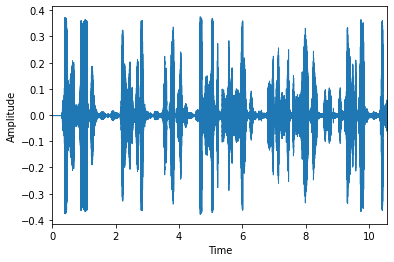

In [ ]:
# Waveform
signal, sr = librosa.load(file, sr = 22050) 
librosa.display.waveplot(signal, sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

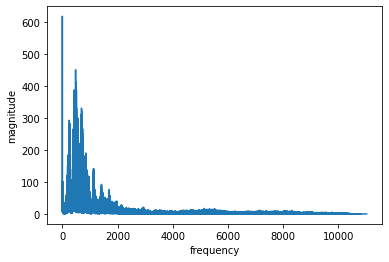

In [ ]:
# FFT -> Spectrum
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()

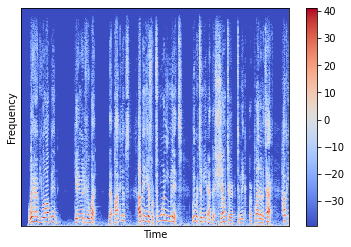

In [ ]:
# STFT -> Spectrogram
stft = librosa.core.stft(signal, n_fft = 2048, hop_length = 512)
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=512)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

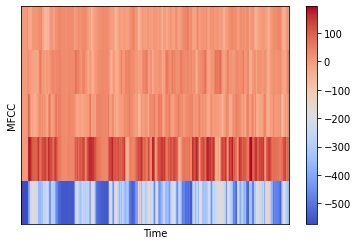

In [ ]:
#MFCCs 
mfcc = librosa.feature.mfcc(signal, n_fft = 2048, hop_length = 512, n_mfcc=5)
librosa.display.specshow(mfcc, sr=sr, hop_length=512)
plt.xlabel('Time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

In [ ]:
import time

path = '/content/gdrive/MyDrive/Colab Notebooks/Emotion_rec Data/Audio/Train_Aud'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      print(subdir)

      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) 
        print(mfccs, file)
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

/content/gdrive/MyDrive/Colab Notebooks/Emotion_rec Data/Audio/Train_Aud/Neutral
/content/gdrive/MyDrive/Colab Notebooks/Emotion_rec Data/Audio/Train_Aud/Neutral
[-387.10634522  101.06246     -32.09094114   50.39761594  -13.19363522
  -13.90521891   -3.35332237   -3.63757808  -19.61895493  -18.25369841
  -13.46917804  -12.57779791  -24.30719061] 6
/content/gdrive/MyDrive/Colab Notebooks/Emotion_rec Data/Audio/Train_Aud/Neutral
[-387.22091827  135.15072423  -29.08883904   35.68271569  -14.15246327
  -17.80247035   -1.7079074    -6.67977786  -20.34242256  -20.28283984
  -16.89804914   -8.43232362  -23.42255804] 6
/content/gdrive/MyDrive/Colab Notebooks/Emotion_rec Data/Audio/Train_Aud/Neutral
[-407.79447462  130.68328204  -16.14554712   35.7297743   -19.67137989
  -13.95407815    6.74049067  -11.11344293  -16.95003303  -16.48639546
  -22.23130343  -12.50096485  -20.39879025] 6
/content/gdrive/MyDrive/Colab Notebooks/Emotion_rec Data/Audio/Train_Aud/Neutral
[-411.5405532   120.36192529  -

KeyboardInterrupt: ignored

In [ ]:
import time
import librosa
path = '/content/gdrive/MyDrive/Colab Notebooks/Emotion_rec Data/Audio/Train_Aud'
Classes = ["Anger","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
lst = []

start_time = time.time()

for emotion in Classes:
  path1 = os.path.join(path, emotion)
  emotion_num = Classes.index(emotion)
  for aud in os.listdir(path1):
    try:
        os.chdir(path1)
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(aud, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).T,axis=0) 
        melspec = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        #print(mfccs,emotion_num)
        arr = mfccs, melspec, emotion_num
        lst.append(arr)
      # If the file is not valid, skip it
    except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

[-558.05397286   90.71365822   -7.04401308   26.07059815   -6.04990967
    3.0594642    -7.22261144  -12.62100728  -11.99657687   -0.99931414
   -2.61624527  -10.62848086   -2.98289808] 0
[-640.65984714   91.70929885   -5.65329176   29.22011981    6.00524855
    7.90914542   -3.19151789  -12.68959374   -8.6737116     2.84980846
   -4.10908053   -4.39344411   -3.26376228] 0
[-6.24258224e+02  9.04414884e+01 -1.37189257e+00  1.23087217e+01
 -5.42184953e+00  1.29627331e+01  1.50645559e+00 -1.26060039e+01
 -8.58536806e+00 -4.14139859e+00 -2.85807641e+00  4.41858975e-01
 -8.87011428e+00] 0
[-5.50656671e+02  4.75951622e+01  1.04074729e+01  1.28397657e+01
  4.86577046e+00  3.31753735e-01 -6.42044006e+00 -6.03213699e+00
 -2.90515908e+00 -2.51840175e+00 -3.84502986e+00 -5.82153074e+00
 -5.22168186e+00] 0
[-194.55479523   78.79391438  -40.70639237   27.76900611   -9.08525339
    5.62981315  -23.99261858   18.47686863  -25.03936577    9.06318339
   -7.59955224    1.87661674  -12.32791018] 0
[-107.

In [ ]:

# Creating X_train and y_train: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)
X_train = np.asarray(X)
y_train = np.asarray(y)
X_train.shape, y_train.shape

((1050, 13), (1050,))

In [ ]:
import time
import librosa
path = '/content/gdrive/MyDrive/Colab Notebooks/Emotion_rec Data/Audio/Test_Aud'
Classes = ["Anger","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
lst = []

start_time = time.time()

for emotion in Classes:
  path1 = os.path.join(path, emotion)
  emotion_num = Classes.index(emotion)
  for aud in os.listdir(path1):
    try:
        os.chdir(path1)
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(aud, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).T,axis=0) 
        #print(mfccs,emotion_num)
        arr = mfccs, emotion_num
        lst.append(arr)
      # If the file is not valid, skip it
    except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 600.7383165359497 seconds ---


In [ ]:
# Creating X_test and y_test: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)
X_test = np.asarray(X)
y_test = np.asarray(y)
X_test.shape, y_test.shape

((673, 13), (673,))

In [ ]:
import time
import librosa
path = '/content/gdrive/MyDrive/Colab Notebooks/Emotion_rec Data/Audio/Val_Aud'
Classes = ["Anger","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
lst = []

start_time = time.time()

for emotion in Classes:
  path1 = os.path.join(path, emotion)
  emotion_num = Classes.index(emotion)
  for aud in os.listdir(path1):
    try:
        os.chdir(path1)
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(aud, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).T,axis=0) 
        #print(mfccs,emotion_num)
        arr = mfccs, emotion_num
        lst.append(arr)
      # If the file is not valid, skip it
    except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 197.01987028121948 seconds ---


# **Cliping the Videos as per timestamps given in the CSV**

In [ ]:
data_train = pd.DataFrame(data=train, columns=["link",'start','end','video','utterance','EmotionMaxVote'])
data_test = pd.DataFrame(data=test, columns=["link",'start','end','video','utterance','EmotionMaxVote'])
data_val = pd.DataFrame(data=val, columns=["link",'start','end','video','utterance','EmotionMaxVote'])

In [ ]:
import os
import cv2
import shutil
import glob
from moviepy.editor import VideoFileClip
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

def clips(path, path2, data):
    os.makedirs(path2, exist_ok=True)
    for link, start, end, video, utt, emotion in data.itertuples(index=False):
        d_path = os.path.join(path,video)
        s_path = os.path.join(path2,emotion)
        os.makedirs(s_path, exist_ok=True)
        title = video + '.mp4'
        name = title + utt +'.mp4'
        
        try:
            os.chdir(d_path)
            video = VideoFileClip(title)
            new = video.subclip(start, end)
            new.write_videofile(s_path+'/'+name, codec=None, audio=True)   
            
        except OSError:
            print("file not found")
            #print(title)
            
        except :
            print("file not found")
           # print(d_path)
            #print(os.getcwd())
            #print(title)

In [ ]:
import time
start_time = time.time()
path='/content/gdrive/MyDrive/Colab Notebooks/Train_Videos'
path2 = '/content/gdrive/MyDrive/Colab Notebooks/balance_train_clips'
clips(path, path2, data_train)
print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 127/127 [00:00<00:00, 610.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_3.mp4.mp4



100%|██████████| 69/69 [00:00<00:00, 136.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 68/68 [00:00<00:00, 438.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_4.mp4.mp4



100%|██████████| 37/37 [00:00<00:00, 205.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 78/78 [00:00<00:00, 488.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_5.mp4.mp4



100%|██████████| 42/42 [00:00<00:00, 206.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 547.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_6.mp4.mp4



100%|██████████| 59/59 [00:00<00:00, 179.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 23/23 [00:00<00:00, 234.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_7.mp4.mp4



100%|██████████| 12/12 [00:00<00:00, 109.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 28/28 [00:00<00:00, 294.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_8.mp4.mp4



100%|██████████| 15/15 [00:00<00:00, 134.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8c56c5ac5.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 50/50 [00:00<00:00, 277.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8c56c5ac5.mp4utterance_10.mp4.mp4



100%|██████████| 27/27 [00:00<00:00, 183.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8c56c5ac5.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/8c56c5ac5.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 113/113 [00:00<00:00, 470.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/8c56c5ac5.mp4utterance_11.mp4.mp4



100%|██████████| 61/61 [00:00<00:00, 147.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/8c56c5ac5.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 100/100 [00:00<00:00, 402.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_13.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 208.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 177/177 [00:00<00:00, 589.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_15.mp4.mp4



100%|██████████| 96/96 [00:00<00:00, 97.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 89/89 [00:00<00:00, 326.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_18.mp4.mp4



100%|██████████| 48/48 [00:00<00:00, 217.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 243.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_19.mp4.mp4



100%|██████████| 24/24 [00:00<00:00, 165.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 81/81 [00:00<00:00, 338.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_21.mp4.mp4



100%|██████████| 44/44 [00:00<00:00, 195.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/8c56c5ac5.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 19/19 [00:00<00:00, 129.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/8c56c5ac5.mp4utterance_22.mp4.mp4



100%|██████████| 10/10 [00:00<00:00, 92.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/8c56c5ac5.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 195/195 [00:00<00:00, 563.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_23.mp4.mp4



100%|██████████| 106/106 [00:01<00:00, 79.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8c56c5ac5.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in 8c56c5ac5.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 609.54it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_28.mp4.mp4



100%|██████████| 127/127 [00:01<00:00, 82.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/8c56c5ac5.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 76eecf968.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 69/69 [00:00<00:00, 511.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_1.mp4.mp4



100%|██████████| 75/75 [00:02<00:00, 30.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 76eecf968.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 187/187 [00:00<00:00, 736.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_2.mp4.mp4



100%|██████████| 203/203 [00:11<00:00, 18.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 76eecf968.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 147/147 [00:00<00:00, 644.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_3.mp4.mp4



100%|██████████| 159/159 [00:08<00:00, 18.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 76eecf968.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 44/44 [00:00<00:00, 349.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_4.mp4.mp4



100%|██████████| 47/47 [00:00<00:00, 65.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 76eecf968.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 107/107 [00:00<00:00, 509.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_5.mp4.mp4



100%|██████████| 116/116 [00:05<00:00, 22.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 76eecf968.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 129/129 [00:00<00:00, 522.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_6.mp4.mp4



100%|██████████| 140/140 [00:07<00:00, 19.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 76eecf968.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 62/62 [00:00<00:00, 292.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_7.mp4.mp4



100%|██████████| 67/67 [00:01<00:00, 35.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 76eecf968.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 201/201 [00:00<00:00, 604.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_8.mp4.mp4



100%|██████████| 218/218 [00:12<00:00, 18.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 76eecf968.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 108/108 [00:00<00:00, 416.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_9.mp4.mp4



100%|██████████| 117/117 [00:05<00:00, 20.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 76eecf968.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 264/264 [00:00<00:00, 615.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_10.mp4.mp4



100%|██████████| 287/287 [00:18<00:00, 15.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/76eecf968.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 76eecf968.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 35/35 [00:00<00:00, 202.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_11.mp4.mp4



100%|██████████| 38/38 [00:00<00:00, 66.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/76eecf968.mp4utterance_11.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 74/74 [00:00<00:00, 490.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_1.mp4.mp4



100%|██████████| 100/100 [00:03<00:00, 28.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 51/51 [00:00<00:00, 346.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_4.mp4.mp4



100%|██████████| 69/69 [00:01<00:00, 43.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 56/56 [00:00<00:00, 367.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_5.mp4.mp4



100%|██████████| 75/75 [00:01<00:00, 38.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/7459327df.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 28/28 [00:00<00:00, 318.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/7459327df.mp4utterance_6.mp4.mp4



100%|██████████| 38/38 [00:00<00:00, 67.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/7459327df.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7459327df.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 84/84 [00:00<00:00, 425.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7459327df.mp4utterance_8.mp4.mp4



100%|██████████| 113/113 [00:03<00:00, 30.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7459327df.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 16/16 [00:00<00:00, 169.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_9.mp4.mp4



100%|██████████| 21/21 [00:00<00:00, 64.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/7459327df.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 49/49 [00:00<00:00, 279.12it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/7459327df.mp4utterance_11.mp4.mp4



100%|██████████| 66/66 [00:01<00:00, 43.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/7459327df.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/7459327df.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 49/49 [00:00<00:00, 315.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/7459327df.mp4utterance_12.mp4.mp4



100%|██████████| 66/66 [00:01<00:00, 44.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/7459327df.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 76/76 [00:00<00:00, 334.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_13.mp4.mp4



100%|██████████| 102/102 [00:03<00:00, 31.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 96/96 [00:00<00:00, 373.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_14.mp4.mp4



100%|██████████| 130/130 [00:05<00:00, 25.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 41/41 [00:00<00:00, 215.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_16.mp4.mp4



100%|██████████| 55/55 [00:00<00:00, 71.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 49/49 [00:00<00:00, 228.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_17.mp4.mp4



100%|██████████| 66/66 [00:01<00:00, 44.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7459327df.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 230.72it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_19.mp4.mp4


100%|██████████| 60/60 [00:01<00:00, 52.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7459327df.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/7459327df.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 219.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/7459327df.mp4utterance_20.mp4.mp4



100%|██████████| 72/72 [00:01<00:00, 38.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/7459327df.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7459327df.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 7459327df.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 68/68 [00:00<00:00, 281.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7459327df.mp4utterance_21.mp4.mp4



100%|██████████| 92/92 [00:02<00:00, 33.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7459327df.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a3f32e3a3.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in a3f32e3a3.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 26/26 [00:00<00:00, 380.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a3f32e3a3.mp4utterance_2.mp4.mp4



100%|██████████| 34/34 [00:00<00:00, 72.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a3f32e3a3.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/a3f32e3a3.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in a3f32e3a3.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 79/79 [00:00<00:00, 528.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/a3f32e3a3.mp4utterance_3.mp4.mp4



100%|██████████| 107/107 [00:03<00:00, 27.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/a3f32e3a3.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a3f32e3a3.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in a3f32e3a3.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 621.36it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a3f32e3a3.mp4utterance_5.mp4.mp4



100%|██████████| 177/177 [00:07<00:00, 22.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a3f32e3a3.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a3f32e3a3.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in a3f32e3a3.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 49/49 [00:00<00:00, 343.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a3f32e3a3.mp4utterance_6.mp4.mp4



100%|██████████| 66/66 [00:01<00:00, 47.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a3f32e3a3.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a3f32e3a3.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in a3f32e3a3.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 51/51 [00:00<00:00, 410.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a3f32e3a3.mp4utterance_7.mp4.mp4



100%|██████████| 69/69 [00:01<00:00, 42.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a3f32e3a3.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/a3f32e3a3.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in a3f32e3a3.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 123/123 [00:00<00:00, 564.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/a3f32e3a3.mp4utterance_8.mp4.mp4



100%|██████████| 167/167 [00:06<00:00, 24.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/a3f32e3a3.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a3f32e3a3.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in a3f32e3a3.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 590.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a3f32e3a3.mp4utterance_9.mp4.mp4



100%|██████████| 306/306 [00:15<00:00, 19.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a3f32e3a3.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/b32a6ac3b.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in b32a6ac3b.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 62/62 [00:00<00:00, 361.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/b32a6ac3b.mp4utterance_1.mp4.mp4



100%|██████████| 84/84 [00:00<00:00, 105.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/b32a6ac3b.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in b32a6ac3b.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 442/442 [00:00<00:00, 627.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_3.mp4.mp4



100%|██████████| 600/600 [00:08<00:00, 66.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in b32a6ac3b.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 75/75 [00:00<00:00, 290.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_4.mp4.mp4



100%|██████████| 101/101 [00:00<00:00, 103.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in b32a6ac3b.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 88/88 [00:00<00:00, 302.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_5.mp4.mp4



100%|██████████| 119/119 [00:01<00:00, 98.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in b32a6ac3b.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 165/165 [00:00<00:00, 415.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_6.mp4.mp4



100%|██████████| 223/223 [00:02<00:00, 76.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b32a6ac3b.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/b32a6ac3b.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in b32a6ac3b.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 29/29 [00:00<00:00, 178.39it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/b32a6ac3b.mp4utterance_7.mp4.mp4


100%|██████████| 39/39 [00:00<00:00, 187.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/b32a6ac3b.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/b32a6ac3b.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in b32a6ac3b.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 677/677 [00:01<00:00, 572.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/b32a6ac3b.mp4utterance_8.mp4.mp4



100%|██████████| 919/919 [00:13<00:00, 66.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/b32a6ac3b.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/b32a6ac3b.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in b32a6ac3b.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 154/154 [00:00<00:00, 390.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/b32a6ac3b.mp4utterance_9.mp4.mp4



100%|██████████| 209/209 [00:02<00:00, 92.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/b32a6ac3b.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c9f0e3623.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in c9f0e3623.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 40/40 [00:00<00:00, 296.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c9f0e3623.mp4utterance_4.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 70.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c9f0e3623.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c9f0e3623.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in c9f0e3623.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 40/40 [00:00<00:00, 298.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c9f0e3623.mp4utterance_5.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 71.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c9f0e3623.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c9f0e3623.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in c9f0e3623.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 178.91it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c9f0e3623.mp4utterance_7.mp4.mp4


100%|██████████| 45/45 [00:00<00:00, 70.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c9f0e3623.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c9f0e3623.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in c9f0e3623.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 17/17 [00:00<00:00, 115.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c9f0e3623.mp4utterance_8.mp4.mp4



100%|██████████| 23/23 [00:00<00:00, 62.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c9f0e3623.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/c9f0e3623.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in c9f0e3623.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 23/23 [00:00<00:00, 154.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/c9f0e3623.mp4utterance_9.mp4.mp4



100%|██████████| 30/30 [00:00<00:00, 71.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/c9f0e3623.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 372/372 [00:00<00:00, 615.95it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_1.mp4.mp4


100%|██████████| 505/505 [00:04<00:00, 107.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 39/39 [00:00<00:00, 275.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_3.mp4.mp4



100%|██████████| 52/52 [00:00<00:00, 226.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 62/62 [00:00<00:00, 366.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_4.mp4.mp4



100%|██████████| 84/84 [00:00<00:00, 150.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 468.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_5.mp4.mp4



100%|██████████| 182/182 [00:01<00:00, 146.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 179.38it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_7.mp4.mp4


100%|██████████| 46/46 [00:00<00:00, 192.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 190/190 [00:00<00:00, 484.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_8.mp4.mp4



100%|██████████| 257/257 [00:02<00:00, 113.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 215.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_9.mp4.mp4



100%|██████████| 57/57 [00:00<00:00, 204.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 169/169 [00:00<00:00, 472.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_10.mp4.mp4



100%|██████████| 229/229 [00:01<00:00, 114.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 169/169 [00:00<00:00, 479.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_11.mp4.mp4



100%|██████████| 229/229 [00:01<00:00, 116.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 31/31 [00:00<00:00, 152.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_12.mp4.mp4



100%|██████████| 42/42 [00:00<00:00, 215.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 75/75 [00:00<00:00, 297.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_13.mp4.mp4



100%|██████████| 101/101 [00:00<00:00, 139.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 173/173 [00:00<00:00, 442.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_14.mp4.mp4



100%|██████████| 235/235 [00:01<00:00, 184.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 63/63 [00:00<00:00, 274.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_16.mp4.mp4



100%|██████████| 85/85 [00:00<00:00, 146.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 159/159 [00:00<00:00, 456.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_17.mp4.mp4



100%|██████████| 215/215 [00:01<00:00, 121.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 115/115 [00:00<00:00, 381.21it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_18.mp4.mp4



100%|██████████| 155/155 [00:01<00:00, 118.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 58/58 [00:00<00:00, 244.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_19.mp4.mp4



100%|██████████| 78/78 [00:00<00:00, 157.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 58/58 [00:00<00:00, 247.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_20.mp4.mp4



100%|██████████| 78/78 [00:00<00:00, 157.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 108/108 [00:00<00:00, 373.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_21.mp4.mp4



100%|██████████| 146/146 [00:01<00:00, 137.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 92/92 [00:00<00:00, 297.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_22.mp4.mp4



100%|██████████| 125/125 [00:00<00:00, 134.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 145/145 [00:00<00:00, 398.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_23.mp4.mp4



100%|██████████| 197/197 [00:02<00:00, 93.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_31.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_31.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 265/265 [00:00<00:00, 642.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_31.mp4.mp4



100%|██████████| 360/360 [00:05<00:00, 62.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_31.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_32.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_32.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 152/152 [00:00<00:00, 448.02it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_32.mp4.mp4


100%|██████████| 206/206 [00:01<00:00, 112.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_32.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_33.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_33.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 145/145 [00:00<00:00, 420.61it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_33.mp4.mp4


100%|██████████| 197/197 [00:01<00:00, 121.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_33.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_34.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_34.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 51/51 [00:00<00:00, 239.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_34.mp4.mp4



100%|██████████| 68/68 [00:00<00:00, 172.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_34.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_35.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_35.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 68/68 [00:00<00:00, 282.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_35.mp4.mp4



100%|██████████| 92/92 [00:00<00:00, 141.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_35.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_36.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_36.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 89/89 [00:00<00:00, 326.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_36.mp4.mp4



100%|██████████| 120/120 [00:00<00:00, 124.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_36.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_37.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_37.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 104/104 [00:00<00:00, 345.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_37.mp4.mp4



100%|██████████| 141/141 [00:01<00:00, 133.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_37.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_38.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_38.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 41/41 [00:00<00:00, 192.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_38.mp4.mp4



100%|██████████| 55/55 [00:00<00:00, 229.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_38.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_39.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_39.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 537.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_39.mp4.mp4



100%|██████████| 309/309 [00:02<00:00, 119.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_39.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_40.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_40.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 202/202 [00:00<00:00, 485.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_40.mp4.mp4



100%|██████████| 274/274 [00:01<00:00, 151.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_40.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_41.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_41.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 245.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_41.mp4.mp4



100%|██████████| 71/71 [00:00<00:00, 157.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_41.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_42.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_42.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 337/337 [00:00<00:00, 571.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_42.mp4.mp4



100%|██████████| 457/457 [00:03<00:00, 139.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_42.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_43.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_43.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 141/141 [00:00<00:00, 419.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_43.mp4.mp4



100%|██████████| 191/191 [00:01<00:00, 112.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_43.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_44.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_44.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 64/64 [00:00<00:00, 264.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_44.mp4.mp4



100%|██████████| 86/86 [00:00<00:00, 164.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_44.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_45.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_45.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 31/31 [00:00<00:00, 151.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_45.mp4.mp4



100%|██████████| 42/42 [00:00<00:00, 194.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_45.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_48.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_48.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 52/52 [00:00<00:00, 231.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_48.mp4.mp4



100%|██████████| 70/70 [00:00<00:00, 179.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_48.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_49.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_49.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 262/262 [00:00<00:00, 463.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_49.mp4.mp4



100%|██████████| 356/356 [00:03<00:00, 111.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_49.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_53.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_53.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 61/61 [00:00<00:00, 260.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_53.mp4.mp4



100%|██████████| 82/82 [00:00<00:00, 138.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_53.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_54.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_54.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 40/40 [00:00<00:00, 183.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_54.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 214.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_54.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_56.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_56.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 191/191 [00:00<00:00, 455.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_56.mp4.mp4



100%|██████████| 259/259 [00:01<00:00, 153.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_56.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_57.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_57.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 177.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_57.mp4.mp4



100%|██████████| 57/57 [00:00<00:00, 199.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_57.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_60.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_60.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 14/14 [00:00<00:00, 84.24it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_60.mp4.mp4


100%|██████████| 19/19 [00:00<00:00, 132.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_60.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_62.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_62.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 237.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_62.mp4.mp4



100%|██████████| 72/72 [00:00<00:00, 163.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_62.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_63.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_63.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 298.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_63.mp4.mp4



100%|██████████| 98/98 [00:00<00:00, 142.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_63.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_66.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_66.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 62/62 [00:00<00:00, 277.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_66.mp4.mp4



100%|██████████| 84/84 [00:00<00:00, 142.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_66.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_67.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_67.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 64/64 [00:00<00:00, 239.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_67.mp4.mp4



100%|██████████| 86/86 [00:00<00:00, 151.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_67.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_68.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_68.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 69/69 [00:00<00:00, 284.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_68.mp4.mp4



100%|██████████| 93/93 [00:00<00:00, 133.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_68.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_69.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_69.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 67/67 [00:00<00:00, 259.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_69.mp4.mp4



100%|██████████| 90/90 [00:00<00:00, 148.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_69.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_70.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_70.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 128/128 [00:00<00:00, 394.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_70.mp4.mp4



100%|██████████| 173/173 [00:01<00:00, 122.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_70.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_71.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_71.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 165/165 [00:00<00:00, 442.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_71.mp4.mp4



100%|██████████| 223/223 [00:01<00:00, 116.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_71.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_72.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_72.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 202.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_72.mp4.mp4



100%|██████████| 63/63 [00:00<00:00, 175.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_72.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_73.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_73.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 71/71 [00:00<00:00, 297.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_73.mp4.mp4



100%|██████████| 96/96 [00:00<00:00, 155.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_73.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_74.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_74.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 193/193 [00:00<00:00, 477.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_74.mp4.mp4



100%|██████████| 261/261 [00:01<00:00, 134.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_74.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_75.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_75.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 159/159 [00:00<00:00, 440.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_75.mp4.mp4



100%|██████████| 215/215 [00:01<00:00, 126.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_75.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_76.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_76.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 88/88 [00:00<00:00, 322.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_76.mp4.mp4



100%|██████████| 119/119 [00:00<00:00, 135.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_76.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_77.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_77.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 65/65 [00:00<00:00, 233.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_77.mp4.mp4



100%|██████████| 87/87 [00:00<00:00, 157.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_77.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_78.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_78.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 105/105 [00:00<00:00, 373.26it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_78.mp4.mp4



100%|██████████| 142/142 [00:01<00:00, 140.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_78.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_79.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_79.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 58/58 [00:00<00:00, 235.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_79.mp4.mp4



100%|██████████| 78/78 [00:00<00:00, 166.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_79.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_80.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_80.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 289/289 [00:00<00:00, 537.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_80.mp4.mp4



100%|██████████| 392/392 [00:03<00:00, 115.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_80.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_81.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_81.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 100/100 [00:00<00:00, 338.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_81.mp4.mp4



100%|██████████| 135/135 [00:01<00:00, 130.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_81.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_82.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_82.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 57/57 [00:00<00:00, 229.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_82.mp4.mp4



100%|██████████| 77/77 [00:00<00:00, 162.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_82.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_83.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_83.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 197.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_83.mp4.mp4



100%|██████████| 63/63 [00:00<00:00, 173.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_83.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_84.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_84.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 31/31 [00:00<00:00, 158.18it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_84.mp4.mp4


100%|██████████| 42/42 [00:00<00:00, 234.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_84.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_85.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_85.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 99/99 [00:00<00:00, 314.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_85.mp4.mp4



100%|██████████| 134/134 [00:01<00:00, 117.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_85.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_86.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_86.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 145/145 [00:00<00:00, 399.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_86.mp4.mp4



100%|██████████| 197/197 [00:01<00:00, 118.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_86.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_87.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_87.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 209.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_87.mp4.mp4



100%|██████████| 56/56 [00:00<00:00, 214.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_87.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_88.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_88.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 59/59 [00:00<00:00, 241.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_88.mp4.mp4



100%|██████████| 79/79 [00:00<00:00, 163.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_88.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_89.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_89.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 353.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_89.mp4.mp4



100%|██████████| 148/148 [00:01<00:00, 119.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_89.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_90.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_90.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 170/170 [00:00<00:00, 433.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_90.mp4.mp4



100%|██████████| 231/231 [00:01<00:00, 117.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_90.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_91.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_91.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 102/102 [00:00<00:00, 323.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_91.mp4.mp4



100%|██████████| 138/138 [00:00<00:00, 140.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/cbb64e001.mp4utterance_91.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_92.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_92.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 145/145 [00:00<00:00, 401.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_92.mp4.mp4



100%|██████████| 196/196 [00:01<00:00, 119.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_92.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_93.mp4.mp4
[MoviePy] Writing audio in cbb64e001.mp4utterance_93.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 65/65 [00:00<00:00, 253.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_93.mp4.mp4



100%|██████████| 87/87 [00:00<00:00, 102.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/cbb64e001.mp4utterance_93.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f1da840a_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 1f1da840a_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 774.61it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f1da840a_1.mp4utterance_2.mp4.mp4


100%|██████████| 308/308 [00:04<00:00, 66.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f1da840a_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1f1da840a_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 1f1da840a_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 833.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1f1da840a_1.mp4utterance_4.mp4.mp4



100%|██████████| 321/321 [00:04<00:00, 70.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1f1da840a_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1f1da840a_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 1f1da840a_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 184/184 [00:00<00:00, 562.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1f1da840a_1.mp4utterance_7.mp4.mp4



100%|██████████| 250/250 [00:03<00:00, 77.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1f1da840a_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1f1da840a_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 1f1da840a_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 613.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1f1da840a_1.mp4utterance_8.mp4.mp4



100%|██████████| 310/310 [00:04<00:00, 73.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1f1da840a_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2c09795bb_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 2c09795bb_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 829.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2c09795bb_1.mp4utterance_3.mp4.mp4



100%|██████████| 317/317 [00:03<00:00, 88.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2c09795bb_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2c09795bb_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 2c09795bb_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 175/175 [00:00<00:00, 560.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2c09795bb_1.mp4utterance_10.mp4.mp4



100%|██████████| 238/238 [00:02<00:00, 94.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2c09795bb_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2c09795bb_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 2c09795bb_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 125/125 [00:00<00:00, 451.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2c09795bb_1.mp4utterance_11.mp4.mp4



100%|██████████| 169/169 [00:01<00:00, 111.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2c09795bb_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2c09795bb_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 2c09795bb_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 597.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2c09795bb_1.mp4utterance_15.mp4.mp4



100%|██████████| 317/317 [00:03<00:00, 91.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2c09795bb_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2c09795bb_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 2c09795bb_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 118/118 [00:00<00:00, 441.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2c09795bb_1.mp4utterance_18.mp4.mp4



100%|██████████| 160/160 [00:01<00:00, 112.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2c09795bb_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2c09795bb_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 2c09795bb_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 590.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2c09795bb_1.mp4utterance_23.mp4.mp4



100%|██████████| 322/322 [00:03<00:00, 92.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2c09795bb_1.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2c09795bb_1.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in 2c09795bb_1.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 100/100 [00:00<00:00, 363.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2c09795bb_1.mp4utterance_24.mp4.mp4



100%|██████████| 135/135 [00:01<00:00, 101.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2c09795bb_1.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2c09795bb_1.mp4utterance_30.mp4.mp4
[MoviePy] Writing audio in 2c09795bb_1.mp4utterance_30.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 578.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2c09795bb_1.mp4utterance_30.mp4.mp4



100%|██████████| 315/315 [00:03<00:00, 90.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2c09795bb_1.mp4utterance_30.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2c09795bb_1.mp4utterance_40.mp4.mp4
[MoviePy] Writing audio in 2c09795bb_1.mp4utterance_40.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 100/100 [00:00<00:00, 401.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2c09795bb_1.mp4utterance_40.mp4.mp4



100%|██████████| 135/135 [00:01<00:00, 123.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2c09795bb_1.mp4utterance_40.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ce6dec16_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 4ce6dec16_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 627.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ce6dec16_1.mp4utterance_1.mp4.mp4



100%|██████████| 304/304 [00:15<00:00, 19.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ce6dec16_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ce6dec16_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 4ce6dec16_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 570.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ce6dec16_1.mp4utterance_2.mp4.mp4



100%|██████████| 316/316 [00:16<00:00, 19.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ce6dec16_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ce6dec16_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 4ce6dec16_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 545.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ce6dec16_1.mp4utterance_3.mp4.mp4



100%|██████████| 317/317 [00:16<00:00, 19.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ce6dec16_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7a0306a52_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 793.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_1.mp4.mp4



100%|██████████| 305/305 [00:16<00:00, 18.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 7a0306a52_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 737.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_2.mp4.mp4



100%|██████████| 315/315 [00:17<00:00, 17.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 7a0306a52_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 787.18it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_3.mp4.mp4


100%|██████████| 312/312 [00:17<00:00, 18.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 7a0306a52_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 156/156 [00:00<00:00, 627.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_4.mp4.mp4



100%|██████████| 212/212 [00:11<00:00, 19.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7a0306a52_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7c05a1135_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 347.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_1.mp4.mp4



100%|██████████| 45/45 [00:00<00:00, 64.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 7c05a1135_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 808.64it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_3.mp4.mp4


100%|██████████| 321/321 [00:16<00:00, 19.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 7c05a1135_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 350.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_4.mp4.mp4



100%|██████████| 60/60 [00:01<00:00, 51.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 7c05a1135_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 363.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_5.mp4.mp4



100%|██████████| 60/60 [00:01<00:00, 50.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 7c05a1135_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 305.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_6.mp4.mp4



100%|██████████| 57/57 [00:01<00:00, 55.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 7c05a1135_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 75/75 [00:00<00:00, 448.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_7.mp4.mp4



100%|██████████| 102/102 [00:03<00:00, 29.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7c05a1135_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 802.94it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_1.mp4.mp4


100%|██████████| 317/317 [00:12<00:00, 26.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 745.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_2.mp4.mp4



100%|██████████| 318/318 [00:11<00:00, 27.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 753.67it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_3.mp4.mp4


100%|██████████| 312/312 [00:11<00:00, 26.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 212/212 [00:00<00:00, 569.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_5.mp4.mp4



100%|██████████| 288/288 [00:11<00:00, 26.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 562.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_7.mp4.mp4



100%|██████████| 310/310 [00:12<00:00, 25.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 603.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_8.mp4.mp4



100%|██████████| 312/312 [00:11<00:00, 28.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 572.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_10.mp4.mp4



100%|██████████| 312/312 [00:11<00:00, 26.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 218/218 [00:00<00:00, 532.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_11.mp4.mp4



100%|██████████| 296/296 [00:11<00:00, 26.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 593.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_12.mp4.mp4



100%|██████████| 317/317 [00:11<00:00, 28.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 594.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_13.mp4.mp4



100%|██████████| 304/304 [00:10<00:00, 28.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 572.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_14.mp4.mp4



100%|██████████| 318/318 [00:11<00:00, 26.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 7fbf1c1c7_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 572.30it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_15.mp4.mp4



100%|██████████| 305/305 [00:11<00:00, 26.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/7fbf1c1c7_1.mp4utterance_15.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 793f836eb_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 165/165 [00:00<00:00, 744.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_1.mp4.mp4



100%|██████████| 223/223 [00:02<00:00, 87.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 793f836eb_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 106/106 [00:00<00:00, 588.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_2.mp4.mp4



100%|██████████| 144/144 [00:01<00:00, 98.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 793f836eb_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 160/160 [00:00<00:00, 712.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_3.mp4.mp4



100%|██████████| 217/217 [00:02<00:00, 86.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 793f836eb_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 92/92 [00:00<00:00, 490.74it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_4.mp4.mp4


100%|██████████| 124/124 [00:01<00:00, 103.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/793f836eb_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 793f836eb_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 60/60 [00:00<00:00, 401.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/793f836eb_1.mp4utterance_5.mp4.mp4



100%|██████████| 81/81 [00:00<00:00, 137.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/793f836eb_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 793f836eb_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 130/130 [00:00<00:00, 433.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_6.mp4.mp4



100%|██████████| 176/176 [00:01<00:00, 92.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 793f836eb_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 181/181 [00:00<00:00, 533.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_7.mp4.mp4



100%|██████████| 245/245 [00:02<00:00, 88.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/793f836eb_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9280b821f_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 9280b821f_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 68/68 [00:00<00:00, 434.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9280b821f_1.mp4utterance_3.mp4.mp4



100%|██████████| 92/92 [00:03<00:00, 26.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9280b821f_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9280b821f_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 9280b821f_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 773.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9280b821f_1.mp4utterance_5.mp4.mp4



100%|██████████| 306/306 [00:19<00:00, 15.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9280b821f_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/9280b821f_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 9280b821f_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 154/154 [00:00<00:00, 459.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/9280b821f_1.mp4utterance_6.mp4.mp4



100%|██████████| 209/209 [00:10<00:00, 19.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/9280b821f_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/68062fe15_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 68062fe15_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 855.15it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/68062fe15_1.mp4utterance_1.mp4.mp4



100%|██████████| 305/305 [00:16<00:00, 18.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/68062fe15_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/68062fe15_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 68062fe15_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 48/48 [00:00<00:00, 416.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/68062fe15_1.mp4utterance_2.mp4.mp4



100%|██████████| 65/65 [00:01<00:00, 45.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/68062fe15_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/68062fe15_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 68062fe15_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 384.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/68062fe15_1.mp4utterance_3.mp4.mp4



100%|██████████| 63/63 [00:01<00:00, 47.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/68062fe15_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/68062fe15_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 68062fe15_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 216/216 [00:00<00:00, 756.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/68062fe15_1.mp4utterance_4.mp4.mp4



100%|██████████| 293/293 [00:14<00:00, 20.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/68062fe15_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/68062fe15_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 68062fe15_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 84/84 [00:00<00:00, 479.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/68062fe15_1.mp4utterance_6.mp4.mp4



100%|██████████| 114/114 [00:04<00:00, 28.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/68062fe15_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 8563171cd_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 848.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_1.mp4.mp4



100%|██████████| 314/314 [00:04<00:00, 75.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 8563171cd_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 817.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_2.mp4.mp4



100%|██████████| 312/312 [00:04<00:00, 72.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 8563171cd_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 738.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_3.mp4.mp4



100%|██████████| 320/320 [00:04<00:00, 73.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 8563171cd_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 291.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_4.mp4.mp4



100%|██████████| 98/98 [00:00<00:00, 106.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8563171cd_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/133194836_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 133194836_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 156/156 [00:00<00:00, 608.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/133194836_1.mp4utterance_1.mp4.mp4



100%|██████████| 212/212 [00:09<00:00, 22.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/133194836_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/133194836_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 133194836_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 187/187 [00:00<00:00, 644.36it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/133194836_1.mp4utterance_2.mp4.mp4


100%|██████████| 254/254 [00:11<00:00, 22.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/133194836_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/133194836_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 133194836_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 84/84 [00:00<00:00, 484.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/133194836_1.mp4utterance_3.mp4.mp4



100%|██████████| 113/113 [00:03<00:00, 32.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/133194836_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/c1ff32351_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in c1ff32351_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 724.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/c1ff32351_1.mp4utterance_1.mp4.mp4



100%|██████████| 318/318 [00:01<00:00, 185.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/c1ff32351_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/c1ff32351_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in c1ff32351_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 755.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/c1ff32351_1.mp4utterance_2.mp4.mp4



100%|██████████| 315/315 [00:02<00:00, 151.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/c1ff32351_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c1ff32351_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in c1ff32351_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 753.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c1ff32351_1.mp4utterance_3.mp4.mp4



100%|██████████| 306/306 [00:01<00:00, 162.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c1ff32351_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in c1ff32351_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 510.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_4.mp4.mp4



100%|██████████| 312/312 [00:02<00:00, 153.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in c1ff32351_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 583.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_5.mp4.mp4



100%|██████████| 305/305 [00:02<00:00, 142.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in c1ff32351_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 222/222 [00:00<00:00, 549.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_6.mp4.mp4



100%|██████████| 301/301 [00:01<00:00, 161.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in c1ff32351_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 219/219 [00:00<00:00, 559.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_7.mp4.mp4



100%|██████████| 297/297 [00:01<00:00, 156.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in c1ff32351_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 549.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_8.mp4.mp4



100%|██████████| 312/312 [00:02<00:00, 155.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c1ff32351_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in c1ff32351_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 569.26it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c1ff32351_1.mp4utterance_9.mp4.mp4



100%|██████████| 316/316 [00:01<00:00, 160.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c1ff32351_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in c1ff32351_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 564.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_10.mp4.mp4



100%|██████████| 313/313 [00:01<00:00, 165.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/c1ff32351_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c1ff32351_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in c1ff32351_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 172/172 [00:00<00:00, 476.19it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c1ff32351_1.mp4utterance_11.mp4.mp4


100%|██████████| 233/233 [00:01<00:00, 168.35it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c1ff32351_1.mp4utterance_11.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in f0fdfc967_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 111/111 [00:00<00:00, 657.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_1.mp4.mp4



100%|██████████| 151/151 [00:01<00:00, 79.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in f0fdfc967_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 598.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_2.mp4.mp4



100%|██████████| 148/148 [00:02<00:00, 72.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in f0fdfc967_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 81/81 [00:00<00:00, 484.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_3.mp4.mp4



100%|██████████| 109/109 [00:01<00:00, 74.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in f0fdfc967_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 140/140 [00:00<00:00, 618.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_4.mp4.mp4



100%|██████████| 190/190 [00:02<00:00, 76.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f0fdfc967_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in f0fdfc967_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 712.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f0fdfc967_1.mp4utterance_5.mp4.mp4



100%|██████████| 313/313 [00:03<00:00, 80.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f0fdfc967_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in f0fdfc967_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 190/190 [00:00<00:00, 541.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_6.mp4.mp4



100%|██████████| 258/258 [00:03<00:00, 77.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f0fdfc967_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f0fdfc967_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in f0fdfc967_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 217/217 [00:00<00:00, 568.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f0fdfc967_1.mp4utterance_8.mp4.mp4



100%|██████████| 294/294 [00:03<00:00, 76.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f0fdfc967_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f0fdfc967_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in f0fdfc967_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 428.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f0fdfc967_1.mp4utterance_9.mp4.mp4



100%|██████████| 177/177 [00:01<00:00, 92.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f0fdfc967_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 813.34it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_1.mp4.mp4


100%|██████████| 312/312 [00:14<00:00, 22.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 719.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_2.mp4.mp4



100%|██████████| 312/312 [00:13<00:00, 22.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 769.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_3.mp4.mp4



100%|██████████| 317/317 [00:15<00:00, 20.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 559.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_4.mp4.mp4



100%|██████████| 310/310 [00:13<00:00, 22.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 542.15it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_5.mp4.mp4



100%|██████████| 316/316 [00:13<00:00, 23.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 556.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_6.mp4.mp4



100%|██████████| 322/322 [00:13<00:00, 23.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 99/99 [00:00<00:00, 339.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_7.mp4.mp4



100%|██████████| 134/134 [00:04<00:00, 30.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 565.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_8.mp4.mp4



100%|██████████| 313/313 [00:12<00:00, 24.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f8da01d25_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 560.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f8da01d25_1.mp4utterance_9.mp4.mp4



100%|██████████| 318/318 [00:13<00:00, 23.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f8da01d25_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f8da01d25_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 537.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f8da01d25_1.mp4utterance_10.mp4.mp4



100%|██████████| 309/309 [00:13<00:00, 23.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/f8da01d25_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 549.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_11.mp4.mp4



100%|██████████| 312/312 [00:13<00:00, 23.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 509.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_12.mp4.mp4



100%|██████████| 311/311 [00:14<00:00, 21.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 539.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_13.mp4.mp4



100%|██████████| 316/316 [00:14<00:00, 21.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 182/182 [00:00<00:00, 501.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_14.mp4.mp4



100%|██████████| 247/247 [00:11<00:00, 21.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 238/238 [00:00<00:00, 569.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_15.mp4.mp4



100%|██████████| 323/323 [00:15<00:00, 20.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 70/70 [00:00<00:00, 272.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_16.mp4.mp4



100%|██████████| 94/94 [00:02<00:00, 31.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 543.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_17.mp4.mp4



100%|██████████| 315/315 [00:15<00:00, 20.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 93/93 [00:00<00:00, 326.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_18.mp4.mp4



100%|██████████| 126/126 [00:04<00:00, 26.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 525.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_19.mp4.mp4



100%|██████████| 315/315 [00:15<00:00, 20.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 535.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_20.mp4.mp4



100%|██████████| 316/316 [00:15<00:00, 19.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 241/241 [00:00<00:00, 562.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_21.mp4.mp4



100%|██████████| 327/327 [00:15<00:00, 21.35it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 188/188 [00:00<00:00, 496.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_22.mp4.mp4



100%|██████████| 255/255 [00:11<00:00, 21.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 531.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_23.mp4.mp4



100%|██████████| 321/321 [00:15<00:00, 21.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 87/87 [00:00<00:00, 313.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_25.mp4.mp4



100%|██████████| 118/118 [00:04<00:00, 27.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_26.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_26.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 512.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_26.mp4.mp4



100%|██████████| 318/318 [00:14<00:00, 21.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_26.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_27.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_27.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 35/35 [00:00<00:00, 151.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_27.mp4.mp4



100%|██████████| 47/47 [00:00<00:00, 81.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_27.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 125/125 [00:00<00:00, 385.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_28.mp4.mp4



100%|██████████| 169/169 [00:07<00:00, 23.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_29.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_29.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 193/193 [00:00<00:00, 502.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_29.mp4.mp4



100%|██████████| 262/262 [00:12<00:00, 20.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_29.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_30.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_30.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 190/190 [00:00<00:00, 497.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_30.mp4.mp4



100%|██████████| 258/258 [00:12<00:00, 20.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_30.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_31.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_31.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 81/81 [00:00<00:00, 262.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_31.mp4.mp4



100%|██████████| 110/110 [00:03<00:00, 28.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_31.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_32.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_32.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 523.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_32.mp4.mp4



100%|██████████| 307/307 [00:15<00:00, 20.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_32.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_33.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_33.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 122/122 [00:00<00:00, 387.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_33.mp4.mp4



100%|██████████| 165/165 [00:06<00:00, 23.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_33.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_34.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_34.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 191/191 [00:00<00:00, 489.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_34.mp4.mp4



100%|██████████| 259/259 [00:13<00:00, 19.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_34.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_35.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_35.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 181/181 [00:00<00:00, 430.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_35.mp4.mp4



100%|██████████| 246/246 [00:11<00:00, 21.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_35.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_36.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_36.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 98/98 [00:00<00:00, 336.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_36.mp4.mp4



100%|██████████| 132/132 [00:05<00:00, 25.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/f8da01d25_1.mp4utterance_36.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_37.mp4.mp4
[MoviePy] Writing audio in f8da01d25_1.mp4utterance_37.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 157/157 [00:00<00:00, 410.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_37.mp4.mp4



100%|██████████| 213/213 [00:10<00:00, 20.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/f8da01d25_1.mp4utterance_37.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not fou

100%|██████████| 228/228 [00:00<00:00, 673.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_1.mp4.mp4



100%|██████████| 309/309 [00:16<00:00, 19.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 1b4e6e04c_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 592.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_2.mp4.mp4



100%|██████████| 316/316 [00:16<00:00, 19.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b4e6e04c_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 1b4e6e04c_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 597.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b4e6e04c_1.mp4utterance_3.mp4.mp4



100%|██████████| 318/318 [00:16<00:00, 18.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b4e6e04c_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b4e6e04c_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 1b4e6e04c_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 464.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b4e6e04c_1.mp4utterance_4.mp4.mp4



100%|██████████| 319/319 [00:16<00:00, 19.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b4e6e04c_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 1b4e6e04c_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 422.07it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_5.mp4.mp4


100%|██████████| 304/304 [00:15<00:00, 19.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 1b4e6e04c_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 164/164 [00:00<00:00, 388.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_6.mp4.mp4



100%|██████████| 223/223 [00:10<00:00, 21.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 1b4e6e04c_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 485.58it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_7.mp4.mp4


100%|██████████| 318/318 [00:16<00:00, 19.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1b4e6e04c_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 1b6b8344c_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 609.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_1.mp4.mp4



100%|██████████| 105/105 [00:06<00:00, 17.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 1b6b8344c_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 631.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_2.mp4.mp4



100%|██████████| 105/105 [00:05<00:00, 18.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 1b6b8344c_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 590.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_3.mp4.mp4



100%|██████████| 105/105 [00:05<00:00, 18.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 1b6b8344c_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 429.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_4.mp4.mp4



100%|██████████| 103/103 [00:05<00:00, 18.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1b6b8344c_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 1b6b8344c_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 428.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1b6b8344c_1.mp4utterance_5.mp4.mp4



100%|██████████| 106/106 [00:05<00:00, 18.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1b6b8344c_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 1b6b8344c_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 445.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_6.mp4.mp4



100%|██████████| 103/103 [00:05<00:00, 19.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 1b6b8344c_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 426.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_7.mp4.mp4



100%|██████████| 103/103 [00:05<00:00, 18.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 1b6b8344c_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 175/175 [00:00<00:00, 397.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_8.mp4.mp4



100%|██████████| 79/79 [00:03<00:00, 24.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1b6b8344c_1.mp4utterance_8.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3df704c40_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 751.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3df704c40_1.mp4utterance_1.mp4.mp4



100%|██████████| 177/177 [00:01<00:00, 104.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3df704c40_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 792.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_3.mp4.mp4



100%|██████████| 316/316 [00:03<00:00, 97.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 653.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_4.mp4.mp4



100%|██████████| 181/181 [00:01<00:00, 111.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 184/184 [00:00<00:00, 495.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_5.mp4.mp4



100%|██████████| 250/250 [00:02<00:00, 101.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/3df704c40_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 517.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/3df704c40_1.mp4utterance_6.mp4.mp4



100%|██████████| 315/315 [00:03<00:00, 98.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/3df704c40_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 562.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_7.mp4.mp4



100%|██████████| 316/316 [00:03<00:00, 100.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 212/212 [00:00<00:00, 508.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_8.mp4.mp4



100%|██████████| 288/288 [00:02<00:00, 101.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 537.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_9.mp4.mp4



100%|██████████| 316/316 [00:03<00:00, 84.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/3df704c40_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 137/137 [00:00<00:00, 398.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/3df704c40_1.mp4utterance_10.mp4.mp4



100%|██████████| 186/186 [00:01<00:00, 101.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/3df704c40_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 120/120 [00:00<00:00, 372.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_11.mp4.mp4



100%|██████████| 162/162 [00:01<00:00, 109.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 388.31it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_12.mp4.mp4



100%|██████████| 177/177 [00:01<00:00, 116.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/3df704c40_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 170/170 [00:00<00:00, 467.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/3df704c40_1.mp4utterance_13.mp4.mp4



100%|██████████| 231/231 [00:02<00:00, 106.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/3df704c40_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 60/60 [00:00<00:00, 204.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_14.mp4.mp4



100%|██████████| 81/81 [00:00<00:00, 149.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 153/153 [00:00<00:00, 458.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_16.mp4.mp4



100%|██████████| 207/207 [00:01<00:00, 110.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 380.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_17.mp4.mp4



100%|██████████| 171/171 [00:01<00:00, 113.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3df704c40_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 114/114 [00:00<00:00, 364.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_19.mp4.mp4



100%|██████████| 154/154 [00:01<00:00, 117.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 3df704c40_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 129/129 [00:00<00:00, 408.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_20.mp4.mp4



100%|██████████| 175/175 [00:01<00:00, 111.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/3df704c40_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/4c0b2b579_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 4c0b2b579_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 820.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/4c0b2b579_1.mp4utterance_1.mp4.mp4



100%|██████████| 307/307 [00:13<00:00, 23.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/4c0b2b579_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 4c0b2b579_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 833.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_2.mp4.mp4



100%|██████████| 318/318 [00:13<00:00, 24.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 4c0b2b579_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 142/142 [00:00<00:00, 637.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_4.mp4.mp4



100%|██████████| 193/193 [00:07<00:00, 25.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4c0b2b579_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 4c0b2b579_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 555.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4c0b2b579_1.mp4utterance_5.mp4.mp4



100%|██████████| 315/315 [00:13<00:00, 22.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4c0b2b579_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 4c0b2b579_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 535.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_6.mp4.mp4



100%|██████████| 321/321 [00:13<00:00, 23.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4c0b2b579_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 4c0b2b579_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 518.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4c0b2b579_1.mp4utterance_7.mp4.mp4



100%|██████████| 312/312 [00:13<00:00, 22.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4c0b2b579_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 4c0b2b579_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 541.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_8.mp4.mp4



100%|██████████| 318/318 [00:13<00:00, 22.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 4c0b2b579_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 530.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_9.mp4.mp4



100%|██████████| 312/312 [00:12<00:00, 24.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4c0b2b579_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4c0b2b579_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 4c0b2b579_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 559.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4c0b2b579_1.mp4utterance_10.mp4.mp4



100%|██████████| 315/315 [00:12<00:00, 24.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4c0b2b579_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4c0b2b579_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 4c0b2b579_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 532.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4c0b2b579_1.mp4utterance_11.mp4.mp4



100%|██████████| 314/314 [00:12<00:00, 25.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4c0b2b579_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4c0b2b579_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 4c0b2b579_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 518.26it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4c0b2b579_1.mp4utterance_12.mp4.mp4



100%|██████████| 316/316 [00:12<00:00, 24.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4c0b2b579_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 103/103 [00:00<00:00, 527.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_1.mp4.mp4



100%|██████████| 140/140 [00:06<00:00, 22.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 158/158 [00:00<00:00, 579.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_2.mp4.mp4



100%|██████████| 214/214 [00:10<00:00, 20.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 51/51 [00:00<00:00, 306.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_3.mp4.mp4



100%|██████████| 69/69 [00:01<00:00, 39.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 591.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_4.mp4.mp4



100%|██████████| 311/311 [00:16<00:00, 18.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 102/102 [00:00<00:00, 419.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_5.mp4.mp4



100%|██████████| 138/138 [00:05<00:00, 23.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 316.66it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_6.mp4.mp4


100%|██████████| 178/178 [00:08<00:00, 21.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 117/117 [00:00<00:00, 310.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_7.mp4.mp4



100%|██████████| 158/158 [00:06<00:00, 22.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/5c33be3cd_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 121.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/5c33be3cd_1.mp4utterance_9.mp4.mp4



100%|██████████| 50/50 [00:00<00:00, 72.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/5c33be3cd_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 351.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_10.mp4.mp4



100%|██████████| 182/182 [00:09<00:00, 20.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 144.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_12.mp4.mp4



100%|██████████| 57/57 [00:01<00:00, 56.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/5c33be3cd_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 150/150 [00:00<00:00, 360.47it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_13.mp4.mp4


100%|██████████| 203/203 [00:09<00:00, 20.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 111/111 [00:00<00:00, 306.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_14.mp4.mp4



100%|██████████| 150/150 [00:06<00:00, 21.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 150/150 [00:00<00:00, 352.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_15.mp4.mp4



100%|██████████| 203/203 [00:10<00:00, 19.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/5c33be3cd_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 129/129 [00:00<00:00, 312.18it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/5c33be3cd_1.mp4utterance_16.mp4.mp4


100%|██████████| 174/174 [00:08<00:00, 20.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/5c33be3cd_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5c33be3cd_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 114/114 [00:00<00:00, 306.65it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5c33be3cd_1.mp4utterance_17.mp4.mp4



100%|██████████| 154/154 [00:07<00:00, 21.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5c33be3cd_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 145/145 [00:00<00:00, 348.00it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_18.mp4.mp4


100%|██████████| 197/197 [00:09<00:00, 21.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 101/101 [00:00<00:00, 291.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_19.mp4.mp4



100%|██████████| 136/136 [00:05<00:00, 23.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 5c33be3cd_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 85/85 [00:00<00:00, 246.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_20.mp4.mp4



100%|██████████| 115/115 [00:04<00:00, 24.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5c33be3cd_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/6a465b489_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 6a465b489_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 86/86 [00:00<00:00, 552.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/6a465b489_1.mp4utterance_2.mp4.mp4



100%|██████████| 91/91 [00:02<00:00, 38.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/6a465b489_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/6a465b489_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 6a465b489_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 760.22it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/6a465b489_1.mp4utterance_3.mp4.mp4


100%|██████████| 237/237 [00:08<00:00, 27.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/6a465b489_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/6a465b489_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 6a465b489_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 94/94 [00:00<00:00, 505.13it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/6a465b489_1.mp4utterance_4.mp4.mp4


100%|██████████| 99/99 [00:02<00:00, 35.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/6a465b489_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/6a465b489_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 6a465b489_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 105/105 [00:00<00:00, 498.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/6a465b489_1.mp4utterance_5.mp4.mp4



100%|██████████| 111/111 [00:03<00:00, 32.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/6a465b489_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/6a465b489_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 6a465b489_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 504.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/6a465b489_1.mp4utterance_6.mp4.mp4



100%|██████████| 238/238 [00:09<00:00, 26.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/6a465b489_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 6a465b489_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 110/110 [00:00<00:00, 323.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_7.mp4.mp4



100%|██████████| 116/116 [00:03<00:00, 33.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 6a465b489_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 140/140 [00:00<00:00, 393.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_8.mp4.mp4



100%|██████████| 148/148 [00:04<00:00, 30.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 6a465b489_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 196/196 [00:00<00:00, 467.99it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_9.mp4.mp4


100%|██████████| 207/207 [00:07<00:00, 27.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 6a465b489_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 104/104 [00:00<00:00, 302.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_10.mp4.mp4



100%|██████████| 109/109 [00:03<00:00, 33.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/6a465b489_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/07ab3c980_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 07ab3c980_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 866.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/07ab3c980_1.mp4utterance_1.mp4.mp4



100%|██████████| 309/309 [00:02<00:00, 118.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/07ab3c980_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/07ab3c980_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 07ab3c980_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 832.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/07ab3c980_1.mp4utterance_2.mp4.mp4



100%|██████████| 318/318 [00:02<00:00, 122.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/07ab3c980_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 07ab3c980_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 775.52it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_3.mp4.mp4


100%|██████████| 314/314 [00:02<00:00, 120.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 07ab3c980_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 201/201 [00:00<00:00, 494.15it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_4.mp4.mp4


100%|██████████| 273/273 [00:02<00:00, 122.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 07ab3c980_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 513.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_5.mp4.mp4



100%|██████████| 316/316 [00:02<00:00, 109.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 07ab3c980_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 497.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_6.mp4.mp4



100%|██████████| 316/316 [00:02<00:00, 118.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/07ab3c980_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 07ab3c980_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 547.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_7.mp4.mp4



100%|██████████| 316/316 [00:02<00:00, 124.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 07ab3c980_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 503.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_8.mp4.mp4



100%|██████████| 318/318 [00:02<00:00, 133.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 07ab3c980_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 499.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_9.mp4.mp4



100%|██████████| 314/314 [00:02<00:00, 124.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 07ab3c980_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 379.26it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_10.mp4.mp4



100%|██████████| 181/181 [00:01<00:00, 134.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/07ab3c980_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7e4f29359_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7e4f29359_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 777.63it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7e4f29359_1.mp4utterance_1.mp4.mp4


100%|██████████| 308/308 [00:14<00:00, 21.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7e4f29359_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7e4f29359_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 7e4f29359_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 811.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7e4f29359_1.mp4utterance_2.mp4.mp4



100%|██████████| 302/302 [00:14<00:00, 21.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7e4f29359_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7e4f29359_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 7e4f29359_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 135/135 [00:00<00:00, 577.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7e4f29359_1.mp4utterance_3.mp4.mp4



100%|██████████| 183/183 [00:07<00:00, 23.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7e4f29359_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7e4f29359_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 7e4f29359_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 777.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7e4f29359_1.mp4utterance_4.mp4.mp4



100%|██████████| 315/315 [00:14<00:00, 22.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7e4f29359_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7e4f29359_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 7e4f29359_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 122/122 [00:00<00:00, 318.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7e4f29359_1.mp4utterance_5.mp4.mp4



100%|██████████| 165/165 [00:06<00:00, 25.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7e4f29359_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7f71caf17_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7f71caf17_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 215/215 [00:00<00:00, 742.53it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7f71caf17_1.mp4utterance_1.mp4.mp4


100%|██████████| 292/292 [00:01<00:00, 167.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7f71caf17_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 7f71caf17_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 515.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_7.mp4.mp4



100%|██████████| 318/318 [00:01<00:00, 165.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 7f71caf17_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 501.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_8.mp4.mp4



100%|██████████| 304/304 [00:01<00:00, 163.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 7f71caf17_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 187/187 [00:00<00:00, 433.13it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_9.mp4.mp4


100%|██████████| 254/254 [00:01<00:00, 176.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7f71caf17_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 7f71caf17_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 465.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7f71caf17_1.mp4utterance_10.mp4.mp4



100%|██████████| 310/310 [00:01<00:00, 165.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7f71caf17_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 7f71caf17_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 464.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_11.mp4.mp4



100%|██████████| 316/316 [00:01<00:00, 168.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7f71caf17_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 7f71caf17_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 497.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7f71caf17_1.mp4utterance_12.mp4.mp4



100%|██████████| 303/303 [00:01<00:00, 173.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/7f71caf17_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7f71caf17_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 7f71caf17_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 503.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7f71caf17_1.mp4utterance_13.mp4.mp4



100%|██████████| 319/319 [00:01<00:00, 167.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7f71caf17_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7f71caf17_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 7f71caf17_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 478.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7f71caf17_1.mp4utterance_14.mp4.mp4



100%|██████████| 317/317 [00:01<00:00, 170.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/7f71caf17_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 7f71caf17_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 491.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_15.mp4.mp4



100%|██████████| 315/315 [00:01<00:00, 168.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 7f71caf17_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 218/218 [00:00<00:00, 483.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_16.mp4.mp4



100%|██████████| 295/295 [00:01<00:00, 171.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/7f71caf17_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/8a58bfb30_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 8a58bfb30_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 116/116 [00:00<00:00, 563.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/8a58bfb30_1.mp4utterance_6.mp4.mp4



100%|██████████| 157/157 [00:01<00:00, 134.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/8a58bfb30_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8a58bfb30_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 8a58bfb30_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 115/115 [00:00<00:00, 330.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8a58bfb30_1.mp4utterance_9.mp4.mp4



100%|██████████| 156/156 [00:01<00:00, 105.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8a58bfb30_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8a58bfb30_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 8a58bfb30_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 309.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8a58bfb30_1.mp4utterance_10.mp4.mp4



100%|██████████| 147/147 [00:01<00:00, 108.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8a58bfb30_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8a58bfb30_1.mp4utterance_45.mp4.mp4
[MoviePy] Writing audio in 8a58bfb30_1.mp4utterance_45.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 492.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8a58bfb30_1.mp4utterance_45.mp4.mp4



100%|██████████| 317/317 [00:02<00:00, 124.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8a58bfb30_1.mp4utterance_45.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8a58bfb30_1.mp4utterance_48.mp4.mp4
[MoviePy] Writing audio in 8a58bfb30_1.mp4utterance_48.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 103/103 [00:00<00:00, 326.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8a58bfb30_1.mp4utterance_48.mp4.mp4



100%|██████████| 139/139 [00:00<00:00, 145.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/8a58bfb30_1.mp4utterance_48.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8a58bfb30_1.mp4utterance_49.mp4.mp4
[MoviePy] Writing audio in 8a58bfb30_1.mp4utterance_49.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 159.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8a58bfb30_1.mp4utterance_49.mp4.mp4



100%|██████████| 61/61 [00:00<00:00, 236.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8a58bfb30_1.mp4utterance_49.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 10bd5f047_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 783.13it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_1.mp4.mp4


100%|██████████| 251/251 [00:08<00:00, 31.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 10bd5f047_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 778.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_2.mp4.mp4



100%|██████████| 249/249 [00:07<00:00, 32.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 10bd5f047_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 754.76it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_3.mp4.mp4


100%|██████████| 253/253 [00:07<00:00, 32.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/10bd5f047_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 10bd5f047_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 470.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/10bd5f047_1.mp4utterance_4.mp4.mp4



100%|██████████| 244/244 [00:07<00:00, 31.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/10bd5f047_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 10bd5f047_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 482.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_5.mp4.mp4



100%|██████████| 252/252 [00:07<00:00, 32.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 10bd5f047_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 173/173 [00:00<00:00, 412.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_6.mp4.mp4



100%|██████████| 188/188 [00:05<00:00, 34.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/10bd5f047_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/86f364c1c_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 86f364c1c_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 811.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/86f364c1c_1.mp4utterance_1.mp4.mp4



100%|██████████| 246/246 [00:02<00:00, 100.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/86f364c1c_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/86f364c1c_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 86f364c1c_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 219/219 [00:00<00:00, 810.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/86f364c1c_1.mp4utterance_2.mp4.mp4



100%|██████████| 238/238 [00:02<00:00, 101.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/86f364c1c_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/86f364c1c_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 86f364c1c_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 708.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/86f364c1c_1.mp4utterance_3.mp4.mp4



100%|██████████| 255/255 [00:02<00:00, 97.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/86f364c1c_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/86f364c1c_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 86f364c1c_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 768.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/86f364c1c_1.mp4utterance_4.mp4.mp4



100%|██████████| 252/252 [00:02<00:00, 101.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/86f364c1c_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/86f364c1c_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 86f364c1c_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 511.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/86f364c1c_1.mp4utterance_5.mp4.mp4



100%|██████████| 249/249 [00:02<00:00, 98.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/86f364c1c_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/86f364c1c_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 86f364c1c_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 240/240 [00:00<00:00, 545.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/86f364c1c_1.mp4utterance_6.mp4.mp4



100%|██████████| 261/261 [00:02<00:00, 101.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/86f364c1c_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/86f364c1c_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 86f364c1c_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 195/195 [00:00<00:00, 498.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/86f364c1c_1.mp4utterance_7.mp4.mp4



100%|██████████| 212/212 [00:02<00:00, 104.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/86f364c1c_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/86f364c1c_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 86f364c1c_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 549.36it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/86f364c1c_1.mp4utterance_8.mp4.mp4



100%|██████████| 252/252 [00:02<00:00, 102.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/86f364c1c_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/86f364c1c_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 86f364c1c_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 492.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/86f364c1c_1.mp4utterance_9.mp4.mp4



100%|██████████| 243/243 [00:02<00:00, 104.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/86f364c1c_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/86f364c1c_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 86f364c1c_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 494.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/86f364c1c_1.mp4utterance_10.mp4.mp4



100%|██████████| 253/253 [00:02<00:00, 96.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/86f364c1c_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/86f364c1c_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 86f364c1c_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 545.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/86f364c1c_1.mp4utterance_11.mp4.mp4



100%|██████████| 255/255 [00:02<00:00, 100.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/86f364c1c_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/89bb539ca_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 89bb539ca_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 218/218 [00:00<00:00, 841.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/89bb539ca_1.mp4utterance_1.mp4.mp4



100%|██████████| 295/295 [00:04<00:00, 61.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/89bb539ca_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/89bb539ca_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 89bb539ca_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 821.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/89bb539ca_1.mp4utterance_2.mp4.mp4



100%|██████████| 316/316 [00:05<00:00, 58.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/89bb539ca_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/89bb539ca_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 89bb539ca_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 193/193 [00:00<00:00, 763.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/89bb539ca_1.mp4utterance_3.mp4.mp4



100%|██████████| 261/261 [00:04<00:00, 62.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/89bb539ca_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/116c36ad6_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 116c36ad6_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 459.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/116c36ad6_1.mp4utterance_1.mp4.mp4



100%|██████████| 61/61 [00:01<00:00, 55.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/116c36ad6_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 116c36ad6_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 218/218 [00:00<00:00, 807.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_2.mp4.mp4



100%|██████████| 296/296 [00:13<00:00, 21.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 116c36ad6_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 538.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_3.mp4.mp4



100%|██████████| 182/182 [00:07<00:00, 24.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 116c36ad6_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 139/139 [00:00<00:00, 631.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_4.mp4.mp4



100%|██████████| 189/189 [00:07<00:00, 23.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 116c36ad6_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 70/70 [00:00<00:00, 426.30it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_5.mp4.mp4



100%|██████████| 94/94 [00:02<00:00, 32.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 116c36ad6_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 148/148 [00:00<00:00, 398.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_6.mp4.mp4



100%|██████████| 200/200 [00:08<00:00, 24.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/116c36ad6_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/116c36ad6_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 116c36ad6_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 29/29 [00:00<00:00, 110.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/116c36ad6_1.mp4utterance_7.mp4.mp4



100%|██████████| 39/39 [00:00<00:00, 77.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/116c36ad6_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_33.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_33.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 243/243 [00:00<00:00, 524.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_33.mp4.mp4



100%|██████████| 329/329 [00:16<00:00, 19.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_33.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_34.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_34.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 182/182 [00:00<00:00, 437.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_34.mp4.mp4



100%|██████████| 247/247 [00:11<00:00, 21.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_34.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_35.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_35.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 464.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_35.mp4.mp4



100%|██████████| 316/316 [00:15<00:00, 20.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_35.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_36.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_36.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 475.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_36.mp4.mp4



100%|██████████| 311/311 [00:15<00:00, 19.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_36.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/179b7f51a_2.mp4utterance_37.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_37.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 472.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/179b7f51a_2.mp4utterance_37.mp4.mp4



100%|██████████| 312/312 [00:15<00:00, 19.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/179b7f51a_2.mp4utterance_37.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_38.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_38.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 198/198 [00:00<00:00, 452.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_38.mp4.mp4



100%|██████████| 268/268 [00:12<00:00, 20.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_38.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/179b7f51a_2.mp4utterance_39.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_39.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 487.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/179b7f51a_2.mp4utterance_39.mp4.mp4



100%|██████████| 315/315 [00:15<00:00, 20.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/179b7f51a_2.mp4utterance_39.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_40.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_40.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 123/123 [00:00<00:00, 340.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_40.mp4.mp4



100%|██████████| 167/167 [00:07<00:00, 22.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_40.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_41.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_41.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 116/116 [00:00<00:00, 326.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_41.mp4.mp4



100%|██████████| 157/157 [00:06<00:00, 23.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_41.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_42.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_42.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 183/183 [00:00<00:00, 447.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_42.mp4.mp4



100%|██████████| 248/248 [00:11<00:00, 21.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_42.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_43.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_43.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 504.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_43.mp4.mp4



100%|██████████| 307/307 [00:14<00:00, 20.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_43.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_44.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_44.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 171/171 [00:00<00:00, 418.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_44.mp4.mp4



100%|██████████| 232/232 [00:10<00:00, 21.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_44.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_45.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_45.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 207/207 [00:00<00:00, 473.09it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_45.mp4.mp4


100%|██████████| 281/281 [00:13<00:00, 21.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_45.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_46.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_46.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 501.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_46.mp4.mp4



100%|██████████| 315/315 [00:15<00:00, 20.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_46.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_47.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_47.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 151/151 [00:00<00:00, 345.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_47.mp4.mp4



100%|██████████| 205/205 [00:09<00:00, 22.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_47.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_48.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_48.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 105/105 [00:00<00:00, 285.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_48.mp4.mp4



100%|██████████| 142/142 [00:05<00:00, 24.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_48.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_49.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_49.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 481.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_49.mp4.mp4



100%|██████████| 304/304 [00:15<00:00, 19.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_49.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_50.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_50.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 494.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_50.mp4.mp4



100%|██████████| 309/309 [00:15<00:00, 20.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_50.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_51.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_51.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 239/239 [00:00<00:00, 513.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_51.mp4.mp4



100%|██████████| 324/324 [00:16<00:00, 19.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_51.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_52.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_52.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 171/171 [00:00<00:00, 414.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_52.mp4.mp4



100%|██████████| 232/232 [00:11<00:00, 20.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_52.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_53.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_53.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 238/238 [00:00<00:00, 476.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_53.mp4.mp4



100%|██████████| 323/323 [00:16<00:00, 19.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_53.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_54.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_54.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 339.36it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_54.mp4.mp4



100%|██████████| 170/170 [00:07<00:00, 22.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_54.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_55.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_55.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 493.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_55.mp4.mp4



100%|██████████| 308/308 [00:15<00:00, 19.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_55.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_56.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_56.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 473.31it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_56.mp4.mp4



100%|██████████| 306/306 [00:15<00:00, 20.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_56.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_57.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_57.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 483.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_57.mp4.mp4



100%|██████████| 316/316 [00:15<00:00, 19.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_57.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_58.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_58.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 516.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_58.mp4.mp4



100%|██████████| 313/313 [00:15<00:00, 19.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_58.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_59.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_59.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 504.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_59.mp4.mp4



100%|██████████| 315/315 [00:16<00:00, 19.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/179b7f51a_2.mp4utterance_59.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_60.mp4.mp4
[MoviePy] Writing audio in 179b7f51a_2.mp4utterance_60.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 154/154 [00:00<00:00, 393.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_60.mp4.mp4



100%|██████████| 208/208 [00:09<00:00, 21.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/179b7f51a_2.mp4utterance_60.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1808cc160_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 734.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1808cc160_1.mp4utterance_2.mp4.mp4



100%|██████████| 319/319 [00:03<00:00, 88.18it/s] 


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1808cc160_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 178/178 [00:00<00:00, 663.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_3.mp4.mp4



100%|██████████| 243/243 [00:02<00:00, 119.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 157/157 [00:00<00:00, 410.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_4.mp4.mp4



100%|██████████| 214/214 [00:01<00:00, 119.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 505.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_5.mp4.mp4



100%|██████████| 318/318 [00:03<00:00, 95.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1808cc160_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 97/97 [00:00<00:00, 276.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1808cc160_1.mp4utterance_6.mp4.mp4



100%|██████████| 132/132 [00:01<00:00, 118.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1808cc160_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 108/108 [00:00<00:00, 319.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_7.mp4.mp4



100%|██████████| 147/147 [00:01<00:00, 103.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1808cc160_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 91/91 [00:00<00:00, 278.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1808cc160_1.mp4utterance_8.mp4.mp4



100%|██████████| 123/123 [00:00<00:00, 128.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1808cc160_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 495.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_9.mp4.mp4



100%|█████████▉| 315/316 [00:03<00:00, 87.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 482.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_10.mp4.mp4



100%|██████████| 303/303 [00:03<00:00, 88.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 182.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_11.mp4.mp4



100%|██████████| 73/73 [00:00<00:00, 158.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 520.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_12.mp4.mp4



100%|██████████| 322/322 [00:03<00:00, 94.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 508.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_13.mp4.mp4



100%|██████████| 315/315 [00:03<00:00, 96.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 137/137 [00:00<00:00, 367.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_14.mp4.mp4



100%|██████████| 187/187 [00:01<00:00, 107.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/1808cc160_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 120/120 [00:00<00:00, 329.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/1808cc160_1.mp4utterance_15.mp4.mp4



100%|██████████| 163/163 [00:01<00:00, 103.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/1808cc160_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 163/163 [00:00<00:00, 391.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_16.mp4.mp4



100%|██████████| 222/222 [00:02<00:00, 97.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1808cc160_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1808cc160_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 441.51it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1808cc160_1.mp4utterance_17.mp4.mp4


100%|██████████| 316/316 [00:03<00:00, 86.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1808cc160_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 185/185 [00:00<00:00, 412.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_18.mp4.mp4



100%|██████████| 252/252 [00:02<00:00, 97.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1808cc160_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 451.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1808cc160_1.mp4utterance_19.mp4.mp4



100%|██████████| 317/317 [00:03<00:00, 100.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1808cc160_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 177/177 [00:00<00:00, 393.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_20.mp4.mp4



100%|█████████▉| 240/241 [00:02<00:00, 97.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1808cc160_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 148/148 [00:00<00:00, 356.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1808cc160_1.mp4utterance_21.mp4.mp4



100%|██████████| 201/201 [00:01<00:00, 109.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1808cc160_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 213/213 [00:00<00:00, 440.12it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_22.mp4.mp4



100%|██████████| 289/289 [00:03<00:00, 84.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 219.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_23.mp4.mp4



100%|██████████| 99/99 [00:00<00:00, 117.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1808cc160_1.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1808cc160_1.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in 1808cc160_1.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 123/123 [00:00<00:00, 317.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1808cc160_1.mp4utterance_24.mp4.mp4



100%|██████████| 167/167 [00:01<00:00, 98.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/1808cc160_1.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 832.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_1.mp4.mp4



100%|██████████| 134/134 [00:05<00:00, 25.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 815.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_2.mp4.mp4



100%|██████████| 136/136 [00:05<00:00, 23.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 794.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_3.mp4.mp4



100%|██████████| 139/139 [00:05<00:00, 24.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 470.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_4.mp4.mp4



100%|██████████| 137/137 [00:05<00:00, 24.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 461.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_5.mp4.mp4



100%|██████████| 136/136 [00:05<00:00, 24.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 476.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_6.mp4.mp4



100%|██████████| 137/137 [00:05<00:00, 24.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 498.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_7.mp4.mp4



100%|██████████| 139/139 [00:05<00:00, 24.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 218/218 [00:00<00:00, 446.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_8.mp4.mp4



100%|██████████| 128/128 [00:05<00:00, 24.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/3463ed0d8_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 486.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/3463ed0d8_1.mp4utterance_9.mp4.mp4



100%|██████████| 136/136 [00:05<00:00, 23.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/3463ed0d8_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 454.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_10.mp4.mp4



100%|██████████| 131/131 [00:05<00:00, 23.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 462.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_11.mp4.mp4



100%|██████████| 136/136 [00:05<00:00, 23.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 444.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_12.mp4.mp4



100%|██████████| 137/137 [00:05<00:00, 23.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 462.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_13.mp4.mp4



100%|██████████| 134/134 [00:05<00:00, 23.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 487.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_14.mp4.mp4



100%|██████████| 139/139 [00:05<00:00, 23.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 480.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_15.mp4.mp4



100%|██████████| 136/136 [00:05<00:00, 24.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 494.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_16.mp4.mp4



100%|██████████| 139/139 [00:05<00:00, 23.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 479.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_17.mp4.mp4



100%|██████████| 139/139 [00:05<00:00, 23.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 238/238 [00:00<00:00, 454.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_18.mp4.mp4



100%|██████████| 140/140 [00:06<00:00, 23.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/3463ed0d8_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 480.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_19.mp4.mp4



100%|██████████| 136/136 [00:05<00:00, 23.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 468.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_20.mp4.mp4



100%|██████████| 137/137 [00:05<00:00, 24.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 146/146 [00:00<00:00, 363.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_21.mp4.mp4



100%|██████████| 86/86 [00:02<00:00, 33.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 3463ed0d8_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 65/65 [00:00<00:00, 195.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_22.mp4.mp4



100%|██████████| 39/39 [00:00<00:00, 77.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3463ed0d8_1.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 69/69 [00:00<00:00, 482.08it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_1.mp4.mp4



100%|██████████| 93/93 [00:03<00:00, 25.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 144/144 [00:00<00:00, 552.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_2.mp4.mp4



100%|██████████| 195/195 [00:09<00:00, 20.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 127/127 [00:00<00:00, 535.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_3.mp4.mp4



100%|██████████| 172/172 [00:07<00:00, 21.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 105/105 [00:00<00:00, 473.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_4.mp4.mp4



100%|██████████| 142/142 [00:06<00:00, 23.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/4091ec374_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 127/127 [00:00<00:00, 459.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/4091ec374_1.mp4utterance_5.mp4.mp4



100%|██████████| 172/172 [00:08<00:00, 20.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/4091ec374_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 136/136 [00:00<00:00, 461.24it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_6.mp4.mp4


100%|██████████| 184/184 [00:08<00:00, 20.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4091ec374_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 98/98 [00:00<00:00, 260.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4091ec374_1.mp4utterance_7.mp4.mp4



100%|██████████| 132/132 [00:05<00:00, 23.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4091ec374_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4091ec374_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 133.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4091ec374_1.mp4utterance_8.mp4.mp4



100%|██████████| 56/56 [00:01<00:00, 55.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4091ec374_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/4091ec374_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 115/115 [00:00<00:00, 278.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/4091ec374_1.mp4utterance_9.mp4.mp4



100%|██████████| 156/156 [00:07<00:00, 21.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/4091ec374_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 40/40 [00:00<00:00, 127.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_10.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 69.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 77/77 [00:00<00:00, 209.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_11.mp4.mp4



100%|██████████| 104/104 [00:03<00:00, 27.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4091ec374_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 204/204 [00:00<00:00, 386.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4091ec374_1.mp4utterance_12.mp4.mp4



100%|██████████| 276/276 [00:14<00:00, 19.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4091ec374_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 139/139 [00:00<00:00, 311.32it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_13.mp4.mp4


100%|██████████| 188/188 [00:08<00:00, 21.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 101/101 [00:00<00:00, 237.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_14.mp4.mp4



100%|██████████| 137/137 [00:05<00:00, 24.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 52/52 [00:00<00:00, 145.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_15.mp4.mp4



100%|██████████| 70/70 [00:01<00:00, 36.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4091ec374_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 77/77 [00:00<00:00, 189.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_16.mp4.mp4



100%|██████████| 104/104 [00:03<00:00, 26.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4091ec374_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4091ec374_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 146/146 [00:00<00:00, 327.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4091ec374_1.mp4utterance_17.mp4.mp4



100%|██████████| 198/198 [00:09<00:00, 20.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4091ec374_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/4091ec374_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 4091ec374_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 40/40 [00:00<00:00, 124.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/4091ec374_1.mp4utterance_20.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 76.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/4091ec374_1.mp4utterance_20.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 120/120 [00:00<00:00, 565.54it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_1.mp4.mp4



100%|██████████| 163/163 [00:06<00:00, 24.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 107/107 [00:00<00:00, 545.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_2.mp4.mp4



100%|██████████| 145/145 [00:05<00:00, 24.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/9152c3951_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 174/174 [00:00<00:00, 679.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/9152c3951_1.mp4utterance_3.mp4.mp4



100%|██████████| 236/236 [00:11<00:00, 21.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/9152c3951_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/9152c3951_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 108/108 [00:00<00:00, 553.36it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/9152c3951_1.mp4utterance_4.mp4.mp4



100%|██████████| 146/146 [00:05<00:00, 25.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/9152c3951_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 113/113 [00:00<00:00, 564.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_5.mp4.mp4



100%|██████████| 153/153 [00:06<00:00, 23.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 127/127 [00:00<00:00, 310.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_6.mp4.mp4



100%|██████████| 172/172 [00:07<00:00, 24.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 186/186 [00:00<00:00, 374.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_7.mp4.mp4



100%|██████████| 252/252 [00:12<00:00, 20.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 114.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_9.mp4.mp4



100%|██████████| 49/49 [00:00<00:00, 73.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 185/185 [00:00<00:00, 387.28it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_10.mp4.mp4


100%|██████████| 251/251 [00:12<00:00, 20.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 460.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_11.mp4.mp4



100%|██████████| 315/315 [00:16<00:00, 19.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 142/142 [00:00<00:00, 330.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_12.mp4.mp4



100%|██████████| 193/193 [00:08<00:00, 21.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 105/105 [00:00<00:00, 262.30it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_13.mp4.mp4



100%|██████████| 142/142 [00:05<00:00, 25.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 182/182 [00:00<00:00, 396.92it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_14.mp4.mp4


100%|██████████| 247/247 [00:11<00:00, 21.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/9152c3951_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 240/240 [00:00<00:00, 474.15it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_15.mp4.mp4



100%|██████████| 326/326 [00:16<00:00, 20.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 102/102 [00:00<00:00, 271.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_16.mp4.mp4



100%|██████████| 138/138 [00:05<00:00, 25.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 106/106 [00:00<00:00, 279.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_17.mp4.mp4



100%|██████████| 144/144 [00:06<00:00, 23.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/9152c3951_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 9152c3951_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 204/204 [00:00<00:00, 420.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_19.mp4.mp4



100%|██████████| 276/276 [00:12<00:00, 21.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/9152c3951_1.mp4utterance_19.mp4.mp4 

file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/39373c7f9_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 143/143 [00:00<00:00, 715.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/39373c7f9_1.mp4utterance_1.mp4.mp4



100%|██████████| 194/194 [00:08<00:00, 23.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/39373c7f9_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/39373c7f9_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 202/202 [00:00<00:00, 819.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/39373c7f9_1.mp4utterance_2.mp4.mp4



100%|██████████| 274/274 [00:13<00:00, 20.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/39373c7f9_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 51/51 [00:00<00:00, 380.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_3.mp4.mp4



100%|██████████| 68/68 [00:01<00:00, 47.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 108/108 [00:00<00:00, 571.85it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_4.mp4.mp4


100%|██████████| 146/146 [00:05<00:00, 26.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/39373c7f9_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 724.78it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/39373c7f9_1.mp4utterance_5.mp4.mp4


100%|██████████| 304/304 [00:14<00:00, 21.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/39373c7f9_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 175/175 [00:00<00:00, 380.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_6.mp4.mp4



100%|██████████| 237/237 [00:11<00:00, 20.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 113/113 [00:00<00:00, 281.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_7.mp4.mp4



100%|██████████| 153/153 [00:06<00:00, 23.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 200/200 [00:00<00:00, 403.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_8.mp4.mp4



100%|██████████| 271/271 [00:12<00:00, 21.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 322.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_9.mp4.mp4



100%|██████████| 182/182 [00:07<00:00, 23.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/39373c7f9_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 103/103 [00:00<00:00, 264.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/39373c7f9_1.mp4utterance_10.mp4.mp4



100%|██████████| 140/140 [00:05<00:00, 25.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/39373c7f9_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/39373c7f9_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 144/144 [00:00<00:00, 314.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/39373c7f9_1.mp4utterance_12.mp4.mp4



100%|██████████| 195/195 [00:08<00:00, 22.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/39373c7f9_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 145/145 [00:00<00:00, 339.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_13.mp4.mp4



100%|██████████| 197/197 [00:09<00:00, 21.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 39373c7f9_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 420.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_14.mp4.mp4



100%|██████████| 304/304 [00:15<00:00, 19.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/39373c7f9_1.mp4utterance_14.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 486.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_1.mp4.mp4



100%|██████████| 181/181 [00:07<00:00, 24.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 72/72 [00:00<00:00, 373.59it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_3.mp4.mp4


100%|██████████| 97/97 [00:03<00:00, 31.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 142/142 [00:00<00:00, 496.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_4.mp4.mp4



100%|██████████| 192/192 [00:07<00:00, 24.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 195/195 [00:00<00:00, 348.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_6.mp4.mp4



100%|██████████| 264/264 [00:11<00:00, 22.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4137641fa_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 113/113 [00:00<00:00, 266.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4137641fa_1.mp4utterance_7.mp4.mp4



100%|██████████| 153/153 [00:05<00:00, 26.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4137641fa_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 164/164 [00:00<00:00, 314.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_8.mp4.mp4



100%|██████████| 223/223 [00:08<00:00, 24.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4137641fa_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 113/113 [00:00<00:00, 263.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4137641fa_1.mp4utterance_9.mp4.mp4



100%|██████████| 153/153 [00:05<00:00, 30.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4137641fa_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4137641fa_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 89/89 [00:00<00:00, 218.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4137641fa_1.mp4utterance_10.mp4.mp4



100%|██████████| 121/121 [00:03<00:00, 33.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4137641fa_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 239/239 [00:00<00:00, 381.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_11.mp4.mp4



100%|██████████| 324/324 [00:13<00:00, 23.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 161/161 [00:00<00:00, 321.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_13.mp4.mp4



100%|██████████| 219/219 [00:08<00:00, 26.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4137641fa_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 375.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4137641fa_1.mp4utterance_14.mp4.mp4



100%|██████████| 313/313 [00:12<00:00, 25.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4137641fa_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4137641fa_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 148/148 [00:00<00:00, 292.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4137641fa_1.mp4utterance_15.mp4.mp4



100%|██████████| 201/201 [00:07<00:00, 27.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4137641fa_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4137641fa_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 182/182 [00:00<00:00, 340.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4137641fa_1.mp4utterance_16.mp4.mp4



100%|██████████| 247/247 [00:10<00:00, 24.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/4137641fa_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 4137641fa_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 129/129 [00:00<00:00, 273.31it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_17.mp4.mp4


100%|██████████| 175/175 [00:07<00:00, 24.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4137641fa_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 04899849f_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 827.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_1.mp4.mp4



100%|██████████| 248/248 [00:08<00:00, 28.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/04899849f_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 04899849f_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 806.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/04899849f_1.mp4utterance_2.mp4.mp4



100%|██████████| 237/237 [00:08<00:00, 28.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/04899849f_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/04899849f_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 04899849f_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 674.31it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/04899849f_1.mp4utterance_3.mp4.mp4



100%|██████████| 249/249 [00:08<00:00, 27.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/04899849f_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 04899849f_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 445.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_4.mp4.mp4



100%|██████████| 249/249 [00:08<00:00, 28.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 04899849f_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 432.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_5.mp4.mp4



100%|██████████| 248/248 [00:09<00:00, 26.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 04899849f_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 97/97 [00:00<00:00, 259.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_6.mp4.mp4



100%|██████████| 103/103 [00:02<00:00, 35.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/04899849f_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in a288edb53_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 115/115 [00:00<00:00, 671.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_1.mp4.mp4



100%|██████████| 125/125 [00:03<00:00, 38.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a288edb53_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in a288edb53_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 162/162 [00:00<00:00, 672.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a288edb53_1.mp4utterance_2.mp4.mp4



100%|██████████| 176/176 [00:05<00:00, 33.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a288edb53_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in a288edb53_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 760.01it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_3.mp4.mp4


100%|██████████| 242/242 [00:07<00:00, 31.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in a288edb53_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 714.18it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_4.mp4.mp4


100%|██████████| 240/240 [00:07<00:00, 30.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a288edb53_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in a288edb53_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 438.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a288edb53_1.mp4utterance_5.mp4.mp4



100%|██████████| 249/249 [00:07<00:00, 31.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a288edb53_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in a288edb53_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 91/91 [00:00<00:00, 246.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_6.mp4.mp4



100%|██████████| 98/98 [00:02<00:00, 43.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a288edb53_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in a288edb53_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 426.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a288edb53_1.mp4utterance_7.mp4.mp4



100%|██████████| 254/254 [00:08<00:00, 30.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a288edb53_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in a288edb53_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 431.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_8.mp4.mp4



100%|██████████| 256/256 [00:08<00:00, 29.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in a288edb53_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 187.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_9.mp4.mp4



100%|██████████| 79/79 [00:01<00:00, 44.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a288edb53_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/b7665abe2_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in b7665abe2_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 618.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/b7665abe2_1.mp4utterance_1.mp4.mp4



100%|██████████| 307/307 [00:14<00:00, 20.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/b7665abe2_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/b7665abe2_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in b7665abe2_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 623.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/b7665abe2_1.mp4utterance_2.mp4.mp4



100%|██████████| 312/312 [00:13<00:00, 22.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/b7665abe2_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/b7665abe2_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in b7665abe2_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 611.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/b7665abe2_1.mp4utterance_3.mp4.mp4



100%|██████████| 316/316 [00:14<00:00, 21.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/b7665abe2_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/b7665abe2_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in b7665abe2_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 378.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/b7665abe2_1.mp4utterance_4.mp4.mp4



100%|██████████| 313/313 [00:14<00:00, 21.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/b7665abe2_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/b7665abe2_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in b7665abe2_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 372.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/b7665abe2_1.mp4utterance_5.mp4.mp4



100%|██████████| 306/306 [00:13<00:00, 22.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/b7665abe2_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b7665abe2_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in b7665abe2_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 77/77 [00:00<00:00, 184.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b7665abe2_1.mp4utterance_6.mp4.mp4



100%|██████████| 104/104 [00:03<00:00, 29.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b7665abe2_1.mp4utterance_6.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c76339de6_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in c76339de6_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 639.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c76339de6_1.mp4utterance_1.mp4.mp4



100%|██████████| 264/264 [00:02<00:00, 130.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c76339de6_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/c76339de6_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in c76339de6_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 220/220 [00:00<00:00, 381.33it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/c76339de6_1.mp4utterance_2.mp4.mp4


100%|██████████| 249/249 [00:01<00:00, 137.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/c76339de6_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c76339de6_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in c76339de6_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 402.45it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c76339de6_1.mp4utterance_3.mp4.mp4


100%|██████████| 263/263 [00:01<00:00, 146.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c76339de6_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c76339de6_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in c76339de6_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 394.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c76339de6_1.mp4utterance_4.mp4.mp4



100%|██████████| 263/263 [00:01<00:00, 134.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/c76339de6_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c76339de6_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in c76339de6_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 415.93it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c76339de6_1.mp4utterance_6.mp4.mp4


100%|██████████| 263/263 [00:01<00:00, 142.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c76339de6_1.mp4utterance_6.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in c85348358_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 796.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_1.mp4.mp4



100%|██████████| 309/309 [00:15<00:00, 20.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in c85348358_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 758.22it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_2.mp4.mp4


100%|██████████| 309/309 [00:14<00:00, 20.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in c85348358_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 667.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_3.mp4.mp4



100%|██████████| 313/313 [00:15<00:00, 19.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in c85348358_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 411.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_4.mp4.mp4



100%|██████████| 316/316 [00:15<00:00, 20.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in c85348358_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 373.48it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_5.mp4.mp4


100%|██████████| 307/307 [00:15<00:00, 20.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in c85348358_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 419.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_6.mp4.mp4



100%|██████████| 318/318 [00:15<00:00, 20.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in c85348358_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 429.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_7.mp4.mp4



100%|██████████| 316/316 [00:15<00:00, 20.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/c85348358_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c85348358_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in c85348358_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 420.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c85348358_1.mp4utterance_8.mp4.mp4



100%|██████████| 316/316 [00:15<00:00, 20.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c85348358_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c85348358_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in c85348358_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 431.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c85348358_1.mp4utterance_9.mp4.mp4



100%|██████████| 314/314 [00:14<00:00, 21.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c85348358_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c85348358_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in c85348358_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 432.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c85348358_1.mp4utterance_10.mp4.mp4



100%|██████████| 315/315 [00:15<00:00, 20.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/c85348358_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in ca12c2f4a_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 837.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_1.mp4.mp4



100%|██████████| 249/249 [00:11<00:00, 20.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in ca12c2f4a_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 222/222 [00:00<00:00, 810.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_2.mp4.mp4



100%|██████████| 241/241 [00:11<00:00, 20.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/ca12c2f4a_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in ca12c2f4a_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 723.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/ca12c2f4a_1.mp4utterance_3.mp4.mp4



100%|██████████| 249/249 [00:11<00:00, 20.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/ca12c2f4a_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in ca12c2f4a_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 178/178 [00:00<00:00, 343.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_4.mp4.mp4



100%|██████████| 193/193 [00:09<00:00, 21.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in ca12c2f4a_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 238/238 [00:00<00:00, 437.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_5.mp4.mp4



100%|██████████| 258/258 [00:12<00:00, 20.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in ca12c2f4a_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 217/217 [00:00<00:00, 421.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_6.mp4.mp4



100%|██████████| 235/235 [00:11<00:00, 20.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ca12c2f4a_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/ca12c2f4a_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in ca12c2f4a_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 438.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/ca12c2f4a_1.mp4utterance_7.mp4.mp4



100%|██████████| 255/255 [00:13<00:00, 19.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/ca12c2f4a_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/ca12c2f4a_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in ca12c2f4a_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 209/209 [00:00<00:00, 398.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/ca12c2f4a_1.mp4utterance_8.mp4.mp4



100%|██████████| 227/227 [00:10<00:00, 20.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/ca12c2f4a_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/da16f0f8f_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in da16f0f8f_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 789.08it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/da16f0f8f_1.mp4utterance_1.mp4.mp4


100%|██████████| 248/248 [00:09<00:00, 26.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/da16f0f8f_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/da16f0f8f_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in da16f0f8f_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 740.26it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/da16f0f8f_1.mp4utterance_2.mp4.mp4



100%|██████████| 251/251 [00:10<00:00, 23.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/da16f0f8f_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/da16f0f8f_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in da16f0f8f_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 694.49it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/da16f0f8f_1.mp4utterance_3.mp4.mp4


100%|██████████| 240/240 [00:10<00:00, 22.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/da16f0f8f_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/da16f0f8f_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in da16f0f8f_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 411.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/da16f0f8f_1.mp4utterance_4.mp4.mp4



100%|██████████| 257/257 [00:11<00:00, 22.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/da16f0f8f_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/da16f0f8f_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in da16f0f8f_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 430.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/da16f0f8f_1.mp4utterance_5.mp4.mp4



100%|██████████| 256/256 [00:11<00:00, 21.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/da16f0f8f_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/da16f0f8f_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in da16f0f8f_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 461.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/da16f0f8f_1.mp4utterance_6.mp4.mp4



100%|██████████| 251/251 [00:11<00:00, 22.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/da16f0f8f_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/da16f0f8f_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in da16f0f8f_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 107/107 [00:00<00:00, 261.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/da16f0f8f_1.mp4utterance_7.mp4.mp4



100%|██████████| 116/116 [00:04<00:00, 26.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/da16f0f8f_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/da16f0f8f_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in da16f0f8f_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 114.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/da16f0f8f_1.mp4utterance_8.mp4.mp4



100%|██████████| 45/45 [00:00<00:00, 69.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/da16f0f8f_1.mp4utterance_8.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/dd1f97765_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 664.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/dd1f97765_1.mp4utterance_1.mp4.mp4



100%|██████████| 316/316 [00:08<00:00, 36.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/dd1f97765_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 214/214 [00:00<00:00, 578.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_2.mp4.mp4



100%|██████████| 290/290 [00:12<00:00, 22.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 189/189 [00:00<00:00, 587.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_3.mp4.mp4



100%|██████████| 256/256 [00:10<00:00, 23.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 393.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_4.mp4.mp4



100%|██████████| 315/315 [00:13<00:00, 22.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 400.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_5.mp4.mp4



100%|██████████| 318/318 [00:13<00:00, 23.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 387.53it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_6.mp4.mp4


100%|██████████| 309/309 [00:12<00:00, 25.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/dd1f97765_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 222/222 [00:00<00:00, 389.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/dd1f97765_1.mp4utterance_7.mp4.mp4



100%|██████████| 302/302 [00:12<00:00, 24.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/dd1f97765_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 368.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_8.mp4.mp4



100%|██████████| 313/313 [00:13<00:00, 22.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dd1f97765_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/dd1f97765_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 405.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/dd1f97765_1.mp4utterance_9.mp4.mp4



100%|██████████| 303/303 [00:13<00:00, 22.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/dd1f97765_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/dd1f97765_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 379.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/dd1f97765_1.mp4utterance_10.mp4.mp4



100%|██████████| 305/305 [00:12<00:00, 23.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/dd1f97765_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/dd1f97765_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 358.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/dd1f97765_1.mp4utterance_11.mp4.mp4



100%|██████████| 313/313 [00:13<00:00, 23.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/dd1f97765_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/dd1f97765_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in dd1f97765_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 374.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/dd1f97765_1.mp4utterance_12.mp4.mp4



100%|██████████| 311/311 [00:10<00:00, 29.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/dd1f97765_1.mp4utterance_12.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 835.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_1.mp4.mp4



100%|██████████| 307/307 [00:17<00:00, 18.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 811.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_2.mp4.mp4



100%|██████████| 312/312 [00:17<00:00, 17.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 814.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_3.mp4.mp4



100%|██████████| 313/313 [00:17<00:00, 17.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 431.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_4.mp4.mp4



100%|██████████| 317/317 [00:18<00:00, 17.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 443.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_5.mp4.mp4



100%|██████████| 307/307 [00:16<00:00, 18.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 132/132 [00:00<00:00, 312.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_6.mp4.mp4



100%|██████████| 178/178 [00:08<00:00, 20.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 115/115 [00:00<00:00, 274.08it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_7.mp4.mp4



100%|██████████| 155/155 [00:07<00:00, 20.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 433.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_8.mp4.mp4



100%|██████████| 307/307 [00:16<00:00, 18.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e7afe2353_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 440.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_9.mp4.mp4



100%|██████████| 304/304 [00:16<00:00, 18.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 461.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_10.mp4.mp4



100%|██████████| 315/315 [00:17<00:00, 18.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 455.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_11.mp4.mp4



100%|██████████| 320/320 [00:17<00:00, 18.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 429.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_12.mp4.mp4



100%|██████████| 302/302 [00:16<00:00, 18.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in e7afe2353_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 205/205 [00:00<00:00, 409.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_13.mp4.mp4



100%|██████████| 276/276 [00:14<00:00, 18.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e7afe2353_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in e2750c1bf_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 749.74it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_1.mp4.mp4


100%|██████████| 300/300 [00:12<00:00, 23.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in e2750c1bf_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 712.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_2.mp4.mp4



100%|██████████| 314/314 [00:13<00:00, 22.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e2750c1bf_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in e2750c1bf_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 713.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e2750c1bf_1.mp4utterance_3.mp4.mp4



100%|██████████| 318/318 [00:13<00:00, 22.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e2750c1bf_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e2750c1bf_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in e2750c1bf_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 423.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e2750c1bf_1.mp4utterance_4.mp4.mp4



100%|██████████| 315/315 [00:13<00:00, 23.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e2750c1bf_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e2750c1bf_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in e2750c1bf_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 417.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e2750c1bf_1.mp4utterance_5.mp4.mp4



100%|██████████| 318/318 [00:13<00:00, 23.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e2750c1bf_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in e2750c1bf_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 413.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_6.mp4.mp4



100%|██████████| 309/309 [00:13<00:00, 23.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in e2750c1bf_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 411.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_7.mp4.mp4



100%|██████████| 316/316 [00:13<00:00, 23.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in e2750c1bf_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 394.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_8.mp4.mp4



100%|██████████| 316/316 [00:13<00:00, 23.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/e2750c1bf_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e2750c1bf_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in e2750c1bf_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 420.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e2750c1bf_1.mp4utterance_9.mp4.mp4



100%|██████████| 311/311 [00:12<00:00, 24.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e2750c1bf_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e2750c1bf_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in e2750c1bf_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 213/213 [00:00<00:00, 401.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e2750c1bf_1.mp4utterance_10.mp4.mp4



100%|██████████| 289/289 [00:12<00:00, 23.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e2750c1bf_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e2750c1bf_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in e2750c1bf_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 167/167 [00:00<00:00, 361.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e2750c1bf_1.mp4utterance_11.mp4.mp4



100%|██████████| 226/226 [00:09<00:00, 25.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e2750c1bf_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0e4fe1878_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 0e4fe1878_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 211/211 [00:00<00:00, 550.12it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0e4fe1878_1.mp4utterance_4.mp4.mp4



100%|██████████| 286/286 [00:13<00:00, 21.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0e4fe1878_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0e4fe1878_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 0e4fe1878_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 208/208 [00:00<00:00, 346.53it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0e4fe1878_1.mp4utterance_8.mp4.mp4


100%|██████████| 282/282 [00:14<00:00, 19.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0e4fe1878_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/0e4fe1878_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 0e4fe1878_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 217/217 [00:00<00:00, 352.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/0e4fe1878_1.mp4utterance_9.mp4.mp4



100%|██████████| 295/295 [00:15<00:00, 19.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/0e4fe1878_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0e4fe1878_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 0e4fe1878_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 184/184 [00:00<00:00, 310.92it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0e4fe1878_1.mp4utterance_10.mp4.mp4


100%|██████████| 250/250 [00:14<00:00, 16.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0e4fe1878_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0e4fe1878_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 0e4fe1878_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 180/180 [00:00<00:00, 305.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0e4fe1878_1.mp4utterance_11.mp4.mp4



100%|██████████| 244/244 [00:12<00:00, 19.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0e4fe1878_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 0e4fe1878_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 357.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_12.mp4.mp4



100%|██████████| 319/319 [00:16<00:00, 19.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 0e4fe1878_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 354.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_13.mp4.mp4



100%|██████████| 312/312 [00:15<00:00, 20.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 0e4fe1878_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 366.82it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_14.mp4.mp4


100%|██████████| 300/300 [00:14<00:00, 20.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 0e4fe1878_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 164/164 [00:00<00:00, 300.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_15.mp4.mp4



100%|██████████| 222/222 [00:09<00:00, 22.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4fe1878_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/09b47f459_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 09b47f459_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 753.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/09b47f459_1.mp4utterance_3.mp4.mp4



100%|██████████| 161/161 [00:02<00:00, 78.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/09b47f459_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 09b47f459_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 197/197 [00:00<00:00, 397.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_6.mp4.mp4



100%|██████████| 134/134 [00:01<00:00, 89.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 09b47f459_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 105/105 [00:00<00:00, 236.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_7.mp4.mp4



100%|██████████| 71/71 [00:00<00:00, 132.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 09b47f459_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 239/239 [00:00<00:00, 436.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_12.mp4.mp4



100%|██████████| 162/162 [00:01<00:00, 86.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 09b47f459_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 103/103 [00:00<00:00, 244.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_13.mp4.mp4



100%|██████████| 70/70 [00:00<00:00, 131.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/09b47f459_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_39.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_39.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 453.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_39.mp4.mp4



100%|██████████| 321/321 [00:04<00:00, 64.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_39.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_40.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_40.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 117/117 [00:00<00:00, 269.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_40.mp4.mp4



100%|██████████| 158/158 [00:01<00:00, 80.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_40.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_41.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_41.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 150/150 [00:00<00:00, 334.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_41.mp4.mp4



100%|██████████| 203/203 [00:02<00:00, 74.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_41.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_42.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_42.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 176/176 [00:00<00:00, 359.54it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_42.mp4.mp4


100%|██████████| 238/238 [00:03<00:00, 70.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_42.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_43.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_43.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 416.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_43.mp4.mp4



100%|██████████| 300/300 [00:04<00:00, 68.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_43.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_44.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_44.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 465.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_44.mp4.mp4



100%|██████████| 319/319 [00:04<00:00, 73.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_44.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_45.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_45.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 173/173 [00:00<00:00, 374.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_45.mp4.mp4



100%|██████████| 235/235 [00:03<00:00, 73.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_45.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_47.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_47.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 442.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_47.mp4.mp4



100%|██████████| 315/315 [00:04<00:00, 72.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_47.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_48.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_48.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 427.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_48.mp4.mp4



100%|██████████| 317/317 [00:05<00:00, 62.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_48.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_49.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_49.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 417.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_49.mp4.mp4



100%|██████████| 307/307 [00:04<00:00, 68.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_49.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_50.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_50.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 148/148 [00:00<00:00, 317.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_50.mp4.mp4



100%|██████████| 200/200 [00:02<00:00, 72.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_50.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_51.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_51.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 433.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_51.mp4.mp4



100%|██████████| 316/316 [00:04<00:00, 69.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_51.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_52.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_52.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 438.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_52.mp4.mp4



100%|██████████| 315/315 [00:04<00:00, 69.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_52.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_53.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_53.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 426.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_53.mp4.mp4



100%|██████████| 312/312 [00:04<00:00, 69.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_53.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_54.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_54.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 184/184 [00:00<00:00, 381.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_54.mp4.mp4



100%|██████████| 250/250 [00:03<00:00, 68.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_54.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_55.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_55.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 106/106 [00:00<00:00, 252.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_55.mp4.mp4



100%|██████████| 143/143 [00:01<00:00, 83.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_55.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_56.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_56.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 156/156 [00:00<00:00, 337.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_56.mp4.mp4



100%|██████████| 211/211 [00:02<00:00, 75.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_56.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_57.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_57.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 185/185 [00:00<00:00, 380.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_57.mp4.mp4



100%|██████████| 251/251 [00:03<00:00, 69.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_57.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_58.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_58.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 428.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_58.mp4.mp4



100%|██████████| 315/315 [00:04<00:00, 66.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_58.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_59.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_59.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 120/120 [00:00<00:00, 280.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_59.mp4.mp4



100%|██████████| 162/162 [00:02<00:00, 79.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_59.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_60.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_60.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 436.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_60.mp4.mp4



100%|██████████| 315/315 [00:04<00:00, 67.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_60.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_62.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_62.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 180/180 [00:00<00:00, 364.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_62.mp4.mp4



100%|██████████| 244/244 [00:03<00:00, 70.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_62.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/16f978d4a_2.mp4utterance_63.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_63.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 184/184 [00:00<00:00, 374.13it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/16f978d4a_2.mp4utterance_63.mp4.mp4


100%|██████████| 250/250 [00:03<00:00, 68.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/16f978d4a_2.mp4utterance_63.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_64.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_64.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 428.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_64.mp4.mp4



100%|██████████| 315/315 [00:04<00:00, 69.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/16f978d4a_2.mp4utterance_64.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_65.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_65.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 238/238 [00:00<00:00, 397.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_65.mp4.mp4



100%|██████████| 323/323 [00:04<00:00, 69.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_65.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_67.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_2.mp4utterance_67.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 434.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_67.mp4.mp4



100%|██████████| 309/309 [00:04<00:00, 66.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/16f978d4a_2.mp4utterance_67.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 114/114 [00:00<00:00, 265.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_12.mp4.mp4



100%|██████████| 154/154 [00:05<00:00, 26.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 117/117 [00:00<00:00, 283.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_13.mp4.mp4



100%|██████████| 159/159 [00:06<00:00, 26.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 49/49 [00:00<00:00, 135.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_15.mp4.mp4



100%|██████████| 66/66 [00:01<00:00, 51.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 127/127 [00:00<00:00, 287.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_16.mp4.mp4



100%|██████████| 172/172 [00:06<00:00, 26.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 100/100 [00:00<00:00, 248.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_17.mp4.mp4



100%|██████████| 135/135 [00:04<00:00, 28.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 40/40 [00:00<00:00, 112.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_18.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 78.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 124.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_19.mp4.mp4



100%|██████████| 63/63 [00:01<00:00, 50.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/71091df7b_2.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 129/129 [00:00<00:00, 280.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/71091df7b_2.mp4utterance_20.mp4.mp4



100%|██████████| 175/175 [00:07<00:00, 24.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/71091df7b_2.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 87/87 [00:00<00:00, 216.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_21.mp4.mp4



100%|██████████| 118/118 [00:03<00:00, 30.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/71091df7b_2.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 118.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/71091df7b_2.mp4utterance_22.mp4.mp4



100%|██████████| 56/56 [00:00<00:00, 66.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/71091df7b_2.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 84/84 [00:00<00:00, 211.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_23.mp4.mp4



100%|██████████| 114/114 [00:03<00:00, 29.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 150/150 [00:00<00:00, 324.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_25.mp4.mp4



100%|██████████| 204/204 [00:07<00:00, 26.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/71091df7b_2.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_26.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_26.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 52/52 [00:00<00:00, 131.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_26.mp4.mp4



100%|██████████| 70/70 [00:01<00:00, 49.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/71091df7b_2.mp4utterance_26.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 111/111 [00:00<00:00, 264.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_28.mp4.mp4



100%|██████████| 151/151 [00:07<00:00, 20.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_29.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_29.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 249.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_29.mp4.mp4



100%|██████████| 148/148 [00:07<00:00, 18.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_29.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_31.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_31.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 434.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_31.mp4.mp4



100%|██████████| 313/313 [00:16<00:00, 18.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_31.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_32.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_32.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 190/190 [00:00<00:00, 381.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_32.mp4.mp4



100%|██████████| 258/258 [00:14<00:00, 18.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_32.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_33.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_33.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 243/243 [00:00<00:00, 412.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_33.mp4.mp4



100%|██████████| 330/330 [00:18<00:00, 17.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_33.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_34.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_34.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 80/80 [00:00<00:00, 201.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_34.mp4.mp4



100%|██████████| 108/108 [00:04<00:00, 22.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/71091df7b_2.mp4utterance_34.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/71091df7b_2.mp4utterance_35.mp4.mp4
[MoviePy] Writing audio in 71091df7b_2.mp4utterance_35.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 280.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/71091df7b_2.mp4utterance_35.mp4.mp4



100%|██████████| 177/177 [00:08<00:00, 21.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/71091df7b_2.mp4utterance_35.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4ee0fb1_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 0e4ee0fb1_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 680.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4ee0fb1_1.mp4utterance_3.mp4.mp4



100%|██████████| 312/312 [00:15<00:00, 19.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4ee0fb1_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4ee0fb1_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 0e4ee0fb1_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 389.21it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4ee0fb1_1.mp4utterance_4.mp4.mp4



100%|██████████| 318/318 [00:16<00:00, 19.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0e4ee0fb1_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0e4ee0fb1_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 0e4ee0fb1_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 401.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0e4ee0fb1_1.mp4utterance_5.mp4.mp4



100%|██████████| 316/316 [00:15<00:00, 19.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0e4ee0fb1_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0e4ee0fb1_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 0e4ee0fb1_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 396.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0e4ee0fb1_1.mp4utterance_6.mp4.mp4



100%|██████████| 317/317 [00:16<00:00, 19.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0e4ee0fb1_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 30/30 [00:00<00:00, 419.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_1.mp4.mp4



100%|██████████| 40/40 [00:00<00:00, 78.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 383.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_2.mp4.mp4



100%|██████████| 45/45 [00:00<00:00, 67.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 69/69 [00:00<00:00, 506.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_3.mp4.mp4



100%|██████████| 93/93 [00:03<00:00, 30.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f20e173d_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 311.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f20e173d_1.mp4utterance_4.mp4.mp4



100%|██████████| 63/63 [00:01<00:00, 46.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f20e173d_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 50/50 [00:00<00:00, 328.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_5.mp4.mp4



100%|██████████| 67/67 [00:01<00:00, 41.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 36/36 [00:00<00:00, 273.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_6.mp4.mp4



100%|██████████| 48/48 [00:00<00:00, 71.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 78/78 [00:00<00:00, 411.52it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_7.mp4.mp4


100%|██████████| 105/105 [00:03<00:00, 28.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 65/65 [00:00<00:00, 166.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_8.mp4.mp4



100%|██████████| 87/87 [00:02<00:00, 32.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 60/60 [00:00<00:00, 147.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_9.mp4.mp4



100%|██████████| 81/81 [00:02<00:00, 34.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0f20e173d_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 136.26it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0f20e173d_1.mp4utterance_10.mp4.mp4



100%|██████████| 72/72 [00:01<00:00, 37.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/0f20e173d_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 39/39 [00:00<00:00, 106.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_11.mp4.mp4



100%|██████████| 53/53 [00:00<00:00, 73.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 35/35 [00:00<00:00, 98.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_12.mp4.mp4



100%|██████████| 47/47 [00:00<00:00, 71.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 117.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_13.mp4.mp4



100%|██████████| 60/60 [00:01<00:00, 50.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 31/31 [00:00<00:00, 82.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_14.mp4.mp4



100%|██████████| 41/41 [00:00<00:00, 76.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 49/49 [00:00<00:00, 127.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_15.mp4.mp4



100%|██████████| 66/66 [00:01<00:00, 43.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 103/103 [00:00<00:00, 250.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_17.mp4.mp4



100%|██████████| 139/139 [00:05<00:00, 26.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 74/74 [00:00<00:00, 185.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_19.mp4.mp4



100%|██████████| 100/100 [00:03<00:00, 30.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/0f20e173d_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 86/86 [00:00<00:00, 219.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/0f20e173d_1.mp4utterance_21.mp4.mp4



100%|██████████| 116/116 [00:04<00:00, 26.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/0f20e173d_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 96.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_24.mp4.mp4



100%|██████████| 50/50 [00:00<00:00, 73.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 75/75 [00:00<00:00, 191.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_25.mp4.mp4



100%|██████████| 101/101 [00:03<00:00, 29.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_26.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_26.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 48/48 [00:00<00:00, 135.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_26.mp4.mp4



100%|██████████| 65/65 [00:01<00:00, 45.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_26.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_27.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_27.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 122.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_27.mp4.mp4



100%|██████████| 63/63 [00:01<00:00, 48.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_27.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 56/56 [00:00<00:00, 142.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_28.mp4.mp4



100%|██████████| 75/75 [00:02<00:00, 37.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_29.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_29.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 62/62 [00:00<00:00, 145.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_29.mp4.mp4



100%|██████████| 84/84 [00:02<00:00, 33.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_29.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_30.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_30.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 114.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_30.mp4.mp4



100%|██████████| 57/57 [00:00<00:00, 57.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_30.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/0f20e173d_1.mp4utterance_31.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_31.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 68/68 [00:00<00:00, 175.65it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/0f20e173d_1.mp4utterance_31.mp4.mp4



100%|██████████| 92/92 [00:02<00:00, 31.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/0f20e173d_1.mp4utterance_31.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_32.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_32.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 35/35 [00:00<00:00, 95.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_32.mp4.mp4



100%|██████████| 47/47 [00:00<00:00, 74.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_32.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_33.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_33.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 129.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_33.mp4.mp4



100%|██████████| 63/63 [00:01<00:00, 48.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_33.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_34.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_34.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 38/38 [00:00<00:00, 102.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_34.mp4.mp4



100%|██████████| 51/51 [00:00<00:00, 72.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/0f20e173d_1.mp4utterance_34.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_35.mp4.mp4
[MoviePy] Writing audio in 0f20e173d_1.mp4utterance_35.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 36/36 [00:00<00:00, 98.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_35.mp4.mp4



100%|██████████| 48/48 [00:00<00:00, 76.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/0f20e173d_1.mp4utterance_35.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f3183771_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 0f3183771_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 637.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f3183771_1.mp4utterance_1.mp4.mp4



100%|██████████| 307/307 [00:09<00:00, 32.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f3183771_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f3183771_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 0f3183771_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 611.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f3183771_1.mp4utterance_3.mp4.mp4



100%|██████████| 315/315 [00:10<00:00, 29.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f3183771_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f3183771_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 0f3183771_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 386.85it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f3183771_1.mp4utterance_4.mp4.mp4


100%|██████████| 319/319 [00:10<00:00, 29.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/0f3183771_1.mp4utterance_4.mp4.mp4 

file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 2af27e034_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 103/103 [00:00<00:00, 488.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_1.mp4.mp4



100%|██████████| 140/140 [00:06<00:00, 22.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2af27e034_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 2af27e034_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 46/46 [00:00<00:00, 354.65it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2af27e034_1.mp4utterance_2.mp4.mp4



100%|██████████| 62/62 [00:01<00:00, 50.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2af27e034_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 2af27e034_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 69/69 [00:00<00:00, 388.08it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_3.mp4.mp4



100%|██████████| 93/93 [00:02<00:00, 32.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 2af27e034_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 578.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_4.mp4.mp4



100%|██████████| 320/320 [00:17<00:00, 17.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 2af27e034_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 104/104 [00:00<00:00, 416.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_5.mp4.mp4



100%|██████████| 141/141 [00:05<00:00, 23.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 2af27e034_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 57/57 [00:00<00:00, 337.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_6.mp4.mp4



100%|██████████| 77/77 [00:02<00:00, 34.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/2af27e034_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 2af27e034_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 110/110 [00:00<00:00, 438.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_7.mp4.mp4



100%|██████████| 149/149 [00:06<00:00, 21.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 2af27e034_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 79/79 [00:00<00:00, 184.08it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_8.mp4.mp4



100%|██████████| 107/107 [00:03<00:00, 28.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 2af27e034_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 191/191 [00:00<00:00, 339.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_9.mp4.mp4



100%|██████████| 259/259 [00:13<00:00, 18.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2af27e034_1.mp4utterance_9.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3c22d7086_2.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in 3c22d7086_2.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 67/67 [00:00<00:00, 180.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3c22d7086_2.mp4utterance_25.mp4.mp4



100%|██████████| 90/90 [00:00<00:00, 120.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/3c22d7086_2.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3c22d7086_2.mp4utterance_26.mp4.mp4
[MoviePy] Writing audio in 3c22d7086_2.mp4utterance_26.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 69/69 [00:00<00:00, 177.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3c22d7086_2.mp4utterance_26.mp4.mp4



100%|██████████| 93/93 [00:00<00:00, 112.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3c22d7086_2.mp4utterance_26.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3c22d7086_2.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in 3c22d7086_2.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 62/62 [00:00<00:00, 168.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3c22d7086_2.mp4utterance_28.mp4.mp4



100%|██████████| 84/84 [00:00<00:00, 122.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3c22d7086_2.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3c22d7086_2.mp4utterance_29.mp4.mp4
[MoviePy] Writing audio in 3c22d7086_2.mp4utterance_29.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 213/213 [00:00<00:00, 414.03it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3c22d7086_2.mp4utterance_29.mp4.mp4


100%|██████████| 289/289 [00:03<00:00, 74.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/3c22d7086_2.mp4utterance_29.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ae5ecb00_3.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 4ae5ecb00_3.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 222/222 [00:00<00:00, 391.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ae5ecb00_3.mp4utterance_17.mp4.mp4



100%|██████████| 151/151 [00:05<00:00, 25.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4ae5ecb00_3.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4ae5ecb00_3.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 4ae5ecb00_3.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 84/84 [00:00<00:00, 187.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4ae5ecb00_3.mp4utterance_18.mp4.mp4



100%|██████████| 57/57 [00:00<00:00, 65.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4ae5ecb00_3.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/4ae5ecb00_3.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 4ae5ecb00_3.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 74/74 [00:00<00:00, 165.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/4ae5ecb00_3.mp4utterance_19.mp4.mp4



100%|██████████| 50/50 [00:00<00:00, 75.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/4ae5ecb00_3.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_2.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 394.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_20.mp4.mp4



100%|██████████| 307/307 [00:14<00:00, 21.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_2.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 405.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_21.mp4.mp4



100%|██████████| 315/315 [00:14<00:00, 21.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_2.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 394.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_22.mp4.mp4



100%|██████████| 307/307 [00:14<00:00, 20.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_2.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 399.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_23.mp4.mp4



100%|██████████| 317/317 [00:15<00:00, 20.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/4b8bb9418_2.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4b8bb9418_2.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_2.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 417.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4b8bb9418_2.mp4utterance_24.mp4.mp4



100%|██████████| 311/311 [00:16<00:00, 18.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/4b8bb9418_2.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4b8bb9418_2.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_2.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 156/156 [00:00<00:00, 322.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4b8bb9418_2.mp4utterance_25.mp4.mp4



100%|██████████| 211/211 [00:09<00:00, 22.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/4b8bb9418_2.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 05f6b3a3f_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 120/120 [00:00<00:00, 619.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_1.mp4.mp4



100%|██████████| 163/163 [00:06<00:00, 23.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 05f6b3a3f_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 406.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_2.mp4.mp4



100%|██████████| 61/61 [00:01<00:00, 52.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/05f6b3a3f_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 05f6b3a3f_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 56/56 [00:00<00:00, 445.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/05f6b3a3f_1.mp4utterance_3.mp4.mp4



100%|██████████| 75/75 [00:01<00:00, 39.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/05f6b3a3f_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 05f6b3a3f_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 216/216 [00:00<00:00, 813.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_4.mp4.mp4



100%|██████████| 293/293 [00:14<00:00, 20.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/05f6b3a3f_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 05f6b3a3f_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 60/60 [00:00<00:00, 423.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/05f6b3a3f_1.mp4utterance_6.mp4.mp4



100%|██████████| 81/81 [00:02<00:00, 36.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/05f6b3a3f_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 05f6b3a3f_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 30/30 [00:00<00:00, 303.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_7.mp4.mp4



100%|██████████| 40/40 [00:00<00:00, 70.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/05f6b3a3f_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 05f6b3a3f_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 161/161 [00:00<00:00, 312.99it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/05f6b3a3f_1.mp4utterance_9.mp4.mp4


100%|██████████| 218/218 [00:09<00:00, 22.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/05f6b3a3f_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 05f6b3a3f_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 114.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_10.mp4.mp4



100%|██████████| 60/60 [00:01<00:00, 53.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/05f6b3a3f_1.mp4utterance_10.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8a5d94b0a_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 8a5d94b0a_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 611.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8a5d94b0a_1.mp4utterance_1.mp4.mp4



100%|██████████| 320/320 [00:15<00:00, 20.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/8a5d94b0a_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/8a5d94b0a_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 8a5d94b0a_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 75/75 [00:00<00:00, 418.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/8a5d94b0a_1.mp4utterance_2.mp4.mp4



100%|██████████| 101/101 [00:03<00:00, 30.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/8a5d94b0a_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/8a5d94b0a_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 8a5d94b0a_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 618.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/8a5d94b0a_1.mp4utterance_3.mp4.mp4



100%|██████████| 318/318 [00:14<00:00, 21.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/8a5d94b0a_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/8a5d94b0a_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 8a5d94b0a_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 31/31 [00:00<00:00, 238.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/8a5d94b0a_1.mp4utterance_4.mp4.mp4



100%|██████████| 42/42 [00:00<00:00, 67.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/8a5d94b0a_1.mp4utterance_4.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not foun

100%|██████████| 224/224 [00:00<00:00, 757.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_3.mp4.mp4



100%|██████████| 304/304 [00:15<00:00, 19.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 20d669608_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 59/59 [00:00<00:00, 406.31it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_4.mp4.mp4



100%|██████████| 79/79 [00:02<00:00, 32.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 20d669608_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 141/141 [00:00<00:00, 621.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_6.mp4.mp4



100%|██████████| 191/191 [00:09<00:00, 20.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/20d669608_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 20d669608_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 39/39 [00:00<00:00, 69.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/20d669608_1.mp4utterance_7.mp4.mp4



100%|██████████| 52/52 [00:00<00:00, 60.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/20d669608_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 20d669608_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 112/112 [00:00<00:00, 224.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_8.mp4.mp4



100%|██████████| 152/152 [00:06<00:00, 22.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 20d669608_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 193/193 [00:00<00:00, 364.21it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_10.mp4.mp4


100%|██████████| 262/262 [00:13<00:00, 18.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 20d669608_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 97/97 [00:00<00:00, 219.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_12.mp4.mp4



100%|██████████| 131/131 [00:05<00:00, 24.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 20d669608_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 123/123 [00:00<00:00, 266.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_14.mp4.mp4



100%|██████████| 167/167 [00:07<00:00, 22.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 20d669608_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 49/49 [00:00<00:00, 121.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_15.mp4.mp4



100%|██████████| 66/66 [00:01<00:00, 38.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/20d669608_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/20d669608_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 20d669608_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 274.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/20d669608_1.mp4utterance_16.mp4.mp4



100%|██████████| 178/178 [00:08<00:00, 21.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/20d669608_1.mp4utterance_16.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/22e9f018d_3.mp4utterance_105.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_3.mp4utterance_105.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 393.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/22e9f018d_3.mp4utterance_105.mp4.mp4



100%|██████████| 318/318 [00:13<00:00, 23.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/22e9f018d_3.mp4utterance_105.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/22e9f018d_3.mp4utterance_106.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_3.mp4utterance_106.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 409.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/22e9f018d_3.mp4utterance_106.mp4.mp4



100%|██████████| 314/314 [00:14<00:00, 21.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/22e9f018d_3.mp4utterance_106.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/22e9f018d_3.mp4utterance_107.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_3.mp4utterance_107.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 150/150 [00:00<00:00, 293.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/22e9f018d_3.mp4utterance_107.mp4.mp4



100%|██████████| 203/203 [00:08<00:00, 24.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/22e9f018d_3.mp4utterance_107.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/22e9f018d_3.mp4utterance_109.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_3.mp4utterance_109.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 135/135 [00:00<00:00, 268.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/22e9f018d_3.mp4utterance_109.mp4.mp4



100%|██████████| 183/183 [00:07<00:00, 23.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/22e9f018d_3.mp4utterance_109.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not 

100%|██████████| 51/51 [00:00<00:00, 88.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/105a3c08f_1.mp4utterance_15.mp4.mp4



100%|██████████| 69/69 [00:01<00:00, 39.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/105a3c08f_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/105a3c08f_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 105a3c08f_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 27/27 [00:00<00:00, 77.08it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/105a3c08f_1.mp4utterance_16.mp4.mp4



100%|██████████| 36/36 [00:00<00:00, 68.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/105a3c08f_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/105a3c08f_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 105a3c08f_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 153/153 [00:00<00:00, 298.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/105a3c08f_1.mp4utterance_19.mp4.mp4



100%|██████████| 207/207 [00:09<00:00, 22.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/105a3c08f_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/105a3c08f_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 105a3c08f_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 378.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/105a3c08f_1.mp4utterance_20.mp4.mp4



100%|██████████| 319/319 [00:16<00:00, 19.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/105a3c08f_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/105a3c08f_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 105a3c08f_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 69/69 [00:00<00:00, 158.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/105a3c08f_1.mp4utterance_21.mp4.mp4



100%|██████████| 93/93 [00:03<00:00, 30.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/105a3c08f_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/105a3c08f_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 105a3c08f_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 65/65 [00:00<00:00, 155.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/105a3c08f_1.mp4utterance_22.mp4.mp4



100%|██████████| 88/88 [00:02<00:00, 31.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/105a3c08f_1.mp4utterance_22.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/664ea0ccc_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 826.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/664ea0ccc_1.mp4utterance_1.mp4.mp4



100%|██████████| 256/256 [00:14<00:00, 17.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/664ea0ccc_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/664ea0ccc_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 808.12it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/664ea0ccc_1.mp4utterance_2.mp4.mp4



100%|██████████| 253/253 [00:14<00:00, 17.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/664ea0ccc_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/664ea0ccc_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 735.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/664ea0ccc_1.mp4utterance_3.mp4.mp4



100%|██████████| 252/252 [00:13<00:00, 18.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/664ea0ccc_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/664ea0ccc_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 383.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/664ea0ccc_1.mp4utterance_4.mp4.mp4



100%|██████████| 252/252 [00:14<00:00, 17.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/664ea0ccc_1.mp4utterance_4.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not foun

100%|██████████| 142/142 [00:00<00:00, 505.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_5.mp4.mp4



100%|██████████| 191/191 [00:08<00:00, 22.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 692e35f74_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 174/174 [00:00<00:00, 548.00it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_6.mp4.mp4


100%|██████████| 233/233 [00:11<00:00, 20.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 692e35f74_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 169/169 [00:00<00:00, 278.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_8.mp4.mp4



100%|██████████| 227/227 [00:11<00:00, 19.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 692e35f74_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 58/58 [00:00<00:00, 130.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_10.mp4.mp4



100%|██████████| 78/78 [00:02<00:00, 32.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 692e35f74_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 180/180 [00:00<00:00, 282.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_11.mp4.mp4



100%|██████████| 241/241 [00:12<00:00, 19.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 692e35f74_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 179/179 [00:00<00:00, 275.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_12.mp4.mp4



100%|██████████| 240/240 [00:12<00:00, 19.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 692e35f74_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 332.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_15.mp4.mp4



100%|██████████| 304/304 [00:16<00:00, 18.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/692e35f74_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 692e35f74_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 324.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/692e35f74_1.mp4utterance_16.mp4.mp4



100%|██████████| 310/310 [00:16<00:00, 18.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/692e35f74_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 692e35f74_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 147/147 [00:00<00:00, 254.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_17.mp4.mp4



100%|██████████| 197/197 [00:09<00:00, 21.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/692e35f74_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/692e35f74_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 692e35f74_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 215/215 [00:00<00:00, 306.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/692e35f74_1.mp4utterance_18.mp4.mp4



100%|██████████| 288/288 [00:15<00:00, 18.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/692e35f74_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 171.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_11.mp4.mp4



100%|██████████| 99/99 [00:00<00:00, 100.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 109.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_14.mp4.mp4



100%|██████████| 56/56 [00:00<00:00, 190.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 390.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_15.mp4.mp4



100%|██████████| 314/314 [00:04<00:00, 73.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 168/168 [00:00<00:00, 328.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_18.mp4.mp4



100%|██████████| 227/227 [00:03<00:00, 73.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 119/119 [00:00<00:00, 253.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_19.mp4.mp4



100%|██████████| 161/161 [00:02<00:00, 79.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 76/76 [00:00<00:00, 181.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_21.mp4.mp4



100%|██████████| 102/102 [00:01<00:00, 92.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/47628d7dd_2.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 60/60 [00:00<00:00, 152.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/47628d7dd_2.mp4utterance_25.mp4.mp4



100%|██████████| 81/81 [00:00<00:00, 103.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/47628d7dd_2.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_43.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_43.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 181/181 [00:00<00:00, 354.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_43.mp4.mp4



100%|██████████| 246/246 [00:03<00:00, 64.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_43.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_44.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_44.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 184/184 [00:00<00:00, 352.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_44.mp4.mp4



100%|██████████| 250/250 [00:03<00:00, 65.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_44.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_45.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_45.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 239.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_45.mp4.mp4



100%|██████████| 148/148 [00:02<00:00, 69.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_45.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_46.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_46.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 72/72 [00:00<00:00, 173.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_46.mp4.mp4



100%|██████████| 97/97 [00:01<00:00, 94.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_46.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_48.mp4.mp4
[MoviePy] Writing audio in 47628d7dd_2.mp4utterance_48.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 29/29 [00:00<00:00, 80.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_48.mp4.mp4



100%|██████████| 39/39 [00:00<00:00, 187.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/47628d7dd_2.mp4utterance_48.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 99/99 [00:00<00:00, 613.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_1.mp4.mp4



100%|██████████| 134/134 [00:01<00:00, 98.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 787.64it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_2.mp4.mp4


100%|██████████| 309/309 [00:03<00:00, 78.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 35/35 [00:00<00:00, 283.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_3.mp4.mp4



100%|██████████| 47/47 [00:00<00:00, 199.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 728.77it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_4.mp4.mp4


100%|██████████| 315/315 [00:04<00:00, 76.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 241.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_6.mp4.mp4



100%|██████████| 45/45 [00:00<00:00, 212.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 160/160 [00:00<00:00, 330.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_9.mp4.mp4



100%|██████████| 217/217 [00:02<00:00, 82.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 400.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_10.mp4.mp4



100%|██████████| 319/319 [00:04<00:00, 78.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 202/202 [00:00<00:00, 373.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_11.mp4.mp4



100%|██████████| 274/274 [00:03<00:00, 77.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 162/162 [00:00<00:00, 301.89it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_12.mp4.mp4


100%|██████████| 220/220 [00:02<00:00, 73.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 62/62 [00:00<00:00, 152.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_14.mp4.mp4



100%|██████████| 84/84 [00:00<00:00, 123.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 381.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_15.mp4.mp4



100%|██████████| 315/315 [00:04<00:00, 75.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 239/239 [00:00<00:00, 387.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_16.mp4.mp4



100%|██████████| 324/324 [00:04<00:00, 75.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 406.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_17.mp4.mp4



100%|██████████| 317/317 [00:04<00:00, 76.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 402.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_18.mp4.mp4



100%|██████████| 317/317 [00:04<00:00, 76.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 48/48 [00:00<00:00, 124.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_19.mp4.mp4



100%|██████████| 65/65 [00:00<00:00, 150.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/112659cd9_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 112/112 [00:00<00:00, 245.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_20.mp4.mp4



100%|██████████| 151/151 [00:01<00:00, 88.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 95.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_21.mp4.mp4



100%|██████████| 50/50 [00:00<00:00, 220.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 168/168 [00:00<00:00, 316.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_22.mp4.mp4



100%|██████████| 228/228 [00:02<00:00, 79.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 84/84 [00:00<00:00, 191.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_23.mp4.mp4



100%|██████████| 113/113 [00:01<00:00, 99.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 243/243 [00:00<00:00, 409.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_24.mp4.mp4



100%|██████████| 329/329 [00:04<00:00, 73.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in 112659cd9_1.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 57/57 [00:00<00:00, 140.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_25.mp4.mp4



100%|██████████| 77/77 [00:00<00:00, 123.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/112659cd9_1.mp4utterance_25.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 48/48 [00:00<00:00, 302.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_2.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 317.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 33/33 [00:00<00:00, 242.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_3.mp4.mp4



100%|██████████| 37/37 [00:00<00:00, 246.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 41/41 [00:00<00:00, 285.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_4.mp4.mp4



100%|██████████| 46/46 [00:00<00:00, 299.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 95/95 [00:00<00:00, 193.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_5.mp4.mp4



100%|██████████| 107/107 [00:00<00:00, 158.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 105/105 [00:00<00:00, 214.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_6.mp4.mp4



100%|██████████| 119/119 [00:00<00:00, 151.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 65/65 [00:00<00:00, 142.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_7.mp4.mp4



100%|██████████| 73/73 [00:00<00:00, 196.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 157/157 [00:00<00:00, 273.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_8.mp4.mp4



100%|██████████| 177/177 [00:01<00:00, 132.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 33/33 [00:00<00:00, 78.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_12.mp4.mp4



100%|██████████| 37/37 [00:00<00:00, 246.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 63/63 [00:00<00:00, 141.65it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_16.mp4.mp4



100%|██████████| 71/71 [00:00<00:00, 204.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 111.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_18.mp4.mp4



100%|██████████| 51/51 [00:00<00:00, 300.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 85.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_19.mp4.mp4



100%|██████████| 38/38 [00:00<00:00, 279.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 169/169 [00:00<00:00, 283.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_20.mp4.mp4



100%|██████████| 191/191 [00:01<00:00, 123.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/5005286b9_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 38/38 [00:00<00:00, 94.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_21.mp4.mp4



100%|██████████| 43/43 [00:00<00:00, 233.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 5005286b9_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 30/30 [00:00<00:00, 85.30it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_23.mp4.mp4



100%|██████████| 33/33 [00:00<00:00, 249.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/5005286b9_1.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 215/215 [00:00<00:00, 771.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_1.mp4.mp4



100%|██████████| 292/292 [00:14<00:00, 20.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 786.68it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_2.mp4.mp4


100%|██████████| 319/319 [00:15<00:00, 20.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 757.32it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_3.mp4.mp4


100%|██████████| 312/312 [00:15<00:00, 20.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 660.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_4.mp4.mp4



100%|██████████| 309/309 [00:15<00:00, 20.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 387.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_5.mp4.mp4



100%|██████████| 309/309 [00:14<00:00, 21.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 215/215 [00:00<00:00, 360.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_6.mp4.mp4



100%|██████████| 292/292 [00:13<00:00, 21.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 170/170 [00:00<00:00, 316.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_7.mp4.mp4



100%|██████████| 230/230 [00:10<00:00, 22.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 386.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_8.mp4.mp4



100%|██████████| 309/309 [00:14<00:00, 20.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 391.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_9.mp4.mp4



100%|██████████| 312/312 [00:15<00:00, 20.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 384.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_10.mp4.mp4



100%|██████████| 307/307 [00:15<00:00, 20.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 374.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_11.mp4.mp4



100%|██████████| 317/317 [00:15<00:00, 21.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/119334435_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 177/177 [00:00<00:00, 328.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/119334435_1.mp4utterance_12.mp4.mp4



100%|██████████| 240/240 [00:11<00:00, 21.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/119334435_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/119334435_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:01<00:00, 190.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/119334435_1.mp4utterance_13.mp4.mp4



100%|██████████| 312/312 [00:14<00:00, 21.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/119334435_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 393.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_14.mp4.mp4



100%|██████████| 315/315 [00:14<00:00, 21.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 203/203 [00:00<00:00, 345.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_15.mp4.mp4



100%|██████████| 276/276 [00:13<00:00, 20.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 103/103 [00:00<00:00, 218.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_16.mp4.mp4



100%|██████████| 139/139 [00:05<00:00, 24.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 386.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_17.mp4.mp4



100%|██████████| 315/315 [00:15<00:00, 20.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 41/41 [00:00<00:00, 97.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_19.mp4.mp4



100%|██████████| 55/55 [00:00<00:00, 67.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/119334435_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 147/147 [00:00<00:00, 277.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_20.mp4.mp4



100%|██████████| 200/200 [00:09<00:00, 21.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 393.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_21.mp4.mp4



100%|██████████| 317/317 [00:15<00:00, 20.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/119334435_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 374.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/119334435_1.mp4utterance_22.mp4.mp4



100%|██████████| 310/310 [00:15<00:00, 20.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/119334435_1.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 119334435_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 372.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_23.mp4.mp4



100%|██████████| 318/318 [00:15<00:00, 20.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/119334435_1.mp4utterance_23.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing 

100%|██████████| 233/233 [00:00<00:00, 327.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_7.mp4.mp4



100%|██████████| 316/316 [00:02<00:00, 122.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 31/31 [00:00<00:00, 86.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_8.mp4.mp4



100%|██████████| 41/41 [00:00<00:00, 237.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 191/191 [00:00<00:00, 302.46it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_9.mp4.mp4


100%|██████████| 259/259 [00:01<00:00, 130.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 229.36it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_10.mp4.mp4



100%|██████████| 171/171 [00:01<00:00, 127.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 168/168 [00:00<00:00, 277.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_12.mp4.mp4



100%|██████████| 228/228 [00:01<00:00, 130.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 164/164 [00:00<00:00, 311.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_13.mp4.mp4



100%|██████████| 223/223 [00:01<00:00, 175.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 397.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_14.mp4.mp4



100%|██████████| 316/316 [00:01<00:00, 197.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 44/44 [00:00<00:00, 114.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_15.mp4.mp4



100%|██████████| 59/59 [00:00<00:00, 249.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 98/98 [00:00<00:00, 219.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_16.mp4.mp4



100%|██████████| 132/132 [00:00<00:00, 195.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 50/50 [00:00<00:00, 124.30it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_17.mp4.mp4



100%|██████████| 67/67 [00:00<00:00, 240.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 62/62 [00:00<00:00, 146.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_18.mp4.mp4



100%|██████████| 84/84 [00:00<00:00, 221.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 124/124 [00:00<00:00, 253.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_22.mp4.mp4



100%|██████████| 168/168 [00:00<00:00, 208.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 41/41 [00:00<00:00, 99.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_23.mp4.mp4



100%|██████████| 55/55 [00:00<00:00, 258.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 58/58 [00:00<00:00, 142.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_24.mp4.mp4



100%|██████████| 78/78 [00:00<00:00, 222.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_27.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_27.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 118.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_27.mp4.mp4



100%|██████████| 72/72 [00:00<00:00, 252.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_27.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 89/89 [00:00<00:00, 192.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_28.mp4.mp4



100%|██████████| 121/121 [00:00<00:00, 209.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_29.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_29.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 100/100 [00:00<00:00, 218.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_29.mp4.mp4



100%|██████████| 135/135 [00:00<00:00, 208.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_29.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_30.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_30.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 162/162 [00:00<00:00, 309.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_30.mp4.mp4



100%|██████████| 220/220 [00:01<00:00, 186.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_30.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_37.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_37.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 392.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_37.mp4.mp4



100%|██████████| 317/317 [00:01<00:00, 164.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_37.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_38.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_38.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 67/67 [00:00<00:00, 165.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_38.mp4.mp4



100%|██████████| 90/90 [00:00<00:00, 208.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_38.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_39.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_39.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 79/79 [00:00<00:00, 184.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_39.mp4.mp4



100%|██████████| 107/107 [00:00<00:00, 210.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a30a8c28d_1.mp4utterance_39.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_40.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_40.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 50/50 [00:00<00:00, 129.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_40.mp4.mp4



100%|██████████| 68/68 [00:00<00:00, 235.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_40.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_41.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_41.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 173.54it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_41.mp4.mp4



100%|██████████| 98/98 [00:00<00:00, 222.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_41.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/a30a8c28d_1.mp4utterance_42.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_42.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 59/59 [00:00<00:00, 143.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/a30a8c28d_1.mp4utterance_42.mp4.mp4



100%|██████████| 79/79 [00:00<00:00, 222.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/a30a8c28d_1.mp4utterance_42.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_43.mp4.mp4
[MoviePy] Writing audio in a30a8c28d_1.mp4utterance_43.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 88.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_43.mp4.mp4



100%|██████████| 50/50 [00:00<00:00, 279.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a30a8c28d_1.mp4utterance_43.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in adcb56bcc_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 182/182 [00:00<00:00, 666.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_1.mp4.mp4



100%|██████████| 198/198 [00:07<00:00, 24.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/adcb56bcc_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in adcb56bcc_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 650.36it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/adcb56bcc_1.mp4utterance_3.mp4.mp4



100%|██████████| 248/248 [00:10<00:00, 24.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/adcb56bcc_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in adcb56bcc_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 603.30it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_4.mp4.mp4



100%|██████████| 252/252 [00:10<00:00, 23.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in adcb56bcc_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 339.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_5.mp4.mp4



100%|██████████| 244/244 [00:09<00:00, 25.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in adcb56bcc_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 209/209 [00:00<00:00, 338.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_6.mp4.mp4



100%|██████████| 227/227 [00:09<00:00, 24.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in adcb56bcc_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 361.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_7.mp4.mp4



100%|██████████| 246/246 [00:09<00:00, 24.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/adcb56bcc_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in adcb56bcc_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 211/211 [00:00<00:00, 346.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/adcb56bcc_1.mp4utterance_8.mp4.mp4



100%|██████████| 229/229 [00:09<00:00, 24.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/adcb56bcc_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in adcb56bcc_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 216/216 [00:00<00:00, 358.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_9.mp4.mp4



100%|██████████| 235/235 [00:09<00:00, 25.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in adcb56bcc_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 369.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_10.mp4.mp4



100%|██████████| 254/254 [00:10<00:00, 24.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/adcb56bcc_1.mp4utterance_10.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not fou

100%|██████████| 71/71 [00:00<00:00, 160.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/b748addbd_2.mp4utterance_40.mp4.mp4



100%|██████████| 96/96 [00:03<00:00, 27.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/b748addbd_2.mp4utterance_40.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b748addbd_2.mp4utterance_44.mp4.mp4
[MoviePy] Writing audio in b748addbd_2.mp4utterance_44.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 54/54 [00:00<00:00, 122.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b748addbd_2.mp4utterance_44.mp4.mp4



100%|██████████| 73/73 [00:01<00:00, 38.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b748addbd_2.mp4utterance_44.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b748addbd_2.mp4utterance_45.mp4.mp4
[MoviePy] Writing audio in b748addbd_2.mp4utterance_45.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 87/87 [00:00<00:00, 172.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b748addbd_2.mp4utterance_45.mp4.mp4



100%|██████████| 118/118 [00:04<00:00, 25.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b748addbd_2.mp4utterance_45.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/b748addbd_2.mp4utterance_47.mp4.mp4
[MoviePy] Writing audio in b748addbd_2.mp4utterance_47.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 153/153 [00:00<00:00, 274.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/b748addbd_2.mp4utterance_47.mp4.mp4



100%|██████████| 207/207 [00:11<00:00, 18.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/b748addbd_2.mp4utterance_47.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b748addbd_2.mp4utterance_49.mp4.mp4
[MoviePy] Writing audio in b748addbd_2.mp4utterance_49.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 139/139 [00:00<00:00, 258.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b748addbd_2.mp4utterance_49.mp4.mp4



100%|██████████| 189/189 [00:09<00:00, 20.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/b748addbd_2.mp4utterance_49.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in be0afeb8c_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 210/210 [00:00<00:00, 716.60it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_1.mp4.mp4


100%|██████████| 285/285 [00:12<00:00, 22.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in be0afeb8c_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 681.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_2.mp4.mp4



100%|██████████| 321/321 [00:14<00:00, 21.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in be0afeb8c_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 627.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_3.mp4.mp4



100%|██████████| 307/307 [00:14<00:00, 20.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in be0afeb8c_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 212/212 [00:00<00:00, 611.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_4.mp4.mp4



100%|██████████| 288/288 [00:13<00:00, 20.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/be0afeb8c_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/be0afeb8c_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in be0afeb8c_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 369.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/be0afeb8c_1.mp4utterance_6.mp4.mp4



100%|██████████| 319/319 [00:15<00:00, 21.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/be0afeb8c_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in be0afeb8c_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 195/195 [00:00<00:00, 326.30it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_7.mp4.mp4



100%|██████████| 265/265 [00:12<00:00, 20.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/be0afeb8c_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in be0afeb8c_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 350.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/be0afeb8c_1.mp4utterance_8.mp4.mp4



100%|██████████| 307/307 [00:14<00:00, 21.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/be0afeb8c_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in be0afeb8c_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 358.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_9.mp4.mp4



100%|██████████| 316/316 [00:14<00:00, 21.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in be0afeb8c_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 374.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_10.mp4.mp4



100%|██████████| 306/306 [00:14<00:00, 21.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in be0afeb8c_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 220/220 [00:00<00:00, 353.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_11.mp4.mp4



100%|██████████| 298/298 [00:14<00:00, 21.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in be0afeb8c_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 165/165 [00:00<00:00, 290.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_12.mp4.mp4



100%|██████████| 223/223 [00:10<00:00, 20.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/be0afeb8c_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in bee9cd4cf_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 618.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_4.mp4.mp4



100%|██████████| 253/253 [00:14<00:00, 17.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in bee9cd4cf_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 355.00it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_10.mp4.mp4


100%|██████████| 251/251 [00:15<00:00, 16.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in bee9cd4cf_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 373.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_11.mp4.mp4



100%|██████████| 248/248 [00:14<00:00, 16.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in bee9cd4cf_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 367.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_16.mp4.mp4



100%|██████████| 252/252 [00:14<00:00, 16.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/bee9cd4cf_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in bee9cd4cf_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 160/160 [00:00<00:00, 294.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/bee9cd4cf_1.mp4utterance_18.mp4.mp4



100%|██████████| 173/173 [00:09<00:00, 17.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/bee9cd4cf_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in bee9cd4cf_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 212/212 [00:00<00:00, 343.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_19.mp4.mp4



100%|██████████| 230/230 [00:10<00:00, 22.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/bee9cd4cf_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in bee9cd4cf_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 350.69it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/bee9cd4cf_1.mp4utterance_22.mp4.mp4


100%|██████████| 252/252 [00:15<00:00, 16.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/bee9cd4cf_1.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/bee9cd4cf_1.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in bee9cd4cf_1.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 367.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/bee9cd4cf_1.mp4utterance_24.mp4.mp4



100%|██████████| 252/252 [00:13<00:00, 19.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/bee9cd4cf_1.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_26.mp4.mp4
[MoviePy] Writing audio in bee9cd4cf_1.mp4utterance_26.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 290.87it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_26.mp4.mp4


100%|██████████| 252/252 [00:14<00:00, 17.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/bee9cd4cf_1.mp4utterance_26.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found

100%|██████████| 75/75 [00:01<00:00, 65.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d51aee260_1.mp4utterance_60.mp4.mp4



100%|██████████| 102/102 [00:03<00:00, 28.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d51aee260_1.mp4utterance_60.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d51aee260_1.mp4utterance_61.mp4.mp4
[MoviePy] Writing audio in d51aee260_1.mp4utterance_61.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 63/63 [00:00<00:00, 144.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d51aee260_1.mp4utterance_61.mp4.mp4



100%|██████████| 85/85 [00:02<00:00, 33.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d51aee260_1.mp4utterance_61.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/d51aee260_1.mp4utterance_62.mp4.mp4
[MoviePy] Writing audio in d51aee260_1.mp4utterance_62.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 83/83 [00:00<00:00, 175.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/d51aee260_1.mp4utterance_62.mp4.mp4



100%|██████████| 112/112 [00:04<00:00, 24.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/d51aee260_1.mp4utterance_62.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/d51aee260_1.mp4utterance_64.mp4.mp4
[MoviePy] Writing audio in d51aee260_1.mp4utterance_64.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 67/67 [00:00<00:00, 146.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/d51aee260_1.mp4utterance_64.mp4.mp4



100%|██████████| 91/91 [00:03<00:00, 29.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/d51aee260_1.mp4utterance_64.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/d51aee260_1.mp4utterance_65.mp4.mp4
[MoviePy] Writing audio in d51aee260_1.mp4utterance_65.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 59/59 [00:00<00:00, 129.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/d51aee260_1.mp4utterance_65.mp4.mp4



100%|██████████| 79/79 [00:02<00:00, 36.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/d51aee260_1.mp4utterance_65.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d81007915_3.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in d81007915_3.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 388.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d81007915_3.mp4utterance_25.mp4.mp4



100%|██████████| 318/318 [00:13<00:00, 23.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d81007915_3.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/d81007915_3.mp4utterance_26.mp4.mp4
[MoviePy] Writing audio in d81007915_3.mp4utterance_26.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 377.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/d81007915_3.mp4utterance_26.mp4.mp4



100%|██████████| 312/312 [00:13<00:00, 23.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/d81007915_3.mp4utterance_26.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d81007915_3.mp4utterance_27.mp4.mp4
[MoviePy] Writing audio in d81007915_3.mp4utterance_27.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 388.12it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d81007915_3.mp4utterance_27.mp4.mp4



100%|██████████| 316/316 [00:12<00:00, 24.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d81007915_3.mp4utterance_27.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d81007915_3.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in d81007915_3.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 143/143 [00:00<00:00, 275.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d81007915_3.mp4utterance_28.mp4.mp4



100%|██████████| 194/194 [00:07<00:00, 26.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d81007915_3.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in dc8197a99_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 40/40 [00:00<00:00, 370.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_1.mp4.mp4



100%|██████████| 53/53 [00:00<00:00, 70.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in dc8197a99_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 367.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_2.mp4.mp4



100%|██████████| 45/45 [00:00<00:00, 76.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in dc8197a99_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 167/167 [00:00<00:00, 733.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_3.mp4.mp4



100%|██████████| 223/223 [00:12<00:00, 18.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in dc8197a99_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 105/105 [00:00<00:00, 594.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_4.mp4.mp4



100%|██████████| 141/141 [00:06<00:00, 21.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in dc8197a99_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 96/96 [00:00<00:00, 551.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_5.mp4.mp4



100%|██████████| 128/128 [00:05<00:00, 22.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dc8197a99_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dce7e5d5f_2.mp4utterance_56.mp4.mp4
[MoviePy] Writing audio in dce7e5d5f_2.mp4utterance_56.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 44/44 [00:00<00:00, 101.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dce7e5d5f_2.mp4utterance_56.mp4.mp4



100%|██████████| 59/59 [00:01<00:00, 47.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dce7e5d5f_2.mp4utterance_56.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dce7e5d5f_2.mp4utterance_57.mp4.mp4
[MoviePy] Writing audio in dce7e5d5f_2.mp4utterance_57.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 238/238 [00:01<00:00, 170.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dce7e5d5f_2.mp4utterance_57.mp4.mp4



100%|██████████| 323/323 [00:20<00:00, 15.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dce7e5d5f_2.mp4utterance_57.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dce7e5d5f_2.mp4utterance_58.mp4.mp4
[MoviePy] Writing audio in dce7e5d5f_2.mp4utterance_58.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 204/204 [00:00<00:00, 296.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dce7e5d5f_2.mp4utterance_58.mp4.mp4



100%|██████████| 277/277 [00:16<00:00, 16.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/dce7e5d5f_2.mp4utterance_58.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_125.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_125.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 144/144 [00:00<00:00, 259.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_125.mp4.mp4



100%|██████████| 195/195 [00:08<00:00, 24.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_125.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_127.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_127.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 50/50 [00:00<00:00, 115.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_127.mp4.mp4



100%|██████████| 68/68 [00:01<00:00, 41.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_127.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_128.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_128.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 203.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_128.mp4.mp4



100%|██████████| 147/147 [00:05<00:00, 25.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_128.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_129.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_129.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 96/96 [00:00<00:00, 189.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_129.mp4.mp4



100%|██████████| 130/130 [00:04<00:00, 27.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_129.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_130.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_130.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 164/164 [00:00<00:00, 304.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_130.mp4.mp4



100%|██████████| 223/223 [00:10<00:00, 22.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_130.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_131.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_131.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 175/175 [00:00<00:00, 317.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_131.mp4.mp4



100%|██████████| 237/237 [00:12<00:00, 19.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_131.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_132.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_132.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 80/80 [00:00<00:00, 164.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_132.mp4.mp4



100%|██████████| 108/108 [00:03<00:00, 30.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_132.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_133.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_133.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 76/76 [00:00<00:00, 170.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_133.mp4.mp4



100%|██████████| 103/103 [00:03<00:00, 31.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_133.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_134.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_134.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 135/135 [00:00<00:00, 242.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_134.mp4.mp4



100%|██████████| 183/183 [00:07<00:00, 23.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_134.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_135.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_135.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 59/59 [00:00<00:00, 129.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_135.mp4.mp4



100%|██████████| 80/80 [00:02<00:00, 33.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_135.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_136.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_136.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 67/67 [00:00<00:00, 140.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_136.mp4.mp4



100%|██████████| 91/91 [00:02<00:00, 33.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_136.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_137.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_137.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 27/27 [00:00<00:00, 69.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_137.mp4.mp4



100%|██████████| 36/36 [00:00<00:00, 73.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_137.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_141.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_141.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 64/64 [00:00<00:00, 138.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_141.mp4.mp4



100%|██████████| 87/87 [00:02<00:00, 30.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e3b57cfd8_8.mp4utterance_141.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_142.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_142.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 41/41 [00:00<00:00, 93.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_142.mp4.mp4



100%|██████████| 55/55 [00:00<00:00, 71.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_142.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_144.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_144.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 121.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_144.mp4.mp4



100%|██████████| 72/72 [00:01<00:00, 39.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_144.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_145.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_145.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 74/74 [00:00<00:00, 156.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_145.mp4.mp4



100%|██████████| 100/100 [00:03<00:00, 26.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e3b57cfd8_8.mp4utterance_145.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e3b57cfd8_8.mp4utterance_147.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_8.mp4utterance_147.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 70/70 [00:00<00:00, 146.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e3b57cfd8_8.mp4utterance_147.mp4.mp4



100%|██████████| 95/95 [00:03<00:00, 29.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/e3b57cfd8_8.mp4utterance_147.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in eefdeb291_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 802.01it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_1.mp4.mp4


100%|██████████| 253/253 [00:14<00:00, 17.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/eefdeb291_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in eefdeb291_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 689.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/eefdeb291_1.mp4utterance_3.mp4.mp4



100%|██████████| 254/254 [00:14<00:00, 17.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/eefdeb291_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in eefdeb291_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 357.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_4.mp4.mp4



100%|██████████| 252/252 [00:13<00:00, 18.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/eefdeb291_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in eefdeb291_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 344.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/eefdeb291_1.mp4utterance_5.mp4.mp4



100%|██████████| 248/248 [00:13<00:00, 18.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/eefdeb291_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in eefdeb291_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 354.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_6.mp4.mp4



100%|██████████| 246/246 [00:13<00:00, 18.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/eefdeb291_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in eefdeb291_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 375.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/eefdeb291_1.mp4utterance_7.mp4.mp4



100%|██████████| 252/252 [00:13<00:00, 19.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/eefdeb291_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/eefdeb291_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in eefdeb291_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 217/217 [00:00<00:00, 347.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/eefdeb291_1.mp4utterance_8.mp4.mp4



100%|██████████| 236/236 [00:12<00:00, 18.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/eefdeb291_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/eefdeb291_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in eefdeb291_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 350.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/eefdeb291_1.mp4utterance_9.mp4.mp4



100%|██████████| 252/252 [00:13<00:00, 18.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/eefdeb291_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in eefdeb291_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 117/117 [00:00<00:00, 222.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_10.mp4.mp4



100%|██████████| 127/127 [00:05<00:00, 22.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/eefdeb291_1.mp4utterance_10.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not fou

100%|██████████| 358/358 [00:00<00:00, 847.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1f61459b0.mp4utterance_1.mp4.mp4



100%|██████████| 487/487 [00:05<00:00, 93.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/1f61459b0.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 1f61459b0.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 117/117 [00:00<00:00, 581.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_2.mp4.mp4



100%|██████████| 159/159 [00:01<00:00, 108.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1f61459b0.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 1f61459b0.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 161/161 [00:00<00:00, 623.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1f61459b0.mp4utterance_3.mp4.mp4



100%|██████████| 218/218 [00:02<00:00, 93.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/1f61459b0.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 1f61459b0.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 77/77 [00:00<00:00, 167.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_4.mp4.mp4



100%|██████████| 104/104 [00:00<00:00, 116.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f61459b0.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 1f61459b0.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 222.36it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f61459b0.mp4utterance_5.mp4.mp4



100%|██████████| 147/147 [00:01<00:00, 104.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f61459b0.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 1f61459b0.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 368/368 [00:00<00:00, 498.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_6.mp4.mp4



100%|██████████| 500/500 [00:05<00:00, 89.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/1f61459b0.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 1f61459b0.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 120/120 [00:00<00:00, 236.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/1f61459b0.mp4utterance_7.mp4.mp4



100%|██████████| 163/163 [00:01<00:00, 104.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/1f61459b0.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/1f61459b0.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 1f61459b0.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 325/325 [00:00<00:00, 462.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/1f61459b0.mp4utterance_9.mp4.mp4



100%|██████████| 441/441 [00:04<00:00, 92.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/1f61459b0.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 1f61459b0.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 81/81 [00:00<00:00, 172.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_10.mp4.mp4



100%|██████████| 109/109 [00:00<00:00, 116.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f61459b0.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 1f61459b0.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 55/55 [00:00<00:00, 110.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f61459b0.mp4utterance_12.mp4.mp4



100%|██████████| 74/74 [00:00<00:00, 138.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f61459b0.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f61459b0.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 1f61459b0.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 115/115 [00:00<00:00, 225.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f61459b0.mp4utterance_13.mp4.mp4



100%|██████████| 156/156 [00:01<00:00, 106.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/1f61459b0.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 1f61459b0.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 248/248 [00:00<00:00, 401.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_14.mp4.mp4



100%|██████████| 337/337 [00:03<00:00, 94.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/1f61459b0.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in a1b44e5f3.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 172/172 [00:00<00:00, 313.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_10.mp4.mp4



100%|██████████| 233/233 [00:02<00:00, 102.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/a1b44e5f3.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in a1b44e5f3.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 123/123 [00:00<00:00, 245.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/a1b44e5f3.mp4utterance_14.mp4.mp4



100%|██████████| 167/167 [00:01<00:00, 102.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/a1b44e5f3.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in a1b44e5f3.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 121/121 [00:00<00:00, 233.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_16.mp4.mp4



100%|██████████| 164/164 [00:01<00:00, 95.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a1b44e5f3.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in a1b44e5f3.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 64/64 [00:00<00:00, 147.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a1b44e5f3.mp4utterance_21.mp4.mp4



100%|██████████| 86/86 [00:00<00:00, 139.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a1b44e5f3.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in a1b44e5f3.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 84/84 [00:00<00:00, 182.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_22.mp4.mp4



100%|██████████| 113/113 [00:00<00:00, 113.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in a1b44e5f3.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 171/171 [00:00<00:00, 303.87it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_23.mp4.mp4


100%|██████████| 232/232 [00:02<00:00, 98.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a1b44e5f3.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a1b44e5f3.mp4utterance_32.mp4.mp4
[MoviePy] Writing audio in a1b44e5f3.mp4utterance_32.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 78/78 [00:00<00:00, 160.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a1b44e5f3.mp4utterance_32.mp4.mp4



100%|██████████| 106/106 [00:00<00:00, 121.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/a1b44e5f3.mp4utterance_32.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a7c5bc08c.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in a7c5bc08c.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 43/43 [00:00<00:00, 452.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a7c5bc08c.mp4utterance_1.mp4.mp4



100%|██████████| 46/46 [00:00<00:00, 67.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/a7c5bc08c.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in a7c5bc08c.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 97/97 [00:00<00:00, 591.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_2.mp4.mp4



100%|██████████| 105/105 [00:03<00:00, 31.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in a7c5bc08c.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 70/70 [00:00<00:00, 396.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_3.mp4.mp4



100%|██████████| 76/76 [00:01<00:00, 39.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in a7c5bc08c.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 30/30 [00:00<00:00, 341.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_4.mp4.mp4



100%|██████████| 32/32 [00:00<00:00, 68.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in a7c5bc08c.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 44/44 [00:00<00:00, 349.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_5.mp4.mp4



100%|██████████| 47/47 [00:00<00:00, 70.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in a7c5bc08c.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 184/184 [00:00<00:00, 695.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_6.mp4.mp4



100%|██████████| 200/200 [00:07<00:00, 25.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in a7c5bc08c.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 98/98 [00:00<00:00, 522.86it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_7.mp4.mp4


100%|██████████| 106/106 [00:03<00:00, 31.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in a7c5bc08c.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 84/84 [00:00<00:00, 165.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_9.mp4.mp4



100%|██████████| 91/91 [00:02<00:00, 33.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/a7c5bc08c.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/d1dae148e.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in d1dae148e.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 916/916 [00:01<00:00, 712.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/d1dae148e.mp4utterance_2.mp4.mp4



100%|██████████| 1245/1245 [01:10<00:00, 17.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/d1dae148e.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/d1dae148e.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in d1dae148e.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 99/99 [00:00<00:00, 206.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/d1dae148e.mp4utterance_5.mp4.mp4



100%|██████████| 134/134 [00:05<00:00, 22.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/d1dae148e.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/d1dae148e.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in d1dae148e.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 270/270 [00:00<00:00, 393.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/d1dae148e.mp4utterance_6.mp4.mp4



100%|██████████| 366/366 [00:18<00:00, 19.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/d1dae148e.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d1dae148e.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in d1dae148e.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 70.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d1dae148e.mp4utterance_7.mp4.mp4



100%|██████████| 49/49 [00:00<00:00, 65.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d1dae148e.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/d1dae148e.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in d1dae148e.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 143/143 [00:00<00:00, 264.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/d1dae148e.mp4utterance_8.mp4.mp4



100%|██████████| 194/194 [00:09<00:00, 20.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/d1dae148e.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d1dae148e.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in d1dae148e.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 76.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d1dae148e.mp4utterance_9.mp4.mp4



100%|██████████| 45/45 [00:00<00:00, 70.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/d1dae148e.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/d1dae148e.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in d1dae148e.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 925/925 [00:01<00:00, 680.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/d1dae148e.mp4utterance_10.mp4.mp4



100%|██████████| 1257/1257 [01:12<00:00, 17.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/d1dae148e.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/ddf3a516c.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in ddf3a516c.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 20/20 [00:00<00:00, 304.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/ddf3a516c.mp4utterance_1.mp4.mp4



100%|██████████| 27/27 [00:00<00:00, 63.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/ddf3a516c.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/ddf3a516c.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in ddf3a516c.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 239/239 [00:00<00:00, 569.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/ddf3a516c.mp4utterance_3.mp4.mp4



100%|██████████| 323/323 [00:18<00:00, 17.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/ddf3a516c.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/ddf3a516c.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in ddf3a516c.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 46/46 [00:00<00:00, 340.45it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/ddf3a516c.mp4utterance_4.mp4.mp4


100%|██████████| 61/61 [00:01<00:00, 47.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/ddf3a516c.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/ddf3a516c.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in ddf3a516c.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 26/26 [00:00<00:00, 63.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/ddf3a516c.mp4utterance_6.mp4.mp4



100%|██████████| 34/34 [00:00<00:00, 67.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/ddf3a516c.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/ddf3a516c.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in ddf3a516c.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 212/212 [00:00<00:00, 262.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/ddf3a516c.mp4utterance_7.mp4.mp4



100%|██████████| 286/286 [00:16<00:00, 16.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/ddf3a516c.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ddf3a516c.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in ddf3a516c.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 27/27 [00:00<00:00, 67.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ddf3a516c.mp4utterance_10.mp4.mp4



100%|██████████| 36/36 [00:00<00:00, 64.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/ddf3a516c.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/ddf3a516c.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in ddf3a516c.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 96/96 [00:00<00:00, 179.26it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/ddf3a516c.mp4utterance_11.mp4.mp4



100%|██████████| 129/129 [00:05<00:00, 23.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/ddf3a516c.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/ddf3a516c.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in ddf3a516c.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 142/142 [00:00<00:00, 237.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/ddf3a516c.mp4utterance_17.mp4.mp4



100%|██████████| 192/192 [00:10<00:00, 18.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/ddf3a516c.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 41/41 [00:00<00:00, 328.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_5.mp4.mp4



100%|██████████| 55/55 [00:00<00:00, 71.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/e8a276493.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 99/99 [00:00<00:00, 389.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/e8a276493.mp4utterance_10.mp4.mp4



100%|██████████| 134/134 [00:04<00:00, 26.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/e8a276493.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/e8a276493.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 448.76it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/e8a276493.mp4utterance_11.mp4.mp4


100%|██████████| 182/182 [00:07<00:00, 24.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/e8a276493.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 161/161 [00:00<00:00, 246.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_20.mp4.mp4



100%|██████████| 219/219 [00:09<00:00, 23.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e8a276493.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 1044/1044 [00:01<00:00, 570.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e8a276493.mp4utterance_22.mp4.mp4



100%|██████████| 1420/1420 [01:10<00:00, 20.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e8a276493.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 155/155 [00:00<00:00, 248.08it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_24.mp4.mp4



100%|██████████| 210/210 [00:08<00:00, 23.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 362/362 [00:00<00:00, 396.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_25.mp4.mp4



100%|██████████| 492/492 [00:23<00:00, 21.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_27.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_27.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 241/241 [00:00<00:00, 336.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_27.mp4.mp4



100%|██████████| 327/327 [00:14<00:00, 22.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_27.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_30.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_30.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 100.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_30.mp4.mp4



100%|██████████| 60/60 [00:01<00:00, 55.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_30.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_32.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_32.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 83.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_32.mp4.mp4



100%|██████████| 56/56 [00:00<00:00, 59.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_32.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_34.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_34.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 214/214 [00:00<00:00, 298.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_34.mp4.mp4



100%|██████████| 291/291 [00:13<00:00, 22.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_34.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_35.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_35.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 536/536 [00:01<00:00, 466.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_35.mp4.mp4



100%|██████████| 729/729 [00:35<00:00, 20.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_35.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_36.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_36.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 414/414 [00:01<00:00, 413.22it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_36.mp4.mp4


100%|██████████| 562/562 [00:26<00:00, 20.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/e8a276493.mp4utterance_36.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e8a276493.mp4utterance_42.mp4.mp4
[MoviePy] Writing audio in e8a276493.mp4utterance_42.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 631/631 [00:01<00:00, 484.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e8a276493.mp4utterance_42.mp4.mp4



100%|██████████| 858/858 [00:42<00:00, 20.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/e8a276493.mp4utterance_42.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 252/252 [00:00<00:00, 846.33it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_1.mp4.mp4


100%|██████████| 342/342 [00:04<00:00, 81.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/fd41c38b2.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 368.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/fd41c38b2.mp4utterance_2.mp4.mp4



100%|██████████| 60/60 [00:00<00:00, 169.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/fd41c38b2.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 81/81 [00:00<00:00, 496.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_3.mp4.mp4



100%|██████████| 110/110 [00:00<00:00, 124.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 90/90 [00:00<00:00, 518.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_4.mp4.mp4



100%|██████████| 122/122 [00:01<00:00, 112.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 724.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_5.mp4.mp4



100%|██████████| 310/310 [00:03<00:00, 95.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 75/75 [00:00<00:00, 156.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_6.mp4.mp4



100%|██████████| 101/101 [00:00<00:00, 112.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 103.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_7.mp4.mp4



100%|██████████| 60/60 [00:00<00:00, 163.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Fear/fd41c38b2.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 121/121 [00:00<00:00, 216.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_15.mp4.mp4



100%|██████████| 164/164 [00:01<00:00, 92.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/fd41c38b2.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 25/25 [00:00<00:00, 61.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/fd41c38b2.mp4utterance_16.mp4.mp4



100%|██████████| 33/33 [00:00<00:00, 172.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Surprise/fd41c38b2.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 98/98 [00:00<00:00, 192.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_19.mp4.mp4



100%|██████████| 133/133 [00:01<00:00, 95.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 46/46 [00:00<00:00, 99.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_20.mp4.mp4



100%|██████████| 62/62 [00:00<00:00, 162.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 20/20 [00:00<00:00, 50.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_23.mp4.mp4



100%|██████████| 27/27 [00:00<00:00, 177.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 78/78 [00:00<00:00, 166.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_24.mp4.mp4



100%|██████████| 106/106 [00:00<00:00, 106.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_26.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_26.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 79/79 [00:00<00:00, 170.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_26.mp4.mp4



100%|██████████| 107/107 [00:00<00:00, 114.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_26.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 87/87 [00:00<00:00, 184.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_28.mp4.mp4



100%|██████████| 117/117 [00:01<00:00, 111.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_29.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_29.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 161.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_29.mp4.mp4



100%|██████████| 99/99 [00:00<00:00, 121.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_29.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_31.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_31.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 62/62 [00:00<00:00, 133.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_31.mp4.mp4



100%|██████████| 84/84 [00:00<00:00, 135.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_31.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/fd41c38b2.mp4utterance_32.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_32.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 87.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/fd41c38b2.mp4utterance_32.mp4.mp4



100%|██████████| 50/50 [00:00<00:00, 200.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/fd41c38b2.mp4utterance_32.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_33.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_33.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 242.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_33.mp4.mp4



100%|██████████| 170/170 [00:01<00:00, 95.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_33.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_34.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_34.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 158.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_34.mp4.mp4



100%|██████████| 99/99 [00:00<00:00, 109.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_34.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_35.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_35.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 20/20 [00:00<00:00, 50.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_35.mp4.mp4



100%|██████████| 26/26 [00:00<00:00, 169.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_35.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_37.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_37.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 24/24 [00:00<00:00, 56.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_37.mp4.mp4



100%|██████████| 32/32 [00:00<00:00, 189.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_37.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_40.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_40.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 94/94 [00:00<00:00, 169.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_40.mp4.mp4



100%|██████████| 127/127 [00:01<00:00, 95.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/fd41c38b2.mp4utterance_40.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_41.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_41.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 52/52 [00:00<00:00, 112.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_41.mp4.mp4



100%|██████████| 70/70 [00:00<00:00, 144.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_41.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_42.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_42.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 56/56 [00:00<00:00, 122.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_42.mp4.mp4



100%|██████████| 76/76 [00:00<00:00, 133.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_42.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_43.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_43.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 95.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_43.mp4.mp4



100%|██████████| 60/60 [00:00<00:00, 164.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_43.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_44.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_44.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 40/40 [00:00<00:00, 87.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_44.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 201.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_44.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_45.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_45.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 128/128 [00:00<00:00, 240.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_45.mp4.mp4



100%|██████████| 173/173 [00:01<00:00, 89.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/fd41c38b2.mp4utterance_45.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_46.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_46.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 48/48 [00:00<00:00, 106.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_46.mp4.mp4



100%|██████████| 65/65 [00:00<00:00, 128.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_46.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_47.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_47.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 43/43 [00:00<00:00, 91.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_47.mp4.mp4



100%|██████████| 58/58 [00:00<00:00, 157.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_47.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_48.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_48.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 88/88 [00:00<00:00, 183.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_48.mp4.mp4



100%|██████████| 119/119 [00:01<00:00, 99.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_48.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_49.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_49.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 106/106 [00:00<00:00, 208.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_49.mp4.mp4



100%|██████████| 144/144 [00:01<00:00, 91.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_49.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_50.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_50.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 117.26it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_50.mp4.mp4



100%|██████████| 71/71 [00:00<00:00, 126.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_50.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_51.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_51.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 65/65 [00:00<00:00, 139.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_51.mp4.mp4



100%|██████████| 87/87 [00:00<00:00, 108.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_51.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_52.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_52.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 88/88 [00:00<00:00, 171.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_52.mp4.mp4



100%|██████████| 119/119 [00:01<00:00, 92.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_52.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_53.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_53.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 17/17 [00:00<00:00, 42.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_53.mp4.mp4



100%|██████████| 22/22 [00:00<00:00, 155.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_53.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_54.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_54.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 88/88 [00:00<00:00, 180.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_54.mp4.mp4



100%|██████████| 119/119 [00:01<00:00, 87.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Sad/fd41c38b2.mp4utterance_54.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_55.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_55.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 62/62 [00:00<00:00, 127.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_55.mp4.mp4



100%|██████████| 83/83 [00:00<00:00, 114.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_55.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_57.mp4.mp4
[MoviePy] Writing audio in fd41c38b2.mp4utterance_57.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 79/79 [00:00<00:00, 156.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_57.mp4.mp4



100%|██████████| 107/107 [00:01<00:00, 100.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/fd41c38b2.mp4utterance_57.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2b7a44d40_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 2b7a44d40_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 736.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2b7a44d40_1.mp4utterance_1.mp4.mp4



100%|██████████| 251/251 [00:14<00:00, 17.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/2b7a44d40_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2b7a44d40_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 2b7a44d40_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 655.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2b7a44d40_1.mp4utterance_2.mp4.mp4



100%|██████████| 253/253 [00:14<00:00, 17.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/2b7a44d40_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2b7a44d40_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 2b7a44d40_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 650.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2b7a44d40_1.mp4utterance_3.mp4.mp4



100%|██████████| 245/245 [00:14<00:00, 17.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2b7a44d40_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2b7a44d40_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 2b7a44d40_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 331.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2b7a44d40_1.mp4utterance_4.mp4.mp4



100%|██████████| 253/253 [00:14<00:00, 17.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2b7a44d40_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2b7a44d40_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 2b7a44d40_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 136/136 [00:00<00:00, 230.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2b7a44d40_1.mp4utterance_5.mp4.mp4



100%|██████████| 147/147 [00:07<00:00, 20.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/2b7a44d40_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 175acc2a4_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 176/176 [00:00<00:00, 552.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_1.mp4.mp4



100%|██████████| 239/239 [00:11<00:00, 21.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 175acc2a4_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 576.35it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_2.mp4.mp4


100%|██████████| 310/310 [00:14<00:00, 20.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/175acc2a4_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 175acc2a4_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 123/123 [00:00<00:00, 482.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/175acc2a4_1.mp4utterance_3.mp4.mp4



100%|██████████| 167/167 [00:07<00:00, 22.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Neutral/175acc2a4_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 175acc2a4_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 182/182 [00:00<00:00, 528.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_4.mp4.mp4



100%|██████████| 247/247 [00:11<00:00, 21.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 175acc2a4_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 187/187 [00:00<00:00, 278.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_5.mp4.mp4



100%|██████████| 253/253 [00:11<00:00, 21.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/175acc2a4_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 610fd0cfb_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 64/64 [00:00<00:00, 417.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_1.mp4.mp4



100%|██████████| 87/87 [00:03<00:00, 24.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 610fd0cfb_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 331.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_2.mp4.mp4



100%|██████████| 61/61 [00:01<00:00, 45.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 610fd0cfb_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 54/54 [00:00<00:00, 311.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_3.mp4.mp4



100%|██████████| 73/73 [00:02<00:00, 29.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 610fd0cfb_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 293.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_4.mp4.mp4



100%|██████████| 72/72 [00:02<00:00, 31.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 610fd0cfb_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 217/217 [00:00<00:00, 551.39it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_5.mp4.mp4


100%|██████████| 294/294 [00:20<00:00, 14.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Anger/610fd0cfb_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/610fd0cfb_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 610fd0cfb_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 59/59 [00:00<00:00, 113.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/610fd0cfb_1.mp4utterance_6.mp4.mp4



100%|██████████| 80/80 [00:03<00:00, 26.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/610fd0cfb_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/610fd0cfb_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 610fd0cfb_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 97/97 [00:00<00:00, 174.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/610fd0cfb_1.mp4utterance_7.mp4.mp4



100%|██████████| 131/131 [00:06<00:00, 19.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Disgust/610fd0cfb_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/610fd0cfb_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 610fd0cfb_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 219/219 [00:00<00:00, 302.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/610fd0cfb_1.mp4utterance_8.mp4.mp4



100%|██████████| 297/297 [00:21<00:00, 13.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_train_clips/Happy/610fd0cfb_1.mp4utterance_8.mp4.mp4 

file not found
--- Data loaded. Loading time: 10727.424177646637 seconds ---


In [ ]:
import time
start_time = time.time()
path='/content/gdrive/MyDrive/Colab Notebooks/Test_Videos'
path2 = '/content/gdrive/MyDrive/Colab Notebooks/balance_test_clips'
clips(path, path2, data_test)
print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/c2e8f2b89_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in c2e8f2b89_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 217/217 [00:00<00:00, 531.12it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/c2e8f2b89_1.mp4utterance_1.mp4.mp4


100%|██████████| 294/294 [00:07<00:00, 39.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/c2e8f2b89_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c2e8f2b89_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in c2e8f2b89_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 588.54it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c2e8f2b89_1.mp4utterance_2.mp4.mp4



100%|██████████| 312/312 [00:07<00:00, 39.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c2e8f2b89_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c2e8f2b89_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in c2e8f2b89_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 181/181 [00:00<00:00, 496.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c2e8f2b89_1.mp4utterance_3.mp4.mp4



100%|██████████| 245/245 [00:06<00:00, 38.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c2e8f2b89_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in d7c8650e0_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 108/108 [00:00<00:00, 507.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_2.mp4.mp4



100%|██████████| 122/122 [00:01<00:00, 117.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in d7c8650e0_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 619.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_5.mp4.mp4



100%|██████████| 266/266 [00:03<00:00, 85.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in d7c8650e0_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 215/215 [00:00<00:00, 320.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_6.mp4.mp4



100%|██████████| 243/243 [00:02<00:00, 90.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/d7c8650e0_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in d7c8650e0_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 321.33it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/d7c8650e0_1.mp4utterance_7.mp4.mp4


100%|██████████| 253/253 [00:02<00:00, 96.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/d7c8650e0_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in d7c8650e0_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 326.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_8.mp4.mp4



100%|██████████| 264/264 [00:02<00:00, 90.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in d7c8650e0_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 331.05it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_9.mp4.mp4


100%|██████████| 257/257 [00:03<00:00, 85.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in d7c8650e0_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 150/150 [00:00<00:00, 251.53it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_10.mp4.mp4


100%|██████████| 169/169 [00:01<00:00, 89.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d7c8650e0_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Surprise/d39d991a8_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in d39d991a8_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 604.25it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Surprise/d39d991a8_1.mp4utterance_2.mp4.mp4


100%|██████████| 318/318 [00:18<00:00, 16.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Surprise/d39d991a8_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d39d991a8_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in d39d991a8_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 533.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d39d991a8_1.mp4utterance_3.mp4.mp4



100%|██████████| 311/311 [00:19<00:00, 15.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d39d991a8_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d39d991a8_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in d39d991a8_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 521.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d39d991a8_1.mp4utterance_4.mp4.mp4



100%|██████████| 313/313 [00:18<00:00, 16.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d39d991a8_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d39d991a8_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in d39d991a8_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 304.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d39d991a8_1.mp4utterance_5.mp4.mp4



100%|██████████| 315/315 [00:20<00:00, 15.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d39d991a8_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d73b7560a_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in d73b7560a_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 707.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d73b7560a_1.mp4utterance_1.mp4.mp4



100%|██████████| 311/311 [00:17<00:00, 18.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d73b7560a_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/d73b7560a_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in d73b7560a_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 222/222 [00:00<00:00, 770.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/d73b7560a_1.mp4utterance_2.mp4.mp4



100%|██████████| 301/301 [00:16<00:00, 18.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/d73b7560a_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d73b7560a_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in d73b7560a_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 675.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d73b7560a_1.mp4utterance_3.mp4.mp4



100%|██████████| 309/309 [00:16<00:00, 18.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d73b7560a_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d73b7560a_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in d73b7560a_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 338.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d73b7560a_1.mp4utterance_4.mp4.mp4



100%|██████████| 312/312 [00:16<00:00, 19.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d73b7560a_1.mp4utterance_4.mp4.mp4 

file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 608.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_1.mp4.mp4



100%|██████████| 310/310 [00:01<00:00, 248.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 618.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_2.mp4.mp4



100%|██████████| 317/317 [00:01<00:00, 246.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 332.81it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_3.mp4.mp4


100%|██████████| 315/315 [00:01<00:00, 238.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 329.87it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_4.mp4.mp4


100%|██████████| 312/312 [00:01<00:00, 247.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 311.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_5.mp4.mp4



100%|██████████| 304/304 [00:01<00:00, 233.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 311.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_6.mp4.mp4



100%|██████████| 310/310 [00:01<00:00, 242.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 334.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_7.mp4.mp4



100%|██████████| 309/309 [00:01<00:00, 245.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 334.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_8.mp4.mp4



100%|██████████| 319/319 [00:01<00:00, 240.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 344.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_9.mp4.mp4



100%|██████████| 317/317 [00:01<00:00, 250.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 321.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_10.mp4.mp4



100%|██████████| 309/309 [00:01<00:00, 249.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 324.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_11.mp4.mp4



100%|██████████| 315/315 [00:01<00:00, 235.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 337.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_12.mp4.mp4



100%|██████████| 317/317 [00:01<00:00, 259.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 318.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_13.mp4.mp4



100%|██████████| 309/309 [00:01<00:00, 261.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 341.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_14.mp4.mp4



100%|██████████| 316/316 [00:01<00:00, 242.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 327.91it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_15.mp4.mp4


100%|██████████| 316/316 [00:01<00:00, 237.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 325.31it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_16.mp4.mp4



100%|██████████| 315/315 [00:01<00:00, 243.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/2b47d407c_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 336.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/2b47d407c_1.mp4utterance_17.mp4.mp4



100%|██████████| 313/313 [00:01<00:00, 254.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/2b47d407c_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2b47d407c_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 222/222 [00:00<00:00, 326.71it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2b47d407c_1.mp4utterance_18.mp4.mp4


100%|██████████| 301/301 [00:01<00:00, 250.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2b47d407c_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 327.29it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_19.mp4.mp4


100%|██████████| 309/309 [00:01<00:00, 243.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 332.15it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_20.mp4.mp4



100%|██████████| 309/309 [00:01<00:00, 235.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2b47d407c_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 329.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_21.mp4.mp4



100%|██████████| 310/310 [00:01<00:00, 246.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 2b47d407c_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 335.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_22.mp4.mp4



100%|██████████| 307/307 [00:01<00:00, 248.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2b47d407c_1.mp4utterance_22.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 5ae4d78f1_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 222/222 [00:00<00:00, 774.02it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_1.mp4.mp4


100%|██████████| 302/302 [00:17<00:00, 17.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 5ae4d78f1_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 800.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_2.mp4.mp4



100%|██████████| 303/303 [00:16<00:00, 18.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 5ae4d78f1_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 720.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_3.mp4.mp4



100%|██████████| 317/317 [00:16<00:00, 18.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 5ae4d78f1_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 714.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_4.mp4.mp4



100%|██████████| 317/317 [00:18<00:00, 17.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5ae4d78f1_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5ae4d78f1_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 5ae4d78f1_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 203/203 [00:00<00:00, 319.57it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5ae4d78f1_1.mp4utterance_5.mp4.mp4


100%|██████████| 276/276 [00:13<00:00, 19.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5ae4d78f1_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5ae4d78f1_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 5ae4d78f1_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 346.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5ae4d78f1_1.mp4utterance_6.mp4.mp4



100%|██████████| 311/311 [00:17<00:00, 18.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5ae4d78f1_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5ae4d78f1_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 5ae4d78f1_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 139.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5ae4d78f1_1.mp4utterance_7.mp4.mp4



100%|██████████| 99/99 [00:03<00:00, 28.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5ae4d78f1_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 6a3db07f1_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 560.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_1.mp4.mp4



100%|██████████| 104/104 [00:04<00:00, 25.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 6a3db07f1_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 594.70it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_2.mp4.mp4


100%|██████████| 106/106 [00:04<00:00, 26.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/6a3db07f1_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 6a3db07f1_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 544.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/6a3db07f1_1.mp4utterance_3.mp4.mp4



100%|██████████| 101/101 [00:03<00:00, 28.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/6a3db07f1_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 6a3db07f1_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 518.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_4.mp4.mp4



100%|██████████| 102/102 [00:04<00:00, 22.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6a3db07f1_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 6a3db07f1_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 306.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6a3db07f1_1.mp4utterance_5.mp4.mp4



100%|██████████| 104/104 [00:04<00:00, 24.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6a3db07f1_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6a3db07f1_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 6a3db07f1_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 305.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6a3db07f1_1.mp4utterance_6.mp4.mp4



100%|██████████| 105/105 [00:04<00:00, 25.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6a3db07f1_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6a3db07f1_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 6a3db07f1_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 219/219 [00:00<00:00, 291.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6a3db07f1_1.mp4utterance_7.mp4.mp4



100%|██████████| 99/99 [00:03<00:00, 25.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6a3db07f1_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 6a3db07f1_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 186/186 [00:00<00:00, 266.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_8.mp4.mp4



100%|██████████| 84/84 [00:02<00:00, 29.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6a3db07f1_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 701.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_1.mp4.mp4



100%|██████████| 315/315 [00:17<00:00, 18.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 634.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_2.mp4.mp4



100%|██████████| 315/315 [00:17<00:00, 18.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 676.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_3.mp4.mp4



100%|██████████| 316/316 [00:17<00:00, 17.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 219/219 [00:00<00:00, 321.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_4.mp4.mp4



100%|██████████| 297/297 [00:17<00:00, 17.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 330.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_6.mp4.mp4



100%|██████████| 310/310 [00:17<00:00, 17.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 315.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_7.mp4.mp4



100%|██████████| 305/305 [00:18<00:00, 16.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 320.34it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_8.mp4.mp4


100%|██████████| 306/306 [00:17<00:00, 17.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 229.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_9.mp4.mp4



100%|██████████| 181/181 [00:09<00:00, 19.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 217/217 [00:00<00:00, 322.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_10.mp4.mp4



100%|██████████| 294/294 [00:16<00:00, 17.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 310.12it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_11.mp4.mp4



100%|██████████| 315/315 [00:18<00:00, 16.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 336.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_12.mp4.mp4



100%|██████████| 319/319 [00:18<00:00, 17.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 325.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_13.mp4.mp4



100%|██████████| 315/315 [00:18<00:00, 17.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 6b45db6a1_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 93/93 [00:00<00:00, 167.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_14.mp4.mp4



100%|██████████| 126/126 [00:05<00:00, 23.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6b45db6a1_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/7e9cc4f37_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7e9cc4f37_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 758.79it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/7e9cc4f37_1.mp4utterance_1.mp4.mp4


100%|██████████| 303/303 [00:03<00:00, 90.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/7e9cc4f37_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 7e9cc4f37_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 790.15it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_2.mp4.mp4


100%|██████████| 318/318 [00:04<00:00, 79.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 7e9cc4f37_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 528.12it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_3.mp4.mp4



100%|██████████| 147/147 [00:01<00:00, 88.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 7e9cc4f37_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 741.62it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_4.mp4.mp4


100%|██████████| 315/315 [00:04<00:00, 76.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/7e9cc4f37_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 7e9cc4f37_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 167/167 [00:00<00:00, 269.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/7e9cc4f37_1.mp4utterance_5.mp4.mp4



100%|██████████| 226/226 [00:02<00:00, 89.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/7e9cc4f37_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 7e9cc4f37_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 113/113 [00:00<00:00, 200.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_6.mp4.mp4



100%|██████████| 153/153 [00:01<00:00, 107.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 7e9cc4f37_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 153/153 [00:00<00:00, 265.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_7.mp4.mp4



100%|██████████| 208/208 [00:02<00:00, 91.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7e9cc4f37_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7e9cc4f37_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 7e9cc4f37_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 118/118 [00:00<00:00, 224.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7e9cc4f37_1.mp4utterance_8.mp4.mp4



100%|██████████| 160/160 [00:01<00:00, 111.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7e9cc4f37_1.mp4utterance_8.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/9b882983a_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 9b882983a_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 649.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/9b882983a_1.mp4utterance_2.mp4.mp4



100%|█████████▉| 265/266 [00:15<00:00, 16.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/9b882983a_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/9b882983a_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 9b882983a_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 318.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/9b882983a_1.mp4utterance_4.mp4.mp4



100%|█████████▉| 250/251 [00:15<00:00, 16.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/9b882983a_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 9b882983a_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 321.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_5.mp4.mp4



100%|██████████| 253/253 [00:15<00:00, 16.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 9b882983a_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 307.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_6.mp4.mp4



100%|██████████| 257/257 [00:15<00:00, 16.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 9b882983a_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 325.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_7.mp4.mp4



100%|█████████▉| 257/258 [00:15<00:00, 16.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 9b882983a_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 186/186 [00:00<00:00, 279.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_8.mp4.mp4



100%|██████████| 211/211 [00:12<00:00, 16.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/9b882983a_1.mp4utterance_8.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 23cdb64b3_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 798.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_1.mp4.mp4



100%|██████████| 233/233 [00:08<00:00, 28.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/23cdb64b3_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 23cdb64b3_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 724.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/23cdb64b3_1.mp4utterance_2.mp4.mp4



100%|██████████| 235/235 [00:08<00:00, 27.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/23cdb64b3_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 23cdb64b3_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 210/210 [00:00<00:00, 649.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_3.mp4.mp4



100%|██████████| 221/221 [00:08<00:00, 26.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/23cdb64b3_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 23cdb64b3_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 673.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/23cdb64b3_1.mp4utterance_4.mp4.mp4



100%|██████████| 240/240 [00:09<00:00, 25.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/23cdb64b3_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/23cdb64b3_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 23cdb64b3_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 204/204 [00:00<00:00, 317.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/23cdb64b3_1.mp4utterance_5.mp4.mp4



100%|██████████| 215/215 [00:07<00:00, 27.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/23cdb64b3_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 23cdb64b3_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 108/108 [00:00<00:00, 194.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_6.mp4.mp4



100%|██████████| 113/113 [00:03<00:00, 32.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 23cdb64b3_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 117/117 [00:00<00:00, 202.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_7.mp4.mp4



100%|██████████| 123/123 [00:03<00:00, 33.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/23cdb64b3_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 43f9ef86e_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 732.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_1.mp4.mp4



100%|██████████| 247/247 [00:12<00:00, 19.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 43f9ef86e_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 692.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_2.mp4.mp4



100%|██████████| 256/256 [00:13<00:00, 18.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 43f9ef86e_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 676.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_3.mp4.mp4



100%|██████████| 244/244 [00:12<00:00, 18.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/43f9ef86e_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 43f9ef86e_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 332.21it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/43f9ef86e_1.mp4utterance_4.mp4.mp4



100%|██████████| 252/252 [00:13<00:00, 18.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/43f9ef86e_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/43f9ef86e_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 43f9ef86e_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 338.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/43f9ef86e_1.mp4utterance_5.mp4.mp4



100%|██████████| 255/255 [00:13<00:00, 19.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/43f9ef86e_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/43f9ef86e_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 43f9ef86e_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 322.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/43f9ef86e_1.mp4utterance_6.mp4.mp4



100%|██████████| 251/251 [00:13<00:00, 19.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/43f9ef86e_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 43f9ef86e_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 321.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_7.mp4.mp4



100%|██████████| 245/245 [00:12<00:00, 19.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/43f9ef86e_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/43f9ef86e_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 43f9ef86e_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 102/102 [00:00<00:00, 178.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/43f9ef86e_1.mp4utterance_8.mp4.mp4



100%|██████████| 110/110 [00:04<00:00, 25.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/43f9ef86e_1.mp4utterance_8.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/888f448f5_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 888f448f5_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 115/115 [00:00<00:00, 635.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/888f448f5_1.mp4utterance_1.mp4.mp4



100%|██████████| 155/155 [00:01<00:00, 80.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/888f448f5_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/888f448f5_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 888f448f5_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 644.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/888f448f5_1.mp4utterance_2.mp4.mp4



100%|██████████| 148/148 [00:01<00:00, 81.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/888f448f5_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/888f448f5_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 888f448f5_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 29/29 [00:00<00:00, 326.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/888f448f5_1.mp4utterance_3.mp4.mp4



100%|██████████| 39/39 [00:00<00:00, 187.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/888f448f5_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/888f448f5_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 888f448f5_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 23/23 [00:00<00:00, 265.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/888f448f5_1.mp4utterance_4.mp4.mp4



100%|██████████| 31/31 [00:00<00:00, 180.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/888f448f5_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/888f448f5_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 888f448f5_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 91/91 [00:00<00:00, 462.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/888f448f5_1.mp4utterance_5.mp4.mp4



100%|██████████| 123/123 [00:01<00:00, 91.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/888f448f5_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/888f448f5_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 888f448f5_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 156/156 [00:00<00:00, 612.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/888f448f5_1.mp4utterance_6.mp4.mp4



100%|██████████| 211/211 [00:02<00:00, 71.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/888f448f5_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/888f448f5_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 888f448f5_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 73.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/888f448f5_1.mp4utterance_7.mp4.mp4



100%|██████████| 50/50 [00:00<00:00, 212.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/888f448f5_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/888f448f5_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 888f448f5_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 77/77 [00:00<00:00, 146.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/888f448f5_1.mp4utterance_8.mp4.mp4



100%|██████████| 104/104 [00:01<00:00, 96.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/888f448f5_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/888f448f5_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 888f448f5_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 56/56 [00:00<00:00, 114.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/888f448f5_1.mp4utterance_9.mp4.mp4



100%|██████████| 75/75 [00:00<00:00, 120.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/888f448f5_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/888f448f5_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 888f448f5_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 92/92 [00:00<00:00, 170.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/888f448f5_1.mp4utterance_10.mp4.mp4



100%|██████████| 125/125 [00:01<00:00, 95.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/888f448f5_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/888f448f5_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 888f448f5_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 71/71 [00:00<00:00, 139.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/888f448f5_1.mp4utterance_11.mp4.mp4



100%|██████████| 96/96 [00:00<00:00, 97.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/888f448f5_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8705af2e3_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 8705af2e3_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 165/165 [00:00<00:00, 701.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8705af2e3_1.mp4utterance_1.mp4.mp4



100%|██████████| 223/223 [00:11<00:00, 20.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8705af2e3_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 8705af2e3_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 147/147 [00:00<00:00, 573.65it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_2.mp4.mp4



100%|██████████| 199/199 [00:09<00:00, 20.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/8705af2e3_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 8705af2e3_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 694.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/8705af2e3_1.mp4utterance_3.mp4.mp4



100%|██████████| 312/312 [00:16<00:00, 19.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/8705af2e3_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/8705af2e3_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 8705af2e3_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 111/111 [00:00<00:00, 493.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/8705af2e3_1.mp4utterance_4.mp4.mp4



100%|██████████| 150/150 [00:06<00:00, 22.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/8705af2e3_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 8705af2e3_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 78/78 [00:00<00:00, 145.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_5.mp4.mp4



100%|██████████| 106/106 [00:03<00:00, 27.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 8705af2e3_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 227.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_6.mp4.mp4



100%|██████████| 181/181 [00:07<00:00, 22.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/8705af2e3_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 8705af2e3_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 145/145 [00:00<00:00, 241.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/8705af2e3_1.mp4utterance_7.mp4.mp4



100%|██████████| 197/197 [00:09<00:00, 21.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/8705af2e3_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 8705af2e3_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 341.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_8.mp4.mp4



100%|██████████| 315/315 [00:16<00:00, 18.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 8705af2e3_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 72.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_9.mp4.mp4



100%|██████████| 45/45 [00:00<00:00, 69.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 8705af2e3_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 120/120 [00:00<00:00, 210.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_10.mp4.mp4



100%|██████████| 163/163 [00:07<00:00, 22.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 8705af2e3_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 227.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_11.mp4.mp4



100%|██████████| 178/178 [00:08<00:00, 21.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8705af2e3_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 57/57 [00:00<00:00, 343.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_3.mp4.mp4



100%|██████████| 74/74 [00:00<00:00, 250.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 169/169 [00:00<00:00, 496.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_5.mp4.mp4



100%|██████████| 221/221 [00:01<00:00, 172.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 155/155 [00:00<00:00, 228.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_6.mp4.mp4



100%|██████████| 203/203 [00:01<00:00, 169.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 136/136 [00:00<00:00, 212.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_7.mp4.mp4



100%|██████████| 178/178 [00:01<00:00, 158.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 119/119 [00:00<00:00, 199.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_8.mp4.mp4



100%|██████████| 156/156 [00:01<00:00, 149.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 145/145 [00:00<00:00, 228.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_9.mp4.mp4



100%|██████████| 190/190 [00:01<00:00, 184.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 58/58 [00:00<00:00, 110.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_11.mp4.mp4



100%|██████████| 76/76 [00:00<00:00, 241.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 98/98 [00:00<00:00, 165.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_12.mp4.mp4



100%|██████████| 128/128 [00:00<00:00, 209.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 135/135 [00:00<00:00, 205.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_13.mp4.mp4



100%|██████████| 177/177 [00:01<00:00, 167.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 103/103 [00:00<00:00, 177.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_14.mp4.mp4



100%|██████████| 135/135 [00:00<00:00, 194.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 58/58 [00:00<00:00, 112.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_15.mp4.mp4



100%|██████████| 76/76 [00:00<00:00, 223.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 115/115 [00:00<00:00, 184.21it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_16.mp4.mp4



100%|██████████| 151/151 [00:00<00:00, 171.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 51/51 [00:00<00:00, 99.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_18.mp4.mp4



100%|██████████| 67/67 [00:00<00:00, 259.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 75/75 [00:00<00:00, 132.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_19.mp4.mp4



100%|██████████| 98/98 [00:00<00:00, 208.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/99101d5dc_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 102/102 [00:00<00:00, 172.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_20.mp4.mp4



100%|██████████| 134/134 [00:00<00:00, 187.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 111/111 [00:00<00:00, 179.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_21.mp4.mp4



100%|██████████| 145/145 [00:00<00:00, 182.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/99101d5dc_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/99101d5dc_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 113/113 [00:00<00:00, 176.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/99101d5dc_1.mp4utterance_23.mp4.mp4



100%|██████████| 148/148 [00:00<00:00, 170.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/99101d5dc_1.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 175/175 [00:00<00:00, 258.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_25.mp4.mp4



100%|██████████| 230/230 [00:01<00:00, 175.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_26.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_26.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 220/220 [00:00<00:00, 289.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_26.mp4.mp4



100%|██████████| 289/289 [00:01<00:00, 165.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_26.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_27.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_27.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 220/220 [00:00<00:00, 285.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_27.mp4.mp4



100%|██████████| 289/289 [00:01<00:00, 162.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_27.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_29.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_29.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 181.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_29.mp4.mp4



100%|██████████| 143/143 [00:00<00:00, 183.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_29.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_30.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_30.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 110/110 [00:00<00:00, 177.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_30.mp4.mp4



100%|██████████| 144/144 [00:00<00:00, 180.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_30.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/99101d5dc_1.mp4utterance_31.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_31.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 127/127 [00:00<00:00, 202.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/99101d5dc_1.mp4utterance_31.mp4.mp4



100%|██████████| 166/166 [00:00<00:00, 185.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/99101d5dc_1.mp4utterance_31.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_33.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_33.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 115/115 [00:00<00:00, 186.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_33.mp4.mp4



100%|██████████| 151/151 [00:00<00:00, 180.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_33.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_34.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_34.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 76/76 [00:00<00:00, 132.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_34.mp4.mp4



100%|██████████| 99/99 [00:00<00:00, 194.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_34.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_35.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_35.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 94/94 [00:00<00:00, 156.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_35.mp4.mp4



100%|██████████| 123/123 [00:00<00:00, 196.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_35.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_36.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_36.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 142/142 [00:00<00:00, 212.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_36.mp4.mp4



100%|██████████| 186/186 [00:01<00:00, 156.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_36.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_38.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_38.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 209.11it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_38.mp4.mp4


100%|██████████| 172/172 [00:00<00:00, 189.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_38.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_39.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_39.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 116/116 [00:00<00:00, 185.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_39.mp4.mp4



100%|██████████| 152/152 [00:00<00:00, 190.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_39.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_40.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_40.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 174.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_40.mp4.mp4



100%|██████████| 143/143 [00:00<00:00, 196.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_40.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_42.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_42.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 51/51 [00:00<00:00, 96.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_42.mp4.mp4



100%|██████████| 67/67 [00:00<00:00, 254.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/99101d5dc_1.mp4utterance_42.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_43.mp4.mp4
[MoviePy] Writing audio in 99101d5dc_1.mp4utterance_43.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 107/107 [00:00<00:00, 176.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_43.mp4.mp4



100%|██████████| 140/140 [00:00<00:00, 193.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/99101d5dc_1.mp4utterance_43.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 679.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_1.mp4.mp4



100%|██████████| 319/319 [00:15<00:00, 21.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 632.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_2.mp4.mp4



100%|██████████| 313/313 [00:15<00:00, 20.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 513.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_3.mp4.mp4



100%|██████████| 316/316 [00:14<00:00, 21.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 315.37it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_4.mp4.mp4


100%|██████████| 315/315 [00:14<00:00, 21.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 318.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_5.mp4.mp4



100%|██████████| 315/315 [00:15<00:00, 20.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 330.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_6.mp4.mp4



100%|██████████| 317/317 [00:14<00:00, 21.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 315.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_7.mp4.mp4



100%|██████████| 317/317 [00:14<00:00, 21.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 219/219 [00:00<00:00, 299.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_8.mp4.mp4



100%|██████████| 298/298 [00:14<00:00, 21.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cf197f451_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 239/239 [00:00<00:00, 308.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_9.mp4.mp4



100%|██████████| 324/324 [00:15<00:00, 21.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 290.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_10.mp4.mp4



100%|██████████| 300/300 [00:14<00:00, 21.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 312.54it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_11.mp4.mp4


100%|██████████| 316/316 [00:14<00:00, 21.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:01<00:00, 215.30it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_12.mp4.mp4



100%|██████████| 315/315 [00:15<00:00, 20.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 317.43it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_13.mp4.mp4


100%|██████████| 321/321 [00:14<00:00, 21.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 307.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_14.mp4.mp4



100%|██████████| 312/312 [00:14<00:00, 21.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 318.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_15.mp4.mp4



100%|██████████| 318/318 [00:14<00:00, 22.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in cf197f451_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 123/123 [00:00<00:00, 207.08it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_16.mp4.mp4



100%|██████████| 167/167 [00:06<00:00, 25.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/cf197f451_1.mp4utterance_16.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found


100%|██████████| 108/108 [00:00<00:00, 478.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/0af72f957_1.mp4utterance_1.mp4.mp4



100%|██████████| 117/117 [00:01<00:00, 78.35it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/0af72f957_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0af72f957_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 0af72f957_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 97/97 [00:00<00:00, 400.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0af72f957_1.mp4utterance_2.mp4.mp4



100%|██████████| 105/105 [00:01<00:00, 100.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0af72f957_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0af72f957_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 0af72f957_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 206/206 [00:00<00:00, 495.91it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0af72f957_1.mp4utterance_3.mp4.mp4


100%|██████████| 224/224 [00:03<00:00, 74.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0af72f957_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0af72f957_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 0af72f957_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 189/189 [00:00<00:00, 532.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0af72f957_1.mp4utterance_4.mp4.mp4



100%|██████████| 205/205 [00:02<00:00, 80.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0af72f957_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0af72f957_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 0af72f957_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 60/60 [00:00<00:00, 111.44it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0af72f957_1.mp4utterance_6.mp4.mp4



100%|██████████| 65/65 [00:00<00:00, 152.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0af72f957_1.mp4utterance_6.mp4.mp4 

file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 762.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_1.mp4.mp4



100%|██████████| 312/312 [00:05<00:00, 61.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 742.15it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_2.mp4.mp4



100%|██████████| 312/312 [00:05<00:00, 56.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 329.36it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_4.mp4.mp4



100%|██████████| 315/315 [00:04<00:00, 66.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 327.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_5.mp4.mp4



100%|██████████| 314/314 [00:04<00:00, 65.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 338.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_6.mp4.mp4



100%|██████████| 315/315 [00:04<00:00, 65.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 318.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_8.mp4.mp4



100%|██████████| 309/309 [00:04<00:00, 63.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 145/145 [00:00<00:00, 249.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_9.mp4.mp4



100%|██████████| 197/197 [00:02<00:00, 69.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 339.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_10.mp4.mp4



100%|██████████| 314/314 [00:04<00:00, 65.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 342.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_11.mp4.mp4



100%|██████████| 319/319 [00:04<00:00, 63.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 343.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_12.mp4.mp4



100%|██████████| 315/315 [00:04<00:00, 66.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 211/211 [00:00<00:00, 311.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_16.mp4.mp4



100%|██████████| 286/286 [00:04<00:00, 61.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 102/102 [00:00<00:00, 179.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_18.mp4.mp4



100%|██████████| 138/138 [00:01<00:00, 72.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 325.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_19.mp4.mp4



100%|██████████| 318/318 [00:05<00:00, 61.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 325.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_20.mp4.mp4



100%|██████████| 317/317 [00:05<00:00, 57.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 304.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_21.mp4.mp4



100%|██████████| 300/300 [00:04<00:00, 60.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/16f978d4a_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 323.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/16f978d4a_1.mp4utterance_22.mp4.mp4



100%|██████████| 315/315 [00:05<00:00, 57.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/16f978d4a_1.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 339.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_23.mp4.mp4



100%|██████████| 319/319 [00:05<00:00, 58.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 324.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_25.mp4.mp4



100%|██████████| 309/309 [00:05<00:00, 58.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_26.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_26.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 179/179 [00:00<00:00, 287.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_26.mp4.mp4



100%|██████████| 243/243 [00:03<00:00, 64.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_26.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_27.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_27.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 215/215 [00:00<00:00, 307.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_27.mp4.mp4



100%|██████████| 292/292 [00:04<00:00, 61.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_27.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 315.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_28.mp4.mp4



100%|██████████| 303/303 [00:04<00:00, 61.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_29.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_29.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 173/173 [00:00<00:00, 275.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_29.mp4.mp4



100%|██████████| 235/235 [00:03<00:00, 64.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_29.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_30.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_30.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 330.12it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_30.mp4.mp4



100%|██████████| 316/316 [00:04<00:00, 63.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_30.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_31.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_31.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 327.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_31.mp4.mp4



100%|██████████| 306/306 [00:04<00:00, 66.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/16f978d4a_1.mp4utterance_31.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_32.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_32.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 331.31it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_32.mp4.mp4



100%|██████████| 321/321 [00:05<00:00, 63.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_32.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_33.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_33.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 336.60it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_33.mp4.mp4



100%|██████████| 318/318 [00:04<00:00, 65.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_33.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_34.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_34.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 332.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_34.mp4.mp4



100%|██████████| 316/316 [00:05<00:00, 62.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_34.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_36.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_36.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 156/156 [00:00<00:00, 250.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_36.mp4.mp4



100%|██████████| 211/211 [00:03<00:00, 69.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_36.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_37.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_37.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 154/154 [00:00<00:00, 253.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_37.mp4.mp4



100%|██████████| 208/208 [00:03<00:00, 69.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/16f978d4a_1.mp4utterance_37.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/16f978d4a_1.mp4utterance_38.mp4.mp4
[MoviePy] Writing audio in 16f978d4a_1.mp4utterance_38.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 328.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/16f978d4a_1.mp4utterance_38.mp4.mp4



100%|██████████| 315/315 [00:05<00:00, 60.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/16f978d4a_1.mp4utterance_38.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_1.mp4TE

100%|██████████| 151/151 [00:00<00:00, 697.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_1.mp4.mp4



100%|██████████| 205/205 [00:02<00:00, 76.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 768.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_3.mp4.mp4



100%|██████████| 317/317 [00:04<00:00, 67.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 705.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_4.mp4.mp4



100%|██████████| 306/306 [00:04<00:00, 70.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 137/137 [00:00<00:00, 218.91it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_6.mp4.mp4



100%|██████████| 185/185 [00:02<00:00, 76.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 221.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_7.mp4.mp4



100%|██████████| 170/170 [00:02<00:00, 79.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 217.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_8.mp4.mp4



100%|██████████| 177/177 [00:02<00:00, 73.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 181/181 [00:00<00:00, 282.18it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_9.mp4.mp4


100%|██████████| 246/246 [00:03<00:00, 71.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 220/220 [00:00<00:00, 326.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_10.mp4.mp4



100%|██████████| 298/298 [00:04<00:00, 71.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 214.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_11.mp4.mp4



100%|██████████| 170/170 [00:02<00:00, 77.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 155/155 [00:00<00:00, 248.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_12.mp4.mp4



100%|██████████| 210/210 [00:02<00:00, 72.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 336.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_13.mp4.mp4



100%|██████████| 318/318 [00:04<00:00, 69.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 137/137 [00:00<00:00, 234.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_16.mp4.mp4



100%|██████████| 185/185 [00:02<00:00, 71.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 128/128 [00:00<00:00, 210.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_17.mp4.mp4



100%|██████████| 173/173 [00:02<00:00, 77.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 107/107 [00:00<00:00, 188.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_18.mp4.mp4



100%|██████████| 145/145 [00:01<00:00, 78.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 205/205 [00:00<00:00, 299.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_19.mp4.mp4



100%|██████████| 278/278 [00:04<00:00, 65.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/481f43809_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 136/136 [00:00<00:00, 224.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/481f43809_1.mp4utterance_20.mp4.mp4



100%|██████████| 184/184 [00:02<00:00, 75.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/481f43809_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 222/222 [00:00<00:00, 312.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_21.mp4.mp4



100%|██████████| 301/301 [00:04<00:00, 70.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 158/158 [00:00<00:00, 247.50it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_22.mp4.mp4



100%|██████████| 214/214 [00:02<00:00, 77.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 337.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_23.mp4.mp4



100%|██████████| 318/318 [00:04<00:00, 71.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 219/219 [00:00<00:00, 312.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_24.mp4.mp4



100%|██████████| 297/297 [00:04<00:00, 72.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 173/173 [00:00<00:00, 271.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_25.mp4.mp4



100%|██████████| 235/235 [00:03<00:00, 74.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_26.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_26.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 108/108 [00:00<00:00, 176.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_26.mp4.mp4



100%|██████████| 146/146 [00:01<00:00, 84.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_26.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/481f43809_1.mp4utterance_27.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_27.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 143/143 [00:00<00:00, 223.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/481f43809_1.mp4utterance_27.mp4.mp4



100%|██████████| 194/194 [00:02<00:00, 75.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/481f43809_1.mp4utterance_27.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 94/94 [00:00<00:00, 172.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_28.mp4.mp4



100%|██████████| 127/127 [00:01<00:00, 87.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_29.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_29.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 63/63 [00:00<00:00, 119.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_29.mp4.mp4



100%|██████████| 85/85 [00:00<00:00, 103.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_29.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/481f43809_1.mp4utterance_30.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_30.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 149/149 [00:00<00:00, 246.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/481f43809_1.mp4utterance_30.mp4.mp4



100%|██████████| 202/202 [00:02<00:00, 75.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/481f43809_1.mp4utterance_30.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_33.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_33.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 228.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_33.mp4.mp4



100%|██████████| 182/182 [00:02<00:00, 75.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_33.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_34.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_34.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 201.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_34.mp4.mp4



100%|██████████| 147/147 [00:01<00:00, 87.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_34.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_35.mp4.mp4
[MoviePy] Writing audio in 481f43809_1.mp4utterance_35.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 158/158 [00:00<00:00, 258.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_35.mp4.mp4



100%|██████████| 214/214 [00:02<00:00, 75.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/481f43809_1.mp4utterance_35.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/789c8d525_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 789c8d525_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 725.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/789c8d525_1.mp4utterance_1.mp4.mp4



100%|██████████| 144/144 [00:06<00:00, 22.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/789c8d525_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/789c8d525_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 789c8d525_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 212/212 [00:00<00:00, 458.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/789c8d525_1.mp4utterance_2.mp4.mp4



100%|██████████| 130/130 [00:05<00:00, 21.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/789c8d525_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/789c8d525_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 789c8d525_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 712.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/789c8d525_1.mp4utterance_3.mp4.mp4



100%|██████████| 144/144 [00:06<00:00, 21.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/789c8d525_1.mp4utterance_3.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_49.mp4.mp4
[MoviePy] Writing audio in 71091df7b_4.mp4utterance_49.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 46/46 [00:00<00:00, 85.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_49.mp4.mp4



100%|██████████| 62/62 [00:01<00:00, 47.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_49.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_50.mp4.mp4
[MoviePy] Writing audio in 71091df7b_4.mp4utterance_50.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 109/109 [00:00<00:00, 185.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_50.mp4.mp4



100%|██████████| 148/148 [00:06<00:00, 21.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_50.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_51.mp4.mp4
[MoviePy] Writing audio in 71091df7b_4.mp4utterance_51.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 29/29 [00:00<00:00, 61.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_51.mp4.mp4



100%|██████████| 39/39 [00:00<00:00, 68.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_51.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_52.mp4.mp4
[MoviePy] Writing audio in 71091df7b_4.mp4utterance_52.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 23/23 [00:00<00:00, 49.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_52.mp4.mp4



100%|██████████| 31/31 [00:00<00:00, 67.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_52.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_53.mp4.mp4
[MoviePy] Writing audio in 71091df7b_4.mp4utterance_53.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 91/91 [00:00<00:00, 156.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_53.mp4.mp4



100%|██████████| 123/123 [00:05<00:00, 24.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_53.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_54.mp4.mp4
[MoviePy] Writing audio in 71091df7b_4.mp4utterance_54.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 156/156 [00:00<00:00, 257.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_54.mp4.mp4



100%|██████████| 211/211 [00:11<00:00, 19.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_54.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_55.mp4.mp4
[MoviePy] Writing audio in 71091df7b_4.mp4utterance_55.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 75.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_55.mp4.mp4



100%|██████████| 49/49 [00:00<00:00, 71.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_55.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_56.mp4.mp4
[MoviePy] Writing audio in 71091df7b_4.mp4utterance_56.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 77/77 [00:00<00:00, 140.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_56.mp4.mp4



100%|██████████| 104/104 [00:04<00:00, 25.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/71091df7b_4.mp4utterance_56.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_57.mp4.mp4
[MoviePy] Writing audio in 71091df7b_4.mp4utterance_57.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 56/56 [00:00<00:00, 104.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_57.mp4.mp4



100%|██████████| 75/75 [00:02<00:00, 33.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_57.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_58.mp4.mp4
[MoviePy] Writing audio in 71091df7b_4.mp4utterance_58.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 92/92 [00:00<00:00, 167.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_58.mp4.mp4



100%|██████████| 125/125 [00:04<00:00, 25.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_58.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_59.mp4.mp4
[MoviePy] Writing audio in 71091df7b_4.mp4utterance_59.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 115/115 [00:00<00:00, 193.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_59.mp4.mp4



100%|██████████| 156/156 [00:06<00:00, 23.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/71091df7b_4.mp4utterance_59.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in c22c67af7_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 337.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_15.mp4.mp4



100%|██████████| 300/300 [00:02<00:00, 107.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in c22c67af7_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 175/175 [00:00<00:00, 288.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_16.mp4.mp4



100%|██████████| 237/237 [00:02<00:00, 114.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in c22c67af7_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 111/111 [00:00<00:00, 206.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_17.mp4.mp4



100%|██████████| 150/150 [00:01<00:00, 130.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/c22c67af7_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in c22c67af7_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 156/156 [00:00<00:00, 259.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/c22c67af7_1.mp4utterance_18.mp4.mp4



100%|██████████| 212/212 [00:01<00:00, 117.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/c22c67af7_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/c22c67af7_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in c22c67af7_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 338.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/c22c67af7_1.mp4utterance_19.mp4.mp4



100%|██████████| 300/300 [00:02<00:00, 109.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/c22c67af7_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in c22c67af7_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 307.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_20.mp4.mp4



100%|██████████| 307/307 [00:02<00:00, 108.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in c22c67af7_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 110/110 [00:00<00:00, 197.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_21.mp4.mp4



100%|██████████| 149/149 [00:01<00:00, 118.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/c22c67af7_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in c22c67af7_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 137/137 [00:00<00:00, 233.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/c22c67af7_1.mp4utterance_23.mp4.mp4



100%|██████████| 185/185 [00:01<00:00, 122.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/c22c67af7_1.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in c22c67af7_1.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 165/165 [00:00<00:00, 241.31it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_24.mp4.mp4



100%|██████████| 224/224 [00:02<00:00, 110.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/c22c67af7_1.mp4utterance_24.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 182/182 [00:00<00:00, 246.71it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_10.mp4.mp4


100%|██████████| 247/247 [00:13<00:00, 18.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 137/137 [00:00<00:00, 210.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_11.mp4.mp4



100%|██████████| 185/185 [00:09<00:00, 20.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 195/195 [00:00<00:00, 270.54it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_12.mp4.mp4



100%|██████████| 265/265 [00:13<00:00, 19.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 36/36 [00:00<00:00, 70.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_13.mp4.mp4



100%|██████████| 48/48 [00:00<00:00, 69.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2af27e034_2.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 72.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2af27e034_2.mp4utterance_14.mp4.mp4



100%|██████████| 50/50 [00:00<00:00, 70.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2af27e034_2.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 68/68 [00:00<00:00, 117.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_15.mp4.mp4



100%|██████████| 92/92 [00:02<00:00, 31.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2af27e034_2.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 48/48 [00:00<00:00, 88.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2af27e034_2.mp4utterance_16.mp4.mp4



100%|██████████| 64/64 [00:01<00:00, 47.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2af27e034_2.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2af27e034_2.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 123/123 [00:00<00:00, 191.73it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2af27e034_2.mp4utterance_17.mp4.mp4


100%|██████████| 167/167 [00:09<00:00, 17.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2af27e034_2.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/2af27e034_2.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 93/93 [00:00<00:00, 157.21it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/2af27e034_2.mp4utterance_18.mp4.mp4



100%|██████████| 126/126 [00:05<00:00, 23.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/2af27e034_2.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2af27e034_2.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 97/97 [00:00<00:00, 159.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2af27e034_2.mp4utterance_19.mp4.mp4



100%|██████████| 131/131 [00:06<00:00, 21.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2af27e034_2.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2af27e034_2.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 25/25 [00:00<00:00, 53.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2af27e034_2.mp4utterance_20.mp4.mp4



100%|██████████| 33/33 [00:00<00:00, 70.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/2af27e034_2.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 2af27e034_2.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 29/29 [00:00<00:00, 61.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_21.mp4.mp4



100%|██████████| 39/39 [00:00<00:00, 66.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2af27e034_2.mp4utterance_21.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c22d7086_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 3c22d7086_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 78/78 [00:00<00:00, 145.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c22d7086_1.mp4utterance_11.mp4.mp4



100%|██████████| 105/105 [00:01<00:00, 98.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c22d7086_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c22d7086_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 3c22d7086_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 145/145 [00:00<00:00, 247.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c22d7086_1.mp4utterance_12.mp4.mp4



100%|██████████| 197/197 [00:02<00:00, 80.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c22d7086_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c22d7086_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 3c22d7086_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 193/193 [00:00<00:00, 299.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c22d7086_1.mp4utterance_13.mp4.mp4



100%|██████████| 262/262 [00:03<00:00, 78.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c22d7086_1.mp4utterance_13.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4b8bb9418_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 292.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4b8bb9418_1.mp4utterance_12.mp4.mp4



100%|██████████| 317/317 [00:10<00:00, 29.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4b8bb9418_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 301.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_13.mp4.mp4



100%|██████████| 318/318 [00:10<00:00, 31.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 294.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_14.mp4.mp4



100%|██████████| 317/317 [00:10<00:00, 29.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 289.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_15.mp4.mp4



100%|██████████| 312/312 [00:09<00:00, 32.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 291.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_16.mp4.mp4



100%|██████████| 315/315 [00:10<00:00, 29.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4b8bb9418_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 295.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4b8bb9418_1.mp4utterance_17.mp4.mp4



100%|██████████| 316/316 [00:10<00:00, 29.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4b8bb9418_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 4b8bb9418_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 99/99 [00:00<00:00, 164.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_18.mp4.mp4



100%|██████████| 134/134 [00:03<00:00, 38.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b8bb9418_1.mp4utterance_18.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/22e9f018d_5.mp4utterance_126.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_5.mp4utterance_126.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 84.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/22e9f018d_5.mp4utterance_126.mp4.mp4



100%|██████████| 60/60 [00:01<00:00, 56.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/22e9f018d_5.mp4utterance_126.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/22e9f018d_5.mp4utterance_127.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_5.mp4utterance_127.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 78/78 [00:00<00:00, 139.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/22e9f018d_5.mp4utterance_127.mp4.mp4



100%|██████████| 105/105 [00:02<00:00, 35.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/22e9f018d_5.mp4utterance_127.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/22e9f018d_5.mp4utterance_128.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_5.mp4utterance_128.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 175/175 [00:00<00:00, 268.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/22e9f018d_5.mp4utterance_128.mp4.mp4



100%|██████████| 237/237 [00:08<00:00, 26.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/22e9f018d_5.mp4utterance_128.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/22e9f018d_5.mp4utterance_129.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_5.mp4utterance_129.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 27/27 [00:00<00:00, 55.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/22e9f018d_5.mp4utterance_129.mp4.mp4



100%|██████████| 36/36 [00:00<00:00, 73.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/22e9f018d_5.mp4utterance_129.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/22e9f018d_5.mp4utterance_130.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_5.mp4utterance_130.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 60/60 [00:00<00:00, 113.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/22e9f018d_5.mp4utterance_130.mp4.mp4



100%|██████████| 81/81 [00:01<00:00, 40.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/22e9f018d_5.mp4utterance_130.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/22e9f018d_5.mp4utterance_131.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_5.mp4utterance_131.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 30/30 [00:00<00:00, 63.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/22e9f018d_5.mp4utterance_131.mp4.mp4



100%|██████████| 40/40 [00:00<00:00, 80.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/22e9f018d_5.mp4utterance_131.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/22e9f018d_5.mp4utterance_132.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_5.mp4utterance_132.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 54/54 [00:00<00:00, 98.18it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/22e9f018d_5.mp4utterance_132.mp4.mp4



100%|██████████| 73/73 [00:01<00:00, 45.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/22e9f018d_5.mp4utterance_132.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/22e9f018d_5.mp4utterance_133.mp4.mp4
[MoviePy] Writing audio in 22e9f018d_5.mp4utterance_133.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 134/134 [00:00<00:00, 224.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/22e9f018d_5.mp4utterance_133.mp4.mp4



100%|██████████| 181/181 [00:06<00:00, 28.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/22e9f018d_5.mp4utterance_133.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not fou

100%|██████████| 233/233 [00:00<00:00, 316.57it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/105a3c08f_2.mp4utterance_36.mp4.mp4


100%|██████████| 316/316 [00:15<00:00, 20.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/105a3c08f_2.mp4utterance_36.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/105a3c08f_2.mp4utterance_37.mp4.mp4
[MoviePy] Writing audio in 105a3c08f_2.mp4utterance_37.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 106/106 [00:00<00:00, 186.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/105a3c08f_2.mp4utterance_37.mp4.mp4



100%|██████████| 144/144 [00:05<00:00, 25.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/105a3c08f_2.mp4utterance_37.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/105a3c08f_2.mp4utterance_38.mp4.mp4
[MoviePy] Writing audio in 105a3c08f_2.mp4utterance_38.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 325.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/105a3c08f_2.mp4utterance_38.mp4.mp4



100%|██████████| 316/316 [00:15<00:00, 20.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/105a3c08f_2.mp4utterance_38.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/105a3c08f_2.mp4utterance_39.mp4.mp4
[MoviePy] Writing audio in 105a3c08f_2.mp4utterance_39.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 320.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/105a3c08f_2.mp4utterance_39.mp4.mp4



100%|██████████| 316/316 [00:16<00:00, 19.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/105a3c08f_2.mp4utterance_39.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 62/62 [00:00<00:00, 105.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_7.mp4.mp4



100%|██████████| 67/67 [00:01<00:00, 36.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 104/104 [00:00<00:00, 164.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_8.mp4.mp4



100%|██████████| 112/112 [00:04<00:00, 23.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 202.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_9.mp4.mp4



100%|██████████| 142/142 [00:06<00:00, 22.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 147/147 [00:00<00:00, 239.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_10.mp4.mp4



100%|██████████| 159/159 [00:07<00:00, 20.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 315.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_11.mp4.mp4



100%|██████████| 252/252 [00:13<00:00, 18.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/664ea0ccc_2.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 168/168 [00:00<00:00, 251.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/664ea0ccc_2.mp4utterance_12.mp4.mp4



100%|██████████| 182/182 [00:09<00:00, 19.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/664ea0ccc_2.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/664ea0ccc_2.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 219/219 [00:00<00:00, 297.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/664ea0ccc_2.mp4utterance_14.mp4.mp4



100%|██████████| 238/238 [00:13<00:00, 18.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/664ea0ccc_2.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 81/81 [00:00<00:00, 136.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_15.mp4.mp4



100%|██████████| 88/88 [00:02<00:00, 30.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 92/92 [00:00<00:00, 156.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_16.mp4.mp4



100%|██████████| 100/100 [00:03<00:00, 27.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 56/56 [00:00<00:00, 97.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_17.mp4.mp4



100%|██████████| 60/60 [00:01<00:00, 50.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 303.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_18.mp4.mp4



100%|██████████| 240/240 [00:13<00:00, 18.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 93/93 [00:00<00:00, 156.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_19.mp4.mp4



100%|██████████| 101/101 [00:03<00:00, 25.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/664ea0ccc_2.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 25/25 [00:00<00:00, 47.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/664ea0ccc_2.mp4utterance_20.mp4.mp4



100%|██████████| 27/27 [00:00<00:00, 63.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/664ea0ccc_2.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 136/136 [00:00<00:00, 213.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_21.mp4.mp4



100%|██████████| 147/147 [00:06<00:00, 21.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 82/82 [00:00<00:00, 141.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_22.mp4.mp4



100%|██████████| 89/89 [00:03<00:00, 29.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 28/28 [00:00<00:00, 54.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_23.mp4.mp4



100%|██████████| 30/30 [00:00<00:00, 71.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 63/63 [00:00<00:00, 110.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_24.mp4.mp4



100%|██████████| 68/68 [00:01<00:00, 39.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_25.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_25.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 23/23 [00:00<00:00, 44.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_25.mp4.mp4



100%|██████████| 25/25 [00:00<00:00, 70.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_25.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_26.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_26.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 147/147 [00:00<00:00, 221.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_26.mp4.mp4



100%|██████████| 159/159 [00:07<00:00, 21.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_26.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_27.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_27.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 199.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_27.mp4.mp4



100%|██████████| 136/136 [00:06<00:00, 21.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_27.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 91/91 [00:00<00:00, 151.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_28.mp4.mp4



100%|██████████| 98/98 [00:03<00:00, 27.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_29.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_29.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 194.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_29.mp4.mp4



100%|██████████| 137/137 [00:06<00:00, 21.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_29.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_30.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_30.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 51/51 [00:00<00:00, 91.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_30.mp4.mp4



100%|██████████| 55/55 [00:00<00:00, 66.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_30.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_31.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_31.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 64/64 [00:00<00:00, 111.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_31.mp4.mp4



100%|██████████| 69/69 [00:01<00:00, 35.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_31.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_32.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_32.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 81/81 [00:00<00:00, 135.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_32.mp4.mp4



100%|██████████| 88/88 [00:03<00:00, 28.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/664ea0ccc_2.mp4utterance_32.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_33.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_33.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 114/114 [00:00<00:00, 179.31it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_33.mp4.mp4



100%|██████████| 123/123 [00:05<00:00, 22.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_33.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/664ea0ccc_2.mp4utterance_35.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_35.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 58/58 [00:00<00:00, 100.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/664ea0ccc_2.mp4utterance_35.mp4.mp4



100%|██████████| 62/62 [00:01<00:00, 45.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/664ea0ccc_2.mp4utterance_35.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/664ea0ccc_2.mp4utterance_36.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_36.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 81/81 [00:00<00:00, 127.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/664ea0ccc_2.mp4utterance_36.mp4.mp4



100%|██████████| 88/88 [00:03<00:00, 27.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/664ea0ccc_2.mp4utterance_36.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_37.mp4.mp4
[MoviePy] Writing audio in 664ea0ccc_2.mp4utterance_37.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 58/58 [00:00<00:00, 102.21it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_37.mp4.mp4



100%|██████████| 63/63 [00:01<00:00, 43.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/664ea0ccc_2.mp4utterance_37.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not foun

100%|██████████| 146/146 [00:00<00:00, 233.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/119334435_6.mp4utterance_138.mp4.mp4



100%|██████████| 198/198 [00:08<00:00, 22.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/119334435_6.mp4utterance_138.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/119334435_6.mp4utterance_142.mp4.mp4
[MoviePy] Writing audio in 119334435_6.mp4utterance_142.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 340.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/119334435_6.mp4utterance_142.mp4.mp4



100%|██████████| 320/320 [00:15<00:00, 20.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/119334435_6.mp4utterance_142.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/119334435_6.mp4utterance_145.mp4.mp4
[MoviePy] Writing audio in 119334435_6.mp4utterance_145.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 69/69 [00:00<00:00, 121.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/119334435_6.mp4utterance_145.mp4.mp4



100%|██████████| 93/93 [00:02<00:00, 31.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/119334435_6.mp4utterance_145.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_60.mp4.mp4
[MoviePy] Writing audio in b748addbd_3.mp4utterance_60.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 86.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_60.mp4.mp4



100%|██████████| 61/61 [00:01<00:00, 56.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_60.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_61.mp4.mp4
[MoviePy] Writing audio in b748addbd_3.mp4utterance_61.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 73.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_61.mp4.mp4



100%|██████████| 49/49 [00:00<00:00, 74.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_61.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_62.mp4.mp4
[MoviePy] Writing audio in b748addbd_3.mp4utterance_62.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 85.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_62.mp4.mp4



100%|██████████| 63/63 [00:01<00:00, 51.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_62.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_63.mp4.mp4
[MoviePy] Writing audio in b748addbd_3.mp4utterance_63.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 117/117 [00:00<00:00, 118.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_63.mp4.mp4



100%|██████████| 159/159 [00:06<00:00, 24.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_63.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_64.mp4.mp4
[MoviePy] Writing audio in b748addbd_3.mp4utterance_64.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 68/68 [00:00<00:00, 122.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_64.mp4.mp4



100%|██████████| 92/92 [00:02<00:00, 33.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_64.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_65.mp4.mp4
[MoviePy] Writing audio in b748addbd_3.mp4utterance_65.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 91/91 [00:00<00:00, 156.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_65.mp4.mp4



100%|██████████| 123/123 [00:04<00:00, 28.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_65.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_67.mp4.mp4
[MoviePy] Writing audio in b748addbd_3.mp4utterance_67.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 132.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_67.mp4.mp4



100%|██████████| 99/99 [00:02<00:00, 34.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_67.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_68.mp4.mp4
[MoviePy] Writing audio in b748addbd_3.mp4utterance_68.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 70/70 [00:00<00:00, 126.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_68.mp4.mp4



100%|██████████| 94/94 [00:03<00:00, 30.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/b748addbd_3.mp4utterance_68.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_69.mp4.mp4
[MoviePy] Writing audio in b748addbd_3.mp4utterance_69.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 147/147 [00:00<00:00, 233.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_69.mp4.mp4



100%|██████████| 200/200 [00:08<00:00, 24.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/b748addbd_3.mp4utterance_69.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in cc73c27b5_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 345.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_8.mp4.mp4



100%|██████████| 314/314 [00:02<00:00, 117.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cc73c27b5_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in cc73c27b5_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 97.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cc73c27b5_1.mp4utterance_9.mp4.mp4



100%|██████████| 72/72 [00:00<00:00, 201.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/cc73c27b5_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in cc73c27b5_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 68/68 [00:00<00:00, 130.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_10.mp4.mp4



100%|██████████| 92/92 [00:00<00:00, 173.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in cc73c27b5_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 156/156 [00:00<00:00, 250.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_11.mp4.mp4



100%|██████████| 212/212 [00:01<00:00, 152.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in cc73c27b5_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 55/55 [00:00<00:00, 107.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_12.mp4.mp4



100%|██████████| 74/74 [00:00<00:00, 227.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in cc73c27b5_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 137.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_13.mp4.mp4



100%|██████████| 99/99 [00:00<00:00, 153.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in cc73c27b5_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 54/54 [00:00<00:00, 101.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_14.mp4.mp4



100%|██████████| 73/73 [00:00<00:00, 176.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/cc73c27b5_1.mp4utterance_14.mp4.mp4 

file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d4ac08bf0_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 215/215 [00:00<00:00, 632.12it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d4ac08bf0_1.mp4utterance_1.mp4.mp4



100%|██████████| 291/291 [00:02<00:00, 109.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/d4ac08bf0_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 634.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_2.mp4.mp4



100%|██████████| 310/310 [00:02<00:00, 107.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 171/171 [00:00<00:00, 506.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_3.mp4.mp4



100%|██████████| 232/232 [00:01<00:00, 119.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 161/161 [00:00<00:00, 515.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_4.mp4.mp4



100%|██████████| 218/218 [00:01<00:00, 119.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 303.11it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_5.mp4.mp4


100%|██████████| 311/311 [00:02<00:00, 118.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 209/209 [00:00<00:00, 292.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_6.mp4.mp4



100%|██████████| 283/283 [00:02<00:00, 120.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 294.30it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_7.mp4.mp4


100%|██████████| 302/302 [00:02<00:00, 112.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 296.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_8.mp4.mp4



100%|██████████| 310/310 [00:02<00:00, 113.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 309.68it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_9.mp4.mp4


100%|██████████| 319/319 [00:02<00:00, 108.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 104/104 [00:00<00:00, 165.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_10.mp4.mp4



100%|██████████| 140/140 [00:01<00:00, 129.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 296.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_11.mp4.mp4



100%|██████████| 315/315 [00:02<00:00, 106.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 64/64 [00:00<00:00, 101.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_12.mp4.mp4



100%|██████████| 86/86 [00:00<00:00, 161.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 121.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_13.mp4.mp4



100%|██████████| 99/99 [00:00<00:00, 146.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 304.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_14.mp4.mp4



100%|██████████| 321/321 [00:03<00:00, 99.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 79.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_15.mp4.mp4



100%|██████████| 56/56 [00:00<00:00, 248.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 297.22it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_17.mp4.mp4


100%|██████████| 306/306 [00:02<00:00, 111.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in d4ac08bf0_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 39/39 [00:00<00:00, 72.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_18.mp4.mp4



100%|██████████| 52/52 [00:00<00:00, 276.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d4ac08bf0_1.mp4utterance_18.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d51aee260_8.mp4utterance_170.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_170.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 215/215 [00:00<00:00, 301.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d51aee260_8.mp4utterance_170.mp4.mp4



100%|██████████| 292/292 [00:14<00:00, 20.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d51aee260_8.mp4utterance_170.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d51aee260_8.mp4utterance_172.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_172.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 304.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d51aee260_8.mp4utterance_172.mp4.mp4



100%|██████████| 317/317 [00:14<00:00, 21.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d51aee260_8.mp4utterance_172.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_173.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_173.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 298.82it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_173.mp4.mp4


100%|██████████| 317/317 [00:14<00:00, 21.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_173.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_174.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_174.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 318.30it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_174.mp4.mp4



100%|██████████| 316/316 [00:14<00:00, 21.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_174.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_175.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_175.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 302.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_175.mp4.mp4



100%|██████████| 314/314 [00:14<00:00, 21.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_175.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_176.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_176.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 293.88it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_176.mp4.mp4


100%|██████████| 318/318 [00:15<00:00, 20.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_176.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d51aee260_8.mp4utterance_177.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_177.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 297.66it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d51aee260_8.mp4utterance_177.mp4.mp4



100%|██████████| 304/304 [00:14<00:00, 21.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d51aee260_8.mp4utterance_177.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d51aee260_8.mp4utterance_178.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_178.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 187/187 [00:00<00:00, 265.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d51aee260_8.mp4utterance_178.mp4.mp4



100%|██████████| 254/254 [00:11<00:00, 22.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d51aee260_8.mp4utterance_178.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d51aee260_8.mp4utterance_179.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_179.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 294.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d51aee260_8.mp4utterance_179.mp4.mp4



100%|██████████| 310/310 [00:14<00:00, 21.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/d51aee260_8.mp4utterance_179.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d51aee260_8.mp4utterance_180.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_180.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 310.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d51aee260_8.mp4utterance_180.mp4.mp4



100%|██████████| 316/316 [00:15<00:00, 21.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/d51aee260_8.mp4utterance_180.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_181.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_181.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 224/224 [00:00<00:00, 308.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_181.mp4.mp4



100%|██████████| 304/304 [00:14<00:00, 21.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_181.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_182.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_182.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 307.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_182.mp4.mp4



100%|██████████| 319/319 [00:15<00:00, 20.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_182.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_183.mp4.mp4
[MoviePy] Writing audio in d51aee260_8.mp4utterance_183.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 318.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_183.mp4.mp4



100%|██████████| 318/318 [00:14<00:00, 21.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/d51aee260_8.mp4utterance_183.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/dce7e5d5f_10.mp4utterance_140.mp4.mp4
[MoviePy] Writing audio in dce7e5d5f_10.mp4utterance_140.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 38/38 [00:00<00:00, 68.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/dce7e5d5f_10.mp4utterance_140.mp4.mp4



100%|██████████| 51/51 [00:00<00:00, 75.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/dce7e5d5f_10.mp4utterance_140.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/dce7e5d5f_10.mp4utterance_142.mp4.mp4
[MoviePy] Writing audio in dce7e5d5f_10.mp4utterance_142.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 44/44 [00:00<00:00, 80.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/dce7e5d5f_10.mp4utterance_142.mp4.mp4



100%|██████████| 59/59 [00:01<00:00, 49.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/dce7e5d5f_10.mp4utterance_142.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/dce7e5d5f_10.mp4utterance_144.mp4.mp4
[MoviePy] Writing audio in dce7e5d5f_10.mp4utterance_144.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 67/67 [00:00<00:00, 118.15it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/dce7e5d5f_10.mp4utterance_144.mp4.mp4



100%|██████████| 91/91 [00:02<00:00, 31.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/dce7e5d5f_10.mp4utterance_144.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/dce7e5d5f_10.mp4utterance_145.mp4.mp4
[MoviePy] Writing audio in dce7e5d5f_10.mp4utterance_145.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 134.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/dce7e5d5f_10.mp4utterance_145.mp4.mp4



100%|██████████| 99/99 [00:03<00:00, 31.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/dce7e5d5f_10.mp4utterance_145.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/dce7e5d5f_10.mp4utterance_146.mp4.mp4
[MoviePy] Writing audio in dce7e5d5f_10.mp4utterance_146.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 207.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/dce7e5d5f_10.mp4utterance_146.mp4.mp4



100%|██████████| 171/171 [00:09<00:00, 17.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/dce7e5d5f_10.mp4utterance_146.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/e3b57cfd8_6.mp4utterance_92.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_6.mp4utterance_92.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 64/64 [00:00<00:00, 115.62it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/e3b57cfd8_6.mp4utterance_92.mp4.mp4



100%|██████████| 86/86 [00:02<00:00, 34.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/e3b57cfd8_6.mp4utterance_92.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/e3b57cfd8_6.mp4utterance_95.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_6.mp4utterance_95.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 184/184 [00:00<00:00, 269.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/e3b57cfd8_6.mp4utterance_95.mp4.mp4



100%|██████████| 250/250 [00:12<00:00, 19.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/e3b57cfd8_6.mp4utterance_95.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/e3b57cfd8_6.mp4utterance_99.mp4.mp4
[MoviePy] Writing audio in e3b57cfd8_6.mp4utterance_99.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 75/75 [00:00<00:00, 131.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/e3b57cfd8_6.mp4utterance_99.mp4.mp4



100%|██████████| 102/102 [00:03<00:00, 28.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/e3b57cfd8_6.mp4utterance_99.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 0bc7d4e50_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 512.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_2.mp4.mp4



100%|██████████| 171/171 [00:06<00:00, 25.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 0bc7d4e50_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 219/219 [00:00<00:00, 601.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_4.mp4.mp4



100%|██████████| 298/298 [00:12<00:00, 23.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 0bc7d4e50_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 85.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_5.mp4.mp4



100%|██████████| 62/62 [00:01<00:00, 53.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 0bc7d4e50_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 298.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_6.mp4.mp4



100%|██████████| 312/312 [00:13<00:00, 22.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 0bc7d4e50_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 55/55 [00:00<00:00, 99.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_7.mp4.mp4



100%|██████████| 75/75 [00:01<00:00, 38.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 0bc7d4e50_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 290.54it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_8.mp4.mp4



100%|██████████| 315/315 [00:14<00:00, 22.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0bc7d4e50_1.mp4utterance_8.mp4.mp4 

file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 884.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_1.mp4.mp4



100%|██████████| 317/317 [00:02<00:00, 107.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 816.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_3.mp4.mp4



100%|██████████| 312/312 [00:02<00:00, 108.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0d6bef743_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 85/85 [00:00<00:00, 151.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0d6bef743_1.mp4utterance_4.mp4.mp4



100%|██████████| 115/115 [00:00<00:00, 137.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0d6bef743_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 173/173 [00:00<00:00, 276.08it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_5.mp4.mp4



100%|██████████| 236/236 [00:02<00:00, 106.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0d6bef743_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 344.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0d6bef743_1.mp4utterance_6.mp4.mp4



100%|██████████| 321/321 [00:03<00:00, 98.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0d6bef743_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0d6bef743_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 58/58 [00:00<00:00, 110.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0d6bef743_1.mp4utterance_7.mp4.mp4



100%|██████████| 79/79 [00:00<00:00, 166.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0d6bef743_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0d6bef743_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 170/170 [00:00<00:00, 270.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0d6bef743_1.mp4utterance_10.mp4.mp4



100%|██████████| 231/231 [00:02<00:00, 104.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0d6bef743_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0d6bef743_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 58/58 [00:00<00:00, 111.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0d6bef743_1.mp4utterance_11.mp4.mp4



100%|██████████| 78/78 [00:00<00:00, 161.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0d6bef743_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0d6bef743_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 126.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0d6bef743_1.mp4utterance_12.mp4.mp4



100%|██████████| 99/99 [00:00<00:00, 133.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/0d6bef743_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0d6bef743_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 114/114 [00:00<00:00, 196.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0d6bef743_1.mp4utterance_14.mp4.mp4



100%|██████████| 155/155 [00:01<00:00, 115.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0d6bef743_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0d6bef743_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 91/91 [00:00<00:00, 162.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0d6bef743_1.mp4utterance_16.mp4.mp4



100%|██████████| 123/123 [00:01<00:00, 108.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/0d6bef743_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0d6bef743_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 72/72 [00:00<00:00, 134.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0d6bef743_1.mp4utterance_20.mp4.mp4



100%|██████████| 98/98 [00:00<00:00, 134.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/0d6bef743_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 0d6bef743_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 84/84 [00:00<00:00, 146.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_21.mp4.mp4



100%|██████████| 115/115 [00:00<00:00, 129.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0d6bef743_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/0f2db282f_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 0f2db282f_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 622.77it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/0f2db282f_1.mp4utterance_1.mp4.mp4



100%|██████████| 308/308 [00:17<00:00, 18.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/0f2db282f_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0f2db282f_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 0f2db282f_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 663.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0f2db282f_1.mp4utterance_2.mp4.mp4



100%|██████████| 315/315 [00:18<00:00, 17.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0f2db282f_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0f2db282f_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 0f2db282f_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 607.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0f2db282f_1.mp4utterance_3.mp4.mp4



100%|██████████| 316/316 [00:18<00:00, 16.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0f2db282f_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/0f2db282f_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 0f2db282f_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 287.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/0f2db282f_1.mp4utterance_4.mp4.mp4



100%|██████████| 309/309 [00:17<00:00, 18.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/0f2db282f_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/0f2db282f_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 0f2db282f_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 295.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/0f2db282f_1.mp4utterance_5.mp4.mp4



100%|██████████| 313/313 [00:17<00:00, 18.35it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/0f2db282f_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0f2db282f_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 0f2db282f_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 197/197 [00:00<00:00, 262.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0f2db282f_1.mp4utterance_6.mp4.mp4



100%|██████████| 268/268 [00:14<00:00, 18.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/0f2db282f_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 1a8bcc78b_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 434.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_2.mp4.mp4



100%|██████████| 64/64 [00:00<00:00, 210.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 1a8bcc78b_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 422.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_3.mp4.mp4



100%|██████████| 64/64 [00:00<00:00, 197.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 1a8bcc78b_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 698.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_4.mp4.mp4



100%|██████████| 172/172 [00:01<00:00, 110.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1a8bcc78b_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 1a8bcc78b_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 348.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1a8bcc78b_1.mp4utterance_5.mp4.mp4



100%|██████████| 50/50 [00:00<00:00, 284.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1a8bcc78b_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 1a8bcc78b_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 126/126 [00:00<00:00, 646.65it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_6.mp4.mp4



100%|██████████| 172/172 [00:01<00:00, 102.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1a8bcc78b_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1a8bcc78b_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 1a8bcc78b_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 223/223 [00:00<00:00, 785.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1a8bcc78b_1.mp4utterance_7.mp4.mp4



100%|██████████| 303/303 [00:03<00:00, 87.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1a8bcc78b_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1a8bcc78b_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 1a8bcc78b_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 143/143 [00:00<00:00, 237.54it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1a8bcc78b_1.mp4utterance_8.mp4.mp4



100%|██████████| 195/195 [00:02<00:00, 95.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1a8bcc78b_1.mp4utterance_8.mp4.mp4 

file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 318.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_2.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 322.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1d6088392_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 33/33 [00:00<00:00, 275.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1d6088392_1.mp4utterance_3.mp4.mp4



100%|██████████| 37/37 [00:00<00:00, 257.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1d6088392_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1d6088392_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 40/40 [00:00<00:00, 274.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1d6088392_1.mp4utterance_4.mp4.mp4



100%|██████████| 45/45 [00:00<00:00, 289.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1d6088392_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 94/94 [00:00<00:00, 153.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_5.mp4.mp4



100%|██████████| 107/107 [00:00<00:00, 174.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 104/104 [00:00<00:00, 164.21it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_6.mp4.mp4



100%|██████████| 118/118 [00:00<00:00, 157.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 64/64 [00:00<00:00, 111.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_7.mp4.mp4



100%|██████████| 73/73 [00:00<00:00, 210.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 156/156 [00:00<00:00, 224.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_8.mp4.mp4



100%|██████████| 177/177 [00:01<00:00, 140.62it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 76/76 [00:00<00:00, 133.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_10.mp4.mp4



100%|██████████| 86/86 [00:00<00:00, 193.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 32/32 [00:00<00:00, 61.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_12.mp4.mp4



100%|██████████| 37/37 [00:00<00:00, 277.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 56/56 [00:00<00:00, 98.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_13.mp4.mp4



100%|██████████| 63/63 [00:00<00:00, 237.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 148/148 [00:00<00:00, 212.31it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_15.mp4.mp4



100%|██████████| 168/168 [00:01<00:00, 135.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 1d6088392_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 175/175 [00:00<00:00, 242.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_16.mp4.mp4



100%|██████████| 199/199 [00:01<00:00, 127.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/1d6088392_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff5e505f_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 1ff5e505f_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 163/163 [00:00<00:00, 591.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff5e505f_1.mp4utterance_1.mp4.mp4



100%|██████████| 221/221 [00:10<00:00, 20.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff5e505f_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff5e505f_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 1ff5e505f_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 626.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff5e505f_1.mp4utterance_2.mp4.mp4



100%|██████████| 320/320 [00:17<00:00, 18.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff5e505f_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff5e505f_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 1ff5e505f_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 215/215 [00:00<00:00, 630.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff5e505f_1.mp4utterance_3.mp4.mp4



100%|██████████| 292/292 [00:15<00:00, 19.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff5e505f_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 172/172 [00:00<00:00, 769.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_1.mp4.mp4



100%|██████████| 234/234 [00:02<00:00, 113.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 823.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_2.mp4.mp4



100%|██████████| 316/316 [00:03<00:00, 104.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 152/152 [00:00<00:00, 748.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_3.mp4.mp4



100%|██████████| 207/207 [00:01<00:00, 112.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 67/67 [00:00<00:00, 404.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_4.mp4.mp4



100%|██████████| 91/91 [00:00<00:00, 161.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 240/240 [00:00<00:00, 346.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_5.mp4.mp4



100%|██████████| 326/326 [00:03<00:00, 107.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 132/132 [00:00<00:00, 219.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_6.mp4.mp4



100%|██████████| 179/179 [00:01<00:00, 113.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 156/156 [00:00<00:00, 252.65it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_7.mp4.mp4



100%|██████████| 212/212 [00:02<00:00, 103.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 212/212 [00:00<00:00, 305.65it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_8.mp4.mp4



100%|██████████| 288/288 [00:02<00:00, 96.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 28/28 [00:00<00:00, 54.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_9.mp4.mp4



100%|██████████| 38/38 [00:00<00:00, 225.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 34/34 [00:00<00:00, 68.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_10.mp4.mp4



100%|██████████| 46/46 [00:00<00:00, 258.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 68/68 [00:00<00:00, 128.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_11.mp4.mp4



100%|██████████| 92/92 [00:00<00:00, 152.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1ff24ecd9_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 38/38 [00:00<00:00, 74.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1ff24ecd9_1.mp4utterance_12.mp4.mp4



100%|██████████| 51/51 [00:00<00:00, 265.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1ff24ecd9_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1ff24ecd9_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 46/46 [00:00<00:00, 86.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1ff24ecd9_1.mp4utterance_13.mp4.mp4



100%|██████████| 62/62 [00:00<00:00, 196.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1ff24ecd9_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1ff24ecd9_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 32/32 [00:00<00:00, 64.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1ff24ecd9_1.mp4utterance_14.mp4.mp4



100%|██████████| 44/44 [00:00<00:00, 274.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/1ff24ecd9_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 117/117 [00:00<00:00, 203.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_16.mp4.mp4



100%|██████████| 159/159 [00:01<00:00, 112.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/1ff24ecd9_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 159/159 [00:00<00:00, 241.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/1ff24ecd9_1.mp4utterance_17.mp4.mp4



100%|██████████| 216/216 [00:02<00:00, 106.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/1ff24ecd9_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1ff24ecd9_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 107/107 [00:00<00:00, 187.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1ff24ecd9_1.mp4utterance_19.mp4.mp4



100%|██████████| 145/145 [00:01<00:00, 122.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1ff24ecd9_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1ff24ecd9_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 164/164 [00:00<00:00, 263.40it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1ff24ecd9_1.mp4utterance_20.mp4.mp4



100%|██████████| 223/223 [00:02<00:00, 99.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/1ff24ecd9_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 1ff24ecd9_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 56/56 [00:00<00:00, 101.53it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_21.mp4.mp4



100%|██████████| 76/76 [00:00<00:00, 156.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/1ff24ecd9_1.mp4utterance_21.mp4.mp4 

file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2e84a2e3d_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 2e84a2e3d_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 238/238 [00:00<00:00, 766.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2e84a2e3d_1.mp4utterance_1.mp4.mp4



100%|██████████| 323/323 [00:02<00:00, 108.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2e84a2e3d_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2e84a2e3d_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 2e84a2e3d_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 182/182 [00:00<00:00, 747.79it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2e84a2e3d_1.mp4utterance_2.mp4.mp4



100%|██████████| 247/247 [00:01<00:00, 125.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2e84a2e3d_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2e84a2e3d_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 2e84a2e3d_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 335.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2e84a2e3d_1.mp4utterance_4.mp4.mp4



100%|██████████| 316/316 [00:02<00:00, 121.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/2e84a2e3d_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 2e84a2e3d_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 331.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_5.mp4.mp4



100%|██████████| 314/314 [00:02<00:00, 119.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 2e84a2e3d_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 329.39it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_6.mp4.mp4



100%|██████████| 316/316 [00:02<00:00, 121.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 2e84a2e3d_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 158/158 [00:00<00:00, 246.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_7.mp4.mp4



100%|██████████| 215/215 [00:01<00:00, 129.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 2e84a2e3d_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 337.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_9.mp4.mp4



100%|██████████| 322/322 [00:03<00:00, 94.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/2e84a2e3d_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 3c8d3c2e6_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 139/139 [00:00<00:00, 576.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_1.mp4.mp4



100%|██████████| 189/189 [00:09<00:00, 20.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c8d3c2e6_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 3c8d3c2e6_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 662.65it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c8d3c2e6_1.mp4utterance_2.mp4.mp4



100%|██████████| 321/321 [00:16<00:00, 19.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c8d3c2e6_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c8d3c2e6_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 3c8d3c2e6_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 615.12it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c8d3c2e6_1.mp4utterance_3.mp4.mp4



100%|██████████| 313/313 [00:16<00:00, 18.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c8d3c2e6_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 3c8d3c2e6_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 565.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_4.mp4.mp4



100%|██████████| 311/311 [00:16<00:00, 18.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 3c8d3c2e6_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 294.16it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_5.mp4.mp4


100%|██████████| 315/315 [00:17<00:00, 18.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 3c8d3c2e6_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 285.69it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_9.mp4.mp4


100%|██████████| 317/317 [00:17<00:00, 18.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3c8d3c2e6_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c8d3c2e6_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 3c8d3c2e6_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 289.97it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c8d3c2e6_1.mp4utterance_10.mp4.mp4


100%|██████████| 312/312 [00:16<00:00, 18.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3c8d3c2e6_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 891.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_1.mp4.mp4



100%|██████████| 307/307 [00:02<00:00, 104.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 218/218 [00:00<00:00, 768.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_3.mp4.mp4



100%|██████████| 296/296 [00:02<00:00, 111.26it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 333.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_5.mp4.mp4



100%|██████████| 315/315 [00:02<00:00, 107.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 320.40it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_6.mp4.mp4


100%|██████████| 307/307 [00:03<00:00, 101.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 177/177 [00:00<00:00, 265.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_7.mp4.mp4



100%|██████████| 240/240 [00:02<00:00, 109.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 94/94 [00:00<00:00, 162.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_8.mp4.mp4



100%|██████████| 128/128 [00:00<00:00, 130.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 317.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_9.mp4.mp4



100%|██████████| 312/312 [00:02<00:00, 108.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 320.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_10.mp4.mp4



100%|██████████| 315/315 [00:02<00:00, 110.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3cacac634_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 219/219 [00:00<00:00, 322.98it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3cacac634_1.mp4utterance_11.mp4.mp4


100%|██████████| 298/298 [00:02<00:00, 106.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3cacac634_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/3cacac634_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 320.15it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/3cacac634_1.mp4utterance_12.mp4.mp4



100%|██████████| 314/314 [00:02<00:00, 108.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/3cacac634_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/3cacac634_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 208/208 [00:00<00:00, 302.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/3cacac634_1.mp4utterance_13.mp4.mp4



100%|██████████| 283/283 [00:02<00:00, 111.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/3cacac634_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 189/189 [00:00<00:00, 294.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_14.mp4.mp4



100%|██████████| 257/257 [00:02<00:00, 109.61it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3cacac634_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 123/123 [00:00<00:00, 195.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3cacac634_1.mp4utterance_15.mp4.mp4



100%|██████████| 168/168 [00:01<00:00, 109.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/3cacac634_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 3cacac634_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 56/56 [00:00<00:00, 101.38it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_16.mp4.mp4



100%|██████████| 76/76 [00:00<00:00, 160.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3cacac634_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3e515a9bc_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 3e515a9bc_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 814.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3e515a9bc_1.mp4utterance_1.mp4.mp4



100%|██████████| 309/309 [00:16<00:00, 18.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/3e515a9bc_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/3e515a9bc_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 3e515a9bc_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 208/208 [00:00<00:00, 712.00it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/3e515a9bc_1.mp4utterance_2.mp4.mp4


100%|██████████| 282/282 [00:15<00:00, 18.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/3e515a9bc_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/3e515a9bc_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 3e515a9bc_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 212/212 [00:00<00:00, 715.78it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/3e515a9bc_1.mp4utterance_3.mp4.mp4


100%|██████████| 288/288 [00:15<00:00, 18.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/3e515a9bc_1.mp4utterance_3.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 778.53it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_1.mp4.mp4


100%|██████████| 313/313 [00:17<00:00, 17.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 137/137 [00:00<00:00, 640.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_2.mp4.mp4



100%|██████████| 186/186 [00:09<00:00, 19.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 770.20it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_3.mp4.mp4


100%|██████████| 310/310 [00:17<00:00, 18.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 624.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_4.mp4.mp4



100%|██████████| 306/306 [00:17<00:00, 17.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 305.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_5.mp4.mp4



100%|██████████| 315/315 [00:16<00:00, 18.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 327.05it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_6.mp4.mp4



100%|██████████| 321/321 [00:17<00:00, 18.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 302.82it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_7.mp4.mp4



100%|██████████| 311/311 [00:16<00:00, 18.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 320.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_8.mp4.mp4



100%|██████████| 315/315 [00:16<00:00, 18.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 306.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_10.mp4.mp4



100%|██████████| 313/313 [00:16<00:00, 19.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 228/228 [00:00<00:00, 306.70it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_11.mp4.mp4



100%|██████████| 310/310 [00:16<00:00, 18.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 304.34it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_12.mp4.mp4



100%|██████████| 316/316 [00:17<00:00, 18.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4a1d89a35_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 311.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_13.mp4.mp4



100%|██████████| 309/309 [00:17<00:00, 18.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 4a1d89a35_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 32/32 [00:00<00:00, 57.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_14.mp4.mp4



100%|██████████| 44/44 [00:00<00:00, 69.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4a1d89a35_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 726.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_1.mp4.mp4



100%|██████████| 309/309 [00:03<00:00, 90.36it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b2ffaecb_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 140/140 [00:00<00:00, 612.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b2ffaecb_1.mp4utterance_2.mp4.mp4



100%|██████████| 190/190 [00:01<00:00, 102.73it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b2ffaecb_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 619.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_3.mp4.mp4



100%|██████████| 314/314 [00:03<00:00, 89.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 226/226 [00:00<00:00, 613.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_4.mp4.mp4



100%|██████████| 307/307 [00:03<00:00, 91.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 94.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_5.mp4.mp4



100%|██████████| 72/72 [00:00<00:00, 156.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 140/140 [00:00<00:00, 203.44it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_6.mp4.mp4


100%|██████████| 190/190 [00:01<00:00, 104.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 72/72 [00:00<00:00, 124.35it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_7.mp4.mp4



100%|██████████| 98/98 [00:00<00:00, 128.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 168/168 [00:00<00:00, 233.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_8.mp4.mp4



100%|██████████| 228/228 [00:02<00:00, 96.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 239/239 [00:00<00:00, 308.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_9.mp4.mp4



100%|██████████| 325/325 [00:03<00:00, 88.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 121/121 [00:00<00:00, 187.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_10.mp4.mp4



100%|██████████| 165/165 [00:01<00:00, 103.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 303.36it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_12.mp4.mp4



100%|██████████| 318/318 [00:03<00:00, 87.16it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b2ffaecb_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 293.20it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b2ffaecb_1.mp4utterance_14.mp4.mp4


100%|██████████| 317/317 [00:03<00:00, 91.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b2ffaecb_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 4b2ffaecb_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 160/160 [00:00<00:00, 228.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_15.mp4.mp4



100%|██████████| 217/217 [00:02<00:00, 91.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b2ffaecb_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b685cbe9_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 4b685cbe9_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 155/155 [00:00<00:00, 614.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b685cbe9_1.mp4utterance_1.mp4.mp4



100%|██████████| 210/210 [00:10<00:00, 19.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b685cbe9_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b685cbe9_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 4b685cbe9_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 697.31it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b685cbe9_1.mp4utterance_2.mp4.mp4



100%|██████████| 315/315 [00:16<00:00, 18.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b685cbe9_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b685cbe9_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 4b685cbe9_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 143/143 [00:00<00:00, 533.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b685cbe9_1.mp4utterance_3.mp4.mp4



100%|██████████| 194/194 [00:09<00:00, 20.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4b685cbe9_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b685cbe9_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 4b685cbe9_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 222/222 [00:00<00:00, 272.83it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b685cbe9_1.mp4utterance_4.mp4.mp4



100%|██████████| 302/302 [00:16<00:00, 18.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b685cbe9_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b685cbe9_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 4b685cbe9_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 60/60 [00:00<00:00, 102.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b685cbe9_1.mp4utterance_5.mp4.mp4



100%|██████████| 81/81 [00:02<00:00, 29.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4b685cbe9_1.mp4utterance_5.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/4bf764f4f_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 57/57 [00:00<00:00, 386.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/4bf764f4f_1.mp4utterance_3.mp4.mp4



100%|██████████| 77/77 [00:00<00:00, 144.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/4bf764f4f_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/4bf764f4f_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 48/48 [00:00<00:00, 384.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/4bf764f4f_1.mp4utterance_4.mp4.mp4



100%|██████████| 65/65 [00:00<00:00, 166.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/4bf764f4f_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/4bf764f4f_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 38/38 [00:00<00:00, 67.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/4bf764f4f_1.mp4utterance_5.mp4.mp4



100%|██████████| 51/51 [00:00<00:00, 275.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/4bf764f4f_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 41/41 [00:00<00:00, 75.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_6.mp4.mp4



100%|██████████| 55/55 [00:00<00:00, 258.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 64/64 [00:00<00:00, 113.22it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_8.mp4.mp4



100%|██████████| 88/88 [00:00<00:00, 137.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 49/49 [00:00<00:00, 87.25it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_9.mp4.mp4



100%|██████████| 67/67 [00:00<00:00, 169.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4bf764f4f_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 59/59 [00:00<00:00, 104.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4bf764f4f_1.mp4utterance_12.mp4.mp4



100%|██████████| 80/80 [00:00<00:00, 142.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4bf764f4f_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4bf764f4f_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 83/83 [00:00<00:00, 136.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4bf764f4f_1.mp4utterance_14.mp4.mp4



100%|██████████| 112/112 [00:00<00:00, 118.51it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4bf764f4f_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4bf764f4f_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 37/37 [00:00<00:00, 67.14it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4bf764f4f_1.mp4utterance_15.mp4.mp4



100%|██████████| 50/50 [00:00<00:00, 227.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4bf764f4f_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4bf764f4f_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 104/104 [00:00<00:00, 169.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4bf764f4f_1.mp4utterance_16.mp4.mp4



100%|██████████| 141/141 [00:01<00:00, 96.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4bf764f4f_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 40/40 [00:00<00:00, 74.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_17.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 270.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 4bf764f4f_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 51/51 [00:00<00:00, 86.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_18.mp4.mp4



100%|██████████| 69/69 [00:00<00:00, 176.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4bf764f4f_1.mp4utterance_18.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 4c74a7326_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 795.47it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_1.mp4.mp4


100%|██████████| 312/312 [00:09<00:00, 31.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4c74a7326_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 4c74a7326_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 758.28it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4c74a7326_1.mp4utterance_2.mp4.mp4


100%|██████████| 309/309 [00:10<00:00, 30.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4c74a7326_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 4c74a7326_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 233/233 [00:00<00:00, 727.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_3.mp4.mp4



100%|██████████| 316/316 [00:10<00:00, 30.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 4c74a7326_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 316.45it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_4.mp4.mp4



100%|██████████| 319/319 [00:10<00:00, 29.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 4c74a7326_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 70/70 [00:00<00:00, 119.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_5.mp4.mp4



100%|██████████| 95/95 [00:02<00:00, 42.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4c74a7326_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4e03b2993_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 4e03b2993_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 180/180 [00:00<00:00, 532.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4e03b2993_1.mp4utterance_1.mp4.mp4



100%|██████████| 245/245 [00:09<00:00, 26.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4e03b2993_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4e03b2993_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 4e03b2993_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 234/234 [00:00<00:00, 567.99it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4e03b2993_1.mp4utterance_2.mp4.mp4


100%|██████████| 318/318 [00:13<00:00, 24.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/4e03b2993_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4e03b2993_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 4e03b2993_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 549.43it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4e03b2993_1.mp4utterance_3.mp4.mp4



100%|██████████| 316/316 [00:13<00:00, 23.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/4e03b2993_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/4e03b2993_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 4e03b2993_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 172/172 [00:00<00:00, 223.36it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/4e03b2993_1.mp4utterance_4.mp4.mp4



100%|██████████| 234/234 [00:09<00:00, 24.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/4e03b2993_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4e03b2993_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 4e03b2993_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 74/74 [00:00<00:00, 116.87it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4e03b2993_1.mp4utterance_5.mp4.mp4



100%|██████████| 101/101 [00:02<00:00, 33.79it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/4e03b2993_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/4e03b2993_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 4e03b2993_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 145/145 [00:00<00:00, 199.63it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/4e03b2993_1.mp4utterance_6.mp4.mp4



100%|██████████| 197/197 [00:07<00:00, 24.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/4e03b2993_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/4e03b2993_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 4e03b2993_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 105/105 [00:00<00:00, 156.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/4e03b2993_1.mp4utterance_7.mp4.mp4



100%|██████████| 143/143 [00:05<00:00, 28.24it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/4e03b2993_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/4e03b2993_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 4e03b2993_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 197/197 [00:00<00:00, 241.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/4e03b2993_1.mp4utterance_8.mp4.mp4



100%|██████████| 267/267 [00:10<00:00, 26.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/4e03b2993_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/4e03b2993_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 4e03b2993_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 269.96it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/4e03b2993_1.mp4utterance_9.mp4.mp4



100%|██████████| 315/315 [00:13<00:00, 23.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/4e03b2993_1.mp4utterance_9.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 73/73 [00:00<00:00, 446.42it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_1.mp4.mp4



100%|██████████| 82/82 [00:02<00:00, 33.41it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 48/48 [00:00<00:00, 383.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_2.mp4.mp4



100%|██████████| 54/54 [00:00<00:00, 73.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 83/83 [00:00<00:00, 455.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_3.mp4.mp4



100%|██████████| 94/94 [00:03<00:00, 26.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 353.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_4.mp4.mp4



100%|██████████| 60/60 [00:01<00:00, 50.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 80/80 [00:00<00:00, 429.24it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_5.mp4.mp4


100%|██████████| 91/91 [00:03<00:00, 27.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 131/131 [00:00<00:00, 452.17it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_6.mp4.mp4


100%|██████████| 148/148 [00:07<00:00, 20.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 261.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_7.mp4.mp4



100%|██████████| 47/47 [00:00<00:00, 75.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 40/40 [00:00<00:00, 270.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_8.mp4.mp4



100%|██████████| 46/46 [00:00<00:00, 72.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 140/140 [00:00<00:00, 193.70it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_9.mp4.mp4


100%|██████████| 159/159 [00:07<00:00, 20.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5b1fe4bd9_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5b1fe4bd9_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 54/54 [00:00<00:00, 89.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5b1fe4bd9_1.mp4utterance_11.mp4.mp4



100%|██████████| 61/61 [00:01<00:00, 54.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5b1fe4bd9_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5b1fe4bd9_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 61/61 [00:00<00:00, 99.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5b1fe4bd9_1.mp4utterance_12.mp4.mp4



100%|██████████| 69/69 [00:01<00:00, 43.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5b1fe4bd9_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 103/103 [00:00<00:00, 149.30it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_13.mp4.mp4



100%|██████████| 117/117 [00:05<00:00, 20.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 68/68 [00:00<00:00, 110.81it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_14.mp4.mp4



100%|██████████| 77/77 [00:02<00:00, 33.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 5b1fe4bd9_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 87.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_16.mp4.mp4



100%|██████████| 60/60 [00:01<00:00, 52.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/5b1fe4bd9_1.mp4utterance_16.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 5db2d5e44_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 786.01it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_1.mp4.mp4


100%|██████████| 308/308 [00:18<00:00, 16.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 5db2d5e44_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 795.21it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_2.mp4.mp4



100%|██████████| 312/312 [00:19<00:00, 16.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5db2d5e44_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 5db2d5e44_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 673.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5db2d5e44_1.mp4utterance_3.mp4.mp4



100%|██████████| 313/313 [00:18<00:00, 16.57it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5db2d5e44_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 5db2d5e44_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 227/227 [00:00<00:00, 297.74it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_4.mp4.mp4



100%|██████████| 309/309 [00:19<00:00, 16.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 5db2d5e44_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 217/217 [00:00<00:00, 287.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_5.mp4.mp4



100%|██████████| 295/295 [00:18<00:00, 15.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 5db2d5e44_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 53/53 [00:00<00:00, 92.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_6.mp4.mp4



100%|██████████| 72/72 [00:02<00:00, 34.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5db2d5e44_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/05eb0bb02_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 05eb0bb02_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 625.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/05eb0bb02_1.mp4utterance_2.mp4.mp4



100%|██████████| 315/315 [00:16<00:00, 18.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/05eb0bb02_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/05eb0bb02_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 05eb0bb02_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 220/220 [00:00<00:00, 613.86it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/05eb0bb02_1.mp4utterance_3.mp4.mp4



100%|██████████| 299/299 [00:15<00:00, 19.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/05eb0bb02_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/05eb0bb02_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 05eb0bb02_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 626.71it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/05eb0bb02_1.mp4utterance_4.mp4.mp4



100%|██████████| 315/315 [00:16<00:00, 19.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/05eb0bb02_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/05eb0bb02_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 05eb0bb02_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 214/214 [00:00<00:00, 278.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/05eb0bb02_1.mp4utterance_5.mp4.mp4



100%|██████████| 291/291 [00:14<00:00, 19.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/05eb0bb02_1.mp4utterance_5.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5fb7fa213_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 5fb7fa213_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 809.24it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5fb7fa213_1.mp4utterance_1.mp4.mp4



100%|██████████| 262/262 [00:07<00:00, 32.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5fb7fa213_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5fb7fa213_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 5fb7fa213_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 235/235 [00:00<00:00, 771.06it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5fb7fa213_1.mp4utterance_2.mp4.mp4


100%|██████████| 267/267 [00:07<00:00, 34.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5fb7fa213_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5fb7fa213_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 5fb7fa213_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 229/229 [00:00<00:00, 315.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5fb7fa213_1.mp4utterance_3.mp4.mp4



100%|██████████| 260/260 [00:07<00:00, 33.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/5fb7fa213_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5fb7fa213_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 5fb7fa213_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 240/240 [00:00<00:00, 331.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5fb7fa213_1.mp4utterance_4.mp4.mp4



100%|██████████| 272/272 [00:08<00:00, 32.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5fb7fa213_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5fb7fa213_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 5fb7fa213_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 324.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5fb7fa213_1.mp4utterance_5.mp4.mp4



100%|██████████| 264/264 [00:08<00:00, 31.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/5fb7fa213_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5fb7fa213_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 5fb7fa213_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 197/197 [00:00<00:00, 282.96it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5fb7fa213_1.mp4utterance_6.mp4.mp4


100%|██████████| 223/223 [00:06<00:00, 34.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/5fb7fa213_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 76/76 [00:00<00:00, 509.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_1.mp4.mp4



100%|██████████| 86/86 [00:01<00:00, 49.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/6d21c3d7d_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 94/94 [00:00<00:00, 507.21it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/6d21c3d7d_1.mp4utterance_2.mp4.mp4


100%|██████████| 106/106 [00:02<00:00, 46.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/6d21c3d7d_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 38/38 [00:00<00:00, 307.93it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_3.mp4.mp4



100%|██████████| 43/43 [00:00<00:00, 78.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 45/45 [00:00<00:00, 352.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_4.mp4.mp4



100%|██████████| 52/52 [00:00<00:00, 79.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 32/32 [00:00<00:00, 271.67it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_5.mp4.mp4



100%|██████████| 36/36 [00:00<00:00, 82.15it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 43/43 [00:00<00:00, 77.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_6.mp4.mp4



100%|██████████| 49/49 [00:00<00:00, 78.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 83/83 [00:00<00:00, 135.04it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_7.mp4.mp4



100%|██████████| 94/94 [00:01<00:00, 49.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 78/78 [00:00<00:00, 129.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_8.mp4.mp4



100%|██████████| 88/88 [00:01<00:00, 46.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 60/60 [00:00<00:00, 98.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_9.mp4.mp4



100%|██████████| 68/68 [00:01<00:00, 57.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 42/42 [00:00<00:00, 73.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_10.mp4.mp4



100%|██████████| 48/48 [00:00<00:00, 79.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 72/72 [00:00<00:00, 118.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_11.mp4.mp4



100%|██████████| 81/81 [00:01<00:00, 52.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 36/36 [00:00<00:00, 65.02it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_12.mp4.mp4



100%|██████████| 41/41 [00:00<00:00, 82.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/6d21c3d7d_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 54/54 [00:00<00:00, 90.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/6d21c3d7d_1.mp4utterance_13.mp4.mp4



100%|██████████| 61/61 [00:00<00:00, 66.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/6d21c3d7d_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/6d21c3d7d_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 96/96 [00:00<00:00, 157.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/6d21c3d7d_1.mp4utterance_14.mp4.mp4



100%|██████████| 109/109 [00:02<00:00, 46.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/6d21c3d7d_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 30/30 [00:00<00:00, 58.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_15.mp4.mp4



100%|██████████| 34/34 [00:00<00:00, 85.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/6d21c3d7d_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/6d21c3d7d_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 41/41 [00:00<00:00, 74.27it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/6d21c3d7d_1.mp4utterance_16.mp4.mp4



100%|██████████| 47/47 [00:00<00:00, 87.74it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/6d21c3d7d_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6d21c3d7d_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 48/48 [00:00<00:00, 80.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6d21c3d7d_1.mp4utterance_17.mp4.mp4



100%|██████████| 55/55 [00:00<00:00, 72.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/6d21c3d7d_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/6d21c3d7d_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 6d21c3d7d_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 88/88 [00:00<00:00, 142.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Fear/6d21c3d7d_1.mp4utterance_18.mp4.mp4



 54%|█████▎    | 53/99 [00:03<00:02, 17.40it/s]


file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 6d71a2500_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 129/129 [00:00<00:00, 619.19it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_2.mp4.mp4



100%|██████████| 146/146 [00:01<00:00, 119.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 6d71a2500_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 47/47 [00:00<00:00, 380.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_3.mp4.mp4



100%|██████████| 53/53 [00:00<00:00, 207.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 6d71a2500_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 111/111 [00:00<00:00, 526.51it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_5.mp4.mp4



100%|██████████| 126/126 [00:00<00:00, 127.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 6d71a2500_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 44/44 [00:00<00:00, 77.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_6.mp4.mp4



100%|██████████| 50/50 [00:00<00:00, 268.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 6d71a2500_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 60/60 [00:00<00:00, 101.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_7.mp4.mp4



100%|██████████| 69/69 [00:00<00:00, 197.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/6d71a2500_1.mp4utterance_7.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found

100%|██████████| 219/219 [00:00<00:00, 787.41it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a8f3c5ac_1.mp4utterance_1.mp4.mp4



100%|██████████| 297/297 [00:15<00:00, 19.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a8f3c5ac_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7a8f3c5ac_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 7a8f3c5ac_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 225/225 [00:00<00:00, 772.10it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7a8f3c5ac_1.mp4utterance_2.mp4.mp4



100%|██████████| 306/306 [00:16<00:00, 18.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7a8f3c5ac_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a8f3c5ac_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 7a8f3c5ac_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 221/221 [00:00<00:00, 735.60it/s]

[MoviePy] Done.


[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a8f3c5ac_1.mp4utterance_3.mp4.mp4


 19%|█▉        | 57/301 [00:02<00:12, 19.74it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a8f3c5ac_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 7a8f3c5ac_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 114/114 [00:00<00:00, 540.54it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a8f3c5ac_1.mp4utterance_4.mp4.mp4



 37%|███▋      | 58/156 [01:01<04:56,  3.02s/it]

file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 92/92 [00:00<00:00, 369.48it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_1.mp4.mp4




100%|██████████| 125/125 [00:05<00:00, 21.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 231/231 [00:00<00:00, 595.69it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_2.mp4.mp4




100%|██████████| 314/314 [00:17<00:00, 17.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 47/47 [00:00<00:00, 315.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_4.mp4.mp4




100%|██████████| 64/64 [00:01<00:00, 38.90it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 63/63 [00:00<00:00, 374.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_5.mp4.mp4




100%|██████████| 86/86 [00:02<00:00, 31.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 214/214 [00:00<00:00, 551.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_6.mp4.mp4




100%|██████████| 291/291 [00:15<00:00, 18.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 172/172 [00:00<00:00, 219.11it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_7.mp4.mp4




100%|██████████| 234/234 [00:12<00:00, 19.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7a9dd8d41_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 83/83 [00:00<00:00, 123.89it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7a9dd8d41_1.mp4utterance_8.mp4.mp4




100%|██████████| 113/113 [00:04<00:00, 24.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7a9dd8d41_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7a9dd8d41_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 112/112 [00:00<00:00, 157.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7a9dd8d41_1.mp4utterance_9.mp4.mp4




100%|██████████| 152/152 [00:07<00:00, 21.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7a9dd8d41_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 225/225 [00:00<00:00, 260.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_10.mp4.mp4




100%|██████████| 305/305 [00:18<00:00, 16.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 62/62 [00:00<00:00, 92.55it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_11.mp4.mp4




100%|██████████| 85/85 [00:02<00:00, 28.68it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 169/169 [00:00<00:00, 216.17it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_12.mp4.mp4




100%|██████████| 229/229 [00:13<00:00, 16.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7a9dd8d41_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/7a9dd8d41_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 7a9dd8d41_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 195/195 [00:00<00:00, 236.56it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/7a9dd8d41_1.mp4utterance_13.mp4.mp4




100%|██████████| 265/265 [00:14<00:00, 17.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/7a9dd8d41_1.mp4utterance_13.mp4.mp4 

file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7aea2de29_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 229/229 [00:00<00:00, 613.75it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7aea2de29_1.mp4utterance_1.mp4.mp4




 16%|█▋        | 51/311 [00:02<00:11, 21.68it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 235/235 [00:00<00:00, 568.89it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_2.mp4.mp4



 10%|█         | 32/319 [00:02<00:21, 13.09it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 177/177 [00:00<00:00, 372.47it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_3.mp4.mp4




  6%|▌         | 14/241 [00:01<00:21, 10.46it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3



  0%|          | 0/134 [00:01<?, ?it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 50/50 [00:00<00:00, 79.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_5.mp4.mp4




 22%|██▏       | 15/68 [00:01<00:06,  7.84it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 226/226 [00:01<00:00, 223.85it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_6.mp4.mp4




100%|██████████| 307/307 [00:18<00:00, 16.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7aea2de29_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 214/214 [00:00<00:00, 244.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7aea2de29_1.mp4utterance_7.mp4.mp4




100%|██████████| 291/291 [00:16<00:00, 17.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7aea2de29_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 201/201 [00:00<00:00, 238.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_8.mp4.mp4




100%|██████████| 273/273 [00:15<00:00, 17.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 195/195 [00:00<00:00, 238.06it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_9.mp4.mp4



100%|██████████| 265/265 [00:14<00:00, 18.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 123/123 [00:00<00:00, 173.02it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_10.mp4.mp4



100%|██████████| 167/167 [00:08<00:00, 20.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 82/82 [00:00<00:00, 125.21it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_11.mp4.mp4




100%|██████████| 112/112 [00:04<00:00, 22.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 227/227 [00:00<00:00, 264.68it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_12.mp4.mp4




100%|██████████| 309/309 [00:18<00:00, 16.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 223/223 [00:00<00:00, 247.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_13.mp4.mp4




100%|██████████| 303/303 [00:19<00:00, 15.52it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7aea2de29_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7aea2de29_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 231/231 [00:00<00:00, 246.49it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7aea2de29_1.mp4utterance_14.mp4.mp4




100%|██████████| 314/314 [00:18<00:00, 16.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7aea2de29_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7aea2de29_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 7aea2de29_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3



100%|██████████| 206/206 [00:00<00:00, 237.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7aea2de29_1.mp4utterance_15.mp4.mp4




 21%|██        | 58/280 [00:01<00:14, 15.79it/s]

file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7caec779f_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7caec779f_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3




  0%|          | 0/174 [00:00<?, ?it/s]

 18%|█▊        | 31/174 [00:00<00:00, 262.89it/s]

 52%|█████▏    | 90/174 [00:00<00:00, 315.28it/s]

100%|██████████| 174/174 [00:00<00:00, 496.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7caec779f_1.mp4utterance_1.mp4.mp4





  0%|          | 0/197 [00:00<?, ?it/s]

  2%|▏         | 3/197 [00:00<00:06, 29.13it/s]

  5%|▌         | 10/197 [00:00<00:05, 35.15it/s]

  9%|▉         | 18/197 [00:00<00:04, 41.98it/s]

 13%|█▎        | 26/197 [00:00<00:03, 46.71it/s]

 17%|█▋        | 33/197 [00:00<00:03, 50.46it/s]

 20%|█▉        | 39/197 [00:00<00:02, 52.96it/s]

 23%|██▎       | 45/197 [00:01<00:05, 27.94it/s]


file not found



 21%|██        | 58/280 [00:13<00:14, 15.79it/s]

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7caec779f_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 7caec779f_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3




  0%|          | 0/67 [00:00<?, ?it/s]

100%|██████████| 67/67 [00:00<00:00, 359.08it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7caec779f_1.mp4utterance_2.mp4.mp4




  0%|          | 0/76 [00:00<?, ?it/s]

  4%|▍         | 3/76 [00:00<00:02, 28.54it/s]

 12%|█▏        | 9/76 [00:00<00:02, 33.01it/s]

 20%|█▉        | 15/76 [00:00<00:01, 37.35it/s]

 28%|██▊       | 21/76 [00:00<00:01, 40.93it/s]

 34%|███▍      | 26/76 [00:01<00:03, 14.89it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7caec779f_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 7caec779f_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3




  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:00<00:07,  6.29it/s]

100%|██████████| 50/50 [00:00<00:00, 104.30it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7caec779f_1.mp4utterance_4.mp4.mp4





  0%|          | 0/56 [00:00<?, ?it/s]

  2%|▏         | 1/56 [00:00<00:26,  2.05it/s]

  4%|▎         | 2/56 [00:00<00:21,  2.53it/s]

 11%|█         | 6/56 [00:00<00:14,  3.50it/s]

 16%|█▌        | 9/56 [00:00<00:09,  4.73it/s]

file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7caec779f_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 7caec779f_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 50/50 [00:00<00:00, 275.06it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7caec779f_1.mp4utterance_5.mp4.mp4





  0%|          | 0/57 [00:00<?, ?it/s]


  4%|▎         | 2/57 [00:00<00:02, 19.57it/s]


 14%|█▍        | 8/57 [00:00<00:02, 24.42it/s]


 25%|██▍       | 14/57 [00:00<00:01, 29.64it/s]


 37%|███▋      | 21/57 [00:00<00:01, 34.81it/s]


 46%|████▌     | 26/57 [00:00<00:00, 38.16it/s]


 54%|█████▍    | 31/57 [00:02<00:01, 13.57it/s]


file not found




 16%|█▌        | 9/56 [00:11<00:09,  4.73it/s]

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7caec779f_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 7caec779f_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/45 [00:00<?, ?it/s]


  2%|▏         | 1/45 [00:00<00:06,  6.66it/s]


100%|██████████| 45/45 [00:00<00:00, 164.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7caec779f_1.mp4utterance_6.mp4.mp4






  0%|          | 0/51 [00:00<?, ?it/s]


  6%|▌         | 3/51 [00:00<00:01, 26.44it/s]


 20%|█▉        | 10/51 [00:00<00:01, 32.42it/s]


 35%|███▌      | 18/51 [00:00<00:00, 39.30it/s]


 53%|█████▎    | 27/51 [00:00<00:00, 46.74it/s]


 67%|██████▋   | 34/51 [00:00<00:00, 50.23it/s]


 78%|███████▊  | 40/51 [00:00<00:00, 52.51it/s]


100%|██████████| 51/51 [00:00<00:00, 63.01it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/7caec779f_1.mp4utterance_6.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7d5f813e5_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7d5f813e5_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/227 [00:00<?, ?it/s]


 21%|██        | 47/227 [00:00<00:00, 463.03it/s]


 63%|██████▎   | 144/227 [00:00<00:00, 548.60it/s]


100%|██████████| 227/227 [00:00<00:00, 697.88it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7d5f813e5_1.mp4utterance_1.mp4.mp4






  0%|          | 0/308 [00:00<?, ?it/s]


  1%|          | 3/308 [00:00<00:11, 26.89it/s]


  4%|▎         | 11/308 [00:00<00:08, 33.03it/s]


  6%|▌         | 19/308 [00:00<00:07, 39.93it/s]


  9%|▉         | 27/308 [00:00<00:06, 46.41it/s]


 11%|█▏        | 35/308 [00:00<00:05, 52.90it/s]


 14%|█▎        | 42/308 [00:00<00:04, 55.49it/s]


 16%|█▌        | 49/308 [00:00<00:04, 57.27it/s]


 18%|█▊        | 56/308 [00:01<00:05, 44.46it/s]


 20%|██        | 62/308 [00:01<00:08, 28.91it/s]


 22%|██▏       | 67/308 [00:01<00:11, 21.76it/s]


 23%|██▎       | 71/308 [00:02<00:12, 19.41it/s]


 24%|██▍       | 74/308 [00:02<00:13, 17.81it/s]


 25%|██▌       | 77/308 [00:02<00:13, 17.50it/s]


 26%|██▌       | 80/308 [00:02<00:11, 19.57it/s]


 27%|██▋       | 83/308 [00:02<00:12, 17.99it/s]


 28%|██▊       | 86/308 [00:02<00:12, 17.82it/s]


 29%|██▊       | 88/308 [00:02<00:12, 17.97it/s]


 30%|██▉       | 91/308 [00:03<00:11, 18.33it/s]


 31%|███       | 94/308 [00:03<00:11,

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7d5f813e5_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7d5f813e5_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 7d5f813e5_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/230 [00:00<?, ?it/s]


 14%|█▍        | 33/230 [00:00<00:00, 328.63it/s]


 58%|█████▊    | 134/230 [00:00<00:00, 411.88it/s]


100%|██████████| 230/230 [00:00<00:00, 633.57it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7d5f813e5_1.mp4utterance_2.mp4.mp4






  0%|          | 0/312 [00:00<?, ?it/s]


  1%|          | 3/312 [00:00<00:10, 28.46it/s]


  4%|▎         | 11/312 [00:00<00:08, 34.82it/s]


  6%|▌         | 18/312 [00:00<00:07, 40.96it/s]


  8%|▊         | 25/312 [00:00<00:06, 45.91it/s]


 11%|█         | 33/312 [00:00<00:05, 51.94it/s]


 13%|█▎        | 41/312 [00:00<00:04, 56.63it/s]


 15%|█▌        | 48/312 [00:00<00:04, 58.96it/s]


 18%|█▊        | 55/312 [00:00<00:04, 61.63it/s]


 20%|█▉        | 62/312 [00:01<00:09, 27.72it/s]


 21%|██▏       | 67/312 [00:01<00:11, 21.78it/s]


 23%|██▎       | 71/312 [00:01<00:11, 20.68it/s]


 24%|██▍       | 75/312 [00:02<00:12, 19.09it/s]


 25%|██▌       | 78/312 [00:02<00:12, 18.59it/s]


 26%|██▌       | 81/312 [00:02<00:12, 17.84it/s]


 27%|██▋       | 84/312 [00:02<00:14, 16.05it/s]


 28%|██▊       | 86/312 [00:02<00:14, 15.38it/s]


 28%|██▊       | 88/312 [00:03<00:14, 14.99it/s]


 29%|██▉       | 91/312 [00:03<00:13, 15.88it/s]


 30%|███       | 94/312 [00:03<00:14,

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7d5f813e5_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7d5f813e5_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 7d5f813e5_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/223 [00:00<?, ?it/s]


 14%|█▍        | 31/223 [00:00<00:00, 261.49it/s]


 58%|█████▊    | 129/223 [00:00<00:00, 335.02it/s]


100%|██████████| 223/223 [00:00<00:00, 641.98it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7d5f813e5_1.mp4utterance_3.mp4.mp4






  0%|          | 0/303 [00:00<?, ?it/s]


  1%|▏         | 4/303 [00:00<00:08, 34.98it/s]


  4%|▍         | 12/303 [00:00<00:07, 41.21it/s]


  6%|▋         | 19/303 [00:00<00:06, 46.26it/s]


  9%|▉         | 28/303 [00:00<00:05, 53.44it/s]


 12%|█▏        | 37/303 [00:00<00:04, 59.92it/s]


 15%|█▍        | 45/303 [00:00<00:04, 64.38it/s]


 17%|█▋        | 52/303 [00:00<00:03, 65.57it/s]


 19%|█▉        | 59/303 [00:01<00:07, 34.68it/s]


 21%|██▏       | 65/303 [00:01<00:09, 24.08it/s]


 23%|██▎       | 70/303 [00:02<00:12, 18.52it/s]


 24%|██▍       | 74/303 [00:02<00:12, 17.78it/s]


 25%|██▌       | 77/303 [00:02<00:11, 18.89it/s]


 26%|██▋       | 80/303 [00:02<00:12, 17.93it/s]


 27%|██▋       | 83/303 [00:02<00:13, 16.07it/s]


 28%|██▊       | 85/303 [00:02<00:13, 15.86it/s]


 29%|██▊       | 87/303 [00:03<00:16, 13.17it/s]


 30%|██▉       | 90/303 [00:03<00:15, 13.73it/s]


 30%|███       | 92/303 [00:03<00:14, 14.36it/s]


 31%|███       | 94/303 [00:03<00:14,

[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/7d5f813e5_1.mp4utterance_3.mp4.mp4 

file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/53 [00:00<?, ?it/s]


100%|██████████| 53/53 [00:00<00:00, 369.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_1.mp4.mp4






  0%|          | 0/59 [00:00<?, ?it/s]


  7%|▋         | 4/59 [00:00<00:01, 36.93it/s]


 19%|█▊        | 11/59 [00:00<00:01, 42.94it/s]


 32%|███▏      | 19/59 [00:00<00:00, 49.53it/s]


 42%|████▏     | 25/59 [00:00<00:00, 52.19it/s]


 58%|█████▊    | 34/59 [00:00<00:00, 59.05it/s]


 73%|███████▎  | 43/59 [00:00<00:00, 65.30it/s]


 86%|████████▋ | 51/59 [00:00<00:00, 66.74it/s]


100%|██████████| 59/59 [00:01<00:00, 53.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7dbd8e140_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/236 [00:00<?, ?it/s]


 13%|█▎        | 31/236 [00:00<00:00, 264.15it/s]


 50%|█████     | 119/236 [00:00<00:00, 334.31it/s]


100%|██████████| 236/236 [00:00<00:00, 663.20it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7dbd8e140_1.mp4utterance_2.mp4.mp4






  0%|          | 0/267 [00:00<?, ?it/s]


  1%|▏         | 4/267 [00:00<00:06, 37.60it/s]


  4%|▍         | 12/267 [00:00<00:05, 44.45it/s]


  7%|▋         | 20/267 [00:00<00:04, 50.86it/s]


 11%|█         | 29/267 [00:00<00:04, 57.53it/s]


 13%|█▎        | 36/267 [00:00<00:03, 59.49it/s]


 16%|█▌        | 43/267 [00:00<00:03, 61.06it/s]


 19%|█▊        | 50/267 [00:01<00:06, 31.42it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/116 [00:00<?, ?it/s]


100%|██████████| 116/116 [00:00<00:00, 529.58it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_4.mp4.mp4






  0%|          | 0/132 [00:00<?, ?it/s]


  3%|▎         | 4/132 [00:00<00:03, 36.36it/s]


  8%|▊         | 11/132 [00:00<00:02, 41.53it/s]


 14%|█▍        | 19/132 [00:00<00:02, 47.43it/s]


 20%|█▉        | 26/132 [00:00<00:02, 51.14it/s]


 24%|██▍       | 32/132 [00:01<00:05, 17.75it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/7dbd8e140_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/129 [00:00<?, ?it/s]


  1%|          | 1/129 [00:00<01:23,  1.53it/s]


100%|██████████| 129/129 [00:00<00:00, 156.92it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/7dbd8e140_1.mp4utterance_5.mp4.mp4





  0%|          | 0/147 [00:00<?, ?it/s]


  1%|▏         | 2/147 [00:00<00:07, 18.54it/s]


  5%|▌         | 8/147 [00:00<00:05, 23.26it/s]


 10%|▉         | 14/147 [00:01<00:11, 11.35it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/147 [00:00<?, ?it/s]


  1%|          | 1/147 [00:00<01:58,  1.23it/s]


 27%|██▋       | 39/147 [00:00<01:01,  1.75it/s]


100%|██████████| 147/147 [00:01<00:00, 140.99it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_6.mp4.mp4






  0%|          | 0/167 [00:00<?, ?it/s]


  1%|          | 1/167 [00:00<00:21,  7.72it/s]


  4%|▍         | 7/167 [00:00<00:15, 10.42it/s]


  8%|▊         | 14/167 [00:00<00:10, 13.94it/s]


 11%|█▏        | 19/167 [00:01<00:09, 15.73it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/71 [00:00<?, ?it/s]


  1%|▏         | 1/71 [00:01<01:19,  1.14s/it]


100%|██████████| 71/71 [00:01<00:00, 48.24it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_8.mp4.mp4





  0%|          | 0/80 [00:00<?, ?it/s]


  1%|▏         | 1/80 [00:00<01:01,  1.28it/s]


  2%|▎         | 2/80 [00:01<00:56,  1.38it/s]


  4%|▍         | 3/80 [00:01<00:42,  1.81it/s]


 11%|█▏        | 9/80 [00:02<00:29,  2.38it/s]


 12%|█▎        | 10/80 [00:03<00:45,  1.54it/s]


 14%|█▍        | 11/80 [00:03<00:42,  1.64it/s]


 16%|█▋        | 13/80 [00:05<00:28,  2.37it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/90 [00:00<?, ?it/s]


  1%|          | 1/90 [00:00<01:20,  1.11it/s]


100%|██████████| 90/90 [00:01<00:00, 83.95it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_9.mp4.mp4





  0%|          | 0/102 [00:00<?, ?it/s]


  4%|▍         | 4/102 [00:00<00:02, 38.62it/s]


 11%|█         | 11/102 [00:00<00:02, 44.17it/s]


 19%|█▊        | 19/102 [00:00<00:01, 50.12it/s]


 25%|██▍       | 25/102 [00:00<00:01, 50.05it/s]


 30%|███       | 31/102 [00:01<00:04, 16.41it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/36 [00:00<?, ?it/s]


100%|██████████| 36/36 [00:00<00:00, 60.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_11.mp4.mp4






  0%|          | 0/41 [00:00<?, ?it/s]


  5%|▍         | 2/41 [00:00<00:02, 17.16it/s]


 17%|█▋        | 7/41 [00:00<00:01, 21.12it/s]


 34%|███▍      | 14/41 [00:01<00:02, 12.50it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/43 [00:00<?, ?it/s]


100%|██████████| 43/43 [00:00<00:00, 71.09it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_13.mp4.mp4






  0%|          | 0/49 [00:00<?, ?it/s]


  6%|▌         | 3/49 [00:00<00:01, 29.60it/s]


 16%|█▋        | 8/49 [00:00<00:01, 33.61it/s]


 31%|███       | 15/49 [00:00<00:00, 38.68it/s]


 43%|████▎     | 21/49 [00:01<00:01, 15.70it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3





  0%|          | 0/86 [00:00<?, ?it/s]


  1%|          | 1/86 [00:01<02:32,  1.79s/it]


100%|██████████| 86/86 [00:02<00:00, 37.63it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_14.mp4.mp4





  0%|          | 0/98 [00:00<?, ?it/s]


  1%|          | 1/98 [00:01<01:48,  1.11s/it]


  2%|▏         | 2/98 [00:01<01:32,  1.04it/s]


  3%|▎         | 3/98 [00:01<01:07,  1.41it/s]


  5%|▌         | 5/98 [00:02<00:47,  1.95it/s]


  6%|▌         | 6/98 [00:02<00:35,  2.56it/s]

file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3






  0%|          | 0/51 [00:00<?, ?it/s]



100%|██████████| 51/51 [00:01<00:00, 37.07it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_16.mp4.mp4






  0%|          | 0/58 [00:00<?, ?it/s]



  2%|▏         | 1/58 [00:00<00:29,  1.95it/s]



  3%|▎         | 2/58 [00:00<00:23,  2.34it/s]



 12%|█▏        | 7/58 [00:00<00:15,  3.27it/s]

file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/93 [00:00<?, ?it/s]




  1%|          | 1/93 [00:00<01:04,  1.42it/s]




100%|██████████| 93/93 [00:00<00:00, 108.32it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_17.mp4.mp4








  0%|          | 0/105 [00:00<?, ?it/s]




  7%|▋         | 7/105 [00:00<00:01, 69.55it/s]




 22%|██▏       | 23/105 [00:00<00:00, 83.49it/s]




 36%|███▌      | 38/105 [00:00<00:00, 93.24it/s]




 45%|████▍     | 47/105 [00:00<00:00, 83.15it/s]




 52%|█████▏    | 55/105 [00:00<00:00, 61.52it/s]




 59%|█████▉    | 62/105 [00:00<00:00, 45.08it/s]




 65%|██████▍   | 68/105 [00:01<00:00, 45.36it/s]




 70%|███████   | 74/105 [00:01<00:00, 48.93it/s]




 76%|███████▌  | 80/105 [00:01<00:00, 50.81it/s]




 83%|████████▎ | 87/105 [00:01<00:00, 53.19it/s]




 90%|████████▉ | 94/105 [00:01<00:00, 56.95it/s]




100%|██████████| 105/105 [00:01<00:00, 63.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/66 [00:00<?, ?it/s]




100%|██████████| 66/66 [00:00<00:00, 104.61it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_18.mp4.mp4








  0%|          | 0/75 [00:00<?, ?it/s]




  5%|▌         | 4/75 [00:00<00:01, 35.63it/s]




 17%|█▋        | 13/75 [00:00<00:01, 42.98it/s]




 28%|██▊       | 21/75 [00:00<00:01, 49.45it/s]




 40%|████      | 30/75 [00:00<00:00, 57.17it/s]




 52%|█████▏    | 39/75 [00:00<00:00, 63.21it/s]




 61%|██████▏   | 46/75 [00:00<00:00, 64.37it/s]




 71%|███████   | 53/75 [00:00<00:00, 60.33it/s]




 80%|████████  | 60/75 [00:01<00:00, 38.76it/s]




 88%|████████▊ | 66/75 [00:01<00:00, 35.36it/s]




 95%|█████████▍| 71/75 [00:01<00:00, 32.66it/s]



 12%|█▏        | 7/58 [00:20<00:15,  3.27it/s]




100%|██████████| 75/75 [00:01<00:00, 45.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/7dbd8e140_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7dbd8e140_1.mp4utterance_19.mp4.mp4
[MoviePy] Writing audio in 7dbd8e140_1.mp4utterance_19.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/41 [00:00<?, ?it/s]




100%|██████████| 41/41 [00:00<00:00, 69.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7dbd8e140_1.mp4utterance_19.mp4.mp4








  0%|          | 0/47 [00:00<?, ?it/s]




  6%|▋         | 3/47 [00:00<00:01, 29.48it/s]




 26%|██▌       | 12/47 [00:00<00:00, 36.02it/s]




 43%|████▎     | 20/47 [00:00<00:00, 43.08it/s]




 64%|██████▍   | 30/47 [00:00<00:00, 51.77it/s]




 81%|████████  | 38/47 [00:00<00:00, 57.74it/s]




100%|██████████| 47/47 [00:00<00:00, 69.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/7dbd8e140_1.mp4utterance_19.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/35 [00:00<?, ?it/s]




100%|██████████| 35/35 [00:00<00:00, 311.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_1.mp4.mp4








  0%|          | 0/47 [00:00<?, ?it/s]




100%|██████████| 47/47 [00:00<00:00, 306.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/224 [00:00<?, ?it/s]




 16%|█▌        | 35/224 [00:00<00:00, 346.95it/s]




100%|██████████| 224/224 [00:00<00:00, 746.39it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_2.mp4.mp4







  0%|          | 0/305 [00:00<?, ?it/s]




  9%|▊         | 26/305 [00:00<00:01, 256.53it/s]




 21%|██        | 63/305 [00:00<00:00, 281.25it/s]




 26%|██▌       | 80/305 [00:00<00:00, 231.39it/s]




 32%|███▏      | 99/305 [00:00<00:00, 214.38it/s]




 38%|███▊      | 116/305 [00:00<00:00, 197.93it/s]




 44%|████▍     | 135/305 [00:00<00:00, 192.23it/s]




 50%|█████     | 154/305 [00:00<00:00, 188.79it/s]




 56%|█████▋    | 172/305 [00:00<00:00, 179.12it/s]




 63%|██████▎   | 191/305 [00:00<00:00, 180.11it/s]




 69%|██████▉   | 211/305 [00:01<00:00, 184.41it/s]




 76%|███████▌  | 232/305 [00:01<00:00, 186.75it/s]




 82%|████████▏ | 251/305 [00:01<00:00, 186.89it/s]




 89%|████████▊ | 270/305 [00:01<00:00, 183.90it/s]




100%|██████████| 305/305 [00:01<00:00, 195.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/40 [00:00<?, ?it/s]




100%|██████████| 40/40 [00:00<00:00, 328.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_3.mp4.mp4








  0%|          | 0/54 [00:00<?, ?it/s]




100%|██████████| 54/54 [00:00<00:00, 329.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/149 [00:00<?, ?it/s]




 21%|██        | 31/149 [00:00<00:00, 270.73it/s]




100%|██████████| 149/149 [00:00<00:00, 605.52it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_4.mp4.mp4








  0%|          | 0/202 [00:00<?, ?it/s]




 12%|█▏        | 25/202 [00:00<00:00, 238.53it/s]




 30%|██▉       | 60/202 [00:00<00:00, 262.61it/s]




 38%|███▊      | 76/202 [00:00<00:00, 209.92it/s]




 46%|████▌     | 92/202 [00:00<00:00, 190.10it/s]




 54%|█████▍    | 109/202 [00:00<00:00, 177.48it/s]




 62%|██████▏   | 126/202 [00:00<00:00, 175.09it/s]




 70%|███████   | 142/202 [00:00<00:00, 169.85it/s]




 80%|███████▉  | 161/202 [00:00<00:00, 172.75it/s]




 90%|████████▉ | 181/202 [00:00<00:00, 175.65it/s]




100%|██████████| 202/202 [00:01<00:00, 186.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/46 [00:00<?, ?it/s]




100%|██████████| 46/46 [00:00<00:00, 315.33it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_5.mp4.mp4








  0%|          | 0/62 [00:00<?, ?it/s]




 27%|██▋       | 17/62 [00:00<00:00, 169.29it/s]




100%|██████████| 62/62 [00:00<00:00, 264.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/8a7020082_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/57 [00:00<?, ?it/s]




  2%|▏         | 1/57 [00:00<00:08,  6.25it/s]




  9%|▉         | 5/57 [00:00<00:07,  7.36it/s]




100%|██████████| 57/57 [00:00<00:00, 75.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/8a7020082_1.mp4utterance_6.mp4.mp4








  0%|          | 0/78 [00:00<?, ?it/s]




  1%|▏         | 1/78 [00:00<00:38,  1.98it/s]




  3%|▎         | 2/78 [00:00<00:29,  2.59it/s]




 45%|████▍     | 35/78 [00:00<00:11,  3.69it/s]




100%|██████████| 78/78 [00:00<00:00, 85.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/8a7020082_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/103 [00:00<?, ?it/s]


file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/192 [00:00<?, ?it/s]




  1%|          | 1/192 [00:01<05:23,  1.69s/it]




 16%|█▌        | 31/192 [00:01<03:11,  1.19s/it]




100%|██████████| 192/192 [00:02<00:00, 89.81it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_10.mp4.mp4







  0%|          | 0/261 [00:00<?, ?it/s]




  0%|          | 1/261 [00:00<03:01,  1.43it/s]




  1%|          | 2/261 [00:01<02:45,  1.57it/s]




  2%|▏         | 4/261 [00:01<01:58,  2.16it/s]




  3%|▎         | 9/261 [00:01<01:23,  3.03it/s]




 20%|█▉        | 52/261 [00:01<00:48,  4.32it/s]




 25%|██▌       | 66/261 [00:13<01:22,  2.36it/s]




 31%|███▏      | 82/261 [00:13<00:53,  3.35it/s]




 38%|███▊      | 100/261 [00:13<00:33,  4.75it/s]




 46%|████▌     | 119/261 [00:14<00:21,  6.70it/s]




 52%|█████▏    | 136/261 [00:14<00:13,  9.41it/s]




 58%|█████▊    | 151/261 [00:14<00:08, 13.06it/s]




 64%|██████▍   | 167/261 [00:14<00:05, 18.02it/s]




 71%|███████   | 185/261 [00:14<00:03, 24.65it/s]




 77%|███████▋  | 201/261 [00:14<00:01, 33.02it/s]




 84%|████████▍ | 220/261 [00:14<00:00, 43.81it/s]




 91%|█████████ | 237/261 [00:14<00:00, 54.85it/s]




100%|██████████| 261/261 [00:14<00:00, 17.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/120 [00:00<?, ?it/s]




  1%|          | 1/120 [00:01<02:25,  1.22s/it]




 26%|██▌       | 31/120 [00:01<01:16,  1.16it/s]




100%|██████████| 120/120 [00:01<00:00, 78.47it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_11.mp4.mp4







  0%|          | 0/163 [00:00<?, ?it/s]




  1%|          | 1/163 [00:00<01:53,  1.42it/s]




  1%|          | 2/163 [00:01<01:38,  1.63it/s]




  7%|▋         | 11/163 [00:01<01:06,  2.29it/s]




 34%|███▍      | 56/163 [00:01<00:32,  3.27it/s]




 43%|████▎     | 70/163 [00:11<00:40,  2.30it/s]




 44%|████▎     | 71/163 [00:13<01:28,  1.04it/s]




 44%|████▍     | 72/163 [00:15<01:50,  1.22s/it]




 45%|████▍     | 73/163 [00:17<01:59,  1.33s/it]




 45%|████▌     | 74/163 [00:18<01:44,  1.17s/it]




 50%|████▉     | 81/163 [00:18<01:07,  1.21it/s]




 66%|██████▋   | 108/163 [00:18<00:31,  1.72it/s]




 78%|███████▊  | 127/163 [00:18<00:14,  2.45it/s]




100%|██████████| 163/163 [00:18<00:00,  8.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/75 [00:00<?, ?it/s]




  1%|▏         | 1/75 [00:01<01:29,  1.21s/it]




100%|██████████| 75/75 [00:01<00:00, 52.24it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_12.mp4.mp4







  0%|          | 0/103 [00:00<?, ?it/s]




  1%|          | 1/103 [00:00<00:21,  4.75it/s]




 54%|█████▍    | 56/103 [00:00<00:06,  6.75it/s]




 73%|███████▎  | 75/103 [00:00<00:02,  9.50it/s]




100%|██████████| 103/103 [00:00<00:00, 180.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/80 [00:00<?, ?it/s]




100%|██████████| 80/80 [00:00<00:00, 122.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_15.mp4.mp4








  0%|          | 0/109 [00:00<?, ?it/s]




 18%|█▊        | 20/109 [00:00<00:00, 199.03it/s]




 55%|█████▌    | 60/109 [00:00<00:00, 234.26it/s]




 71%|███████   | 77/109 [00:00<00:00, 193.13it/s]




100%|██████████| 109/109 [00:00<00:00, 207.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/52 [00:00<?, ?it/s]




100%|██████████| 52/52 [00:00<00:00, 82.97it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_16.mp4.mp4








  0%|          | 0/71 [00:00<?, ?it/s]




 30%|██▉       | 21/71 [00:00<00:00, 207.26it/s]




100%|██████████| 71/71 [00:00<00:00, 268.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/29 [00:00<?, ?it/s]




100%|██████████| 29/29 [00:00<00:00, 51.01it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_17.mp4.mp4








  0%|          | 0/40 [00:00<?, ?it/s]




100%|██████████| 40/40 [00:00<00:00, 296.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_17.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Surprise/8a7020082_1.mp4utterance_18.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_18.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/64 [00:00<?, ?it/s]




100%|██████████| 64/64 [00:00<00:00, 101.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Surprise/8a7020082_1.mp4utterance_18.mp4.mp4








  0%|          | 0/86 [00:00<?, ?it/s]




 22%|██▏       | 19/86 [00:00<00:00, 189.92it/s]




 67%|██████▋   | 58/86 [00:00<00:00, 221.46it/s]




100%|██████████| 86/86 [00:00<00:00, 220.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Surprise/8a7020082_1.mp4utterance_18.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_20.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_20.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/53 [00:00<?, ?it/s]




100%|██████████| 53/53 [00:00<00:00, 86.76it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_20.mp4.mp4








  0%|          | 0/72 [00:00<?, ?it/s]




 28%|██▊       | 20/72 [00:00<00:00, 199.14it/s]




100%|██████████| 72/72 [00:00<00:00, 260.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_20.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_21.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_21.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/42 [00:00<?, ?it/s]




100%|██████████| 42/42 [00:00<00:00, 69.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_21.mp4.mp4








  0%|          | 0/58 [00:00<?, ?it/s]




 24%|██▍       | 14/58 [00:00<00:00, 138.94it/s]




100%|██████████| 58/58 [00:00<00:00, 261.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_21.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_22.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_22.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/57 [00:00<?, ?it/s]




100%|██████████| 57/57 [00:00<00:00, 91.13it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_22.mp4.mp4








  0%|          | 0/78 [00:00<?, ?it/s]




 19%|█▉        | 15/78 [00:00<00:00, 149.55it/s]




 74%|███████▍  | 58/78 [00:00<00:00, 183.28it/s]




100%|██████████| 78/78 [00:00<00:00, 222.03it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_22.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Surprise/8a7020082_1.mp4utterance_23.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_23.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/51 [00:00<?, ?it/s]




  2%|▏         | 1/51 [00:00<00:31,  1.57it/s]




100%|██████████| 51/51 [00:00<00:00, 58.03it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Surprise/8a7020082_1.mp4utterance_23.mp4.mp4








  0%|          | 0/69 [00:00<?, ?it/s]




  1%|▏         | 1/69 [00:00<00:34,  1.95it/s]




  4%|▍         | 3/69 [00:00<00:24,  2.67it/s]




 67%|██████▋   | 46/69 [00:00<00:06,  3.81it/s]




100%|██████████| 69/69 [00:00<00:00, 80.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Surprise/8a7020082_1.mp4utterance_23.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_24.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_24.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/69 [00:00<?, ?it/s]




  1%|▏         | 1/69 [00:01<01:23,  1.23s/it]




100%|██████████| 69/69 [00:01<00:00, 39.10it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_24.mp4.mp4







  0%|          | 0/93 [00:00<?, ?it/s]




  1%|          | 1/93 [00:01<02:19,  1.52s/it]




  2%|▏         | 2/93 [00:02<01:56,  1.28s/it]




  4%|▍         | 4/93 [00:02<01:20,  1.10it/s]




  9%|▊         | 8/93 [00:02<00:55,  1.54it/s]




 56%|█████▌    | 52/93 [00:03<00:19,  2.15it/s]




 58%|█████▊    | 54/93 [00:06<00:28,  1.37it/s]




 60%|██████    | 56/93 [00:06<00:19,  1.88it/s]




 81%|████████  | 75/93 [00:06<00:06,  2.68it/s]




100%|██████████| 93/93 [00:06<00:00, 13.30it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_24.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_28.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_28.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/171 [00:00<?, ?it/s]




  1%|          | 1/171 [00:01<03:40,  1.30s/it]




 19%|█▊        | 32/171 [00:01<02:06,  1.10it/s]




100%|██████████| 171/171 [00:01<00:00, 102.31it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_28.mp4.mp4







  0%|          | 0/233 [00:00<?, ?it/s]




  0%|          | 1/233 [00:00<02:39,  1.45it/s]




  1%|          | 2/233 [00:01<02:25,  1.58it/s]




  5%|▍         | 11/233 [00:01<01:38,  2.25it/s]




 12%|█▏        | 29/233 [00:01<01:04,  3.14it/s]




 24%|██▍       | 56/233 [00:02<00:40,  4.38it/s]




 24%|██▍       | 56/233 [00:14<00:40,  4.38it/s]




 25%|██▍       | 58/233 [00:55<23:42,  8.13s/it]




 25%|██▌       | 59/233 [00:56<17:16,  5.96s/it]




 26%|██▌       | 60/233 [00:57<13:29,  4.68s/it]




 26%|██▌       | 61/233 [01:04<15:14,  5.32s/it]




 27%|██▋       | 62/233 [01:05<11:17,  3.96s/it]




 27%|██▋       | 63/233 [02:06<59:26, 20.98s/it]




 27%|██▋       | 64/233 [02:06<41:28, 14.72s/it]




 33%|███▎      | 78/233 [02:06<26:37, 10.31s/it]




 39%|███▉      | 91/233 [02:06<17:04,  7.22s/it]




 46%|████▌     | 107/233 [02:06<10:36,  5.05s/it]




 54%|█████▍    | 126/233 [02:06<06:18,  3.54s/it]




 61%|██████    | 141/233 [02:06<03:48,  2.48s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8a7020082_1.mp4utterance_28.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_29.mp4.mp4
[MoviePy] Writing audio in 8a7020082_1.mp4utterance_29.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/96 [00:00<?, ?it/s]




  1%|          | 1/96 [00:01<01:58,  1.24s/it]




 32%|███▏      | 31/96 [00:01<00:56,  1.15it/s]




100%|██████████| 96/96 [00:01<00:00, 52.15it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_29.mp4.mp4







  0%|          | 0/130 [00:00<?, ?it/s]




  1%|          | 1/130 [00:00<01:02,  2.05it/s]




  2%|▏         | 2/130 [00:00<00:51,  2.47it/s]




 33%|███▎      | 43/130 [00:00<00:24,  3.51it/s]




 46%|████▌     | 60/130 [00:00<00:14,  4.94it/s]




 62%|██████▏   | 81/130 [00:01<00:07,  6.98it/s]




 79%|███████▉  | 103/130 [00:01<00:02,  9.83it/s]




100%|██████████| 130/130 [00:01<00:00, 97.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8a7020082_1.mp4utterance_29.mp4.mp4 

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/8b201e458_1.mp4utterance_1.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_1.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/229 [00:00<?, ?it/s]




  2%|▏         | 5/229 [00:00<00:06, 35.27it/s]




 28%|██▊       | 65/229 [00:00<00:03, 49.13it/s]




 56%|█████▋    | 129/229 [00:00<00:01, 67.94it/s]




100%|██████████| 229/229 [00:00<00:00, 456.16it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Anger/8b201e458_1.mp4utterance_1.mp4.mp4








  0%|          | 0/312 [00:00<?, ?it/s]




  3%|▎         | 8/312 [00:00<00:04, 72.67it/s]




  5%|▌         | 17/312 [00:01<00:19, 15.43it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/8b201e458_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/230 [00:00<?, ?it/s]




  0%|          | 1/230 [00:00<00:26,  8.49it/s]




  2%|▏         | 5/230 [00:00<00:26,  8.34it/s]




 13%|█▎        | 31/230 [00:01<00:17, 11.25it/s]




 34%|███▍      | 78/230 [00:01<00:09, 15.90it/s]




 62%|██████▏   | 143/230 [00:01<00:03, 22.48it/s]




100%|██████████| 230/230 [00:01<00:00, 165.01it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Sad/8b201e458_1.mp4utterance_2.mp4.mp4







  0%|          | 0/313 [00:00<?, ?it/s]




  0%|          | 1/313 [00:01<05:17,  1.02s/it]




  1%|          | 2/313 [00:01<04:09,  1.24it/s]




  1%|▏         | 4/313 [00:03<04:46,  1.08it/s]


file not found
file not found
file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/170 [00:00<?, ?it/s]




  1%|          | 1/170 [00:01<03:27,  1.23s/it]




 18%|█▊        | 31/170 [00:01<01:59,  1.16it/s]




 42%|████▏     | 72/170 [00:01<00:59,  1.66it/s]




100%|██████████| 170/170 [00:01<00:00, 102.24it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_5.mp4.mp4







  0%|          | 0/231 [00:00<?, ?it/s]




  0%|          | 1/231 [00:00<00:44,  5.12it/s]




  3%|▎         | 8/231 [00:00<00:31,  7.08it/s]




  7%|▋         | 16/231 [00:00<00:22,  9.71it/s]




 10%|▉         | 23/231 [00:00<00:15, 13.03it/s]




 13%|█▎        | 31/231 [00:00<00:11, 17.34it/s]




 17%|█▋        | 39/231 [00:00<00:08, 22.44it/s]




 20%|█▉        | 46/231 [00:00<00:06, 28.16it/s]




 23%|██▎       | 53/231 [00:01<00:05, 31.54it/s]




 26%|██▌       | 59/231 [00:01<00:07, 21.86it/s]




 28%|██▊       | 64/231 [00:01<00:09, 17.87it/s]




 29%|██▉       | 68/231 [00:02<00:09, 16.57it/s]




 31%|███       | 71/231 [00:02<00:10, 15.19it/s]




 32%|███▏      | 74/231 [00:02<00:09, 16.22it/s]




 33%|███▎      | 77/231 [00:02<00:09, 15.96it/s]




 35%|███▍      | 80/231 [00:02<00:09, 15.18it/s]




 36%|███▌      | 83/231 [00:03<00:09, 15.35it/s]




 37%|███▋      | 85/231 [00:03<00:09, 16.13it/s]




 38%|███▊      | 87/231 [00:03<00:09, 15.76it/s]





[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/30 [00:00<?, ?it/s]




100%|██████████| 30/30 [00:00<00:00, 49.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_6.mp4.mp4








  0%|          | 0/41 [00:00<?, ?it/s]




  7%|▋         | 3/41 [00:00<00:01, 28.37it/s]




 24%|██▍       | 10/41 [00:00<00:00, 33.91it/s]




 41%|████▏     | 17/41 [00:00<00:00, 39.83it/s]




 66%|██████▌   | 27/41 [00:00<00:00, 48.26it/s]




100%|██████████| 41/41 [00:00<00:00, 63.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3







  0%|          | 0/202 [00:00<?, ?it/s]




  0%|          | 1/202 [00:00<01:54,  1.76it/s]




 30%|██▉       | 60/202 [00:00<00:56,  2.51it/s]




 60%|█████▉    | 121/202 [00:00<00:22,  3.58it/s]




100%|██████████| 202/202 [00:00<00:00, 225.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_7.mp4.mp4








  0%|          | 0/275 [00:00<?, ?it/s]




  1%|          | 3/275 [00:00<00:09, 27.98it/s]




  4%|▍         | 12/275 [00:00<00:07, 34.68it/s]




  7%|▋         | 19/275 [00:00<00:06, 40.66it/s]




 10%|█         | 28/275 [00:00<00:05, 48.17it/s]




 13%|█▎        | 36/275 [00:00<00:04, 54.57it/s]




 16%|█▌        | 43/275 [00:00<00:04, 55.49it/s]




 18%|█▊        | 50/275 [00:00<00:04, 55.97it/s]




 20%|██        | 56/275 [00:01<00:06, 35.06it/s]




 22%|██▏       | 61/275 [00:01<00:11, 19.37it/s]

file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3








  0%|          | 0/236 [00:00<?, ?it/s]





  0%|          | 1/236 [00:00<02:14,  1.75it/s]





 22%|██▏       | 51/236 [00:00<01:14,  2.49it/s]





 49%|████▊     | 115/236 [00:00<00:34,  3.55it/s]





100%|██████████| 236/236 [00:00<00:00, 242.84it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_8.mp4.mp4








  0%|          | 0/320 [00:00<?, ?it/s]





  1%|          | 3/320 [00:00<00:10, 28.84it/s]





  3%|▎         | 10/320 [00:00<00:08, 34.74it/s]





  5%|▌         | 17/320 [00:00<00:07, 40.15it/s]





  8%|▊         | 24/320 [00:00<00:06, 45.85it/s]





  9%|▉         | 30/320 [00:00<00:05, 49.16it/s]





 12%|█▏        | 37/320 [00:00<00:05, 53.70it/s]





 14%|█▍        | 44/320 [00:01<00:09, 29.16it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3








  0%|          | 0/149 [00:00<?, ?it/s]





  1%|          | 1/149 [00:00<01:25,  1.74it/s]





 36%|███▌      | 53/149 [00:00<00:38,  2.48it/s]





100%|██████████| 149/149 [00:00<00:00, 181.08it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_9.mp4.mp4









  0%|          | 0/203 [00:00<?, ?it/s]





  1%|          | 2/203 [00:00<00:10, 19.04it/s]





  4%|▍         | 8/203 [00:00<00:08, 23.81it/s]





  7%|▋         | 14/203 [00:00<00:06, 28.73it/s]





 10%|█         | 21/203 [00:00<00:05, 33.96it/s]





 13%|█▎        | 27/203 [00:01<00:08, 21.08it/s]


file not found







 22%|██▏       | 61/275 [00:20<00:11, 19.37it/s]

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3








  0%|          | 0/232 [00:00<?, ?it/s]





  0%|          | 1/232 [00:00<02:59,  1.29it/s]





 13%|█▎        | 31/232 [00:00<01:49,  1.84it/s]





 41%|████      | 94/232 [00:01<00:52,  2.62it/s]





 66%|██████▌   | 153/232 [00:01<00:21,  3.74it/s]





100%|██████████| 232/232 [00:01<00:00, 180.86it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_10.mp4.mp4








  0%|          | 0/316 [00:00<?, ?it/s]





  0%|          | 1/316 [00:00<02:31,  2.08it/s]





  1%|          | 2/316 [00:00<01:56,  2.69it/s]





  2%|▏         | 6/316 [00:02<01:48,  2.85it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3








  0%|          | 0/237 [00:00<?, ?it/s]





  0%|          | 1/237 [00:01<05:41,  1.45s/it]





 13%|█▎        | 31/237 [00:01<03:29,  1.02s/it]





 38%|███▊      | 90/237 [00:01<01:44,  1.41it/s]





 65%|██████▍   | 153/237 [00:01<00:41,  2.01it/s]





100%|██████████| 237/237 [00:01<00:00, 120.66it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_11.mp4.mp4








  0%|          | 0/322 [00:00<?, ?it/s]





  0%|          | 1/322 [00:00<03:49,  1.40it/s]





  1%|          | 2/322 [00:01<03:37,  1.47it/s]





  1%|          | 3/322 [00:01<02:41,  1.97it/s]





  2%|▏         | 6/322 [00:01<01:55,  2.73it/s]





  2%|▏         | 8/322 [00:04<03:12,  1.63it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3








  0%|          | 0/231 [00:00<?, ?it/s]





  0%|          | 1/231 [00:01<04:39,  1.21s/it]





 22%|██▏       | 51/231 [00:01<02:32,  1.18it/s]





 52%|█████▏    | 119/231 [00:01<01:06,  1.68it/s]





100%|██████████| 231/231 [00:01<00:00, 143.38it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_12.mp4.mp4








  0%|          | 0/314 [00:00<?, ?it/s]





  0%|          | 1/314 [00:00<02:07,  2.46it/s]





  1%|          | 2/314 [00:00<02:06,  2.47it/s]





  2%|▏         | 7/314 [00:01<01:15,  4.04it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3








  0%|          | 0/167 [00:01<?, ?it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3








  0%|          | 0/236 [00:00<?, ?it/s]





  0%|          | 1/236 [00:01<04:51,  1.24s/it]





 13%|█▎        | 31/236 [00:01<02:58,  1.15it/s]





 34%|███▍      | 80/236 [00:01<01:35,  1.64it/s]





 61%|██████▏   | 145/236 [00:01<00:38,  2.34it/s]





100%|██████████| 236/236 [00:01<00:00, 130.74it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_14.mp4.mp4








  0%|          | 0/320 [00:00<?, ?it/s]





  0%|          | 1/320 [00:00<03:36,  1.47it/s]





  1%|          | 2/320 [00:01<03:10,  1.67it/s]





  2%|▏         | 5/320 [00:02<02:14,  2.35it/s]


file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3








  0%|          | 0/140 [00:00<?, ?it/s]





  1%|          | 1/140 [00:01<02:24,  1.04s/it]





 34%|███▎      | 47/140 [00:01<01:07,  1.37it/s]





100%|██████████| 140/140 [00:01<00:00, 106.95it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Happy/8b201e458_1.mp4utterance_15.mp4.mp4









  0%|          | 0/190 [00:00<?, ?it/s]





  1%|          | 1/190 [00:00<00:23,  7.94it/s]





  4%|▎         | 7/190 [00:00<00:17, 10.72it/s]





  7%|▋         | 14/190 [00:00<00:12, 14.14it/s]





 10%|█         | 19/190 [00:00<00:09, 18.00it/s]

file not found
[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/8b201e458_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3









  0%|          | 0/65 [00:00<?, ?it/s]






  2%|▏         | 1/65 [00:00<00:35,  1.79it/s]






100%|██████████| 65/65 [00:00<00:00, 96.00it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Disgust/8b201e458_1.mp4utterance_16.mp4.mp4










  0%|          | 0/88 [00:00<?, ?it/s]






  2%|▏         | 2/88 [00:00<00:04, 17.40it/s]






  9%|▉         | 8/88 [00:00<00:03, 21.68it/s]






 17%|█▋        | 15/88 [00:00<00:02, 27.15it/s]






 25%|██▌       | 22/88 [00:00<00:02, 32.94it/s]






 33%|███▎      | 29/88 [00:00<00:01, 38.68it/s]






 40%|███▉      | 35/88 [00:01<00:02, 19.83it/s]


file not found








 10%|█         | 19/190 [00:12<00:09, 18.00it/s]

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3









  0%|          | 0/29 [00:00<?, ?it/s]






100%|██████████| 29/29 [00:00<00:00, 50.92it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_test_clips/Neutral/8b201e458_1.mp4utterance_17.mp4.mp4










  0%|          | 0/40 [00:00<?, ?it/s]






  5%|▌         | 2/40 [00:00<00:01, 19.97it/s]






 20%|██        | 8/40 [00:00<00:01, 24.90it/s]






 32%|███▎      | 13/40 [00:00<00:00, 28.75it/s]






 48%|████▊     | 19/40 [00:01<00:02, 10.04it/s]

file not found
--- Data loaded. Loading time: 7544.578787326813 seconds ---


In [ ]:
import time
start_time = time.time()
path='/content/gdrive/MyDrive/Colab Notebooks/Val_Videos'
path2 = '/content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips'
clips(path, path2, data_test)
print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not found
file not f

100%|██████████| 229/229 [00:00<00:00, 555.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Anger/8b201e458_1.mp4utterance_1.mp4.mp4



100%|██████████| 312/312 [00:14<00:00, 21.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Anger/8b201e458_1.mp4utterance_1.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Sad/8b201e458_1.mp4utterance_2.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_2.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 230/230 [00:00<00:00, 408.80it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Sad/8b201e458_1.mp4utterance_2.mp4.mp4



100%|██████████| 313/313 [00:14<00:00, 21.58it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Sad/8b201e458_1.mp4utterance_2.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_3.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_3.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 120/120 [00:00<00:00, 470.72it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_3.mp4.mp4



100%|██████████| 163/163 [00:06<00:00, 25.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_3.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_4.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_4.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 160/160 [00:00<00:00, 473.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_4.mp4.mp4



100%|██████████| 217/217 [00:09<00:00, 23.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_4.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_5.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_5.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 170/170 [00:00<00:00, 496.07it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_5.mp4.mp4



100%|██████████| 231/231 [00:10<00:00, 22.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_5.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_6.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_6.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 30/30 [00:00<00:00, 556.78it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_6.mp4.mp4



100%|██████████| 41/41 [00:00<00:00, 93.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_6.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_7.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_7.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 202/202 [00:00<00:00, 485.84it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_7.mp4.mp4



100%|██████████| 275/275 [00:12<00:00, 21.54it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_7.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_8.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_8.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 491.46it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_8.mp4.mp4



100%|██████████| 320/320 [00:15<00:00, 21.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_8.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_9.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_9.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 149/149 [00:00<00:00, 482.90it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_9.mp4.mp4



100%|██████████| 203/203 [00:08<00:00, 23.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_9.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_10.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_10.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 232/232 [00:00<00:00, 501.29it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_10.mp4.mp4



100%|█████████▉| 315/316 [00:14<00:00, 21.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_10.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_11.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_11.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 237/237 [00:00<00:00, 508.73it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_11.mp4.mp4



100%|██████████| 322/322 [00:15<00:00, 20.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_11.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_12.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_12.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 231/231 [00:00<00:00, 472.58it/s]


[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_12.mp4.mp4


100%|██████████| 314/314 [00:15<00:00, 20.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_12.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_13.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_13.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 167/167 [00:00<00:00, 441.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_13.mp4.mp4



100%|██████████| 228/228 [00:09<00:00, 22.99it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_13.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_14.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_14.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 236/236 [00:00<00:00, 502.94it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_14.mp4.mp4



100%|██████████| 320/320 [00:15<00:00, 20.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_14.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_15.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_15.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 140/140 [00:00<00:00, 444.23it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_15.mp4.mp4



100%|██████████| 190/190 [00:08<00:00, 23.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Happy/8b201e458_1.mp4utterance_15.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Disgust/8b201e458_1.mp4utterance_16.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_16.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 65/65 [00:00<00:00, 403.37it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Disgust/8b201e458_1.mp4utterance_16.mp4.mp4



100%|██████████| 88/88 [00:02<00:00, 37.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Disgust/8b201e458_1.mp4utterance_16.mp4.mp4 

[MoviePy] >>>> Building video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_17.mp4.mp4
[MoviePy] Writing audio in 8b201e458_1.mp4utterance_17.mp4TEMP_MPY_wvf_snd.mp3


100%|██████████| 29/29 [00:00<00:00, 496.59it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_17.mp4.mp4



100%|██████████| 40/40 [00:00<00:00, 87.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/gdrive/MyDrive/Colab Notebooks/balance_Val_clips/Neutral/8b201e458_1.mp4utterance_17.mp4.mp4 

--- Data loaded. Loading time: 229.7942931652069 seconds ---


# **Converting the clips into frames**

In [ ]:
import os
import cv2
import shutil
import glob
from moviepy.editor import VideoFileClip
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

def frames(path1, path2, emo_list):
    for i in emo_list:
      s_path = os.path.join(path1,i)
      d_path = os.path.join(path2,i)
      os.makedirs(d_path, exist_ok=True)
      os.chdir(s_path)
      videos=glob.glob("*.mp4")
      for video in videos:  
        #try:
               
            vidcap = cv2.VideoCapture(video)
            vidcap.set(cv2.CAP_PROP_POS_MSEC,600)      # just cue to 20 sec. position
            success,image = vidcap.read()
# taking different number of frames from each video to make the image data balance
            if i == "Neutral":
                count = 1
                
            if i == "Happy":
                count = 1
            if i == "Sad":
                count = 3
                
            if i == "Anger":
                count = 3
            if i == "Disgust":
                count = 20
                
            if i == "Fear":
                count = 25
            if i == "Surprise":
                count = 80
                
            while success:
                    if count == 0: 
                        break
                    else :
                        
                        cv2.imwrite(d_path+'/'+video+"frame%d.jpg" % count, image)     # save frame as JPEG file      
                        success,image = vidcap.read()
                        cv2.waitKey()
                    #print('Read a new frame: ', success)
                        count -= 1 
            
        #except OSError:
         #   print("file not found")
            #print(title)
            
        #except :
         #   print("file not found")
           # print(d_path)
            #print(os.getcwd())
            #print(title)




In [ ]:
emo_list = ['Happy','Anger','Fear','Disgust','Sad','Surprise','Neutral']
path1 = '//content/gdrive/MyDrive/Colab Notebooks/balance_train_clips'
path2 = '/content/gdrive/MyDrive/Colab Notebooks/balance_train_frames'
frames(path1,path2,emo_list)

In [ ]:
emo_list = ['Happy','Anger','Fear','Disgust','Sad','Surprise','Neutral']
path1 = '//content/gdrive/MyDrive/Colab Notebooks/balance_test_clips'
path2 = '/content/gdrive/MyDrive/Colab Notebooks/balance_test_frames'
frames(path1,path2,emo_list)

In [ ]:
emo_list = ['Happy','Anger','Fear','Disgust','Sad','Surprise','Neutral']
path1 = '//content/gdrive/MyDrive/Colab Notebooks/balance_val_clips'
path2 = '/content/gdrive/MyDrive/Colab Notebooks/balance_val_frames'
frames(path1,path2,emo_list)

# **Croping faces from frames and sorting them according to their annotated emotions**

In [ ]:
import os
import glob
import numpy as np
from PIL import Image
import cv2

def crop_face(path1, path2, emo_list):
    os.makedirs(path2, exist_ok=True)
    for i in emo_list:
        s_path = os.path.join(path1,i)
        d_path = os.path.join(path2,i)
        os.makedirs(d_path, exist_ok=True)
        os.chdir(s_path)
        images=glob.glob("*.jpg")
        for image in images:
          img = cv2.imread(image)
          gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
          faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
          faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.3,
            minNeighbors=2,
            minSize=(30, 30))
          if len(faces) != 1:
            print("Found {0} Faces! file ignored".format(len(faces)))

          else:

          #croping faces using these four coordinates
            for (x, y, w, h) in faces:
              cropped = img[ y : y+h, x : x+w ]
              status = cv2.imwrite(d_path + '/cropped_face' + image, cropped)
            #cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
          #status = cv2.imwrite(d_path+'/faces_detected.jpg'+image)
              print("Found {0} faces and saved".format(len(faces)))
              print("Image faces_detected written to filesystem: ",status)

            #img = Image.open(image)
            #Resizing
            #img1 = img.resize((224,224), Image.NEAREST)
            #converting img to array
            #train_x.append(np.array(img1))
            #train_y.append(i)
            #img1.save(d_path+'/'+image)
            #print("saved")

In [ ]:
emo_list = ['Happy','Anger','Fear','Disgust','Sad','Surprise','Neutral']
path1 = '/content/gdrive/MyDrive/Colab Notebooks/balance_train_frames'
path2 = '/content/gdrive/MyDrive/Colab Notebooks/Train_Croped_faces'
crop_face(path1, path2, emo_list)

In [ ]:
emo_list = ['Happy','Anger','Fear','Disgust','Sad','Surprise','Neutral']
path1 = '/content/gdrive/MyDrive/Colab Notebooks/balance_test_frames'
path2 = '/content/gdrive/MyDrive/Colab Notebooks/Test_Croped_faces'
crop_face(path1, path2, emo_list)

Streaming output truncated to the last 5000 lines.
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 0 Faces! file ignored
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 0 Faces! file ignored
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image

In [ ]:
emo_list = ['Happy','Anger','Fear','Disgust','Sad','Surprise','Neutral']
path1 = '/content/gdrive/MyDrive/Colab Notebooks/balance_val_frames'
path2 = '/content/gdrive/MyDrive/Colab Notebooks/val_Croped_faces'
crop_face(path1, path2, emo_list)

Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_detected written to filesystem:  True
Found 1 faces and saved
Image faces_de

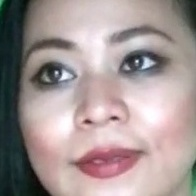

In [ ]:
from IPython.display import display, Image
display(Image(filename='/content/gdrive/MyDrive/Colab Notebooks/Croped_faces/Happy/cropped_face240240_faces.jpg'))